In [1]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
import time
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


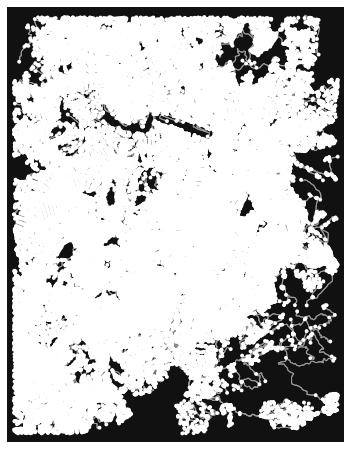

In [2]:
G = ox.graph_from_bbox(-19.7961,-20.0056,-44.0418,-43.8684,network_type='walk')

fig, ax = ox.plot_graph(G)

In [3]:
df = pd.read_excel(r'C:\Users\Vinicius Fernandes\Documents\GitHub\TCC\Dados\lista_enderecos_araujo\lista_enderecos_completa.xlsx')
df = pd.concat([df[['enderecos']], df['coordenadas'].str.split(', ', expand=True)], axis=1)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df

enderecos          0          1
0                            Rua Curitiba, 327, Centro -19.915654 -43.940298
1                            Rua Curitiba, 729, Centro -19.919201 -43.941317
2                 Avenida Augusto de Lima, 744, Centro -19.922607 -43.942935
3                           Rua da Bahia, 1070, Centro -19.924362 -43.937421
4              Avenida Afonso Pena, 2700, Funcionários -19.935060 -43.929023
..                                                 ...        ...        ...
169      Avenida Presidente Carlos Luz, 3001, Caiçaras -19.891014 -43.967874
170                 Rua Vitório Marçola, 643, Anchieta -19.947377 -43.924611
171                      Rua Izabel Bueno, 743, Indaiá -19.863255 -43.950316
172  Avenida General David Saranoff, 5160, Cidade I... -19.946100 -44.021466
173                           Rua Bragança, 7, Pompéia -19.911181 -43.899940

[174 rows x 3 columns]

In [4]:
nodes_araujos = []
nodes_araujos_completos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    location_point = (coordenada_lat,coordenada_long)
    origin_node = ox.get_nearest_node(G, location_point)
    nodes_araujos.append(origin_node)
    nodes_araujos_completos.append([origin_node,G.nodes[origin_node]['y'],G.nodes[origin_node]['x']])

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

In [5]:
nodes_araujos

[321042284,
 29095724,
 2828780801,
 29095247,
 32449511,
 320926284,
 316646720,
 2823678724,
 8230853350,
 5376300742,
 5370380051,
 60591876,
 8978900281,
 5335304499,
 28296524,
 28635088,
 1307115209,
 449304360,
 2903602130,
 4986135629,
 29741053,
 61818316,
 29096247,
 6918856501,
 317757561,
 504707609,
 29288079,
 35789337,
 33078913,
 4449856595,
 1828145609,
 101043764,
 320407460,
 4696431319,
 33024422,
 8979260566,
 8905710882,
 2455781746,
 1248124036,
 4986055935,
 4987462491,
 4562661165,
 8976733542,
 8942106036,
 35965564,
 29095886,
 4972133043,
 8208235357,
 1314231500,
 4270893865,
 8934295040,
 316646683,
 5862308830,
 1307102930,
 2496065594,
 60730897,
 31899404,
 8218211880,
 2695243639,
 1583910468,
 6780186664,
 2618890653,
 2455731663,
 60749803,
 60672196,
 8272842447,
 8914547819,
 8979227736,
 8204936584,
 8914336975,
 6307190757,
 8139968506,
 316646951,
 79978691,
 2448001088,
 8914354027,
 2313580671,
 317769936,
 316639278,
 3712165766,
 8898994289,

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['menor_distancia_para_araujo'] = 0
nodes['araujo_mais_proxima'] = 0
route_lengths = []


In [7]:
node_araujos_busca = []
step = 0.0005

for node in G.nodes:
    start_time = time.time()
    
    #print(node)
    
    araujos_busca = []
    
    n_step = 1
        
    while len(araujos_busca) < 5:
        
        #print(n_step)
        
        for index_node_araujo in range(len(nodes_araujos_completos)):
            
            try:
            
                y_mais = G.nodes[node]['y'] + (n_step * step)
                y_menos = G.nodes[node]['y'] - (n_step * step)
                x_mais = G.nodes[node]['x'] + (n_step * step)
                x_menos = G.nodes[node]['x'] - (n_step * step)


                y_teste = nodes_araujos_completos[index_node_araujo][1]
                x_teste = nodes_araujos_completos[index_node_araujo][2]

                if y_teste<y_mais and y_teste>y_menos and x_teste<x_mais and x_teste>x_menos and nodes_araujos_completos[index_node_araujo][0] not in araujos_busca:
                    araujos_busca.append(nodes_araujos_completos[index_node_araujo][0])

                    #print('chegou aqui e tirou pop')
                    
            except IndexError:
                break
        
        #print(araujos_busca,' - ',len(araujos_busca))
        
        
        n_step += 1
        
        
    node_araujos_busca.append([node,araujos_busca])
    print("--- %s seconds ---" % (time.time() - start_time))
    #print(node_araujos_busca)
    #print('\n','\n')

--- 0.01406407356262207 seconds ---
--- 0.01495981216430664 seconds ---
--- 0.015133857727050781 seconds ---
--- 0.02294182777404785 seconds ---
--- 0.002409219741821289 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.0 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.025911331176757812 seconds ---
--- 0.017946243286132812 seconds ---
--- 0.01846480369567871 seconds ---
--- 0.03984999656677246 seconds ---
--- 0.015891551971435547 seconds ---
--- 0.00823211669921875 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.031317710876464844 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.029

--- 0.015623331069946289 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.018876314163208008 seconds ---
--- 0.018925905227661133 seconds ---
--- 0.0041959285736083984 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03132772445678711 seconds ---
--- 0.031212806701660156 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.029726743698120117 seconds ---
--- 0.020930051803588867 seconds ---
--- 0.010055303573608398 seconds ---
--- 0.0313267707824707 seconds ---
--- 0.03713536262512207 seconds ---
--- 0.01564192771911621 seconds ---
--- 0.031241178512573242 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.03132271766662598 seconds ---
--- 0.01995253562927246 seconds ---
--- 0.0 seconds ---
--- 0.0364077091217041 seconds ---
--- 0.01420450210571289 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.0 seconds ---
--- 0.032015085220336914 seconds ---
--- 0.01558

--- 0.01569390296936035 seconds ---
--- 0.031234025955200195 seconds ---
--- 0.005068302154541016 seconds ---
--- 0.009951353073120117 seconds ---
--- 0.013945817947387695 seconds ---
--- 0.02188420295715332 seconds ---
--- 0.00903177261352539 seconds ---
--- 0.0 seconds ---
--- 0.015764236450195312 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.0 seconds ---
--- 0.03119969367980957 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015703439712524414 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.031253814697265625 seconds ---
--- 0.015587806701660156 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0355067253112793 seconds ---
--- 0.0059814453125 seconds ---
--- 0.004014015197753906 seconds ---
--- 0.0 seconds ---
--- 0.03125 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.015594005584716797 seconds ---
--- 0.031258344650268555 seconds ---
--- 0.015626668930053

--- 0.015614748001098633 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.019394636154174805 seconds ---
--- 0.02893543243408203 seconds ---
--- 0.007966279983520508 seconds ---
--- 0.003157377243041992 seconds ---
--- 0.0 seconds ---
--- 0.031298160552978516 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0 seconds ---
--- 0.031249523162841797 seconds ---
--- 0.0 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015686750411987305 seconds ---
--- 0.0 seconds ---
--- 0.01569676399230957 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.0320589542388916 seconds ---
--- 0.028801918029785156 seconds ---
--- 0.003997087478637695 seconds ---
--- 0.004979372024536133 seconds ---
--- 0.008177518844604492 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.0 seconds ---
--- 0.015578508377075195 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015623331

--- 0.015618085861206055 seconds ---
--- 0.0 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.0 seconds ---
--- 0.02868509292602539 seconds ---
--- 0.009932756423950195 seconds ---
--- 0.009149312973022461 seconds ---
--- 0.010948419570922852 seconds ---
--- 0.005142927169799805 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015750408172607422 seconds ---
--- 0.0 seconds ---
--- 0.031585693359375 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.03117680549621582 seconds ---
--- 0.0 seconds ---
--- 0.031324148178100586 seconds ---
--- 0.01560521125793457 seconds ---
--- 0.037750959396362305 seconds ---
--- 0.01993393898010254 seconds ---
--- 0.003169536590576172 seconds ---
--- 0.018735408782958984 seconds ---
--- 0.01567554473876953 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015656709671020508 seconds ---
--- 0.015594720840454102 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0156207084655761

--- 0.01563572883605957 seconds ---
--- 0.0 seconds ---
--- 0.028351545333862305 seconds ---
--- 0.011238574981689453 seconds ---
--- 0.035830020904541016 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.03122997283935547 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.019893407821655273 seconds ---
--- 0.03133130073547363 seconds ---
--- 0.031331539154052734 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.025000572204589844 seconds ---
--- 0.01898670196533203 seconds ---
--- 0.010913610458374023 seconds ---
--- 0.005039691925048828 seconds ---
--- 0.0 seconds ---
--- 0.01579904556274414 seconds ---
--- 0.0165097713470459 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.0 seconds ---
--- 0.0189511775970459 seconds ---
--- 0.0 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
-

--- 0.015623092651367188 seconds ---
--- 0.029768705368041992 seconds ---
--- 0.016943931579589844 seconds ---
--- 0.016948223114013672 seconds ---
--- 0.013055562973022461 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.0 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.03129172325134277 seconds ---
--- 0.02568793296813965 seconds ---
--- 0.03181791305541992 seconds ---
--- 0.019745588302612305 seconds ---
--- 0.015546798706054688 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015627622604370117 seconds ---
--- 0

--- 0.015470504760742188 seconds ---
--- 0.0 seconds ---
--- 0.028260231018066406 seconds ---
--- 0.013964653015136719 seconds ---
--- 0.013955831527709961 seconds ---
--- 0.005012035369873047 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.0 seconds ---
--- 0.031205415725708008 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.016382455825805664 seconds ---
--- 0.008964776992797852 seconds ---
--- 0.009963512420654297 seconds ---
--- 0.005971193313598633 seconds ---
--- 0.004991292953491211 seconds ---
--- 0.004983186721801758 seconds ---
--- 0.0060083866119384766 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.0 seconds ---
--- 0.01569080352783203 seconds ---
--- 0.0 seconds ---
--- 0

--- 0.015546321868896484 seconds ---
--- 0.015669822692871094 seconds ---
--- 0.0 seconds ---
--- 0.024928808212280273 seconds ---
--- 0.025592565536499023 seconds ---
--- 0.021003246307373047 seconds ---
--- 0.004985332489013672 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.03120255470275879 seconds ---
--- 0.03129887580871582 seconds ---
--- 0.027327537536621094 seconds ---
--- 0.016956329345703125 seconds ---
--- 0.011313438415527344 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.03127908706665039 seconds ---
--- 0.015706539154052734 seconds ---
--- 0.015667200088500977 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.015546798706054688 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.020806074142456055 seconds ---
--- 0.02192544937133789 seconds ---
--- 0.0189363956451416 se

--- 0.016353368759155273 seconds ---
--- 0.015679597854614258 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.030841350555419922 seconds ---
--- 0.0189666748046875 seconds ---
--- 0.01126861572265625 seconds ---
--- 0.01569819450378418 seconds ---
--- 0.015610456466674805 seconds ---
--- 0.0156402587890625 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015583992004394531 seconds ---
--- 0.031258583068847656 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015559196472167969 seconds ---
--- 0.044071197509765625 seconds ---
--- 0.0258638858795166 seconds ---
--- 0.02173900604248047 seconds ---
--- 0.03126263618469238 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.015570640563964844 seconds ---
--- 0.015685558319091797 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015553474426269531 seconds ---
--- 0.015692472457885742 seconds ---
--- 0.0353393

--- 0.015628337860107422 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.02336716651916504 seconds ---
--- 0.010962724685668945 seconds ---
--- 0.009977102279663086 seconds ---
--- 0.0018868446350097656 seconds ---
--- 0.015723228454589844 seconds ---
--- 0.015568733215332031 seconds ---
--- 0.03130316734313965 seconds ---
--- 0.015641212463378906 seconds ---
--- 0.015598535537719727 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.016362428665161133 seconds ---
--- 0.04400444030761719 seconds ---
--- 0.017124652862548828 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.031200647354125977 seconds ---
--- 0.010641336441040039 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01568293571472168 seconds ---
--- 0.033994436264038086 s

--- 0.015625476837158203 seconds ---
--- 0.0 seconds ---
--- 0.025234460830688477 seconds ---
--- 0.00995182991027832 seconds ---
--- 0.0069844722747802734 seconds ---
--- 0.006972074508666992 seconds ---
--- 0.006921529769897461 seconds ---
--- 9.441375732421875e-05 seconds ---
--- 0.0 seconds ---
--- 0.016382694244384766 seconds ---
--- 0.0 seconds ---
--- 0.01567554473876953 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.0 seconds ---
--- 0.015746116638183594 seconds ---
--- 0.015721559524536133 seconds ---
--- 0.0 seconds ---
--- 0.01560831069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015575170516967773 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015703201293945312 seconds ---
--- 0.0 seconds --

--- 0.015682697296142578 seconds ---
--- 0.015565633773803711 seconds ---
--- 0.0 seconds ---
--- 0.036341190338134766 seconds ---
--- 0.016913890838623047 seconds ---
--- 0.007029056549072266 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.015562772750854492 seconds ---
--- 0.015671253204345703 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015655517578125 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.031228065490722656 seconds ---
--- 0.0 seconds ---
--- 0.030390262603759766 seconds ---
--- 0.014939546585083008 seconds ---
--- 0.01295781135559082 seconds ---
--- 0.002040386199951172 seconds ---
--- 0.015673160552978516 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.01557302474975586 seconds ---
--- 0.0 seconds ---
--- 0.01568007469177246 seconds ---
--- 0.0156102180480

--- 0.015615224838256836 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.020936012268066406 seconds ---
--- 0.006960868835449219 seconds ---
--- 0.005993366241455078 seconds ---
--- 0.006958723068237305 seconds ---
--- 0.005964517593383789 seconds ---
--- 0.0059893131256103516 seconds ---
--- 0.005977630615234375 seconds ---
--- 0.004174470901489258 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015662670135498047 seconds ---
--- 0.0 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.0 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.0 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.0 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.019112110137939453 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.0 seconds ---
--- 0.015677928924560547 seconds ---
--- 0.015639066696166992 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.01724529266357422 seconds ---
--- 0.013056278228759766 seconds ---
--- 0.01095890998840332 seconds ---
--- 0.0159

--- 0.046875 seconds ---
--- 0.041579484939575195 seconds ---
--- 0.03439974784851074 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.04653525352478027 seconds ---
--- 0.053919315338134766 seconds ---
--- 0.035512685775756836 seconds ---
--- 0.05026078224182129 seconds ---
--- 0.03131103515625 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.031259775161743164 seconds ---
--- 0.031211137771606445 seconds ---
--- 0.03496837615966797 seconds ---
--- 0.03494691848754883 seconds ---
--- 0.041161537170410156 seconds ---
--- 0.016709089279174805 seconds ---
--- 0.04692983627319336 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.031195640563964844 seconds ---
--- 0.039476871490478516 seconds ---
--- 0.033879756927490234 seconds ---
--- 0.02247023582458496 seconds ---
--- 0.031301259994506836 seconds ---
--- 0.046880245208740234 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.015650510787963867 se

--- 0.015633583068847656 seconds ---
--- 0.023468494415283203 seconds ---
--- 0.01196599006652832 seconds ---
--- 0.009956121444702148 seconds ---
--- 0.009972095489501953 seconds ---
--- 0.003094196319580078 seconds ---
--- 0.015682697296142578 seconds ---
--- 0.011797904968261719 seconds ---
--- 0.004041194915771484 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.0 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.0 seconds ---
--- 0.015641212463378906 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.015633106231689453 seconds ---
--- 0.0 seconds ---
--- 0.026607513427734375 seconds ---
--- 0.014954805374145508 seconds ---
--- 0.010970115661621094 seconds ---
--- 0.009033679962158203 seconds ---
--- 0.0 seconds ---
--- 0.015668153762817383 seconds ---
--- 0.03128838539123535 seconds

--- 0.015631914138793945 seconds ---
--- 0.019435882568359375 seconds ---
--- 0.02542257308959961 seconds ---
--- 0.014952659606933594 seconds ---
--- 0.016007661819458008 seconds ---
--- 0.015937328338623047 seconds ---
--- 0.0020279884338378906 seconds ---
--- 0.015694379806518555 seconds ---
--- 0.015601634979248047 seconds ---
--- 0.0 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.0 seconds ---
--- 0.031189441680908203 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.028713464736938477 seconds ---
--- 0.012882471084594727 seconds ---
--- 0.01195979118347168 seconds ---
--- 0.020728588104248047 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.015639066696166992 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015666723251342773 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0156357288

--- 0.015623331069946289 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.01564478874206543 seconds ---
--- 0.015592813491821289 seconds ---
--- 0.02149820327758789 seconds ---
--- 0.021851062774658203 seconds ---
--- 0.01494908332824707 seconds ---
--- 0.005070209503173828 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.03132915496826172 seconds ---
--- 0.015539169311523438 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.029992103576660156 seconds ---
--- 0.015946388244628906 seconds ---
--- 0.013019800186157227 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015703201293945312 seconds ---
--- 0.015595436096191406 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015618324279785156 seconds ---
--- 

--- 0.026747465133666992 seconds ---
--- 0.0159299373626709 seconds ---
--- 0.012947320938110352 seconds ---
--- 0.012663602828979492 seconds ---
--- 0.019768714904785156 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.015545845031738281 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015660524368286133 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.02816939353942871 seconds ---
--- 0.012962579727172852 seconds ---
--- 0.019141435623168945 seconds ---
--- 0.0 seconds ---
--- 0.015661001205444336 seconds ---
--- 0.015659093856811523 seconds ---
--- 0.015598297119140625 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.01849818229675293 seconds ---
--- 0.015684843063354492 seconds ---
--- 0.0 seconds ---
--- 0.015634298324

--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.03109598159790039 seconds ---
--- 0.009966373443603516 seconds ---
--- 0.01502680778503418 seconds ---
--- 0.005204916000366211 seconds ---
--- 0.015670299530029297 seconds ---
--- 0.01558685302734375 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.0 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.0287325382232666 seconds ---
--- 0.010945320129394531 seconds ---
--- 0.01590704917907715 seconds ---
--- 0.0050547122955322266 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015621423721313477 seconds ---
--- 

--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.024583101272583008 seconds ---
--- 0.017875194549560547 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.006064891815185547 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.02253270149230957 seconds ---
--- 0.016932010650634766 seconds ---
--- 0.011959314346313477 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.0010609626770019531 seconds ---
--- 0.015625 seconds ---
--- 0.01562333

--- 0.015683412551879883 seconds ---
--- 0.0 seconds ---
--- 0.02907085418701172 seconds ---
--- 0.01193857192993164 seconds ---
--- 0.007958173751831055 seconds ---
--- 0.006985902786254883 seconds ---
--- 0.0050046443939208984 seconds ---
--- 0.0 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.015578269958496094 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015675783157348633 seconds ---
--- 0.015568971633911133 seconds ---
--- 0.0 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.0 seconds ---
--- 0.031189441680908203 seconds ---
--- 0.0 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0 seconds ---
--- 0.01567387580871582 seconds ---
--- 0.0 seconds ---
--- 0.01557302474975586 seconds ---
--- 0.009649276733398438 seconds ---
--- 0.00796961784362793 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.007972478866577148 seconds ---
--- 0.0050165653228759766 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.015636682510

--- 0.015593767166137695 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.01865983009338379 seconds ---
--- 0.01996159553527832 seconds ---
--- 0.02214980125427246 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.0 seconds ---
--- 0.01566028594970703 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.015571832656860352 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015676259994506836 seconds ---
--- 0.0 seconds ---
--- 0.015578508377075195 seconds ---
--- 0.0 seconds ---
--- 0.019382953643798828 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.006976604461669922 seconds ---
--- 0.0069768428802490234 seconds ---
--- 0.009966850280761719 seconds ---
--- 0.007973432540893555 seconds ---
--- 0.00506806

--- 0.015602827072143555 seconds ---
--- 0.028281211853027344 seconds ---
--- 0.018951416015625 seconds ---
--- 0.014095783233642578 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.03133797645568848 seconds ---
--- 0.015568017959594727 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0264432430267334 seconds ---
--- 0.0343623161315918 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03126192092895508 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.023609161376953125 seconds ---
--- 0.017997264862060547 seconds ---
--- 0.01991581916809082 seconds ---
--- 0.016856908798

--- 0.03262686729431152 seconds ---
--- 0.019931554794311523 seconds ---
--- 0.021053791046142578 seconds ---
--- 0.015590667724609375 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015625 seconds ---
--- 0.015639305114746094 seconds ---
--- 0.015608072280883789 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.038007497787475586 seconds ---
--- 0.021242380142211914 seconds ---
--- 0.018796682357788086 seconds ---
--- 0.03113389015197754 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015702009201049805 seconds ---
--- 0.015558004379272461 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.015665292739868164 seconds ---
--- 0.015575647354125977 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.04063725471496582 seconds ---
--- 0.017940044403076172 seconds ---
--- 0.018680572509765625 seconds ---
--- 0.015657901763916016 seconds ---
--- 0.0156192779541

--- 0.015598297119140625 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.04024457931518555 seconds ---
--- 0.021995067596435547 seconds ---
--- 0.015625 seconds ---
--- 0.03129696846008301 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015573740005493164 seconds ---
--- 0.01641106605529785 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.022908687591552734 seconds ---
--- 0.014959096908569336 seconds ---
--- 0.020929813385009766 seconds ---
--- 0.0031151771545410156 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.03140878677368164 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.03126931190490723 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.01566290855407715 seconds ---
--- 0.035750627517700195 seconds ---
--- 0.02300262451171

--- 0.0156404972076416 seconds ---
--- 0.02917790412902832 seconds ---
--- 0.019061565399169922 seconds ---
--- 0.010971546173095703 seconds ---
--- 0.015663623809814453 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 0.01564788818359375 seconds ---
--- 0.015604734420776367 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.027446746826171875 seconds ---
--- 0.0189361572265625 seconds ---
--- 0.01417231559753418 seconds ---
--- 0.02059650421142578 seconds ---
--- 0.033136606216430664 seconds ---
--- 0.005255222320556641 seconds ---
--- 0.03130316734313965 seconds ---
--- 0.031191110610961914 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015682220458984375 seconds ---
--- 0.015563249588012695 seconds ---
--- 0.015624046325683594 

--- 0.046859025955200195 seconds ---
--- 0.06050372123718262 seconds ---
--- 0.03480720520019531 seconds ---
--- 0.04681730270385742 seconds ---
--- 0.0469362735748291 seconds ---
--- 0.053766489028930664 seconds ---
--- 0.03625369071960449 seconds ---
--- 0.04688739776611328 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.04686880111694336 seconds ---
--- 0.03125882148742676 seconds ---
--- 0.031234264373779297 seconds ---
--- 0.05021047592163086 seconds ---
--- 0.04590749740600586 seconds ---
--- 0.04692840576171875 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.06318831443786621 seconds ---
--- 0.04693460464477539 seconds ---
--- 0.047959089279174805 seconds ---
--- 0.028769493103027344 seconds ---
--- 0.04692387580871582 seconds ---
--- 0.04685688018798828 seconds ---
--- 0.046881675720214844 seconds ---
--- 0.04433465003967285 seconds ---
--- 0.030649900436401367 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.046866655349731445 seconds ---
--- 0.04686641693115

--- 0.031246662139892578 seconds ---
--- 0.03130745887756348 seconds ---
--- 0.06339097023010254 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.04686331748962402 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.04955792427062988 seconds ---
--- 0.043750762939453125 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03125429153442383 seconds ---
--- 0.04688405990600586 seconds ---
--- 0.04808330535888672 seconds ---
--- 0.04428219795227051 seconds ---
--- 0.03124380111694336 seconds ---
--- 0.031294822692871094 seconds ---
--- 0.03119373321533203 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.04687666893005371 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.042382001876831055 seconds ---
--- 0.03887128829956055 seconds ---
--- 0.03130602836608887 seconds ---
--- 0.04706096649169922 seconds ---
--- 0.04689216613769531 seconds ---
--- 0.0312216281890

--- 0.015675067901611328 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.03635001182556152 seconds ---
--- 0.028861284255981445 seconds ---
--- 0.012028932571411133 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03133249282836914 seconds ---
--- 0.015590429306030273 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03640937805175781 seconds ---
--- 0.02409529685974121 seconds ---
--- 0.01568436622619629 seconds ---
--- 0.03456878662109375 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.014601469039916992 seconds ---
--- 0.03130936622619629 seconds ---
--- 0.0 seconds ---
--- 0.03118419647216797 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01569962501525879 seconds ---
--- 0.029402732849121094 seconds ---
--- 0.015949010848999023 seconds ---
--- 0.012305974960327148 seconds ---
--- 0.016435623168945312 secon

--- 0.0311892032623291 seconds ---
--- 0.048331260681152344 seconds ---
--- 0.027844905853271484 seconds ---
--- 0.04688549041748047 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.03125 seconds ---
--- 0.03119373321533203 seconds ---
--- 0.04677152633666992 seconds ---
--- 0.031703948974609375 seconds ---
--- 0.03132176399230957 seconds ---
--- 0.03447985649108887 seconds ---
--- 0.04692578315734863 seconds ---
--- 0.031192302703857422 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.04686927795410156 seconds ---
--- 0.04459714889526367 seconds ---
--- 0.04687833786010742 seconds ---
--- 0.03202533721923828 seconds ---
--- 0.031264543533325195 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.031293630599975586 seconds ---
--- 0.03217816352844238 seconds ---
--- 0.0274660587310791 seconds ---
--- 0.03228902816772461 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.04687786102294922 seconds 

--- 0.015630006790161133 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.04094123840332031 seconds ---
--- 0.019039630889892578 seconds ---
--- 0.01571512222290039 seconds ---
--- 0.03128361701965332 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015625 seconds ---
--- 0.04556107521057129 seconds ---
--- 0.014029979705810547 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.018746614456176758 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.036923885345458984 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.017693758010864258 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.032273054122924805 seconds ---
--- 0.015690088272094727 seconds ---
--- 0.031187057495117188 

--- 0.03132367134094238 seconds ---
--- 0.015598773956298828 seconds ---
--- 0.05365300178527832 seconds ---
--- 0.03740215301513672 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.03126025199890137 seconds ---
--- 0.015605449676513672 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.0423736572265625 seconds ---
--- 0.0200498104095459 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.0469212532043457 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.031232357025146484 seconds ---
--- 0.03129768371582031 seconds ---
--- 0.04694175720214844 seconds ---
--- 0.03125 seconds ---
--- 0.03921699523925781 seconds ---
--- 0.010115385055541992 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.031250715255737305 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.031241416931152344 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.03119349479675293 second

--- 0.03193092346191406 seconds ---
--- 0.0230557918548584 seconds ---
--- 0.016946077346801758 seconds ---
--- 0.01810908317565918 seconds ---
--- 0.01568150520324707 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015573978424072266 seconds ---
--- 0.015625 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.020140647888183594 seconds ---
--- 0.020415782928466797 seconds ---
--- 0.018942594528198242 seconds ---
--- 0.0167238712310791 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015668392181396484 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.03125810623168945 seconds ---
--- 0.037576913833618164 seconds ---
--- 0.018372297286987305 seconds ---
--- 0.017402172088623047 seconds ---
--- 0.031165122985839844 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0156252384185791 s

--- 0.015622377395629883 seconds ---
--- 0.02197098731994629 seconds ---
--- 0.02599811553955078 seconds ---
--- 0.010156631469726562 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.019997835159301758 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.02299213409423828 seconds ---
--- 0.018976926803588867 seconds ---
--- 0.02994394302368164 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.01559758186340332 seconds ---
--- 0.03202009201049805 seconds ---
--- 0.01563882827758789 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.04453921318054199 seconds ---
--- 0.019138097763061523 seconds ---
--- 0.015787839

--- 0.021446704864501953 seconds ---
--- 0.02108478546142578 seconds ---
--- 0.018172264099121094 seconds ---
--- 0.0 seconds ---
--- 0.031275272369384766 seconds ---
--- 0.03123331069946289 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015646696090698242 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03070521354675293 seconds ---
--- 0.023103713989257812 seconds ---
--- 0.004093647003173828 seconds ---
--- 0.031305551528930664 seconds ---
--- 0.031233787536621094 seconds ---
--- 0.015645742416381836 seconds ---
--- 0.015607595443725586 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.016432762145996094 seconds ---
--- 0.015677690505981445 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.03320646286010742 seconds ---
--- 0.014125585556030273 seconds ---
--- 0.015665531158447266 

--- 0.031220674514770508 seconds ---
--- 0.03119516372680664 seconds ---
--- 0.039283037185668945 seconds ---
--- 0.02049994468688965 seconds ---
--- 0.0476224422454834 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.03128385543823242 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.04192829132080078 seconds ---
--- 0.02885746955871582 seconds ---
--- 0.03430819511413574 seconds ---
--- 0.0313105583190918 seconds ---
--- 0.01555776596069336 seconds ---
--- 0.03133106231689453 seconds ---
--- 0.015598058700561523 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0407562255859375 seconds ---
--- 0.025868654251098633 seconds ---
--- 0.013054847717285156 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.01562333106

--- 0.01303243637084961 seconds ---
--- 0.025876760482788086 seconds ---
--- 0.011176109313964844 seconds ---
--- 0.02743363380432129 seconds ---
--- 0.022914648056030273 seconds ---
--- 0.025209665298461914 seconds ---
--- 0.02072906494140625 seconds ---
--- 0.008118629455566406 seconds ---
--- 0.01567983627319336 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03118610382080078 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.029869556427001953 seconds ---
--- 0.017948389053344727 seconds ---
--- 0.013054370880126953 seconds ---
--- 0.015723705291748047 seconds ---
--- 0.015961408615112305 seconds ---
--- 0.015607357025146484 seconds ---
--- 0.03119492530822754 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0156

--- 0.03124403953552246 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.021891355514526367 seconds ---
--- 0.023879051208496094 seconds ---
--- 0.019037485122680664 seconds ---
--- 0.016691923141479492 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0312800407409668 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.015645980834960938 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.030897855758666992 seconds ---
--- 0.015684843063354492 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.04353642463684082 seconds ---
--- 0.017940044403076172 seconds ---
--- 0.01775383949279785 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01567363739013672 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.03127264976501465 seconds ---
--- 0.015604734420776367 seconds ---
--- 0.0156

--- 0.015622854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.03353095054626465 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.010966062545776367 seconds ---
--- 0.017032146453857422 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01646113395690918 seconds ---
--- 0.0 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.01881551742553711 seconds ---
--- 0.013993263244628906 seconds ---
--- 0.010976314544677734 seconds ---
--- 0.012903928756713867 seconds ---
--- 0.0020744800567626953 seconds ---
--- 0.03129410743713379 seconds ---
--- 0.0 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015636920928955

--- 0.015599489212036133 seconds ---
--- 0.03126120567321777 seconds ---
--- 0.03505301475524902 seconds ---
--- 0.026370763778686523 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.031198978424072266 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03131580352783203 seconds ---
--- 0.031178951263427734 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03130292892456055 seconds ---
--- 0.015566587448120117 seconds ---
--- 0.03555607795715332 seconds ---
--- 0.02901291847229004 seconds ---
--- 0.03129315376281738 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.031279563903808594 seconds ---
--- 0.015594005584716797 seconds ---
--- 0.03154349327087402 seconds ---
--- 0.0380251407623291 seconds ---
--- 0.027854204177856445 seconds ---
--- 0.023714303970336914 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.01567387580871582 seconds ---
--- 0.015571117401123047 seconds ---
--- 0.0312469

--- 0.031226396560668945 seconds ---
--- 0.031241178512573242 seconds ---
--- 0.03125882148742676 seconds ---
--- 0.03918647766113281 seconds ---
--- 0.012160301208496094 seconds ---
--- 0.031298160552978516 seconds ---
--- 0.015572309494018555 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03130698204040527 seconds ---
--- 0.03014373779296875 seconds ---
--- 0.014081478118896484 seconds ---
--- 0.03129005432128906 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03128504753112793 seconds ---
--- 0.015591144561767578 seconds ---
--- 0.031253814697265625 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.038385629653930664 seconds ---
--- 0.025115251541137695 seconds ---
--- 0.0350184440612793 seconds ---
--- 0.03139948844909668 seconds ---
--- 0.03133273124694824 seconds ---
--- 0.015592

--- 0.01567983627319336 seconds ---
--- 0.02763533592224121 seconds ---
--- 0.014953851699829102 seconds ---
--- 0.01394963264465332 seconds ---
--- 0.0030808448791503906 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015662431716918945 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015625 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.015643596649169922 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.0 seconds ---
--- 0.040671586990356445 seconds ---
--- 0.014936685562133789 seconds ---
--- 0.022814512252807617 seconds ---
--- 0.01565718650817871 seconds ---
--- 0.0 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.01556253433227539 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds --

--- 0.03772759437561035 seconds ---
--- 0.02405095100402832 seconds ---
--- 0.01564645767211914 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.01566791534423828 seconds ---
--- 0.03186774253845215 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.03127741813659668 seconds ---
--- 0.03116321563720703 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.02251458168029785 seconds ---
--- 0.018980026245117188 seconds ---
--- 0.018924236297607422 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.031235694885253906 seconds ---
--- 0.031327009201049805 seconds ---
--- 0.015595436096191406 seconds ---
--- 0.03119826316833496 seconds ---
--- 0.03329968452453613 seconds ---
--- 0.021389245986938477 seconds ---
--- 0.018696069717407227 seconds ---
--- 0.015688419342041016 seconds ---
--- 0.031261444091796875 seconds ---
--- 0.015598535537719727 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.01564788818359375 seconds ---
--- 0.015602350234985352 seconds ---
--- 0.01560878

--- 0.015624046325683594 seconds ---
--- 0.01556253433227539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.022515058517456055 seconds ---
--- 0.034891366958618164 seconds ---
--- 0.019672632217407227 seconds ---
--- 0.03125 seconds ---
--- 0.0 seconds ---
--- 0.015610933303833008 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.036925554275512695 seconds ---
--- 0.020065784454345703 seconds ---
--- 0.012961387634277344 seconds ---
--- 0.010999917984008789 seconds ---
--- 0.0 seconds ---
--- 0.015749692916870117 seconds ---
--- 0.015693187713623047 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.031252384185791016 seconds ---
--- 0.015606880187988281 seconds ---
--- 0.0156373977

--- 0.032623291015625 seconds ---
--- 0.02902674674987793 seconds ---
--- 0.014071941375732422 seconds ---
--- 0.01569986343383789 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.03126215934753418 seconds ---
--- 0.015589714050292969 seconds ---
--- 0.01563715934753418 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.03127026557922363 seconds ---
--- 0.01560068130493164 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.03764677047729492 seconds ---
--- 0.019927501678466797 seconds ---
--- 0.0071833133697509766 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0312962532043457 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.031192541122436523 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.03119468

--- 0.03075861930847168 seconds ---
--- 0.019908428192138672 seconds ---
--- 0.0217435359954834 seconds ---
--- 0.031293630599975586 seconds ---
--- 0.015576839447021484 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.032619476318359375 seconds ---
--- 0.016070842742919922 seconds ---
--- 0.03132367134094238 seconds ---
--- 0.031221628189086914 seconds ---
--- 0.03301501274108887 seconds ---
--- 0.020176410675048828 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.03125190734863281 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.037319183349609375 seconds ---
--- 0.028537511825561523 seconds ---
--- 0.02118515968322754 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.031406

--- 0.03126716613769531 seconds ---
--- 0.0 seconds ---
--- 0.015599727630615234 seconds ---
--- 0.031463623046875 seconds ---
--- 0.018117904663085938 seconds ---
--- 0.012052059173583984 seconds ---
--- 0.015625 seconds ---
--- 0.015692710876464844 seconds ---
--- 0.03122544288635254 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015648365020751953 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0 seconds ---
--- 0.015604972839355469 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.0 seconds ---
--- 0.0330352783203125 seconds ---
--- 0.015959978103637695 seconds ---
--- 0.010117053985595703 seconds ---
--- 0.01568150520324707 seconds ---
--- 0.031189441680908203 seconds ---
--- 0.018836021423339844 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03130626678466797 seconds ---
--- 0.041387319564819336 seconds ---
--- 0.016142845153

--- 0.04474472999572754 seconds ---
--- 0.024916648864746094 seconds ---
--- 0.021985530853271484 seconds ---
--- 0.03130292892456055 seconds ---
--- 0.04273200035095215 seconds ---
--- 0.03152823448181152 seconds ---
--- 0.037778615951538086 seconds ---
--- 0.039168357849121094 seconds ---
--- 0.025949954986572266 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.03130149841308594 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.031200647354125977 seconds ---
--- 0.031244754791259766 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0511021614074707 seconds ---
--- 0.024574756622314453 seconds ---
--- 0.031325340270996094 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.031180381774902344 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.03129720687866211 seconds ---
--- 0.024466276168823242 seconds ---
--- 0.03189492225646973 seconds ---
--- 0.006143331527709961 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015622

--- 0.015622854232788086 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.045743703842163086 seconds ---
--- 0.015111684799194336 seconds ---
--- 0.03130674362182617 seconds ---
--- 0.03118586540222168 seconds ---
--- 0.03129434585571289 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.03861236572265625 seconds ---
--- 0.020923376083374023 seconds ---
--- 0.019874095916748047 seconds ---
--- 0.01566147804260254 seconds ---
--- 0.015596389770507812 seconds ---
--- 0.031266212463378906 seconds ---
--- 0.031177759170532227 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.03130340576171875 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.03828001022338867 seconds ---
--- 0.02295970916748047 seconds ---
--- 0.031319618225097656 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.01562047

--- 0.03124690055847168 seconds ---
--- 0.05461621284484863 seconds ---
--- 0.04523825645446777 seconds ---
--- 0.029640674591064453 seconds ---
--- 0.047035932540893555 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.04755568504333496 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.0529322624206543 seconds ---
--- 0.02269434928894043 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.04692482948303223 seconds ---
--- 0.059822797775268555 seconds ---
--- 0.03682208061218262 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.04968857765197754 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.04687786102294922 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.05908775329589844 seconds ---
--- 0.049951791763305664 seconds ---
--- 0.03132486343383789 seconds ---
--- 0.046858787536621094 seconds ---
--- 0.0312383174896

--- 0.07805132865905762 seconds ---
--- 0.06219911575317383 seconds ---
--- 0.046822309494018555 seconds ---
--- 0.0469207763671875 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.07168006896972656 seconds ---
--- 0.05437207221984863 seconds ---
--- 0.06249594688415527 seconds ---
--- 0.04685091972351074 seconds ---
--- 0.06244087219238281 seconds ---
--- 0.0673067569732666 seconds ---
--- 0.04476046562194824 seconds ---
--- 0.06249666213989258 seconds ---
--- 0.04681515693664551 seconds ---
--- 0.06732797622680664 seconds ---
--- 0.04112410545349121 seconds ---
--- 0.06246805191040039 seconds ---
--- 0.0494692325592041 seconds ---
--- 0.04688262939453125 seconds ---
--- 0.07507467269897461 seconds ---
--- 0.048619985580444336 seconds ---
--- 0.04761171340942383 seconds ---
--- 0.06250214576721191 seconds ---
--- 0.04687166213989258 seconds ---
--- 0.06798791885375977 seconds ---
--- 0.05635690689086914 seconds ---
--- 0.04449152946472168 seconds ---
--- 0.06292867660522461 secon

--- 0.015620946884155273 seconds ---
--- 0.01837468147277832 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.028851032257080078 seconds ---
--- 0.01697373390197754 seconds ---
--- 0.015665531158447266 seconds ---
--- 0.031264543533325195 seconds ---
--- 0.03125596046447754 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.016447067260742188 seconds ---
--- 0.031301259994506836 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03728318214416504 seconds ---
--- 0.020926713943481445 seconds ---
--- 0.01787567138671875 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015648365020751953 seconds ---
--- 0.03392839431762695 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03699994087219238 seconds ---
--- 0.0219266414642334 seconds ---
--- 0.013211488723754883 seconds ---
--- 0.015656709671020508 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.0312442

--- 0.0637671947479248 seconds ---
--- 0.02668142318725586 seconds ---
--- 0.050461530685424805 seconds ---
--- 0.03135085105895996 seconds ---
--- 0.03126692771911621 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.03122878074645996 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.05170941352844238 seconds ---
--- 0.02509760856628418 seconds ---
--- 0.031293392181396484 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.031204700469970703 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.04691815376281738 seconds ---
--- 0.031198978424072266 seconds ---
--- 0.05202794075012207 seconds ---
--- 0.012041091918945312 seconds ---
--- 0.03126192092895508 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.031290531158447266 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03118276596069336 seconds ---
--- 0.06079530715942383 seconds ---
--- 0.04896092414855957 seconds ---
--- 0.031253814697

--- 0.00913548469543457 seconds ---
--- 0.03826427459716797 seconds ---
--- 0.023916959762573242 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.016674041748046875 seconds ---
--- 0.03131532669067383 seconds ---
--- 0.031192302703857422 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.031238079071044922 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03566861152648926 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03622269630432129 seconds ---
--- 0.020952224731445312 seconds ---
--- 0.017687320709228516 seconds ---
--- 0.01560521125793457 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.015568971633911133 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03244280815124512 seconds ---
--- 0.024177074432373047 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.0156233

--- 0.031187057495117188 seconds ---
--- 0.040843963623046875 seconds ---
--- 0.03382992744445801 seconds ---
--- 0.03341364860534668 seconds ---
--- 0.03139352798461914 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.04686713218688965 seconds ---
--- 0.032401084899902344 seconds ---
--- 0.02593398094177246 seconds ---
--- 0.01567864418029785 seconds ---
--- 0.031236648559570312 seconds ---
--- 0.03124213218688965 seconds ---
--- 0.03120589256286621 seconds ---
--- 0.03132939338684082 seconds ---
--- 0.01559758186340332 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.03946971893310547 seconds ---
--- 0.02190423011779785 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.031229734420776367 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015575885772705078 seconds ---
--- 0.038572788

--- 0.03130602836608887 seconds ---
--- 0.013956785202026367 seconds ---
--- 0.011955499649047852 seconds ---
--- 0.013938665390014648 seconds ---
--- 0.01694464683532715 seconds ---
--- 0.011953353881835938 seconds ---
--- 0.012983083724975586 seconds ---
--- 0.017903804779052734 seconds ---
--- 0.01591658592224121 seconds ---
--- 0.011959552764892578 seconds ---
--- 0.011960268020629883 seconds ---
--- 0.01096343994140625 seconds ---
--- 0.011960506439208984 seconds ---
--- 0.009966611862182617 seconds ---
--- 0.01495051383972168 seconds ---
--- 0.009662866592407227 seconds ---
--- 0.014949321746826172 seconds ---
--- 0.013952493667602539 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.02093219757080078 seconds ---
--- 0.02392411231994629 seconds ---
--- 0.01495361328125 seconds ---
--- 0.02192091941833496 seconds ---
--- 0.013953685760498047 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.02397322654724121 seconds ---
--- 0.01495909

--- 0.016922950744628906 seconds ---
--- 0.014946460723876953 seconds ---
--- 0.012951374053955078 seconds ---
--- 0.024865388870239258 seconds ---
--- 0.02271866798400879 seconds ---
--- 0.020967721939086914 seconds ---
--- 0.014322757720947266 seconds ---
--- 0.024875164031982422 seconds ---
--- 0.01600193977355957 seconds ---
--- 0.017885208129882812 seconds ---
--- 0.015946388244628906 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.013962030410766602 seconds ---
--- 0.019924640655517578 seconds ---
--- 0.0219268798828125 seconds ---
--- 0.028964519500732422 seconds ---
--- 0.022922754287719727 seconds ---
--- 0.022924423217773438 seconds ---
--- 0.02018904685974121 seconds ---
--- 0.02325129508972168 seconds ---
--- 0.027907371520996094 seconds ---
--- 0.020967483520507812 seconds ---
--- 0.029912471771240234 seconds ---
--- 0.029912471771240234 seconds ---
--- 0.02289891242980957 seconds ---
--- 0.0199434757232666 seconds ---
--- 0.018884897232055664 seconds ---
--- 0.0179

--- 0.01993274688720703 seconds ---
--- 0.029909610748291016 seconds ---
--- 0.02989959716796875 seconds ---
--- 0.01806497573852539 seconds ---
--- 0.027968883514404297 seconds ---
--- 0.020909786224365234 seconds ---
--- 0.03066277503967285 seconds ---
--- 0.026909351348876953 seconds ---
--- 0.02098226547241211 seconds ---
--- 0.023932933807373047 seconds ---
--- 0.024916887283325195 seconds ---
--- 0.02192521095275879 seconds ---
--- 0.026955604553222656 seconds ---
--- 0.03284502029418945 seconds ---
--- 0.024544239044189453 seconds ---
--- 0.0215756893157959 seconds ---
--- 0.021923303604125977 seconds ---
--- 0.02292346954345703 seconds ---
--- 0.024918317794799805 seconds ---
--- 0.026911020278930664 seconds ---
--- 0.02491593360900879 seconds ---
--- 0.02492380142211914 seconds ---
--- 0.024908781051635742 seconds ---
--- 0.03577256202697754 seconds ---
--- 0.030141353607177734 seconds ---
--- 0.023911476135253906 seconds ---
--- 0.021560192108154297 seconds ---
--- 0.02291560

--- 0.04486536979675293 seconds ---
--- 0.04178285598754883 seconds ---
--- 0.03691911697387695 seconds ---
--- 0.033101558685302734 seconds ---
--- 0.032871246337890625 seconds ---
--- 0.0249173641204834 seconds ---
--- 0.022924423217773438 seconds ---
--- 0.02495718002319336 seconds ---
--- 0.024890899658203125 seconds ---
--- 0.025914907455444336 seconds ---
--- 0.025915145874023438 seconds ---
--- 0.03653454780578613 seconds ---
--- 0.026917695999145508 seconds ---
--- 0.03490591049194336 seconds ---
--- 0.03920865058898926 seconds ---
--- 0.03287672996520996 seconds ---
--- 0.024939298629760742 seconds ---
--- 0.025882482528686523 seconds ---
--- 0.0249631404876709 seconds ---
--- 0.03003835678100586 seconds ---
--- 0.03190255165100098 seconds ---
--- 0.02847766876220703 seconds ---
--- 0.02902674674987793 seconds ---
--- 0.0307767391204834 seconds ---
--- 0.032773494720458984 seconds ---
--- 0.036879777908325195 seconds ---
--- 0.02720046043395996 seconds ---
--- 0.02655029296875

--- 0.016448497772216797 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.016943693161010742 seconds ---
--- 0.017940044403076172 seconds ---
--- 0.019933223724365234 seconds ---
--- 0.0249173641204834 seconds ---
--- 0.02391958236694336 seconds ---
--- 0.026065826416015625 seconds ---
--- 0.01892399787902832 seconds ---
--- 0.016955852508544922 seconds ---
--- 0.015943050384521484 seconds ---
--- 0.018941402435302734 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.015938282012939453 seconds ---
--- 0.03093123435974121 seconds ---
--- 0.03688526153564453 seconds ---
--- 0.03444981575012207 seconds ---
--- 0.03089451789855957 seconds ---
--- 0.02990102767944336 seconds ---
--- 0.02989816665649414 seconds ---
--- 0.041875600814819336 seconds ---
--- 0.03682112693786621 seconds ---
--- 0.04289817810058594 seconds ---
--- 0.04683947563171387 seconds ---
--- 0.029904603958129883 seconds ---
--- 0.03986644744873047 seconds ---
--- 0.03687882423400879 seconds ---
--- 0.0368800163

--- 0.07571697235107422 seconds ---
--- 0.07276010513305664 seconds ---
--- 0.07077479362487793 seconds ---
--- 0.06079602241516113 seconds ---
--- 0.08571147918701172 seconds ---
--- 0.06004762649536133 seconds ---
--- 0.061805009841918945 seconds ---
--- 0.06111311912536621 seconds ---
--- 0.07674360275268555 seconds ---
--- 0.06992077827453613 seconds ---
--- 0.06885075569152832 seconds ---
--- 0.05781984329223633 seconds ---
--- 0.07171010971069336 seconds ---
--- 0.08088922500610352 seconds ---
--- 0.06383681297302246 seconds ---
--- 0.06479382514953613 seconds ---
--- 0.07191967964172363 seconds ---
--- 0.06280016899108887 seconds ---
--- 0.030904293060302734 seconds ---
--- 0.03088665008544922 seconds ---
--- 0.031896352767944336 seconds ---
--- 0.03288865089416504 seconds ---
--- 0.046793222427368164 seconds ---
--- 0.038091421127319336 seconds ---
--- 0.04443359375 seconds ---
--- 0.03189349174499512 seconds ---
--- 0.04191398620605469 seconds ---
--- 0.03295087814331055 secon

--- 0.0278928279876709 seconds ---
--- 0.034850120544433594 seconds ---
--- 0.03088068962097168 seconds ---
--- 0.030498743057250977 seconds ---
--- 0.025002241134643555 seconds ---
--- 0.024884700775146484 seconds ---
--- 0.02491593360900879 seconds ---
--- 0.02293252944946289 seconds ---
--- 0.02226567268371582 seconds ---
--- 0.018936634063720703 seconds ---
--- 0.016957521438598633 seconds ---
--- 0.022924184799194336 seconds ---
--- 0.02293086051940918 seconds ---
--- 0.021918296813964844 seconds ---
--- 0.020938873291015625 seconds ---
--- 0.023920536041259766 seconds ---
--- 0.022923707962036133 seconds ---
--- 0.02591109275817871 seconds ---
--- 0.02397894859313965 seconds ---
--- 0.027948856353759766 seconds ---
--- 0.028940200805664062 seconds ---
--- 0.02334117889404297 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.02093052864074707 seconds ---
--- 0.0189361572265625 seconds ---
--- 0.023925304412841797 seconds ---
--- 0.018937110900878906 seconds ---
--- 0.01794052

--- 0.0468745231628418 seconds ---
--- 0.039856910705566406 seconds ---
--- 0.06081032752990723 seconds ---
--- 0.04484987258911133 seconds ---
--- 0.0408632755279541 seconds ---
--- 0.015947818756103516 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.013954401016235352 seconds ---
--- 0.015946388244628906 seconds ---
--- 0.015947580337524414 seconds ---
--- 0.022755861282348633 seconds ---
--- 0.024862289428710938 seconds ---
--- 0.02303910255432129 seconds ---
--- 0.02391672134399414 seconds ---
--- 0.02313828468322754 seconds ---
--- 0.019933700561523438 seconds ---
--- 0.029036760330200195 seconds ---
--- 0.019942760467529297 seconds ---
--- 0.022415637969970703 seconds ---
--- 0.027654409408569336 seconds ---
--- 0.029962539672851562 seconds ---
--- 0.022912263870239258 seconds ---
--- 0.02092123031616211 seconds ---
--- 0.033600568771362305 seconds ---
--- 0.01995062828063965 seconds ---
--- 0.022917985916137695 seconds ---
--- 0.01893758773803711 seconds ---
--- 0.0199146

--- 0.023922443389892578 seconds ---
--- 0.03186845779418945 seconds ---
--- 0.02806830406188965 seconds ---
--- 0.02491903305053711 seconds ---
--- 0.024936199188232422 seconds ---
--- 0.02621912956237793 seconds ---
--- 0.029900312423706055 seconds ---
--- 0.021996259689331055 seconds ---
--- 0.024025440216064453 seconds ---
--- 0.03701066970825195 seconds ---
--- 0.029880046844482422 seconds ---
--- 0.02893519401550293 seconds ---
--- 0.02492833137512207 seconds ---
--- 0.02190685272216797 seconds ---
--- 0.02393627166748047 seconds ---
--- 0.031876325607299805 seconds ---
--- 0.023907899856567383 seconds ---
--- 0.02385735511779785 seconds ---
--- 0.028902530670166016 seconds ---
--- 0.01702260971069336 seconds ---
--- 0.02190375328063965 seconds ---
--- 0.027850627899169922 seconds ---
--- 0.019933223724365234 seconds ---
--- 0.02093029022216797 seconds ---
--- 0.0209352970123291 seconds ---
--- 0.02093029022216797 seconds ---
--- 0.02092576026916504 seconds ---
--- 0.024996280670

--- 0.042873382568359375 seconds ---
--- 0.04786491394042969 seconds ---
--- 0.03985929489135742 seconds ---
--- 0.03887319564819336 seconds ---
--- 0.04773855209350586 seconds ---
--- 0.04686570167541504 seconds ---
--- 0.049929141998291016 seconds ---
--- 0.04266643524169922 seconds ---
--- 0.038849592208862305 seconds ---
--- 0.04750680923461914 seconds ---
--- 0.04005575180053711 seconds ---
--- 0.03887581825256348 seconds ---
--- 0.04086017608642578 seconds ---
--- 0.040863037109375 seconds ---
--- 0.04889202117919922 seconds ---
--- 0.05652928352355957 seconds ---
--- 0.04186582565307617 seconds ---
--- 0.03985881805419922 seconds ---
--- 0.04805302619934082 seconds ---
--- 0.03787994384765625 seconds ---
--- 0.037876129150390625 seconds ---
--- 0.03641104698181152 seconds ---
--- 0.03487825393676758 seconds ---
--- 0.0409548282623291 seconds ---
--- 0.04286980628967285 seconds ---
--- 0.04378771781921387 seconds ---
--- 0.05313825607299805 seconds ---
--- 0.04285693168640137 sec

--- 0.0469205379486084 seconds ---
--- 0.04687142372131348 seconds ---
--- 0.0476384162902832 seconds ---
--- 0.01904606819152832 seconds ---
--- 0.03774428367614746 seconds ---
--- 0.04700875282287598 seconds ---
--- 0.03129220008850098 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.03125500679016113 seconds ---
--- 0.03196597099304199 seconds ---
--- 0.03196597099304199 seconds ---
--- 0.025097131729125977 seconds ---
--- 0.031613826751708984 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.031180143356323242 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015679121017456055 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.031252384185791016 seconds ---
--- 0.03607535362243652 seconds ---
--- 0.012061834335327148 seconds ---
--- 0.03129386901855469 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015637874603271484 seconds ---
--- 0.03123307228

--- 0.015614986419677734 seconds ---
--- 0.0156404972076416 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.018911361694335938 seconds ---
--- 0.023358821868896484 seconds ---
--- 0.02796626091003418 seconds ---
--- 0.02509617805480957 seconds ---
--- 0.01566457748413086 seconds ---
--- 0.01579737663269043 seconds ---
--- 0.03126859664916992 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.015604019165039062 seconds ---
--- 0.0320127010345459 seconds ---
--- 0.0157015323638916 seconds ---
--- 0.08072447776794434 seconds ---
--- 0.042464494705200195 seconds ---
--- 0.06249237060546875 seconds ---
--- 0.06249284744262695 seconds ---
--- 0.05946183204650879 seconds ---
--- 0.04945015907287598 seconds ---
--- 0.06251144409179688 seconds ---
--- 0.06241464614868164 seconds ---
--- 0.07840585708618164 seconds ---
--- 0.06151270866394043 seconds ---
--- 0.05190443992614746 seconds ---
--- 0.062491655349731445 seconds ---
--- 0.06249403953552246 seconds ---
--- 0.06322073936462402 

--- 0.06250238418579102 seconds ---
--- 0.04686164855957031 seconds ---
--- 0.04143261909484863 seconds ---
--- 0.04109668731689453 seconds ---
--- 0.0313107967376709 seconds ---
--- 0.04154849052429199 seconds ---
--- 0.01895451545715332 seconds ---
--- 0.03126192092895508 seconds ---
--- 0.031230449676513672 seconds ---
--- 0.061536550521850586 seconds ---
--- 0.03440356254577637 seconds ---
--- 0.031203746795654297 seconds ---
--- 0.04682421684265137 seconds ---
--- 0.031311750411987305 seconds ---
--- 0.0342402458190918 seconds ---
--- 0.03130674362182617 seconds ---
--- 0.038787841796875 seconds ---
--- 0.035741567611694336 seconds ---
--- 0.02609705924987793 seconds ---
--- 0.04712319374084473 seconds ---
--- 0.03196907043457031 seconds ---
--- 0.06436657905578613 seconds ---
--- 0.051821231842041016 seconds ---
--- 0.029054880142211914 seconds ---
--- 0.04694342613220215 seconds ---
--- 0.04683852195739746 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.03203463554382324 s

--- 0.03465723991394043 seconds ---
--- 0.015659332275390625 seconds ---
--- 0.013952016830444336 seconds ---
--- 0.0070955753326416016 seconds ---
--- 0.01566290855407715 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015573501586914062 seconds ---
--- 0.032161712646484375 seconds ---
--- 0.01568913459777832 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.028928756713867188 seconds ---
--- 0.0238800048828125 seconds ---
--- 0.0090484619140625 seconds ---
--- 0.031294822692871094 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.018854141235351562 seconds ---
--- 0.01566910743713379 seconds ---
--- 0.0312042236328125 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.015630

--- 0.031238317489624023 seconds ---
--- 0.05027914047241211 seconds ---
--- 0.02763819694519043 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03133726119995117 seconds ---
--- 0.031201839447021484 seconds ---
--- 0.03126859664916992 seconds ---
--- 0.0490567684173584 seconds ---
--- 0.026135921478271484 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.04691767692565918 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.043671607971191406 seconds ---
--- 0.01605820655822754 seconds ---
--- 0.031302452087402344 seconds ---
--- 0.046813011169433594 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03130054473876953 seconds ---
--- 0.046822309494018555 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.04507184028625488 seconds ---
--- 0.038584232330322266 seconds ---
--- 0.0156402587890625 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.0312325954437

--- 0.031244516372680664 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015569210052490234 seconds ---
--- 0.03132295608520508 seconds ---
--- 0.03141903877258301 seconds ---
--- 0.023926258087158203 seconds ---
--- 0.008037090301513672 seconds ---
--- 0.03129291534423828 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.031200408935546875 seconds ---
--- 0.015743494033813477 seconds ---
--- 0.01569986343383789 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.03702402114868164 seconds ---
--- 0.018944978713989258 seconds ---
--- 0.01768803596496582 seconds ---
--- 0.01563572883605957 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.03128838539123535 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.03387951850891113 seconds ---
--- 0.030114173889160156 seconds ---
--- 0.01398181

--- 0.012958288192749023 seconds ---
--- 0.013944149017333984 seconds ---
--- 0.01396632194519043 seconds ---
--- 0.020913362503051758 seconds ---
--- 0.013947486877441406 seconds ---
--- 0.01594710350036621 seconds ---
--- 0.0159456729888916 seconds ---
--- 0.014951467514038086 seconds ---
--- 0.019530057907104492 seconds ---
--- 0.023836851119995117 seconds ---
--- 0.02299976348876953 seconds ---
--- 0.023851871490478516 seconds ---
--- 0.014947652816772461 seconds ---
--- 0.013954401016235352 seconds ---
--- 0.0159456729888916 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.02300715446472168 seconds ---
--- 0.013553619384765625 seconds ---
--- 0.010990619659423828 seconds ---
--- 0.017911195755004883 seconds ---
--- 0.016744375228881836 seconds ---
--- 0.0159451961517334 seconds ---
--- 0.0169980525970459 seconds ---
--- 0.011956930160522461 seconds ---
--- 0.012581586837768555 seconds ---
--- 0.009976387023925781 seconds ---
--- 0.023026227951049805 seconds ---
--- 0.0228853

--- 0.03786492347717285 seconds ---
--- 0.03289031982421875 seconds ---
--- 0.05341935157775879 seconds ---
--- 0.044912099838256836 seconds ---
--- 0.03402113914489746 seconds ---
--- 0.03388690948486328 seconds ---
--- 0.03189349174499512 seconds ---
--- 0.03346562385559082 seconds ---
--- 0.037866830825805664 seconds ---
--- 0.034075021743774414 seconds ---
--- 0.030896663665771484 seconds ---
--- 0.03887200355529785 seconds ---
--- 0.028419017791748047 seconds ---
--- 0.02895808219909668 seconds ---
--- 0.031884193420410156 seconds ---
--- 0.03084564208984375 seconds ---
--- 0.030950546264648438 seconds ---
--- 0.029902935028076172 seconds ---
--- 0.03187847137451172 seconds ---
--- 0.03997611999511719 seconds ---
--- 0.030892133712768555 seconds ---
--- 0.038857460021972656 seconds ---
--- 0.03790283203125 seconds ---
--- 0.03287363052368164 seconds ---
--- 0.029895782470703125 seconds ---
--- 0.043842315673828125 seconds ---
--- 0.03184676170349121 seconds ---
--- 0.0259606838226

--- 0.0279085636138916 seconds ---
--- 0.02292323112487793 seconds ---
--- 0.02093029022216797 seconds ---
--- 0.02592301368713379 seconds ---
--- 0.024916887283325195 seconds ---
--- 0.02391958236694336 seconds ---
--- 0.025969982147216797 seconds ---
--- 0.02591228485107422 seconds ---
--- 0.024916410446166992 seconds ---
--- 0.023897647857666016 seconds ---
--- 0.02690744400024414 seconds ---
--- 0.019958972930908203 seconds ---
--- 0.02591848373413086 seconds ---
--- 0.023905038833618164 seconds ---
--- 0.017938613891601562 seconds ---
--- 0.025937557220458984 seconds ---
--- 0.030906200408935547 seconds ---
--- 0.029872894287109375 seconds ---
--- 0.02891850471496582 seconds ---
--- 0.033876657485961914 seconds ---
--- 0.0298917293548584 seconds ---
--- 0.03887629508972168 seconds ---
--- 0.02793598175048828 seconds ---
--- 0.028882980346679688 seconds ---
--- 0.026915788650512695 seconds ---
--- 0.03487801551818848 seconds ---
--- 0.026851654052734375 seconds ---
--- 0.0349345207

--- 0.029928207397460938 seconds ---
--- 0.04783940315246582 seconds ---
--- 0.03089594841003418 seconds ---
--- 0.0398716926574707 seconds ---
--- 0.03151512145996094 seconds ---
--- 0.03194260597229004 seconds ---
--- 0.030853271484375 seconds ---
--- 0.03194022178649902 seconds ---
--- 0.030908584594726562 seconds ---
--- 0.03282666206359863 seconds ---
--- 0.04391789436340332 seconds ---
--- 0.036862850189208984 seconds ---
--- 0.03787660598754883 seconds ---
--- 0.0398557186126709 seconds ---
--- 0.03788256645202637 seconds ---
--- 0.03592991828918457 seconds ---
--- 0.04191398620605469 seconds ---
--- 0.04413795471191406 seconds ---
--- 0.03205370903015137 seconds ---
--- 0.04483747482299805 seconds ---
--- 0.030968904495239258 seconds ---
--- 0.031937360763549805 seconds ---
--- 0.04494833946228027 seconds ---
--- 0.04089999198913574 seconds ---
--- 0.03290057182312012 seconds ---
--- 0.03213238716125488 seconds ---
--- 0.033905029296875 seconds ---
--- 0.030879735946655273 seco

--- 0.06972455978393555 seconds ---
--- 0.08933663368225098 seconds ---
--- 0.07274937629699707 seconds ---
--- 0.057042837142944336 seconds ---
--- 0.06882810592651367 seconds ---
--- 0.05979299545288086 seconds ---
--- 0.05980277061462402 seconds ---
--- 0.08437228202819824 seconds ---
--- 0.06291317939758301 seconds ---
--- 0.058824777603149414 seconds ---
--- 0.08123326301574707 seconds ---
--- 0.06277251243591309 seconds ---
--- 0.07577037811279297 seconds ---
--- 0.07075762748718262 seconds ---
--- 0.07575631141662598 seconds ---
--- 0.06975913047790527 seconds ---
--- 0.07277989387512207 seconds ---
--- 0.06575798988342285 seconds ---
--- 0.0637352466583252 seconds ---
--- 0.07147598266601562 seconds ---
--- 0.06980586051940918 seconds ---
--- 0.07928633689880371 seconds ---
--- 0.07369232177734375 seconds ---
--- 0.07489299774169922 seconds ---
--- 0.058805227279663086 seconds ---
--- 0.058801889419555664 seconds ---
--- 0.07821774482727051 seconds ---
--- 0.06872701644897461 s

--- 0.046869516372680664 seconds ---
--- 0.05833315849304199 seconds ---
--- 0.061351776123046875 seconds ---
--- 0.039949655532836914 seconds ---
--- 0.04692673683166504 seconds ---
--- 0.054121971130371094 seconds ---
--- 0.043753623962402344 seconds ---
--- 0.04688143730163574 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.04680061340332031 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.061852216720581055 seconds ---
--- 0.03125309944152832 seconds ---
--- 0.046930789947509766 seconds ---
--- 0.046854496002197266 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.05279898643493652 seconds ---
--- 0.03945469856262207 seconds ---
--- 0.046914100646972656 seconds ---
--- 0.046883344650268555 seconds ---
--- 0.04755091667175293 seconds ---
--- 0.046935319900512695 seconds ---
--- 0.031235218048095703 seconds ---
--- 0.031244754791259766 seconds ---
--- 0.05985140800476074 seconds ---
--- 0.039719581604003906 seconds ---
--- 0.04686689376831055 seconds ---
--- 0.031265

--- 0.031245946884155273 seconds ---
--- 0.0248260498046875 seconds ---
--- 0.0219266414642334 seconds ---
--- 0.03243589401245117 seconds ---
--- 0.015589475631713867 seconds ---
--- 0.03119969367980957 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031478166580200195 seconds ---
--- 0.01559901237487793 seconds ---
--- 0.03790402412414551 seconds ---
--- 0.026918649673461914 seconds ---
--- 0.012041091918945312 seconds ---
--- 0.015625 seconds ---
--- 0.031301259994506836 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.036195993423461914 seconds ---
--- 0.03391146659851074 seconds ---
--- 0.022844791412353516 seconds ---
--- 0.015633106231689453 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.03125 seconds ---
--- 0.015625 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0312564

--- 0.015602827072143555 seconds ---
--- 0.046483755111694336 seconds ---
--- 0.02798318862915039 seconds ---
--- 0.03253817558288574 seconds ---
--- 0.03119063377380371 seconds ---
--- 0.031311988830566406 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.031763315200805664 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.033968448638916016 seconds ---
--- 0.01800537109375 seconds ---
--- 0.008975982666015625 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.03126835823059082 seconds ---
--- 0.016311168670654297 seconds ---
--- 0.01576852798461914 seconds ---
--- 0.031185388565063477 seconds ---
--- 0.03139019012451172 seconds ---
--- 0.015610456466674805 seconds ---
--- 0.018903255462646484 seconds ---
--- 0.0189669132232666 seconds ---
--- 0.021582365036010742 seconds ---
--- 0.02483677864074707 seconds ---
--- 0.02399897575378418 seconds ---
--- 0.03130316734313965 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.031274318695

--- 0.031249046325683594 seconds ---
--- 0.04788017272949219 seconds ---
--- 0.029170751571655273 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.03713560104370117 seconds ---
--- 0.03125762939453125 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.050315141677856445 seconds ---
--- 0.038629770278930664 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.046875715255737305 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.04108428955078125 seconds ---
--- 0.02310657501220703 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031234264373779297 seconds ---
--- 0.04450368881225586 seconds ---
--- 0.015037059783935547 seconds ---
--- 0.031249

--- 0.01694631576538086 seconds ---
--- 0.017948150634765625 seconds ---
--- 0.025974273681640625 seconds ---
--- 0.01793527603149414 seconds ---
--- 0.017940998077392578 seconds ---
--- 0.022936582565307617 seconds ---
--- 0.020892858505249023 seconds ---
--- 0.01697230339050293 seconds ---
--- 0.015932798385620117 seconds ---
--- 0.018930673599243164 seconds ---
--- 0.013960123062133789 seconds ---
--- 0.01595926284790039 seconds ---
--- 0.019925355911254883 seconds ---
--- 0.01987624168395996 seconds ---
--- 0.019933462142944336 seconds ---
--- 0.018987417221069336 seconds ---
--- 0.02087879180908203 seconds ---
--- 0.024041175842285156 seconds ---
--- 0.028132200241088867 seconds ---
--- 0.020854949951171875 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.024927854537963867 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.01594686508178711 seconds ---
--- 0.013953685760498047 seconds ---
--- 0.014

--- 0.0189361572265625 seconds ---
--- 0.018936634063720703 seconds ---
--- 0.017940044403076172 seconds ---
--- 0.02794027328491211 seconds ---
--- 0.018595457077026367 seconds ---
--- 0.019992828369140625 seconds ---
--- 0.024924039840698242 seconds ---
--- 0.02691483497619629 seconds ---
--- 0.02784872055053711 seconds ---
--- 0.01793956756591797 seconds ---
--- 0.01993250846862793 seconds ---
--- 0.01793980598449707 seconds ---
--- 0.016943693161010742 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.01793980598449707 seconds ---
--- 0.01794910430908203 seconds ---
--- 0.016947031021118164 seconds ---
--- 0.015946149826049805 seconds ---
--- 0.01992344856262207 seconds ---
--- 0.02391958236694336 seconds ---
--- 0.021042346954345703 seconds ---
--- 0.02790665626525879 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.01793980598449707 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.015946626663208008 seconds ---
--- 0.01694345474243164 seconds ---
--- 0.015946865081

--- 0.013950109481811523 seconds ---
--- 0.01989150047302246 seconds ---
--- 0.01499795913696289 seconds ---
--- 0.014953136444091797 seconds ---
--- 0.013944387435913086 seconds ---
--- 0.013945579528808594 seconds ---
--- 0.013975381851196289 seconds ---
--- 0.01787400245666504 seconds ---
--- 0.02372884750366211 seconds ---
--- 0.014943838119506836 seconds ---
--- 0.0189361572265625 seconds ---
--- 0.032065629959106445 seconds ---
--- 0.01598834991455078 seconds ---
--- 0.01494288444519043 seconds ---
--- 0.01687455177307129 seconds ---
--- 0.02292037010192871 seconds ---
--- 0.013953924179077148 seconds ---
--- 0.02398991584777832 seconds ---
--- 0.01629805564880371 seconds ---
--- 0.02017045021057129 seconds ---
--- 0.016855478286743164 seconds ---
--- 0.013955354690551758 seconds ---
--- 0.012955188751220703 seconds ---
--- 0.02092742919921875 seconds ---
--- 0.013952493667602539 seconds ---
--- 0.013953208923339844 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.013167142

--- 0.011959314346313477 seconds ---
--- 0.019982337951660156 seconds ---
--- 0.01295328140258789 seconds ---
--- 0.022928714752197266 seconds ---
--- 0.02485799789428711 seconds ---
--- 0.015982866287231445 seconds ---
--- 0.01575469970703125 seconds ---
--- 0.023850679397583008 seconds ---
--- 0.01894235610961914 seconds ---
--- 0.021182775497436523 seconds ---
--- 0.015946626663208008 seconds ---
--- 0.0369563102722168 seconds ---
--- 0.01691412925720215 seconds ---
--- 0.013904094696044922 seconds ---
--- 0.018788814544677734 seconds ---
--- 0.023006439208984375 seconds ---
--- 0.01591348648071289 seconds ---
--- 0.014947175979614258 seconds ---
--- 0.01495504379272461 seconds ---
--- 0.01395416259765625 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.013952970504760742 seconds ---
--- 0.014950990676879883 seconds ---
--- 0.015895366668701172 seconds ---
--- 0.020930051803588867 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.01302

--- 0.05657482147216797 seconds ---
--- 0.050961971282958984 seconds ---
--- 0.04189777374267578 seconds ---
--- 0.03132963180541992 seconds ---
--- 0.035932064056396484 seconds ---
--- 0.04978036880493164 seconds ---
--- 0.04155588150024414 seconds ---
--- 0.030896425247192383 seconds ---
--- 0.03672909736633301 seconds ---
--- 0.03299999237060547 seconds ---
--- 0.029898881912231445 seconds ---
--- 0.02904200553894043 seconds ---
--- 0.03189349174499512 seconds ---
--- 0.03389930725097656 seconds ---
--- 0.03985476493835449 seconds ---
--- 0.023667097091674805 seconds ---
--- 0.03788042068481445 seconds ---
--- 0.028968334197998047 seconds ---
--- 0.029883384704589844 seconds ---
--- 0.026205062866210938 seconds ---
--- 0.03481626510620117 seconds ---
--- 0.0219266414642334 seconds ---
--- 0.020931720733642578 seconds ---
--- 0.02890467643737793 seconds ---
--- 0.03288888931274414 seconds ---
--- 0.02202439308166504 seconds ---
--- 0.023918628692626953 seconds ---
--- 0.0263719558715

--- 0.07868242263793945 seconds ---
--- 0.07874226570129395 seconds ---
--- 0.04927968978881836 seconds ---
--- 0.05985569953918457 seconds ---
--- 0.05679917335510254 seconds ---
--- 0.05181550979614258 seconds ---
--- 0.055511474609375 seconds ---
--- 0.05289053916931152 seconds ---
--- 0.05181884765625 seconds ---
--- 0.06081056594848633 seconds ---
--- 0.0677034854888916 seconds ---
--- 0.05083107948303223 seconds ---
--- 0.05083131790161133 seconds ---
--- 0.06949782371520996 seconds ---
--- 0.06483101844787598 seconds ---
--- 0.07125973701477051 seconds ---
--- 0.06175565719604492 seconds ---
--- 0.06280636787414551 seconds ---
--- 0.05879640579223633 seconds ---
--- 0.06281828880310059 seconds ---
--- 0.07368874549865723 seconds ---
--- 0.051821231842041016 seconds ---
--- 0.04983353614807129 seconds ---
--- 0.05101466178894043 seconds ---
--- 0.049810171127319336 seconds ---
--- 0.05290865898132324 seconds ---
--- 0.0809628963470459 seconds ---
--- 0.055803537368774414 seconds 

--- 0.04762077331542969 seconds ---
--- 0.04643440246582031 seconds ---
--- 0.03125405311584473 seconds ---
--- 0.050167083740234375 seconds ---
--- 0.046857595443725586 seconds ---
--- 0.04686284065246582 seconds ---
--- 0.05794882774353027 seconds ---
--- 0.03199315071105957 seconds ---
--- 0.04692339897155762 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.04688763618469238 seconds ---
--- 0.03125596046447754 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.05034685134887695 seconds ---
--- 0.031087160110473633 seconds ---
--- 0.046938180923461914 seconds ---
--- 0.0624847412109375 seconds ---
--- 0.04688692092895508 seconds ---
--- 0.055226802825927734 seconds ---
--- 0.03561282157897949 seconds ---
--- 0.046800851821899414 seconds ---
--- 0.03130292892456055 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.0312650203704834 seconds ---
--- 0.057965993881225586 seconds ---
--- 0.03885459899902344 seconds ---
--- 0.04685688018798828 seconds ---
--- 0.046879529953002

--- 0.03132033348083496 seconds ---
--- 0.031224727630615234 seconds ---
--- 0.03583836555480957 seconds ---
--- 0.030860185623168945 seconds ---
--- 0.013044357299804688 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.03125 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.05116629600524902 seconds ---
--- 0.009161710739135742 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03489971160888672 seconds ---
--- 0.014015436172485352 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.022153139114379883 seconds ---
--- 0.028902769088745117 seconds ---
--- 0.009049415588378906 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03150129318237305 seconds ---
--- 0.016129732131958008 seconds ---
--- 0.015624284744262695 s

--- 0.038100242614746094 seconds ---
--- 0.026950359344482422 seconds ---
--- 0.023296356201171875 seconds ---
--- 0.0210418701171875 seconds ---
--- 0.047084808349609375 seconds ---
--- 0.0312955379486084 seconds ---
--- 0.02072000503540039 seconds ---
--- 0.03130149841308594 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.03577423095703125 seconds ---
--- 0.025342464447021484 seconds ---
--- 0.010050058364868164 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.015572547912597656 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.01636672019958496 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015733957290649414 seconds ---
--- 0.0 seconds ---
--- 0.021913766860961914 seconds ---
--- 0.011975526809692383 seconds ---
--- 0.017939329147338867 seconds ---
--- 0.0060689449310302734

--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015574216842651367 seconds ---
--- 0.018184900283813477 seconds ---
--- 0.02395796775817871 seconds ---
--- 0.00603032112121582 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.005200862884521484 seconds ---
--- 0.01569962501525879 seconds ---
--- 0.015551328659057617 seconds ---
--- 0.0312955379486084 seconds ---
--- 0.03125309944152832 seconds ---
--- 0.031239986419677734 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.015557050704956055 seconds ---
--- 0.03402853012084961 seconds ---
--- 0.027077674865722656 seconds ---
--- 0.0313107967376709 seconds ---
--- 0.0 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.031183719635009766 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.03436756134033203 seconds ---
--- 0.035880327224731445 seconds ---
--- 0.0070569515228271484 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.

--- 0.031246185302734375 seconds ---
--- 0.053579092025756836 seconds ---
--- 0.024631500244140625 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.04690861701965332 seconds ---
--- 0.03124380111694336 seconds ---
--- 0.031198501586914062 seconds ---
--- 0.06062483787536621 seconds ---
--- 0.03130364418029785 seconds ---
--- 0.03123950958251953 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.04681968688964844 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.0365598201751709 seconds ---
--- 0.04218792915344238 seconds ---
--- 0.03129744529724121 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.04688000679016113 seconds ---
--- 0.0312347412109375 seconds ---
--- 0.0593867301940918 seconds ---
--- 0.03219747543334961 seconds ---
--- 0.031294822692871094 seconds ---
--- 0.04688000679016113 seconds ---
--- 0.04685497283935547 seconds ---
--- 0.03126239776611328 seconds ---
--- 0.0468602180480957 seconds ---
--- 0.041838884353637695 seconds ---
--- 0.037990570068359375 

--- 0.05115866661071777 seconds ---
--- 0.022703886032104492 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.04617714881896973 seconds ---
--- 0.04460763931274414 seconds ---
--- 0.022762775421142578 seconds ---
--- 0.05072140693664551 seconds ---
--- 0.014152288436889648 seconds ---
--- 0.04290604591369629 seconds ---
--- 0.04655170440673828 seconds ---
--- 0.04582333564758301 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.046881675720214844 seconds ---
--- 0.047713518142700195 seconds ---
--- 0.031238317489624023 seconds ---
--- 0.05171990394592285 seconds ---
--- 0.04204082489013672 seconds ---
--- 0.04693150520324707 seconds ---
--- 0.031234264373779297 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.04690074920654297 seconds ---
--- 0.04684376716

--- 0.06249356269836426 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.06245064735412598 seconds ---
--- 0.037033796310424805 seconds ---
--- 0.06255722045898438 seconds ---
--- 0.046863555908203125 seconds ---
--- 0.046865224838256836 seconds ---
--- 0.059426069259643555 seconds ---
--- 0.017869949340820312 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.03126788139343262 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.03348278999328613 seconds ---
--- 0.026035547256469727 seconds ---
--- 0.01566314697265625 seconds ---
--- 0.01565074920654297 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.03125405311584473 seconds ---
--- 0.01564311981201172 seconds ---
--- 0.0156018733

--- 0.015607595443725586 seconds ---
--- 0.031262874603271484 seconds ---
--- 0.04822540283203125 seconds ---
--- 0.042160987854003906 seconds ---
--- 0.03122854232788086 seconds ---
--- 0.04686903953552246 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.03126072883605957 seconds ---
--- 0.04685163497924805 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.04690361022949219 seconds ---
--- 0.03390812873840332 seconds ---
--- 0.04687190055847168 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.046868324279785156 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.05028820037841797 seconds ---
--- 0.010178089141845703 seconds ---
--- 0.04691720008850098 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.03124094009399414 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.031223535537719727 seconds ---
--- 0.03125882148742676 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.052221059799194336 seconds ---
--- 0.02882695198059082 seconds ---
--- 0.01561403274

--- 0.07297778129577637 seconds ---
--- 0.04794430732727051 seconds ---
--- 0.04686903953552246 seconds ---
--- 0.062499046325683594 seconds ---
--- 0.0706326961517334 seconds ---
--- 0.0792243480682373 seconds ---
--- 0.01892852783203125 seconds ---
--- 0.017117023468017578 seconds ---
--- 0.011899948120117188 seconds ---
--- 0.013952255249023438 seconds ---
--- 0.006083250045776367 seconds ---
--- 0.022146940231323242 seconds ---
--- 0.014405250549316406 seconds ---
--- 0.012989044189453125 seconds ---
--- 0.0033159255981445312 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.01632380485534668 seconds ---
--- 0.031261444091796875 seconds ---
--- 0.006626129150390625 seconds ---
--- 0.00697636604309082 seconds ---
--- 0.0269777774810791 seconds ---
--- 0.01868605613708496 seconds ---
--- 0.015720844268798828 seconds ---
--- 0.015712976455688477 seconds ---
--- 0.0 seconds ---
--- 0.015605688095092773 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.02275228500366211 seconds 

--- 0.019411087036132812 seconds ---
--- 0.02724766731262207 seconds ---
--- 0.027538776397705078 seconds ---
--- 0.020231008529663086 seconds ---
--- 0.03129386901855469 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.03127145767211914 seconds ---
--- 0.015606403350830078 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031244754791259766 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.04047441482543945 seconds ---
--- 0.016950368881225586 seconds ---
--- 0.03145933151245117 seconds ---
--- 0.0 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.0 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0156857967376709 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.03119492530822754 seconds ---
--- 0.031641483306884766 seconds ---
--- 0.020928382873535156 seconds ---
--- 0.00911402702331543 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.015673160552978516 seconds ---
--- 0.0312507152557373

--- 0.015623331069946289 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.015610694885253906 seconds ---
--- 0.021063804626464844 seconds ---
--- 0.012957096099853516 seconds ---
--- 0.016943931579589844 seconds ---
--- 0.010075807571411133 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015630245208740234 seconds ---
--- 0.0 seconds ---
--- 0.015648841857910156 seconds ---
--- 0.015734195709228516 seconds ---
--- 0.01586151123046875 seconds ---
--- 0.0 seconds ---
--- 0.021826982498168945 seconds ---
--- 0.010940313339233398 seconds ---
--- 0.019878864288330078 seconds ---
--- 0.01793813705444336 seconds ---
--- 0.006018161773681641 seconds ---
--- 0.031321048736572266 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.015624284744262695 seconds --

--- 0.038014888763427734 seconds ---
--- 0.012948036193847656 seconds ---
--- 0.0129547119140625 seconds ---
--- 0.0012049674987792969 seconds ---
--- 0.03129005432128906 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.0 seconds ---
--- 0.015690326690673828 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.023808717727661133 seconds ---
--- 0.016934871673583984 seconds ---
--- 0.019193410873413086 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015680551528930664 seconds ---
--- 0.015641212463378906 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015556573867797852 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.019610881805419922 seconds ---


--- 0.02854466438293457 seconds ---
--- 0.023915767669677734 seconds ---
--- 0.01897263526916504 seconds ---
--- 0.03133726119995117 seconds ---
--- 0.031217575073242188 seconds ---
--- 0.03531002998352051 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.03126859664916992 seconds ---
--- 0.015546083450317383 seconds ---
--- 0.031302452087402344 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.0311734676361084 seconds ---
--- 0.03767967224121094 seconds ---
--- 0.019933700561523438 seconds ---
--- 0.019661664962768555 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.016348600387573242 seconds ---
--- 0.03127098083496094 seconds ---
--- 0.031235456466674805 seconds ---
--- 0.03738689422607422 seconds ---
--- 0.023920059204101562 seconds ---
--- 0.01777338981628418 seconds ---
--- 0.031174421

--- 0.0313258171081543 seconds ---
--- 0.015550851821899414 seconds ---
--- 0.031241178512573242 seconds ---
--- 0.019123554229736328 seconds ---
--- 0.012957572937011719 seconds ---
--- 0.024969100952148438 seconds ---
--- 0.0061986446380615234 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 seconds ---
--- 0.031203031539916992 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.033854007720947266 seconds ---
--- 0.013887405395507812 seconds ---
--- 0.00398564338684082 seconds ---
--- 0.0019931793212890625 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.029675960540771484 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.046868324279785156 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.05257987976074219 seconds ---
--- 0.02170848846435547 seconds ---
--- 

--- 0.015618562698364258 seconds ---
--- 0.03125452995300293 seconds ---
--- 0.020216703414916992 seconds ---
--- 0.02092766761779785 seconds ---
--- 0.014948606491088867 seconds ---
--- 0.013953685760498047 seconds ---
--- 0.0070650577545166016 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.032221078872680664 seconds ---
--- 0.00990438461303711 seconds ---
--- 0.033600568771362305 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.031191349029541016 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.046870231628

--- 0.015622138977050781 seconds ---
--- 0.0312962532043457 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.045998573303222656 seconds ---
--- 0.03110337257385254 seconds ---
--- 0.03119182586669922 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03125476837158203 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.043610572814941406 seconds ---
--- 0.02852177619934082 seconds ---
--- 0.019730806350708008 seconds ---
--- 0.015670061111450195 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.036834001541137695 seconds ---
--- 0.021936416625976562 seconds ---
--- 0.001127481460571289 seconds ---
--- 0.031294822692871094 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.015629

--- 0.018962621688842773 seconds ---
--- 0.015614986419677734 seconds ---
--- 0.01925492286682129 seconds ---
--- 0.03560328483581543 seconds ---
--- 0.024940967559814453 seconds ---
--- 0.005457401275634766 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.01875591278076172 seconds ---
--- 0.03130984306335449 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.019913911819458008 seconds ---
--- 0.015671253204345703 seconds ---
--- 0.03333091735839844 seconds ---
--- 0.017426490783691406 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.032030344009399414 seconds ---
--- 0.04690861701965332 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.0312647819519043 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.026049137115478516 seconds ---
--- 0.017943143844604492 seconds ---
--- 0.020145893096923828 seconds ---
--- 0.033997535705566406 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0156

--- 0.03146100044250488 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.03940105438232422 seconds ---
--- 0.026950359344482422 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.033786773681640625 seconds ---
--- 0.03235363960266113 seconds ---
--- 0.023743152618408203 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.03121495246887207 seconds ---
--- 0.031264305114746094 seconds ---
--- 0.03437972068786621 seconds ---
--- 0.03130149841308594 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.05115532875061035 seconds ---
--- 0.026811838150024414 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.03195381164550781 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.03131222724914551 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0312240123

--- 0.031245708465576172 seconds ---
--- 0.036910057067871094 seconds ---
--- 0.03289175033569336 seconds ---
--- 0.02465033531188965 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.03117990493774414 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.04559469223022461 seconds ---
--- 0.0170900821685791 seconds ---
--- 0.03128695487976074 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.03125476837158203 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.0463869571685791 seconds ---
--- 0.01706075668334961 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03131747245788574 seconds ---
--- 0.04684925079345703 seconds ---
--- 0.03125190734863281 seconds ---
--- 0.039026498794555664 seconds ---
--- 0.0523679256439209 

--- 0.04681825637817383 seconds ---
--- 0.03180384635925293 seconds ---
--- 0.011267900466918945 seconds ---
--- 0.031322479248046875 seconds ---
--- 0.01559901237487793 seconds ---
--- 0.03119373321533203 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015702247619628906 seconds ---
--- 0.0 seconds ---
--- 0.015618085861206055 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.03160548210144043 seconds ---
--- 0.016061067581176758 seconds ---
--- 0.013955116271972656 seconds ---
--- 0.01566338539123535 seconds ---
--- 0.015649795532226562 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.0 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.015640974044799805 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.015609502792358398 seconds ---
--- 0.02302837371826172 seconds ---
--- 0.018991470336914062 seconds ---
--- 0.0171201229095459 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0156

--- 0.031246423721313477 seconds ---
--- 0.04568934440612793 seconds ---
--- 0.028362035751342773 seconds ---
--- 0.03129887580871582 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.07805395126342773 seconds ---
--- 0.06002926826477051 seconds ---
--- 0.04691934585571289 seconds ---
--- 0.04687356948852539 seconds ---
--- 0.04687976837158203 seconds ---
--- 0.046874284744262695 seconds ---
--- 0.04685330390930176 seconds ---
--- 0.06484365463256836 seconds ---
--- 0.0472111701965332 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.06250214576721191 seconds ---
--- 0.06130528450012207 seconds ---
--- 0.03600573539733887 seconds ---
--- 0.06250405311584473 seconds ---
--- 0.06248211860656738 seconds ---
--- 0.046944618225097656 seconds ---
--- 0.06699538230895996 seconds ---
--- 0.058547258377075195 seconds ---
--- 0.04686093330383301 seconds ---
--- 0.06250476837158203 seconds ---
--- 0.031235456466674805 seconds ---
--- 0.07147073745727539

--- 0.046822309494018555 seconds ---
--- 0.04250001907348633 seconds ---
--- 0.0357363224029541 seconds ---
--- 0.04686284065246582 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.04688239097595215 seconds ---
--- 0.05889296531677246 seconds ---
--- 0.031304359436035156 seconds ---
--- 0.046874284744262695 seconds ---
--- 0.031255483627319336 seconds ---
--- 0.04685330390930176 seconds ---
--- 0.04686880111694336 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.046816349029541016 seconds ---
--- 0.05031418800354004 seconds ---
--- 0.049439430236816406 seconds ---
--- 0.04688549041748047 seconds ---
--- 0.03123021125793457 seconds ---
--- 0.04690432548522949 seconds ---
--- 0.046848297119140625 seconds ---
--- 0.04801678657531738 seconds ---
--- 0.04691362380981445 seconds ---
--- 0.046885013580322266 seconds ---
--- 0.03127026557922363 seconds ---
--- 0.05172872543334961 seconds ---
--- 0.03846454620361328 seconds ---
--- 0.047949790954589844 seconds ---
--- 0.0439727306365

--- 0.024479150772094727 seconds ---
--- 0.030498027801513672 seconds ---
--- 0.029991865158081055 seconds ---
--- 0.030432462692260742 seconds ---
--- 0.012025117874145508 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.04452943801879883 seconds ---
--- 0.029898881912231445 seconds ---
--- 0.034125566482543945 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.031264543533325195 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.031217336654663086 seconds ---
--- 0.0325009822845459 seconds ---
--- 0.019891023635864258 seconds ---
--- 0.0042724609375 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015625 seconds ---
--- 0.0311894416809082

--- 0.01562356948852539 seconds ---
--- 0.027576446533203125 seconds ---
--- 0.014937400817871094 seconds ---
--- 0.015935182571411133 seconds ---
--- 0.005086183547973633 seconds ---
--- 0.015705347061157227 seconds ---
--- 0.015594720840454102 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.031178712844848633 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.023758649826049805 seconds ---
--- 0.02734684944152832 seconds ---
--- 0.011209249496459961 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03135061264038086 seconds ---
--- 0.01570272445678711 seconds ---
--- 0.03125476837158203 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.031213045120239258 seconds ---
--- 0.0

--- 0.04980587959289551 seconds ---
--- 0.028058528900146484 seconds ---
--- 0.0625467300415039 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.04687190055847168 seconds ---
--- 0.031250953674316406 seconds ---
--- 0.06372690200805664 seconds ---
--- 0.04692888259887695 seconds ---
--- 0.04686379432678223 seconds ---
--- 0.05264687538146973 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.06862902641296387 seconds ---
--- 0.0343174934387207 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.06067204475402832 seconds ---
--- 0.046929359436035156 seconds ---
--- 0.04681205749511719 seconds ---
--- 0.06255555152893066 seconds ---
--- 0.05071306228637695 seconds ---
--- 0.04268383979797363 seconds ---
--- 0.06255125999450684 seconds ---
--- 0.05011248588562012 seconds ---
--- 0.046868085861206055 seconds ---
--- 0.057152748107910156 seconds ---
--- 0.06255793571472168 

--- 0.015611410140991211 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.03585410118103027 seconds ---
--- 0.024911880493164062 seconds ---
--- 0.013026952743530273 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.015663623809814453 seconds ---
--- 0.04687333106994629 seconds ---
--- 0.03123950958251953 seconds ---
--- 0.04689168930053711 seconds ---
--- 0.05788254737854004 seconds ---
--- 0.03340721130371094 seconds ---
--- 0.03126716613769531 seconds ---
--- 0.031223535537719727 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.05812335014343262 seconds ---
--- 0.03269171714782715 seconds ---
--- 0.046875715255737305 seconds ---
--- 0.03136563301086426 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.020699024200439453 seconds ---
--- 0.01898479461669922 seconds ---
--- 0.015778064727783203 seconds ---
--- 0.015716552734375 seconds ---
--- 0.015563488006591797 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.030932903

--- 0.04688262939453125 seconds ---
--- 0.015612602233886719 seconds ---
--- 0.05151724815368652 seconds ---
--- 0.0268251895904541 seconds ---
--- 0.03127312660217285 seconds ---
--- 0.04685235023498535 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.048905134201049805 seconds ---
--- 0.02720165252685547 seconds ---
--- 0.033586978912353516 seconds ---
--- 0.03439164161682129 seconds ---
--- 0.015679121017456055 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.03408551216125488 seconds ---
--- 0.025961875915527344 seconds ---
--- 0.011504173278808594 seconds ---
--- 0.015671491622924805 seconds ---
--- 0.0 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.01634836196899414 seconds ---
--- 0.015676021575927734 seconds ---
--- 0.0 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.0 seconds ---
--- 0.015608072280883789 se

--- 0.024502038955688477 seconds ---
--- 0.01399993896484375 seconds ---
--- 0.014952421188354492 seconds ---
--- 0.014951229095458984 seconds ---
--- 0.0051822662353515625 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.06574463844299316 seconds ---
--- 0.06253886222839355 seconds ---
--- 0.0721893310546875 seconds ---
--- 0.0788276195526123 seconds ---
--- 0.06249380111694336 seconds ---
--- 0.07812738418579102 seconds ---
--- 0.07638359069824219 seconds ---
--- 0.05324506759643555 seconds ---
--- 0.04687047004699707 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.04687905311584473 seconds ---
--- 0.06249427795410156 seconds ---
--- 0.0813589096069336 seconds ---
--- 0.06248283386230469 seconds ---
--- 0.06254291534423828 seconds ---
--- 0.04682207107543945 seconds ---
--- 0.07796621322631836 seconds ---
--- 0.06258678436279297 seconds ---
--- 0.06254720687866211 seconds ---
--- 0.0709381103515625 seconds ---
--- 0.052170515060424805 seconds ---
--- 0.07819724082946777 s

--- 0.015621662139892578 seconds ---
--- 0.03123617172241211 seconds ---
--- 0.031299591064453125 seconds ---
--- 0.059288978576660156 seconds ---
--- 0.022808313369750977 seconds ---
--- 0.04687213897705078 seconds ---
--- 0.03122091293334961 seconds ---
--- 0.031198501586914062 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.04545116424560547 seconds ---
--- 0.02970099449157715 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.0469050407409668 seconds ---
--- 0.031197786331176758 seconds ---
--- 0.03129863739013672 seconds ---
--- 0.031194210052490234 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.044570207595825195 seconds ---
--- 0.021129131317138672 seconds ---
--- 0.031294822692871094 seconds ---
--- 0.03126335144042969 seconds ---
--- 0.015609264373779297 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.046811819076538086 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.060935020446777344 seconds ---
--- 0.03469252586364746 seconds ---
--- 0.0312297

--- 0.046813011169433594 seconds ---
--- 0.04142880439758301 seconds ---
--- 0.021301746368408203 seconds ---
--- 0.04691910743713379 seconds ---
--- 0.046872615814208984 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.031351566314697266 seconds ---
--- 0.051817893981933594 seconds ---
--- 0.040790557861328125 seconds ---
--- 0.046872854232788086 seconds ---
--- 0.046845436096191406 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.0416407585144043 seconds ---
--- 0.02005743980407715 seconds ---
--- 0.0501856803894043 seconds ---
--- 0.04679155349731445 seconds ---
--- 0.031316280364990234 seconds ---
--- 0.047264814376831055 seconds ---
--- 0.0357518196105957 seconds ---
--- 0.03793907165527344 seconds ---
--- 0.04692864418029785 seconds ---
--- 0.046811580657958984 seconds ---
--- 0.04766201972961426 seconds ---
--- 0.04858517646789551 seconds ---
--- 0.04234170913696289 seconds ---
--- 0.035793304443359375 seconds ---
--- 0.031258106231

--- 0.04830527305603027 seconds ---
--- 0.027673959732055664 seconds ---
--- 0.015706300735473633 seconds ---
--- 0.03121471405029297 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.03406333923339844 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.03675484657287598 seconds ---
--- 0.02092266082763672 seconds ---
--- 0.006190776824951172 seconds ---
--- 0.031308889389038086 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015603780746459961 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.05962657928466797 seconds ---
--- 0.06256318092346191 seconds ---
--- 0.046857595443725586 seconds ---
--- 0.0781

--- 0.015631437301635742 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.03751063346862793 seconds ---
--- 0.0231626033782959 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.015580177307128906 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.023934602737426758 seconds ---
--- 0.019135713577270508 seconds ---
--- 0.016980648040771484 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.015668869018554688 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.015563488006591797 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.0

--- 0.042391300201416016 seconds ---
--- 0.03394293785095215 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.0 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015575170516967773 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.013939619064331055 seconds ---
--- 0.005986452102661133 seconds ---
--- 0.007920026779174805 seconds ---
--- 0.007973670959472656 seconds ---
--- 0.007089138031005859 seconds ---
--- 0.015654325485229492 seconds ---
--- 0.015604734420776367 seconds ---
--- 0.015665769577026367 seconds ---
--- 0.0 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015638

--- 0.044217824935913086 seconds ---
--- 0.03217053413391113 seconds ---
--- 0.015689611434936523 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.03125357627868652 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.036443471908569336 seconds ---
--- 0.038019418716430664 seconds ---
--- 0.031308889389038086 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.031236648559570312 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.04762005805969238 seconds ---
--- 0.051804304122924805 seconds ---
--- 0.02571249008178711 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.03127694129943848 seconds ---
--- 0.04685068130493164 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.054437875747680664 seconds ---
--- 0.021843433380126953 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.01565241813659668 seconds ---
--- 0.03123617172241211 seconds ---
--- 0.04677414894104004 seconds ---
--- 0.015596151

--- 0.028340816497802734 seconds ---
--- 0.01793813705444336 seconds ---
--- 0.011702775955200195 seconds ---
--- 0.03132772445678711 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.03513336181640625 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.031234264373779297 seconds ---
--- 0.025177478790283203 seconds ---
--- 0.017749786376953125 seconds ---
--- 0.015685081481933594 seconds ---
--- 0.015607118606567383 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015642404556274414 seconds ---
--- 0.030879974365234375 seconds ---
--- 0.015692710876464844 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.01564478874206543 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.02051544189453125 seconds ---
--- 0.01798272132873535 s

--- 0.031271934509277344 seconds ---
--- 0.06495261192321777 seconds ---
--- 0.04328632354736328 seconds ---
--- 0.04680991172790527 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.05998516082763672 seconds ---
--- 0.04523754119873047 seconds ---
--- 0.04686117172241211 seconds ---
--- 0.04692983627319336 seconds ---
--- 0.06244373321533203 seconds ---
--- 0.056499481201171875 seconds ---
--- 0.03863930702209473 seconds ---
--- 0.062485456466674805 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.04687857627868652 seconds ---
--- 0.04686689376831055 seconds ---
--- 0.04811549186706543 seconds ---
--- 0.0626823902130127 seconds ---
--- 0.04687142372131348 seconds ---
--- 0.06248831748962402 seconds ---
--- 0.062448740005493164 seconds ---
--- 0.04845690727233887 seconds ---
--- 0.04691910743713379 seconds ---
--- 0.04683065414428711 seconds ---
--- 0.06254148483276367 seconds ---
--- 0.06485295295715332 seconds ---
--- 0.043276309967041016 seconds ---
--- 0.04686999320983887 

--- 0.06512951850891113 seconds ---
--- 0.04082798957824707 seconds ---
--- 0.04686284065246582 seconds ---
--- 0.04686450958251953 seconds ---
--- 0.04686903953552246 seconds ---
--- 0.04687619209289551 seconds ---
--- 0.06329131126403809 seconds ---
--- 0.057799339294433594 seconds ---
--- 0.04299187660217285 seconds ---
--- 0.04692840576171875 seconds ---
--- 0.046862125396728516 seconds ---
--- 0.062444448471069336 seconds ---
--- 0.07022786140441895 seconds ---
--- 0.03832221031188965 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.046869516372680664 seconds ---
--- 0.045424699783325195 seconds ---
--- 0.05149126052856445 seconds ---
--- 0.03308248519897461 seconds ---
--- 0.04691934585571289 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.06249690055847168 seconds ---
--- 0.0512845516204834 seconds ---
--- 0.03123950958251953 seconds ---
--- 0.059594154357910156 seconds ---
--- 0.0313038825988769

--- 0.04675722122192383 seconds ---
--- 0.02093052864074707 seconds ---
--- 0.006034374237060547 seconds ---
--- 0.01568746566772461 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.0 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.015611648559570312 seconds ---
--- 0.031199932098388672 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03132748603820801 seconds ---
--- 0.015598773956298828 seconds ---
--- 0.015647172927856445 seconds ---
--- 0.0 seconds ---
--- 0.015610456466674805 seconds ---
--- 0.007220268249511719 seconds ---
--- 0.00695347785949707 seconds ---
--- 0.006992816925048828 seconds ---
--- 0.025914907455444336 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015662193298339844 seconds ---
--- 0.0 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.03125739097595215 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.0 seconds ---
--- 0.031249523162

--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.007235288619995117 seconds ---
--- 0.007004499435424805 seconds ---
--- 0.004934549331665039 seconds ---
--- 0.003992557525634766 seconds ---
--- 0.004984855651855469 seconds ---
--- 0.0039861202239990234 seconds ---
--- 0.0029897689819335938 seconds ---
--- 0.003989696502685547 seconds ---
--- 0.005015850067138672 seconds ---
--- 0.0031065940856933594 seconds ---
--- 0.004968404769897461 seconds ---
--- 0.005189418792724609 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0156710147857666 seconds ---
--- 0.015633344650268555 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.01562666893005371

--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.04791998863220215 seconds ---
--- 0.0200045108795166 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.019443988800048828 seconds ---
--- 0.012955427169799805 seconds ---
--- 0.008969545364379883 seconds ---
--- 0.0030722618103027344 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015607833862304688 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.0 seconds ---
--- 0.01561737060546875 seconds ---
--- 0.0 seconds ---
--- 0.01562333

--- 0.015723466873168945 seconds ---
--- 0.03118610382080078 seconds ---
--- 0.03456854820251465 seconds ---
--- 0.019936084747314453 seconds ---
--- 0.008065938949584961 seconds ---
--- 0.031295061111450195 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.01569390296936035 seconds ---
--- 0.03133368492126465 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.04031014442443848 seconds ---
--- 0.020143508911132812 seconds ---
--- 0.01568126678466797 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015611410140991211 seconds ---
--- 0.0 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01559901237487793 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.015660762786865234 seconds ---
--- 0.015585899353027344 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.029344558715820312 seconds ---
--- 0.023157119750976562 

--- 0.022690534591674805 seconds ---
--- 0.04385232925415039 seconds ---
--- 0.007052421569824219 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0313258171081543 seconds ---
--- 0.015596628189086914 seconds ---
--- 0.015570402145385742 seconds ---
--- 0.03611302375793457 seconds ---
--- 0.024861574172973633 seconds ---
--- 0.013044357299804688 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01568293571472168 seconds ---
--- 0.015563249588012695 seconds ---
--- 0.04688239097595215 seconds ---
--- 0.031233549118041992 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.04373025894165039 seconds ---
--- 0.03240966796875 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0468900203704834 seconds ---
--- 0.031235218048095703 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.03126811981201172 seconds ---
--- 0.03117537498474121 seconds ---


--- 0.0328974723815918 seconds ---
--- 0.041018009185791016 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.056622982025146484 seconds ---
--- 0.019838571548461914 seconds ---
--- 0.0312044620513916 seconds ---
--- 0.046924591064453125 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.03119683265686035 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.046956777572631836 seconds ---
--- 0.015098094940185547 seconds ---
--- 0.04689812660217285 seconds ---
--- 0.015594720840454102 seconds ---
--- 0.031299591064453125 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03124380111694336 seconds ---
--- 0.03126716613769531 seconds ---
--- 0.031224727630615234 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015575647354125977 seconds ---
--- 0.03999018669128418 seconds ---
--- 0.027300357818603516 seconds ---
--- 0.015661001

--- 0.015573978424072266 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.012430429458618164 seconds ---
--- 0.0069773197174072266 seconds ---
--- 0.005979061126708984 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.0059888362884521484 seconds ---
--- 0.007969856262207031 seconds ---
--- 0.008975744247436523 seconds ---
--- 0.003014802932739258 seconds ---
--- 0.0 seconds ---
--- 0.015665769577026367 seconds ---
--- 0.0 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015574455261230469 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.016358613967895508 seconds ---
--- 0.015679121017456055 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.014480113983154297 seconds ---
--- 0.011961936950683594 seconds ---
--- 0.009975671768188477 seconds ---
--- 0.009

--- 0.015642166137695312 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.027153491973876953 seconds ---
--- 0.027913808822631836 seconds ---
--- 0.024706363677978516 seconds ---
--- 0.031226158142089844 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.01556849479675293 seconds ---
--- 0.03131437301635742 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.040967702865600586 seconds ---
--- 0.016940832138061523 seconds ---
--- 0.002012968063354492 seconds ---
--- 0.01566338539123535 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.0312652587890625 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.0 seconds ---
--- 0.015604257583618164 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015625 seconds ---
--- 0.022623777389526367 seconds ---
--- 0.019025087356567383 seconds ---
-

--- 0.01562190055847168 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.05220150947570801 seconds ---
--- 0.014021873474121094 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.031233549118041992 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03165864944458008 seconds ---
--- 0.015909194946289062 seconds ---
--- 0.015964031219482422 seconds ---
--- 0.04465460777282715 seconds ---
--- 0.0 seconds ---
--- 0.03126049041748047 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 0.0625007152557373 seconds ---
--- 0.046869516372680664 seconds ---
--- 0.05020475387573242 seconds ---
--- 0.04403281211853027 seconds ---
--- 0.04689598083496094 seconds ---
--- 0.046868324279785156 seconds ---
--- 0.04723238945007324 seconds ---
--- 0.06665730476379395 seconds ---
--- 0.0417783260345459 seconds ---
--- 0.015621423721313477 seco

--- 0.046869754791259766 seconds ---
--- 0.05241680145263672 seconds ---
--- 0.046929359436035156 seconds ---
--- 0.03123784065246582 seconds ---
--- 0.06565570831298828 seconds ---
--- 0.03130817413330078 seconds ---
--- 0.04685664176940918 seconds ---
--- 0.04689598083496094 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.01560664176940918 seconds ---
--- 0.036815643310546875 seconds ---
--- 0.02086949348449707 seconds ---
--- 0.017647981643676758 seconds ---
--- 0.016887903213500977 seconds ---
--- 0.03132057189941406 seconds ---
--- 0.01560664176940918 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.03127431869506836 seconds ---
--- 0.031160593032836914 seconds ---
--- 0.038060903549194336 seconds ---
--- 0.02889537811279297 seconds ---
--- 0.008981943130493164 seconds ---
--- 0.03132033348083496 seconds ---
--- 0.015613317489624023 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.031188249

--- 0.05849003791809082 seconds ---
--- 0.03369927406311035 seconds ---
--- 0.03124380111694336 seconds ---
--- 0.04686927795410156 seconds ---
--- 0.04687380790710449 seconds ---
--- 0.01633167266845703 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.023539304733276367 seconds ---
--- 0.015944719314575195 seconds ---
--- 0.014996528625488281 seconds ---
--- 0.007152080535888672 seconds ---
--- 0.015661954879760742 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.01557779312133789 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03131294250488281 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.015563011169433594 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.036977529525756836 seconds ---
--- 0.02243947982788086 seconds ---
--- 0.016710758209228516 seconds ---
--- 0.0156705379486084 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015657424926757812 seconds ---
--- 0.015589237213134766 seco

--- 0.03126025199890137 seconds ---
--- 0.05100822448730469 seconds ---
--- 0.03214120864868164 seconds ---
--- 0.025689125061035156 seconds ---
--- 0.031224489212036133 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.031198740005493164 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.023962974548339844 seconds ---
--- 0.007991790771484375 seconds ---
--- 0.0059545040130615234 seconds ---
--- 0.023963212966918945 seconds ---
--- 0.015663623809814453 seconds ---
--- 0.015584707260131836 seconds ---
--- 0.031301259994506836 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.031191349029541016 seconds ---
--- 0.05687284469604492 seconds ---
--- 0.020660400390625 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.0156

--- 0.03124690055847168 seconds ---
--- 0.027086257934570312 seconds ---
--- 0.021721363067626953 seconds ---
--- 0.010040283203125 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.03129458427429199 seconds ---
--- 0.015573740005493164 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.0 seconds ---
--- 0.031200647354125977 seconds ---
--- 0.015747785568237305 seconds ---
--- 0.0 seconds ---
--- 0.015636920928955078 seconds ---
--- 0.041266441345214844 seconds ---
--- 0.0363316535949707 seconds ---
--- 0.04697370529174805 seconds ---
--- 0.0 seconds ---
--- 0.04691672325134277 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.03126168251037598 seconds ---
--- 0.03396868705749512 seconds ---
--- 0.024375438690185547 seconds ---
--- 0.03132295608520508 seconds ---
--- 0.015602827072143555 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015623092651367188 sec

--- 0.015623331069946289 seconds ---
--- 0.03148651123046875 seconds ---
--- 0.03149676322937012 seconds ---
--- 0.016938209533691406 seconds ---
--- 0.013868331909179688 seconds ---
--- 0.01569819450378418 seconds ---
--- 0.031212568283081055 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.015603065490722656 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.0 seconds ---
--- 0.031273841857910156 seconds ---
--- 0.024498462677001953 seconds ---
--- 0.014915227890014648 seconds ---
--- 0.00815892219543457 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.03126668930053711 seconds ---
--- 0.01555490493774414 seconds ---
--- 0.03130483627319336 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.015702009201049805 seconds ---
--- 0.029488563537597656 seconds ---
--- 0.02295827865600586 seconds

--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0411984920501709 seconds ---
--- 0.019930601119995117 seconds ---
--- 0.016710996627807617 seconds ---
--- 0.01567363739013672 seconds ---
--- 0.03203320503234863 seconds ---
--- 0.03131866455078125 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.029589414596557617 seconds ---
--- 0.02993941307067871 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015696287155151367 seconds ---
--- 0.015548229217529297 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.03441929817199707 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03125452995300293 seconds

--- 0.01563572883605957 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.038299560546875 seconds ---
--- 0.01594710350036621 seconds ---
--- 0.009454727172851562 seconds ---
--- 0.03128981590270996 seconds ---
--- 0.015581369400024414 seconds ---
--- 0.03130197525024414 seconds ---
--- 0.01564764976501465 seconds ---
--- 0.01554417610168457 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015694379806518555 seconds ---
--- 0.015628337860107422 seconds ---
--- 0.03145408630371094 seconds ---
--- 0.024878978729248047 seconds ---
--- 0.021795988082885742 seconds ---
--- 0.01558995246887207 seconds ---
--- 0.03126239776611328 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.0156402587890625 seconds ---
--- 0.015592813491821289 seconds ---
--- 0.025160789489746094 seconds ---
--- 0.0012633800506591797 seconds ---
--- 0.02660989761352539 seconds --

--- 0.03284454345703125 seconds ---
--- 0.035250186920166016 seconds ---
--- 0.05208420753479004 seconds ---
--- 0.0423276424407959 seconds ---
--- 0.031233549118041992 seconds ---
--- 0.03125596046447754 seconds ---
--- 0.04682111740112305 seconds ---
--- 0.032009124755859375 seconds ---
--- 0.06056022644042969 seconds ---
--- 0.04798769950866699 seconds ---
--- 0.03119492530822754 seconds ---
--- 0.04692268371582031 seconds ---
--- 0.03119969367980957 seconds ---
--- 0.046935081481933594 seconds ---
--- 0.04679989814758301 seconds ---
--- 0.04732513427734375 seconds ---
--- 0.04926943778991699 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.03126025199890137 seconds ---
--- 0.05228090286254883 seconds ---
--- 0.02812671661376953 seconds ---
--- 0.03125762939453125 seconds ---
--- 0.046872854232788086 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.0 seconds ---
-

--- 0.03784012794494629 seconds ---
--- 0.021271228790283203 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03133440017700195 seconds ---
--- 0.0 seconds ---
--- 0.015544652938842773 seconds ---
--- 0.0 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015637874603271484 seconds ---
--- 0.01560068130493164 seconds ---
--- 0.01503133773803711 seconds ---
--- 0.012012958526611328 seconds ---
--- 0.019878387451171875 seconds ---
--- 0.01680588722229004 seconds ---
--- 0.0 seconds ---
--- 0.031212329864501953 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.018972158432006836 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.0 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.01562643051147461 seconds ---
-

--- 0.046866655349731445 seconds ---
--- 0.028220653533935547 seconds ---
--- 0.046918630599975586 seconds ---
--- 0.031198740005493164 seconds ---
--- 0.03132963180541992 seconds ---
--- 0.031212568283081055 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.030804872512817383 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03408932685852051 seconds ---
--- 0.01696610450744629 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.03206682205200195 seconds ---
--- 0.02797389030456543 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.016402006149291992 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03125309944152832 seconds ---
--- 0.0286982

--- 0.01562356948852539 seconds ---
--- 0.035515785217285156 seconds ---
--- 0.02092742919921875 seconds ---
--- 0.02105259895324707 seconds ---
--- 0.015628814697265625 seconds ---
--- 0.03124094009399414 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015668630599975586 seconds ---
--- 0.0 seconds ---
--- 0.02974534034729004 seconds ---
--- 0.011967182159423828 seconds ---
--- 0.007894515991210938 seconds ---
--- 0.005979776382446289 seconds ---
--- 0.0050280094146728516 seconds ---
--- 0.03129124641418457 seconds ---
--- 0.015636205673217773 seconds ---
--- 0.031191110610961914 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.06254458427429199 seconds ---
--- 0.03125500679016113 seconds ---
--- 0.03337407112121582 seconds ---
--- 0.011916875839233398 seconds ---
--- 0.01

--- 0.03716588020324707 seconds ---
--- 0.02192401885986328 seconds ---
--- 0.03016948699951172 seconds ---
--- 0.03130531311035156 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.04688882827758789 seconds ---
--- 0.031175851821899414 seconds ---
--- 0.0313112735748291 seconds ---
--- 0.03123950958251953 seconds ---
--- 0.036394357681274414 seconds ---
--- 0.03695106506347656 seconds ---
--- 0.007066965103149414 seconds ---
--- 0.031310319900512695 seconds ---
--- 0.031229496002197266 seconds ---
--- 0.015659093856811523 seconds ---
--- 0.03122568130493164 seconds ---
--- 0.018671035766601562 seconds ---
--- 0.03131437301635742 seconds ---
--- 0.04607892036437988 seconds ---
--- 0.02787494659423828 seconds ---
--- 0.01515817642211914 seconds ---
--- 0.03130030632019043 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.04682111740112305 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.04688572883605957 seconds ---
--- 0.023924589157104492 seconds ---
--- 0.0197007656097

--- 0.031245708465576172 seconds ---
--- 0.0342555046081543 seconds ---
--- 0.027554750442504883 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.03130483627319336 seconds ---
--- 0.048293352127075195 seconds ---
--- 0.035840749740600586 seconds ---
--- 0.02994370460510254 seconds ---
--- 0.03194069862365723 seconds ---
--- 0.012967109680175781 seconds ---
--- 0.013742685317993164 seconds ---
--- 0.01566791534423828 seconds ---
--- 0.031267642974853516 seconds ---
--- 0.03455400466918945 seconds ---
--- 0.030780553817749023 seconds ---
--- 0.022443056106567383 seconds ---
--- 0.047376394271850586 seconds ---
--- 0.023463964462280273 seconds ---
--- 0.003326416015625 seconds ---
--- 0.03129720687866211 seconds ---
--- 0.02328777313232422 seconds ---
--- 0.021055936813354492 seconds ---
--- 0.020963191986083984 seconds ---
--- 0.025179147720336914 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.031222820281982422 seconds ---
--- 0.0361053

--- 0.01562356948852539 seconds ---
--- 0.04060792922973633 seconds ---
--- 0.02288055419921875 seconds ---
--- 0.013163089752197266 seconds ---
--- 0.015665054321289062 seconds ---
--- 0.015645980834960938 seconds ---
--- 0.015598535537719727 seconds ---
--- 0.031205415725708008 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03133249282836914 seconds ---
--- 0.0312347412109375 seconds ---
--- 0.026008129119873047 seconds ---
--- 0.010962963104248047 seconds ---
--- 0.011960029602050781 seconds ---
--- 0.010035514831542969 seconds ---
--- 0.015658855438232422 seconds ---
--- 0.015590429306030273 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01570272445678711 seconds ---
--- 0.015542268753051758 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.03842902183532715 seconds ---
--- 0.01993393898010254 sec

--- 0.020592927932739258 seconds ---
--- 0.016996383666992188 seconds ---
--- 0.019954919815063477 seconds ---
--- 0.01194143295288086 seconds ---
--- 0.006146669387817383 seconds ---
--- 0.015686511993408203 seconds ---
--- 0.0 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.015581130981445312 seconds ---
--- 0.015668392181396484 seconds ---
--- 0.031196117401123047 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03863954544067383 seconds ---
--- 0.015867948532104492 seconds ---
--- 0.01594686508178711 seconds ---
--- 0.019713163375854492 seconds ---
--- 0.031205415725708008 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015676259994506836 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03377413749694824 seconds ---
--- 0.02591681480407715 s

--- 0.05225944519042969 seconds ---
--- 0.036692142486572266 seconds ---
--- 0.031239032745361328 seconds ---
--- 0.0468745231628418 seconds ---
--- 0.031191110610961914 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.031656742095947266 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.03983592987060547 seconds ---
--- 0.025992155075073242 seconds ---
--- 0.015669584274291992 seconds ---
--- 0.03119802474975586 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03125500679016113 seconds ---
--- 0.06108832359313965 seconds ---
--- 0.04691886901855469 seconds ---
--- 0.031198740005493164 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.049210548400878906 seconds ---
--- 0.03359079360961914 seconds ---
--- 0.031261444091796875 seconds ---
--- 0.04686737

--- 0.04026031494140625 seconds ---
--- 0.02975630760192871 seconds ---
--- 0.019099950790405273 seconds ---
--- 0.015696048736572266 seconds ---
--- 0.031229496002197266 seconds ---
--- 0.015617132186889648 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.03126215934753418 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.04502749443054199 seconds ---
--- 0.019080400466918945 seconds ---
--- 0.03130817413330078 seconds ---
--- 0.031232595443725586 seconds ---
--- 0.015628576278686523 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.031190156936645508 seconds ---
--- 0.028066635131835938 seconds ---
--- 0.0312960147857666 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.046863555908203125 seconds ---
--- 0.0156

--- 0.04790854454040527 seconds ---
--- 0.028113842010498047 seconds ---
--- 0.031523942947387695 seconds ---
--- 0.03125309944152832 seconds ---
--- 0.031191349029541016 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.04704880714416504 seconds ---
--- 0.03388476371765137 seconds ---
--- 0.031701087951660156 seconds ---
--- 0.030758142471313477 seconds ---
--- 0.03124547004699707 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03426051139831543 seconds ---
--- 0.030896902084350586 seconds ---
--- 0.03833746910095215 seconds ---
--- 0.03189539909362793 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.03129839897155762 seconds ---
--- 0.03124094009399414 seconds ---
--- 0.044295549392700195 seconds ---
--- 0.03158998489379883 seconds ---
--- 0.031293630599975586 seconds ---
--- 0.04682159423828125 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.031256437

--- 0.03119206428527832 seconds ---
--- 0.03896164894104004 seconds ---
--- 0.020944833755493164 seconds ---
--- 0.031314849853515625 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.0318906307220459 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.02315998077392578 seconds ---
--- 0.026909589767456055 seconds ---
--- 0.011182785034179688 seconds ---
--- 0.03130364418029785 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.03127789497375488 seconds ---
--- 0.03140592575073242 seconds ---
--- 0.032271623611450195 seconds ---
--- 0.02445840835571289 seconds ---
--- 0.03131818771362305 seconds ---
--- 0.015619993209838867 seconds ---
--- 0.031235456466674805 seconds ---
--- 0.03124070167541504 seconds ---
--- 0.03119969367980957 seconds ---
--- 0.036736488342285156 seconds ---
--- 0.03132224082946777 seconds ---
--- 0.0387575626373291 seconds ---
--- 0.02788591384

--- 0.039754629135131836 seconds ---
--- 0.01566791534423828 seconds ---
--- 0.031961917877197266 seconds ---
--- 0.03456258773803711 seconds ---
--- 0.02518630027770996 seconds ---
--- 0.01566338539123535 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.03126716613769531 seconds ---
--- 0.0312345027923584 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03127002716064453 seconds ---
--- 0.024083375930786133 seconds ---
--- 0.022404193878173828 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.021800994873046875 seconds ---
--- 0.017940044403076172 seconds ---
--- 0.005012035

--- 0.019965410232543945 seconds ---
--- 0.008969545364379883 seconds ---
--- 0.006973743438720703 seconds ---
--- 0.006975412368774414 seconds ---
--- 0.01103520393371582 seconds ---
--- 0.008962631225585938 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.003077983856201172 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015703678131103516 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015604972839355469 seconds ---
--- 0.0 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.015639066696166992 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.015602588653564453 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.0 seconds ---
--- 0.020984172821044922 seconds ---
--- 0.008027791976928711 seconds ---
--- 0.005975961685180664 seconds ---
---

--- 0.015624284744262695 seconds ---
--- 0.0 seconds ---
--- 0.022280454635620117 seconds ---
--- 0.011959552764892578 seconds ---
--- 0.010962963104248047 seconds ---
--- 0.007973432540893555 seconds ---
--- 0.01111149787902832 seconds ---
--- 0.009968280792236328 seconds ---
--- 0.0011348724365234375 seconds ---
--- 0.015680789947509766 seconds ---
--- 0.0 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.015644311904907227 seconds ---
--- 0.0 seconds ---
--- 0.015600919723510742 seconds ---
--- 0.0156402587890625 seconds ---
--- 0.0 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.0 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015605688095092773 seconds ---
--- 0.016965389251708984 seconds ---
--- 0.008135080337524414 seconds ---
--- 0.005681276321411133 seconds ---
--- 0.0 seconds ---
--- 0.015683412551879883 seconds ---
--- 0.01560664176940918 seconds ---
--- 0.0 seconds ---
--- 0.019841670989990234 seconds ---
--- 0.007905

--- 0.04685258865356445 seconds ---
--- 0.046814680099487305 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.06302642822265625 seconds ---
--- 0.04691934585571289 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0041539669036865234 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.0 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.015578508377075195 seconds ---
--- 0.022669315338134766 seconds ---
--- 0.02641153335571289 seconds ---
--- 0.008969783782958984 seconds ---
--- 0.007973432540893555 seconds ---
--- 0.008059978485107422 seconds ---
--- 0.015681982040405273 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.015595674514770508 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.032039642333984375 seconds ---
--- 0.015596866607666016 seconds ---
--- 0.0 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.028375625610351562 seconds ---
--- 0.

--- 0.04646134376525879 seconds ---
--- 0.0 seconds ---
--- 0.028568267822265625 seconds ---
--- 0.01195979118347168 seconds ---
--- 0.012957096099853516 seconds ---
--- 0.011235237121582031 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015677928924560547 seconds ---
--- 0.015625953674316406 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015658140182495117 seconds ---
--- 0.015806198120117188 seconds ---
--- 0.03208351135253906 seconds ---
--- 0.015593290328979492 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.02486562728881836 seconds ---
--- 0.01939105987548828 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.0030710697174072266 seconds ---
--- 0.015625 seconds ---
--- 0.0 seconds ---
--- 0.031341552734375 seconds ---
--- 0.0 seconds ---
--- 0.015539884567260742 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.01561450

--- 0.034394264221191406 seconds ---
--- 0.015056133270263672 seconds ---
--- 0.02191448211669922 seconds ---
--- 0.0031299591064453125 seconds ---
--- 0.015682458877563477 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.015642404556274414 seconds ---
--- 0.03126072883605957 seconds ---
--- 0.0 seconds ---
--- 0.016274690628051758 seconds ---
--- 0.015733718872070312 seconds ---
--- 0.0 seconds ---
--- 0.015732765197753906 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.020519256591796875 seconds ---
--- 0.01849842071533203 seconds ---
--- 0.009966611862182617 seconds ---
--- 0.00809931755065918 seconds ---
--- 0.0157010555267334 seconds ---
--- 0.015547752380371094 seconds ---
--- 0.015687227249145508 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.0 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.0156195163726

--- 0.05377840995788574 seconds ---
--- 0.024100303649902344 seconds ---
--- 0.013427495956420898 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.015609025955200195 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.037978172302246094 seconds ---
--- 0.022861719131469727 seconds ---
--- 0.014950275421142578 seconds ---
--- 0.0011026859283447266 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015668153762817383 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.03125572204589844 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.030704021453857422 seconds ---
--- 0.01793050765991211 seconds ---
--- 0.008870363235473633 seconds ---
--- 0.015677452087402344 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015

--- 0.04694771766662598 seconds ---
--- 0.05874943733215332 seconds ---
--- 0.03847169876098633 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.031227588653564453 seconds ---
--- 0.031246185302734375 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.058870553970336914 seconds ---
--- 0.032833099365234375 seconds ---
--- 0.031171083450317383 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.046883583068847656 seconds ---
--- 0.06194949150085449 seconds ---
--- 0.04679465293884277 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.06250500679016113 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.0 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.024451732635498047 seconds ---
--- 0.005950450897216797 seconds ---
--- 0.0059812068939208984 seconds ---
--- 0.020931243896484375 seconds ---
--- 0.022519588470458984 seconds ---
--- 0.024180173873901367 

--- 0.015623807907104492 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.08888649940490723 seconds ---
--- 0.04913187026977539 seconds ---
--- 0.06250381469726562 seconds ---
--- 0.0625314712524414 seconds ---
--- 0.0 seconds ---
--- 0.015625715255737305 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.06406664848327637 seconds ---
--- 0.04693484306335449 seconds ---
--- 0.04685664176940918 seconds ---
--- 0.046869516372680664 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.06452083587646484 seconds ---
--- 0.046762704849243164 seconds ---
--- 0.0312349796295166 seconds ---
--- 0.046863555908203125 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.06487512588500977 seconds ---
--- 0.02583146095275879 seconds ---
--- 0.04682040214538574 seconds ---
--- 0.04692530632019043 seconds ---
--- 0.04688882827758789 seconds ---
--- 0.04686427116394043 seconds ---
--- 0.06561923027038574 seconds ---
--- 0.0467371940612793 seconds ---
--- 0.03125739097595215 seconds ---
--

--- 0.043313026428222656 seconds ---
--- 0.018901586532592773 seconds ---
--- 0.013128519058227539 seconds ---
--- 0.0156857967376709 seconds ---
--- 0.015561819076538086 seconds ---
--- 0.015676498413085938 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.015636444091796875 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.015633106231689453 seconds ---
--- 0.035336971282958984 seconds ---
--- 0.01993536949157715 seconds ---
--- 0.005311727523803711 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.029964447021484375 seconds ---
--- 0.01671910285949707 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015625 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.034012556076049805 seconds ---
--- 0.027914047241210938 seconds ---
--- 0.016696453094482422 seconds ---
--- 0.0156261920928

--- 0.04397749900817871 seconds ---
--- 0.022934436798095703 seconds ---
--- 0.009999990463256836 seconds ---
--- 0.031305789947509766 seconds ---
--- 0.018597841262817383 seconds ---
--- 0.015674591064453125 seconds ---
--- 0.03125596046447754 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.015617609024047852 seconds ---
--- 0.031197309494018555 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031323909759521484 seconds ---
--- 0.031222820281982422 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03354668617248535 seconds ---
--- 0.024965763092041016 seconds ---
--- 0.021784543991088867 seconds ---
--- 0.01568460464477539 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.03124856948852539 seconds ---
--- 0.015563011169433594 seconds ---
--- 0.03131294250488281 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.031229257583618164 seconds ---
--- 0.03339982032775879 seconds ---
--- 0.029761075973510742 seconds ---
--- 0.023

--- 0.015621185302734375 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.020375728607177734 seconds ---
--- 0.013955354690551758 seconds ---
--- 0.015094995498657227 seconds ---
--- 0.008976221084594727 seconds ---
--- 0.015671730041503906 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031200408935546875 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.021851301193237305 seconds ---
--- 0.009961605072021484 seconds ---
--- 0.00797581672668457 seconds ---
--- 0.007354259490966797 seconds ---
--- 0.005979061126708984 seconds ---
--- 0.004075288772583008 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03754305839538574 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.015622854232788086 seconds ---

--- 0.015623092651367188 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.024574756622314453 seconds ---
--- 0.02292346954345703 seconds ---
--- 0.015019416809082031 seconds ---
--- 0.031461238861083984 seconds ---
--- 0.03125476837158203 seconds ---
--- 0.015583038330078125 seconds ---
--- 0.03124403953552246 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.05138897895812988 seconds ---
--- 0.021436214447021484 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.031241655349731445 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015576362609863281 seconds ---
--- 0.031296730041503906 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015614032745361328 seconds ---
--- 0.031252145767211914 seconds ---
--- 0.016370534896850586 seconds ---
--- 0.03652548789978027 seconds ---
--- 0.020930051803588867 seconds ---
--- 0.006078958511352539 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.031322479248046875 seconds ---
--- 0.031

--- 0.015622615814208984 seconds ---
--- 0.03923368453979492 seconds ---
--- 0.016944169998168945 seconds ---
--- 0.0028493404388427734 seconds ---
--- 0.01569962501525879 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01563739776611328 seconds ---
--- 0.015606164932250977 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0156402587890625 seconds ---
--- 0.015599727630615234 seconds ---
--- 0.02356719970703125 seconds ---
--- 0.024915218353271484 seconds ---
--- 0.025696992874145508 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.062493085861206055 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03953218460083008 seconds ---
--- 0.02897024154663086 seconds ---
--- 0.004326820373535156 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.04686284065246582 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.0312502384185791 

--- 0.029707670211791992 seconds ---
--- 0.014765262603759766 seconds ---
--- 0.020879745483398438 seconds ---
--- 0.0376741886138916 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0271909236907959 seconds ---
--- 0.011646270751953125 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.04687166213989258 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.04226231575012207 seconds ---
--- 0.04460644721984863 seconds ---
--- 0.04687190055847168 seconds ---
--- 0.04686784744262695 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.0 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015571355819702148 seconds ---
--- 0.01567220687866211 seconds ---
--- 0.03127765655517578 seconds ---
--- 0.0190732479095459 seconds ---
--- 0.011961936950683594 seconds ---
--- 0.010962724685668945 seconds ---
--- 0.010964632034301758 seconds ---
--- 0.009038209915161133 seconds ---
--- 0.0156252384185791 seconds --

--- 0.01561594009399414 seconds ---
--- 0.03635597229003906 seconds ---
--- 0.028121471405029297 seconds ---
--- 0.031296491622924805 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.0312345027923584 seconds ---
--- 0.023955821990966797 seconds ---
--- 0.01868915557861328 seconds ---
--- 0.03127908706665039 seconds ---
--- 0.029205322265625 seconds ---
--- 0.02177286148071289 seconds ---
--- 0.015549182891845703 seconds ---
--- 0.031297922134399414 seconds ---
--- 0.03418135643005371 seconds ---
--- 0.017062902450561523 seconds ---
--- 0.0313107967376709 seconds ---
--- 0.015620946884155273 seconds ---
--- 0.01561117172241211 seconds ---
--- 0.0 seconds ---
--- 0.028476715087890625 seconds ---
--- 0.01096963882446289 seconds ---
--- 0.0041027069091796875 seconds ---
--- 0.03132176399230957 seconds ---
--- 0.05227994918823242 seconds ---
--- 0.026986122131347656 seconds ---
--- 0.015665769577026367 seconds ---
--- 0.031271934509277344 seconds -

--- 0.03755760192871094 seconds ---
--- 0.020929336547851562 seconds ---
--- 0.01594686508178711 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.03583669662475586 seconds ---
--- 0.01560521125793457 seconds ---
--- 0.015625 seconds ---
--- 0.01579904556274414 seconds ---
--- 0.015681743621826172 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.031195402145385742 seconds ---
--- 0.044962406158447266 seconds ---
--- 0.043175458908081055 seconds ---
--- 0.03130936622619629 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015642166137695312 seconds ---
--- 0.015608072280883789 seconds ---
--- 0.0 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.03365898132324219 seconds ---
--- 0.0219419002532959 seconds ---
--- 0.019884824752807617 seconds ---
--- 0.0 seconds ---
--- 0.015668869018554688 seconds ---
--- 0.0 seconds ---
--- 0.015587568283081055 seconds -

--- 0.031247615814208984 seconds ---
--- 0.034342050552368164 seconds ---
--- 0.03719639778137207 seconds ---
--- 0.03734755516052246 seconds ---
--- 0.04687976837158203 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.03786492347717285 seconds ---
--- 0.022155284881591797 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0312657356262207 seconds ---
--- 0.015609502792358398 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.02454972267150879 seconds ---
--- 0.011950254440307617 seconds ---
--- 0.01743030548095703 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.03280210494995117 seconds ---
--- 0.0435025691986084 seconds ---
--- 0.025775432586669922 seconds ---
--- 0.015588045120239258 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.0156283378

--- 0.015618324279785156 seconds ---
--- 0.031203031539916992 seconds ---
--- 0.019866466522216797 seconds ---
--- 0.0189359188079834 seconds ---
--- 0.006034374237060547 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.031244993209838867 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.03132510185241699 seconds ---
--- 0.031168460845947266 seconds ---
--- 0.044898033142089844 seconds ---
--- 0.03045940399169922 seconds ---
--- 0.019715547561645508 seconds ---
--- 0.031213760375976562 seconds ---
--- 0.0 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.0 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.01557469367980957 seconds ---
--- 0.04342484474182129 seconds ---
--- 0.018970251083374023 seconds ---
--- 0.0 seconds ---
--- 0.015625 seconds ---
--- 0.015676259994506836 seconds ---
--- 0.046868324279785156 seconds --

--- 0.015624761581420898 seconds ---
--- 0.03196001052856445 seconds ---
--- 0.030167102813720703 seconds ---
--- 0.019932985305786133 seconds ---
--- 0.02461552619934082 seconds ---
--- 0.015604496002197266 seconds ---
--- 0.015651941299438477 seconds ---
--- 0.03142380714416504 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.03126072883605957 seconds ---
--- 0.015652894973754883 seconds ---
--- 0.015594482421875 seconds ---
--- 0.03908038139343262 seconds ---
--- 0.025011301040649414 seconds ---
--- 0.015689373016357422 seconds ---
--- 0.031180620193481445 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03132820129394531 seconds ---
--- 0.015600442886352539 seconds ---
--- 0.01560521125793457 seconds ---
--- 0.0156400203704834 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.01396036148071289 seconds ---
--- 0.013956069946289062 second

--- 0.04686307907104492 seconds ---
--- 0.028060436248779297 seconds ---
--- 0.01723337173461914 seconds ---
--- 0.015688419342041016 seconds ---
--- 0.015610456466674805 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.003649473190307617 seconds ---
--- 0.016616106033325195 seconds ---
--- 0.0 seconds ---
--- 0.0156857967376709 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.04900360107421875 seconds ---
--- 0.016779184341430664 seconds ---
--- 0.031267404556274414 seconds ---
--- 0.03446674346923828 seconds ---
--- 0.022048234939575195 seconds ---
--- 0.03314352035522461 seconds ---
--- 0.031308889389038086 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.028464794158935547 seconds ---
--- 0.04711747169494629 seconds ---
--- 0.032033443450927734 seconds ---
--- 0.03287839889526367 seconds ---
--- 0.012162208557128906 seconds ---
--- 0.053435564041137695 seconds ---
--- 0.015657901763916016 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.015623092651367188 se

--- 0.03124713897705078 seconds ---
--- 0.019483327865600586 seconds ---
--- 0.02116537094116211 seconds ---
--- 0.016129732131958008 seconds ---
--- 0.015666723251342773 seconds ---
--- 0.015581369400024414 seconds ---
--- 0.03224468231201172 seconds ---
--- 0.01559591293334961 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.03127479553222656 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.03125715255737305 seconds ---
--- 0.04206109046936035 seconds ---
--- 0.02998828887939453 seconds ---
--- 0.022675752639770508 seconds ---
--- 0.01566290855407715 seconds ---
--- 0.015605688095092773 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.01560831069946289 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.04687094688415527 seconds ---
--- 0.03125572204589844 seconds 

--- 0.015622138977050781 seconds ---
--- 0.029627084732055664 seconds ---
--- 0.01694321632385254 seconds ---
--- 0.012849807739257812 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.01565694808959961 seconds ---
--- 0.015633583068847656 seconds ---
--- 0.015630006790161133 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.031255483627319336 seconds ---
--- 0.0 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.04508066177368164 seconds ---
--- 0.015012741088867188 seconds ---
--- 0.03133201599121094 seconds ---
--- 0.031226396560668945 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.07811999320983887 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.02346014976501465 seconds ---
--- 0.018935203552246094 seconds ---
--- 0.014950037002563477 seconds ---
--- 0.00505518913269043 seconds ---
--- 0.0177304744720459 seconds ---
--- 0.0156

--- 0.05581068992614746 seconds ---
--- 0.05272245407104492 seconds ---
--- 0.04686403274536133 seconds ---
--- 0.04768061637878418 seconds ---
--- 0.031185388565063477 seconds ---
--- 0.06517505645751953 seconds ---
--- 0.04242420196533203 seconds ---
--- 0.04688405990600586 seconds ---
--- 0.04687213897705078 seconds ---
--- 0.046813249588012695 seconds ---
--- 0.0469355583190918 seconds ---
--- 0.06121015548706055 seconds ---
--- 0.0511469841003418 seconds ---
--- 0.04679155349731445 seconds ---
--- 0.06255722045898438 seconds ---
--- 0.05304598808288574 seconds ---
--- 0.05379962921142578 seconds ---
--- 0.03125262260437012 seconds ---
--- 0.0624394416809082 seconds ---
--- 0.046923160552978516 seconds ---
--- 0.0625467300415039 seconds ---
--- 0.0313107967376709 seconds ---
--- 0.06242823600769043 seconds ---
--- 0.062493324279785156 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.046877145767211914 seconds ---
--- 0.05176591873168945 seco

--- 0.031243324279785156 seconds ---
--- 0.031235456466674805 seconds ---
--- 0.0 seconds ---
--- 0.03618025779724121 seconds ---
--- 0.012905597686767578 seconds ---
--- 0.02819538116455078 seconds ---
--- 0.01570725440979004 seconds ---
--- 0.0 seconds ---
--- 0.015600204467773438 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.031236886978149414 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.015571832656860352 seconds ---
--- 0.01567697525024414 seconds ---
--- 0.0 seconds ---
--- 0.015569925308227539 seconds ---
--- 0.07339954376220703 seconds ---
--- 0.027880191802978516 seconds ---
--- 0.010194778442382812 seconds ---
--- 0.01566910743713379 seconds ---
--- 0.015642404556274414 seconds ---
--- 0.015606880187988281 seconds ---
--- 0.0 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.015631914138793945 seconds ---
--- 0.04707837104797363 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015619039535522461 seconds ---
-

--- 0.01554417610168457 seconds ---
--- 0.0 seconds ---
--- 0.04208540916442871 seconds ---
--- 0.01992964744567871 seconds ---
--- 0.016866207122802734 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.03119349479675293 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03129696846008301 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.015608549118041992 seconds ---
--- 0.025435209274291992 seconds ---
--- 0.027933597564697266 seconds ---
--- 0.023014068603515625 seconds ---
--- 0.01820826530456543 seconds ---
--- 0.01634979248046875 seconds ---
--- 0.015654802322387695 seconds ---
--- 0.0 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.01569390296936035 seconds ---
--- 0.015590429306030273 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.018022537231445312 seconds ---
--- 0.021419286727905273 seconds ---
--- 0.005301475524902344 seconds ---
--- 0.0 seconds ---
--- 0.039612770080566406 seconds ---
--- 0.03189373016357422 seconds ---
--- 0.002088069915771

--- 0.08684444427490234 seconds ---
--- 0.05649113655090332 seconds ---
--- 0.07811594009399414 seconds ---
--- 0.046864986419677734 seconds ---
--- 0.04414224624633789 seconds ---
--- 0.015668630599975586 seconds ---
--- 0.04687190055847168 seconds ---
--- 0.0624997615814209 seconds ---
--- 0.06248831748962402 seconds ---
--- 0.06418418884277344 seconds ---
--- 0.06255054473876953 seconds ---
--- 0.062497854232788086 seconds ---
--- 0.04680824279785156 seconds ---
--- 0.06255388259887695 seconds ---
--- 0.08069801330566406 seconds ---
--- 0.0327908992767334 seconds ---
--- 0.06248831748962402 seconds ---
--- 0.05075192451477051 seconds ---
--- 0.0468597412109375 seconds ---
--- 0.01463007926940918 seconds ---
--- 0.010989904403686523 seconds ---
--- 0.014931678771972656 seconds ---
--- 0.014995098114013672 seconds ---
--- 0.0030901432037353516 seconds ---
--- 0.07817697525024414 seconds ---
--- 0.06252837181091309 seconds ---
--- 0.08432555198669434 seconds ---
--- 0.07099080085754395

--- 0.04687023162841797 seconds ---
--- 0.05733823776245117 seconds ---
--- 0.03525590896606445 seconds ---
--- 0.04686760902404785 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.03403425216674805 seconds ---
--- 0.031259775161743164 seconds ---
--- 0.046861886978149414 seconds ---
--- 0.03933358192443848 seconds ---
--- 0.03893733024597168 seconds ---
--- 0.04759049415588379 seconds ---
--- 0.03128552436828613 seconds ---
--- 0.031232357025146484 seconds ---
--- 0.0312504768371582 seconds ---
--- 0.050292015075683594 seconds ---
--- 0.04089689254760742 seconds ---
--- 0.0312957763671875 seconds ---
--- 0.031198978424072266 seconds ---
--- 0.046933650970458984 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.031190156936645508 seconds ---
--- 0.049184322357177734 seconds ---
--- 0.04328775405883789 seconds ---
--- 0.03132510185241699 seconds ---
--- 0.0468442440032959 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.051018476486206055 seconds ---
--- 0.04164457321166

--- 0.03126406669616699 seconds ---
--- 0.05112314224243164 seconds ---
--- 0.04532194137573242 seconds ---
--- 0.04693150520324707 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.04684853553771973 seconds ---
--- 0.062442779541015625 seconds ---
--- 0.053095102310180664 seconds ---
--- 0.024805545806884766 seconds ---
--- 0.047783613204956055 seconds ---
--- 0.03125286102294922 seconds ---
--- 0.061885833740234375 seconds ---
--- 0.0430757999420166 seconds ---
--- 0.04249715805053711 seconds ---
--- 0.05543828010559082 seconds ---
--- 0.07817554473876953 seconds ---
--- 0.11360764503479004 seconds ---
--- 0.01993107795715332 seconds ---
--- 0.02016305923461914 seconds ---
--- 0.02373647689819336 seconds ---
--- 0.018108844757080078 seconds ---
--- 0.009680747985839844 seconds ---
--- 0.019365549087524414 seconds ---
--- 0.014940500259399414 seconds ---
--- 0.01327204704284668 seconds ---
--- 0.013585567474365234 seconds ---
--- 0.024332284927368164 seconds ---
--- 0.016003131866

--- 0.0293886661529541 seconds ---
--- 0.033734798431396484 seconds ---
--- 0.031328439712524414 seconds ---
--- 0.015594482421875 seconds ---
--- 0.031194448471069336 seconds ---
--- 0.03125166893005371 seconds ---
--- 0.031241416931152344 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03193378448486328 seconds ---
--- 0.015616178512573242 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.023693084716796875 seconds ---
--- 0.018975019454956055 seconds ---
--- 0.01796126365661621 seconds ---
--- 0.006178140640258789 seconds ---
--- 0.0156710147857666 seconds ---
--- 0.015627384185791016 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.031206607818603516 seconds ---
--- 0.01566338539123535 seconds ---
--- 0.0 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.0 seconds ---
--- 0.015649080276489258 seconds ---
--- 0.0 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.015611886978149414 seconds ---
--- 0.015625953674316406 s

--- 0.031249523162841797 seconds ---
--- 0.031237363815307617 seconds ---
--- 0.03706026077270508 seconds ---
--- 0.02543163299560547 seconds ---
--- 0.051412343978881836 seconds ---
--- 0.031250715255737305 seconds ---
--- 0.031165122985839844 seconds ---
--- 0.03131985664367676 seconds ---
--- 0.031175613403320312 seconds ---
--- 0.06464767456054688 seconds ---
--- 0.010096073150634766 seconds ---
--- 0.015664100646972656 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015647411346435547 seconds ---
--- 0.01562952995300293 seconds ---
--- 0.015594720840454102 seconds ---
--- 0.015634775161743164 seconds ---
--- 0.016005277633666992 seconds ---
--- 0.016022205352783203 seconds ---
--- 0.0 seconds ---
--- 0.031231164932250977 seconds ---
--- 0.015814781188964844 seconds ---
--- 0.013596296310424805 seconds ---
--- 0.011094093322753906 seconds ---
--- 0.017960071563720703 seconds ---
--- 0.0011684894561767578 seconds ---
--- 0.046927452087402344 seconds ---
--- 0.0468654632568359

--- 0.04764509201049805 seconds ---
--- 0.04686856269836426 seconds ---
--- 0.06454586982727051 seconds ---
--- 0.04692983627319336 seconds ---
--- 0.062494754791259766 seconds ---
--- 0.04680919647216797 seconds ---
--- 0.06466388702392578 seconds ---
--- 0.044501304626464844 seconds ---
--- 0.04686856269836426 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.06693363189697266 seconds ---
--- 0.05541348457336426 seconds ---
--- 0.062489986419677734 seconds ---
--- 0.04687070846557617 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.05789041519165039 seconds ---
--- 0.030611515045166016 seconds ---
--- 0.03930830955505371 seconds ---
--- 0.04686331748962402 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03125262260437012 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.049551963806152344 seconds ---
--- 0.04479026794433594 seconds ---
--- 0.015599250793457031 seconds ---
--- 0.0156145095825

--- 0.015623331069946289 seconds ---
--- 0.03842639923095703 seconds ---
--- 0.02097630500793457 seconds ---
--- 0.016972780227661133 seconds ---
--- 0.015664339065551758 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015572071075439453 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03632211685180664 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.04744720458984375 seconds ---
--- 0.03123927116394043 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.031245946884155273 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.033074140548706055 seconds ---
--- 0.020929336547851562 seconds ---
--- 0.021998167037963867 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0156

--- 0.01823115348815918 seconds ---
--- 0.02147221565246582 seconds ---
--- 0.01790785789489746 seconds ---
--- 0.014953136444091797 seconds ---
--- 0.009987115859985352 seconds ---
--- 0.03130006790161133 seconds ---
--- 0.0 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.015562295913696289 seconds ---
--- 0.015683889389038086 seconds ---
--- 0.0 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.015574216842651367 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.02012801170349121 seconds ---
--- 0.018491506576538086 seconds ---
--- 0.012956857681274414 seconds ---
--- 0.009061813354492188 seconds ---
--- 0.03194832801818848 seconds ---
--- 0.0 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.0 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563096046447754 seconds ---
--- 0.015621423721313

--- 0.015622615814208984 seconds ---
--- 0.01563262939453125 seconds ---
--- 0.015625 seconds ---
--- 0.027269363403320312 seconds ---
--- 0.048627614974975586 seconds ---
--- 0.015629291534423828 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.015570640563964844 seconds ---
--- 0.01567554473876953 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.06249260902404785 seconds ---
--- 0.01564168930053711 seconds ---
--- 0.01593303680419922 seconds ---
--- 0.01498103141784668 seconds ---
--- 0.00495600700378418 seconds ---
--- 0.0040073394775390625 seconds ---
--- 0.003965139389038086 seconds ---
--- 0.002063751220703125 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015668630599975586 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015617847442626953 seconds ---
--- 0.06279706954956055 seconds ---
--- 0.015629053115844727 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0

--- 0.03459358215332031 seconds ---
--- 0.015674114227294922 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.038372039794921875 seconds ---
--- 0.01999044418334961 seconds ---
--- 0.017752647399902344 seconds ---
--- 0.0156707763671875 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.016375303268432617 seconds ---
--- 0.046871185302734375 seconds ---
--- 0.04694366455078125 seconds ---
--- 0.05170035362243652 seconds ---
--- 0.03937816619873047 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.04687166213989258 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.0555117130279541 seconds ---
--- 0.03617525100708008 seconds ---
--- 0.04691815376281738 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.04688072204589844 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.04700613021850586 seconds ---
--- 0.04703378677368164 seconds ---
--- 0.05099010467529297 seconds ---
--- 0.04746103286743164 seconds ---
--- 0.0468771457672

--- 0.046857595443725586 seconds ---
--- 0.04250025749206543 seconds ---
--- 0.01896190643310547 seconds ---
--- 0.031310081481933594 seconds ---
--- 0.03123188018798828 seconds ---
--- 0.031213045120239258 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.06256651878356934 seconds ---
--- 0.02898383140563965 seconds ---
--- 0.06254339218139648 seconds ---
--- 0.0468747615814209 seconds ---
--- 0.06249189376831055 seconds ---
--- 0.061821699142456055 seconds ---
--- 0.06250119209289551 seconds ---
--- 0.06253767013549805 seconds ---
--- 0.031197071075439453 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.05157017707824707 seconds ---
--- 0.05859827995300293 seconds ---
--- 0.06249737739562988 seconds ---
--- 0.04681587219238281 seconds ---
--- 0.06257200241088867 seconds ---
--- 0.030475616455078125 seconds ---
--- 0.02701401710510254 seconds ---
--- 0.020687341690063477 seconds ---
--- 0.03124213218688965 seconds ---
--- 0.0313065052032470

--- 0.01562047004699707 seconds ---
--- 0.06318473815917969 seconds ---
--- 0.07066583633422852 seconds ---
--- 0.012032270431518555 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.06248164176940918 seconds ---
--- 0.046872615814208984 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.03011322021484375 seconds ---
--- 0.009970903396606445 seconds ---
--- 0.012956619262695312 seconds ---
--- 0.02581191062927246 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03131985664367676 seconds ---
--- 0.0156557559967041 seconds ---
--- 0.050231218338012695 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.04373049736022949 seconds ---
--- 0.014135360717773438 seconds ---
--- 0.031248807907104492 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623

--- 0.05386757850646973 seconds ---
--- 0.053015708923339844 seconds ---
--- 0.031256675720214844 seconds ---
--- 0.0320279598236084 seconds ---
--- 0.031198501586914062 seconds ---
--- 0.046869516372680664 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.031255245208740234 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.046869754791259766 seconds ---
--- 0.08071613311767578 seconds ---
--- 0.03129124641418457 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.01562809944152832 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.015620231628417969 seconds ---
--- 0.015572309494018555 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0312809944152832 seconds ---
--- 0.019002676010131836 seconds ---
--- 0.01096343994140625 seconds ---
--- 0.018720388412475586 seconds ---
--- 0.0156710147857666 seconds ---
--- 0.015573501586914062 seconds 

--- 0.018687725067138672 seconds ---
--- 0.019931316375732422 seconds ---
--- 0.020929813385009766 seconds ---
--- 0.01603555679321289 seconds ---
--- 0.015687942504882812 seconds ---
--- 0.03118419647216797 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015674114227294922 seconds ---
--- 0.015572786331176758 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.01708364486694336 seconds ---
--- 0.011959075927734375 seconds ---
--- 0.009966373443603516 seconds ---
--- 0.0070765018463134766 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.03125905990600586 seconds ---
--- 0.031232833862304688 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015623092651367188

--- 0.031253814697265625 seconds ---
--- 0.04114532470703125 seconds ---
--- 0.01823711395263672 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03132200241088867 seconds ---
--- 0.015609502792358398 seconds ---
--- 0.015562295913696289 seconds ---
--- 0.015621662139892578 seconds ---
--- 0.015634536743164062 seconds ---
--- 0.015612363815307617 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01563405990600586 seconds ---
--- 0.06213712692260742 seconds ---
--- 0.06249523162841797 seconds ---
--- 0.06249380111694336 seconds ---
--- 0.06828427314758301 seconds ---
--- 0.05527019500732422 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01565694808959961 seconds ---
--- 0.0 seconds ---
--- 0.03693723678588867 seconds ---
--- 0.03132271766662598 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.031235933303833008 seconds ---
--- 0.03334474563598633 seconds ---
--- 0.03808903694152832 se

--- 0.031238079071044922 seconds ---
--- 0.053464412689208984 seconds ---
--- 0.03657102584838867 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.046921491622924805 seconds ---
--- 0.031203508377075195 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.03367185592651367 seconds ---
--- 0.02599048614501953 seconds ---
--- 0.019941329956054688 seconds ---
--- 0.0 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.0 seconds ---
--- 0.015615463256835938 seconds ---
--- 0.0 seconds ---
--- 0.01563715934753418 seconds ---
--- 0.031232357025146484 seconds ---
--- 0.04682302474975586 seconds ---
--- 0.0662393569946289 seconds ---
--- 0.05935835838317871 seconds ---
--- 0.048715829849243164 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.046880483627319336 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.0312385559082031

--- 0.026254892349243164 seconds ---
--- 0.008968353271484375 seconds ---
--- 0.010963201522827148 seconds ---
--- 0.005670070648193359 seconds ---
--- 0.005979776382446289 seconds ---
--- 0.013953447341918945 seconds ---
--- 0.005048990249633789 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03130221366882324 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015608787536621094 seconds ---
--- 0.03125953674316406 seconds ---
--- 0.02999258041381836 seconds ---
--- 0.012808084487915039 seconds ---
--- 0.015679359436035156 seconds ---
--- 0.015615224838256836 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015675067901611328 seconds ---
--- 0.0 seconds ---
--- 0.031394004821777344 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.01562094688

--- 0.06258153915405273 seconds ---
--- 0.062652587890625 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.010200023651123047 seconds ---
--- 0.00398707389831543 seconds ---
--- 0.00697636604309082 seconds ---
--- 0.005980253219604492 seconds ---
--- 0.005980730056762695 seconds ---
--- 0.005979061126708984 seconds ---
--- 0.0739145278930664 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.0 seconds ---
--- 0.031282663345336914 seconds ---
--- 0.062447309494018555 seconds ---
--- 0.060431480407714844 seconds ---
--- 0.06249213218688965 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015677928924560547 seconds ---
--- 0.01562190055847168 seconds ---
--- 0.0 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.031252861022949

--- 0.027573585510253906 seconds ---
--- 0.023276805877685547 seconds ---
--- 0.03465604782104492 seconds ---
--- 0.020119667053222656 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.03130364418029785 seconds ---
--- 0.03829383850097656 seconds ---
--- 0.03614664077758789 seconds ---
--- 0.03289461135864258 seconds ---
--- 0.030634403228759766 seconds ---
--- 0.04682111740112305 seconds ---
--- 0.04686856269836426 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.046967506408691406 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.030048847198486328 seconds ---
--- 0.0472409725189209 seconds ---
--- 0.018657922744750977 seconds ---
--- 0.03125 seconds ---
--- 0.031296491622924805 seconds ---
--- 0.03125643730163574 seconds ---
--- 0.04684925079345703 seconds ---
--- 0.04164242744445801 seconds ---
--- 0.03782820701599121 seconds ---
--- 0.029729604721069336 seconds ---
--- 0.03130149841308594 seconds ---
--- 0.015630483627319336 second

--- 0.015623331069946289 seconds ---
--- 0.03374767303466797 seconds ---
--- 0.029466629028320312 seconds ---
--- 0.026484966278076172 seconds ---
--- 0.015671968460083008 seconds ---
--- 0.0312497615814209 seconds ---
--- 0.03127908706665039 seconds ---
--- 0.015594959259033203 seconds ---
--- 0.015572547912597656 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.02994227409362793 seconds ---
--- 0.02491474151611328 seconds ---
--- 0.023685455322265625 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03128623962402344 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.015636682510375977 seconds ---
--- 0.015609264373779297 seconds ---
--- 0.015639543533325195 seconds ---
--- 0.04163861274719238 seconds ---
--- 0.019942522048950195 seconds ---
--- 0.015986919403076172 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.03118

--- 0.037305355072021484 seconds ---
--- 0.005978822708129883 seconds ---
--- 0.004979610443115234 seconds ---
--- 0.0029909610748291016 seconds ---
--- 0.003991842269897461 seconds ---
--- 0.002933502197265625 seconds ---
--- 0.018229246139526367 seconds ---
--- 0.0 seconds ---
--- 0.015663862228393555 seconds ---
--- 0.015635967254638672 seconds ---
--- 0.0 seconds ---
--- 0.03127169609069824 seconds ---
--- 0.015598058700561523 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03126978874206543 seconds ---
--- 0.015609979629516602 seconds ---
--- 0.0 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.0 seconds ---
--- 0.01563715934753418 seconds ---
--- 0.0 seconds ---
--- 0.022476673126220703 seconds ---
--- 0.008019685745239258 seconds ---
--- 0.006979703903198242 seconds ---
--- 0.005933523178100586 seconds ---
--- 0.007086753845214844 seconds ---
--- 0.005988121032714844 seconds ---
--- 0.003191709518432617 seconds ---
--- 0.0 seconds ---
--- 0.015692949295043945 second

--- 0.037163734436035156 seconds ---
--- 0.013959407806396484 seconds ---
--- 0.014336585998535156 seconds ---
--- 0.009032487869262695 seconds ---
--- 0.03130292892456055 seconds ---
--- 0.031190872192382812 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.03124690055847168 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03125500679016113 seconds ---
--- 0.031240224838256836 seconds ---
--- 0.03124713897705078 seconds ---
--- 0.027024269104003906 seconds ---
--- 0.02057361602783203 seconds ---
--- 0.03409695625305176 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.010962963104248047 seconds ---
--- 0.012550592422485352 seconds ---
--- 0.01569819450378418 seconds ---
--- 0.0 seconds ---
--- 0.015601634979248047 seconds ---
--- 0.0 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.0 seconds ---
--- 0.015620231628417969 seconds ---


--- 0.015601158142089844 seconds ---
--- 0.03313589096069336 seconds ---
--- 0.027283191680908203 seconds ---
--- 0.012992382049560547 seconds ---
--- 0.031325340270996094 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.015790224075317383 seconds ---
--- 0.015677213668823242 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.062494516372680664 seconds ---
--- 0.09301018714904785 seconds ---
--- 0.0 seconds ---
--- 0.01563715934753418 seconds ---
--- 0.046845197677612305 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.03127574920654297 seconds ---
--- 0.07445120811462402 seconds ---
--- 0.0 seconds ---
--- 0.03138327598571777 seconds ---
--- 0.031246662139892578 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.015574455261230469 seconds ---
--- 0.0 seconds ---
--- 0.031244516372680664 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0157012939453125 seconds ---
--- 0.03195643424987793 seconds ---
--- 0.02873373031616211 seconds ---
--- 0.02689647674560547 se

--- 0.04060935974121094 seconds ---
--- 0.026919126510620117 seconds ---
--- 0.007993936538696289 seconds ---
--- 0.01568293571472168 seconds ---
--- 0.03126120567321777 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.01560211181640625 seconds ---
--- 0.015631437301635742 seconds ---
--- 0.015621423721313477 seconds ---
--- 0.0156404972076416 seconds ---
--- 0.0 seconds ---
--- 0.031229734420776367 seconds ---
--- 0.03118896484375 seconds ---
--- 0.030797481536865234 seconds ---
--- 0.015032529830932617 seconds ---
--- 0.015661001205444336 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0312800407409668 seconds ---
--- 0.015593767166137695 seconds ---
--- 0.015619516372680664 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.04802513122558594 seconds ---
--- 0.028931617736816406 seconds ---
--- 0.03120565414428711 seco

--- 0.02244710922241211 seconds ---
--- 0.023015975952148438 seconds ---
--- 0.016893863677978516 seconds ---
--- 0.014014959335327148 seconds ---
--- 0.015665054321289062 seconds ---
--- 0.01563429832458496 seconds ---
--- 0.03131222724914551 seconds ---
--- 0.01582503318786621 seconds ---
--- 0.031245708465576172 seconds ---
--- 0.03124833106994629 seconds ---
--- 0.029038429260253906 seconds ---
--- 0.028928756713867188 seconds ---
--- 0.017141342163085938 seconds ---
--- 0.03129768371582031 seconds ---
--- 0.03119683265686035 seconds ---
--- 0.03130793571472168 seconds ---
--- 0.03123641014099121 seconds ---
--- 0.03124260902404785 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.03127574920654297 seconds ---
--- 0.04358649253845215 seconds ---
--- 0.021186113357543945 seconds ---
--- 0.04691052436828613 seconds ---
--- 0.031244277954101562 seconds ---
--- 0.03125786781311035 seconds ---
--- 0.03125596046447754 seconds ---
--- 0.03123760223388672 seconds ---
--- 0.04119038581

--- 0.06254744529724121 seconds ---
--- 0.03238844871520996 seconds ---
--- 0.024468183517456055 seconds ---
--- 0.01892566680908203 seconds ---
--- 0.013943910598754883 seconds ---
--- 0.006007194519042969 seconds ---
--- 0.015665531158447266 seconds ---
--- 0.015631675720214844 seconds ---
--- 0.018130064010620117 seconds ---
--- 0.019021272659301758 seconds ---
--- 0.019995689392089844 seconds ---
--- 0.015680313110351562 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.031266212463378906 seconds ---
--- 0.029135704040527344 seconds ---
--- 0.020303726196289062 seconds ---
--- 0.046974897384643555 seconds ---
--- 0.046983957290649414 seconds ---
--- 0.04686379432678223 seconds ---
--- 0.03443264961242676 seconds ---
--- 0.05444002151489258 seconds ---
--- 0.03579902648925781 seconds ---
--- 0.03126335144042969 seconds ---
--- 0.047017574310302734 seconds ---
--- 0.047612905502319336 seconds ---
--- 0.05717825889587402 seconds ---
--- 0.0313

--- 0.05378866195678711 seconds ---
--- 0.03110527992248535 seconds ---
--- 0.03738737106323242 seconds ---
--- 0.031225204467773438 seconds ---
--- 0.031246423721313477 seconds ---
--- 0.03126978874206543 seconds ---
--- 0.031214237213134766 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.02595806121826172 seconds ---
--- 0.021132230758666992 seconds ---
--- 0.015675783157348633 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.019034385681152344 seconds ---
--- 0.031296730041503906 seconds ---
--- 0.015638351440429688 seconds ---
--- 0.015609502792358398 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.035227060317993164 seconds ---
--- 0.017923593521118164 seconds ---
--- 0.015953779220581055 seconds ---
--- 0.019088268280029297 seconds ---
--- 0.015686750411987305 seconds ---
--- 0.016362667083740234 seconds ---
--- 0.015697002410888672 seconds ---
--- 0.01562786102294922 seconds ---
--- 0.031243085861206055 seconds ---
--- 0.031

--- 0.046869754791259766 seconds ---
--- 0.04687857627868652 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015640735626220703 seconds ---
--- 0.04185175895690918 seconds ---
--- 0.02390265464782715 seconds ---
--- 0.016684293746948242 seconds ---
--- 0.015660762786865234 seconds ---
--- 0.031171560287475586 seconds ---
--- 0.01569223403930664 seconds ---
--- 0.031177997589111328 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.01987147331237793 seconds ---
--- 0.00797414779663086 seconds ---
--- 0.012831449508666992 seconds ---
--- 0.00791621208190918 seconds ---
--- 0.005980014801025391 seconds ---
--- 0.009966611862182617 seconds ---
--- 0.008970022201538086 seconds ---
--- 0.0010638236999511719 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.0 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.015633821487426758 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.0156097412109375 seconds ---
--- 0.015638351440429688 seconds ---
--- 0.

--- 0.06264352798461914 seconds ---
--- 0.04687333106994629 seconds ---
--- 0.0213167667388916 seconds ---
--- 0.008974075317382812 seconds ---
--- 0.008007049560546875 seconds ---
--- 0.0069882869720458984 seconds ---
--- 0.009968996047973633 seconds ---
--- 0.0052032470703125 seconds ---
--- 0.06254220008850098 seconds ---
--- 0.04682183265686035 seconds ---
--- 0.05623197555541992 seconds ---
--- 0.034964799880981445 seconds ---
--- 0.04694080352783203 seconds ---
--- 0.04685211181640625 seconds ---
--- 0.015619039535522461 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.04688882827758789 seconds ---
--- 0.06707477569580078 seconds ---
--- 0.046918392181396484 seconds ---
--- 0.046892404556274414 seconds ---
--- 0.06591367721557617 seconds ---
--- 0.03850531578063965 seconds ---
--- 0.04758405685424805 seconds ---
--- 0.031209468841552734 seconds ---
--- 0.0312805175

--- 0.057140350341796875 seconds ---
--- 0.05306363105773926 seconds ---
--- 0.051099300384521484 seconds ---
--- 0.047086238861083984 seconds ---
--- 0.06249046325683594 seconds ---
--- 0.015623331069946289 seconds ---
--- 0.03605842590332031 seconds ---
--- 0.02109050750732422 seconds ---
--- 0.028530359268188477 seconds ---
--- 0.015670299530029297 seconds ---
--- 0.03125119209289551 seconds ---
--- 0.015626907348632812 seconds ---
--- 0.01563286781311035 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.03119492530822754 seconds ---
--- 0.01562356948852539 seconds ---
--- 0.018322229385375977 seconds ---
--- 0.01902151107788086 seconds ---
--- 0.02582716941833496 seconds ---
--- 0.01909041404724121 seconds ---
--- 0.015626192092895508 seconds ---
--- 0.02664470672607422 seconds ---
--- 0.0051343441009521484 seconds ---
--- 0.03258085250854492 seconds ---
--- 0.015054702758789062 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.03132200241088867 seconds ---
--- 0.0155999660

--- 0.06254363059997559 seconds ---
--- 0.04686141014099121 seconds ---
--- 0.057288408279418945 seconds ---
--- 0.03680539131164551 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.01562047004699707 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.01564812660217285 seconds ---
--- 0.015607833862304688 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.0 seconds ---
--- 0.015645265579223633 seconds ---
--- 0.015598535537719727 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.013527631759643555 seconds ---
--- 0.03584766387939453 seconds ---
--- 0.01098322868347168 seconds ---
--- 0.031304359436035156 seconds ---
--- 0.0 seconds ---
--- 0.031427860260009766 seconds ---
--- 0.015648365020751953 seconds ---
--- 0.015614509582519531 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.015627622604370117 seconds ---
--- 0.01561880111694336 seconds ---
--- 0.01635265350341797 seconds ---
--- 0.01569509506225586 seconds ---
--- 0.031236

--- 0.0625467300415039 seconds ---
--- 0.04681730270385742 seconds ---
--- 0.04687023162841797 seconds ---
--- 0.03742527961730957 seconds ---
--- 0.014551401138305664 seconds ---
--- 0.046875 seconds ---
--- 0.03132796287536621 seconds ---
--- 0.03121805191040039 seconds ---
--- 0.031189680099487305 seconds ---
--- 0.06255125999450684 seconds ---
--- 0.03161144256591797 seconds ---
--- 0.028110265731811523 seconds ---
--- 0.0029480457305908203 seconds ---
--- 0.07596969604492188 seconds ---
--- 0.023939132690429688 seconds ---
--- 0.017271995544433594 seconds ---
--- 0.01567673683166504 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.01563119888305664 seconds ---
--- 0.0362086296081543 seconds ---
--- 0.031913042068481445 seconds ---
--- 0.018762588500976562 seconds ---
--- 0.01563858985900879 seconds ---
--- 0.01561594009399414 seconds ---
--- 0.031243562698364258 seconds ---
--- 0.015635013580322266 seconds ---
--- 0.015613794326782227 seconds ---
--- 0.024676799774169922 sec

--- 0.06244397163391113 seconds ---
--- 0.06841707229614258 seconds ---
--- 0.0720975399017334 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.04687190055847168 seconds ---
--- 0.015619754791259766 seconds ---
--- 0.0 seconds ---
--- 0.015624761581420898 seconds ---
--- 0.015650272369384766 seconds ---
--- 0.023589372634887695 seconds ---
--- 0.021981000900268555 seconds ---
--- 0.016107559204101562 seconds ---
--- 0.03131699562072754 seconds ---
--- 0.0 seconds ---
--- 0.015605926513671875 seconds ---
--- 0.01561427116394043 seconds ---
--- 0.0 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.03124523162841797 seconds ---
--- 0.04686999320983887 seconds ---
--- 0.05831313133239746 seconds ---
--- 0.049594879150390625 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.03125262260437012 seconds ---
--- 0.01562666893005371 seconds ---
--- 0.015563488006591797 seconds ---
--- 0.03130173683166504 seconds ---
--- 0.015623807907104492 sec

--- 0.031250715255737305 seconds ---
--- 0.05994915962219238 seconds ---
--- 0.036699533462524414 seconds ---
--- 0.031230449676513672 seconds ---
--- 0.04682636260986328 seconds ---
--- 0.031238794326782227 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.039768218994140625 seconds ---
--- 0.023925304412841797 seconds ---
--- 0.014060497283935547 seconds ---
--- 0.0312957763671875 seconds ---
--- 0.04688405990600586 seconds ---
--- 0.03118300437927246 seconds ---
--- 0.031305551528930664 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.015620708465576172 seconds ---
--- 0.0342559814453125 seconds ---
--- 0.025854110717773438 seconds ---
--- 0.01568603515625 seconds ---
--- 0.03123307228088379 seconds ---
--- 0.015632152557373047 seconds ---
--- 0.0 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.0 seconds ---
--- 0.01563239097595215 seconds ---
--- 0.015616416931152344 seconds ---
--- 0.0 seconds ---
--- 0.031

--- 0.02267313003540039 seconds ---
--- 0.014972925186157227 seconds ---
--- 0.015231847763061523 seconds ---
--- 0.00598907470703125 seconds ---
--- 0.015672683715820312 seconds ---
--- 0.0 seconds ---
--- 0.03127861022949219 seconds ---
--- 0.0 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.01563549041748047 seconds ---
--- 0.015591144561767578 seconds ---
--- 0.0 seconds ---
--- 0.015612125396728516 seconds ---
--- 0.015584468841552734 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.0 seconds ---
--- 0.028053760528564453 seconds ---
--- 0.011932373046875 seconds ---
--- 0.01195073127746582 seconds ---
--- 0.009990692138671875 seconds ---
--- 0.0 seconds ---
--- 0.015673398971557617 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015574932098388672 seconds ---
--- 0.0 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.015700340270996094 seconds ---
--- 0.0 seconds ---
--- 0.015609502792358398 seconds ---
--- 0.015625 seconds ---
--- 0.015579462051391602 seco

--- 0.015619754791259766 seconds ---
--- 0.04535174369812012 seconds ---
--- 0.020941734313964844 seconds ---
--- 0.008152961730957031 seconds ---
--- 0.03128647804260254 seconds ---
--- 0.0 seconds ---
--- 0.01564645767211914 seconds ---
--- 0.01561284065246582 seconds ---
--- 0.015624284744262695 seconds ---
--- 0.01565074920654297 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.023712158203125 seconds ---
--- 0.020941734313964844 seconds ---
--- 0.014926433563232422 seconds ---
--- 0.01295018196105957 seconds ---
--- 0.0009813308715820312 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.03136467933654785 seconds ---
--- 0.015701770782470703 seconds ---
--- 0.015598535537719727 seconds ---
--- 0.03125333786010742 seconds ---
--- 0.03368949890136719 seconds ---
--- 0.02796626091003418 seconds ---
--- 0.029653072357177734 seconds ---
--- 0.031243324279785156 seconds ---
--- 0.015672922134399414 seconds ---
--- 0.031249523162841797 second

--- 0.015596151351928711 seconds ---
--- 0.015635251998901367 seconds ---
--- 0.0 seconds ---
--- 0.02292180061340332 seconds ---
--- 0.015945911407470703 seconds ---
--- 0.008134603500366211 seconds ---
--- 0.027756214141845703 seconds ---
--- 0.015615701675415039 seconds ---
--- 0.015642881393432617 seconds ---
--- 0.046854257583618164 seconds ---
--- 0.015630483627319336 seconds ---
--- 0.03125143051147461 seconds ---
--- 0.03206157684326172 seconds ---
--- 0.0289151668548584 seconds ---
--- 0.015033483505249023 seconds ---
--- 0.03130650520324707 seconds ---
--- 0.015622138977050781 seconds ---
--- 0.031248092651367188 seconds ---
--- 0.015637636184692383 seconds ---
--- 0.03124237060546875 seconds ---
--- 0.031229257583618164 seconds ---
--- 0.03128337860107422 seconds ---
--- 0.04604649543762207 seconds ---
--- 0.04692482948303223 seconds ---
--- 0.031241178512573242 seconds ---
--- 0.0312502384185791 seconds ---
--- 0.031249046325683594 seconds ---
--- 0.031256675720214844 secon

--- 0.015628337860107422 seconds ---
--- 0.015618324279785156 seconds ---
--- 0.031247377395629883 seconds ---
--- 0.023354768753051758 seconds ---
--- 0.03511667251586914 seconds ---
--- 0.006096839904785156 seconds ---
--- 0.04694628715515137 seconds ---
--- 0.015588760375976562 seconds ---
--- 0.03128242492675781 seconds ---
--- 0.031256914138793945 seconds ---
--- 0.015586137771606445 seconds ---
--- 0.015614748001098633 seconds ---
--- 0.0359959602355957 seconds ---
--- 0.023836612701416016 seconds ---
--- 0.018184185028076172 seconds ---
--- 0.016934871673583984 seconds ---
--- 0.0015439987182617188 seconds ---
--- 0.015627145767211914 seconds ---
--- 0.01567220687866211 seconds ---
--- 0.0 seconds ---
--- 0.015623092651367188 seconds ---
--- 0.01562976837158203 seconds ---
--- 0.031250715255737305 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.015622377395629883 seconds ---
--- 0.0 seconds ---
--- 0.015635251998901367 seconds ---
--- 0

--- 0.020573854446411133 seconds ---
--- 0.021910905838012695 seconds ---
--- 0.01857447624206543 seconds ---
--- 0.008011341094970703 seconds ---
--- 0.015622854232788086 seconds ---
--- 0.031331777572631836 seconds ---
--- 0.015594244003295898 seconds ---
--- 0.01635432243347168 seconds ---
--- 0.031298160552978516 seconds ---
--- 0.0156252384185791 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.0433349609375 seconds ---
--- 0.030019521713256836 seconds ---
--- 0.015621185302734375 seconds ---
--- 0.015674829483032227 seconds ---
--- 0.031374216079711914 seconds ---
--- 0.031247854232788086 seconds ---
--- 0.031316280364990234 seconds ---
--- 0.015607357025146484 seconds ---
--- 0.02209019660949707 seconds ---
--- 0.02690434455871582 seconds ---
--- 0.01123356819152832 seconds ---
--- 0.015674352645874023 seconds ---
--- 0.03127169609069824 seconds ---
--- 0.015610218048095703 seconds ---
--- 0.015613555908203125 seconds ---
--- 0.031242847442626953 seconds ---
--- 0.01562809

--- 0.015581130981445312 seconds ---
--- 0.015616893768310547 seconds ---
--- 0.03126096725463867 seconds ---
--- 0.03457021713256836 seconds ---
--- 0.03383302688598633 seconds ---
--- 0.020745515823364258 seconds ---
--- 0.031260013580322266 seconds ---
--- 0.03119206428527832 seconds ---
--- 0.031302452087402344 seconds ---
--- 0.031240463256835938 seconds ---
--- 0.01577901840209961 seconds ---
--- 0.0387272834777832 seconds ---
--- 0.022170543670654297 seconds ---
--- 0.01566290855407715 seconds ---
--- 0.03127098083496094 seconds ---
--- 0.015618562698364258 seconds ---
--- 0.031247615814208984 seconds ---
--- 0.015625 seconds ---
--- 0.03125619888305664 seconds ---
--- 0.015613079071044922 seconds ---
--- 0.015624046325683594 seconds ---
--- 0.021162033081054688 seconds ---
--- 0.018984317779541016 seconds ---
--- 0.018232345581054688 seconds ---
--- 0.0020155906677246094 seconds ---
--- 0.03130698204040527 seconds ---
--- 0.01563715934753418 seconds ---
--- 0.015628814697265625

--- 0.015625 seconds ---
--- 0.03810882568359375 seconds ---
--- 0.03609967231750488 seconds ---
--- 0.01776432991027832 seconds ---
--- 0.031241893768310547 seconds ---
--- 0.031237125396728516 seconds ---
--- 0.015622615814208984 seconds ---
--- 0.015625476837158203 seconds ---
--- 0.015624523162841797 seconds ---
--- 0.03684115409851074 seconds ---
--- 0.029930591583251953 seconds ---
--- 0.008110761642456055 seconds ---
--- 0.03133273124694824 seconds ---
--- 0.0 seconds ---
--- 0.015604257583618164 seconds ---
--- 0.015606164932250977 seconds ---
--- 0.0 seconds ---
--- 0.0 seconds ---
--- 0.015616655349731445 seconds ---
--- 0.0 seconds ---
--- 0.015630722045898438 seconds ---
--- 0.031249284744262695 seconds ---
--- 0.015619277954101562 seconds ---
--- 0.03641462326049805 seconds ---
--- 0.02991199493408203 seconds ---
--- 0.01016378402709961 seconds ---
--- 0.015671253204345703 seconds ---
--- 0.015623807907104492 seconds ---
--- 0.01562643051147461 seconds ---
--- 0.0312578678

In [8]:
node_araujos_busca

[[27461710, [27558632, 5370380051, 61247535, 34851913, 8898994289]],
 [27558584, [27558632, 1578944444, 5370380051, 61247535, 8256409864]],
 [27558589, [27558632, 5370380051, 61247535, 8898994289, 8256409864]],
 [27558595, [8256409864, 1578944444, 27558632, 4449856595, 8898994289]],
 [27558622, [27558632, 5370380051, 61247535, 8898994289, 34851913]],
 [27558632, [27558632, 5370380051, 61247535, 34851913, 8898994289]],
 [27563807, [28800979, 2828780801, 41416532, 29095724, 29095737, 29160455]],
 [27563808, [28800979, 41416532, 2828780801, 29095724, 8979229854]],
 [27563811, [8979229836, 5422536881, 5862308830, 28800991, 28801006]],
 [27563812, [2903602130, 29096160, 4634496627, 32449479, 2845292201]],
 [27563813, [31899404, 320407460, 28801006, 28800991, 31899385, 75601801]],
 [27563817, [28800991, 28801006, 8979229836, 29095398, 31899404]],
 [27563823, [8994664035, 2939946201, 449304360, 65009017, 28296524]],
 [27563825, [8994664035, 28296524, 65009017, 2939946201, 449304360]],
 [27563

In [ ]:
count = 0
for node in G.nodes:
    start_time = time.time()
    route_length = 48094890489080489
    for araujo in nodes_araujos:
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    count += 1
    if int(count/len(G.nodes)*100)%5 == 0:
        print(int(count/len(G.nodes)*100),'%')
        print("--- %s seconds ---" % (time.time() - start_time))

In [9]:
for node_index in range(len(node_araujos_busca)):
    start_time = time.time()
    node = node_araujos_busca[node_index][0]
    
    route_length = 48094890489080489
    for araujo_index in range(len(node_araujos_busca[node_index][1])):
        araujo = node_araujos_busca[node_index][1][araujo_index]
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    print(node_index,"--- %s seconds ---" % (time.time() - start_time))



C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_18332/1900206311.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node] = route_length
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_18332/1900206311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node] = araujo_proxima


0 --- 0.016945600509643555 seconds ---
1 --- 0.022922039031982422 seconds ---
2 --- 0.043012142181396484 seconds ---
3 --- 0.05085015296936035 seconds ---
4 --- 0.011147737503051758 seconds ---
5 --- 0.01568007469177246 seconds ---
6 --- 0.001039266586303711 seconds ---
7 --- 0.0 seconds ---
8 --- 0.015684127807617188 seconds ---
9 --- 0.0 seconds ---
10 --- 0.0 seconds ---
11 --- 0.015620708465576172 seconds ---
12 --- 0.015628576278686523 seconds ---
13 --- 0.03252983093261719 seconds ---
14 --- 0.02398991584777832 seconds ---
15 --- 0.02764129638671875 seconds ---
16 --- 0.03152275085449219 seconds ---
17 --- 0.031229019165039062 seconds ---
18 --- 0.01563549041748047 seconds ---
19 --- 0.031228065490722656 seconds ---
20 --- 0.04686784744262695 seconds ---
21 --- 0.057341814041137695 seconds ---
22 --- 0.01626443862915039 seconds ---
23 --- 0.01976490020751953 seconds ---
24 --- 0.08226776123046875 seconds ---
25 --- 0.015623092651367188 seconds ---
26 --- 0.036160945892333984 seco

228 --- 0.06025838851928711 seconds ---
229 --- 0.029855728149414062 seconds ---
230 --- 0.06248974800109863 seconds ---
231 --- 0.07812213897705078 seconds ---
232 --- 0.07811164855957031 seconds ---
233 --- 0.0958566665649414 seconds ---
234 --- 0.062494754791259766 seconds ---
235 --- 0.03125166893005371 seconds ---
236 --- 0.06254100799560547 seconds ---
237 --- 0.04300713539123535 seconds ---
238 --- 0.014953851699829102 seconds ---
239 --- 0.006181478500366211 seconds ---
240 --- 0.01567554473876953 seconds ---
241 --- 0.018866300582885742 seconds ---
242 --- 0.03130364418029785 seconds ---
243 --- 0.01562356948852539 seconds ---
244 --- 0.015624523162841797 seconds ---
245 --- 0.015621185302734375 seconds ---
246 --- 0.03124856948852539 seconds ---
247 --- 0.030375242233276367 seconds ---
248 --- 0.020873308181762695 seconds ---
249 --- 0.004042387008666992 seconds ---
250 --- 0.031252145767211914 seconds ---
251 --- 0.03124547004699707 seconds ---
252 --- 0.015622854232788086 s

464 --- 0.0 seconds ---
465 --- 0.0 seconds ---
466 --- 0.015621185302734375 seconds ---
467 --- 0.0 seconds ---
468 --- 0.0 seconds ---
469 --- 0.01561284065246582 seconds ---
470 --- 0.052263736724853516 seconds ---
471 --- 0.14053940773010254 seconds ---
472 --- 0.031302690505981445 seconds ---
473 --- 0.04046773910522461 seconds ---
474 --- 0.034612178802490234 seconds ---
475 --- 0.015628337860107422 seconds ---
476 --- 0.0 seconds ---
477 --- 0.08042407035827637 seconds ---
478 --- 0.03129911422729492 seconds ---
479 --- 0.015616655349731445 seconds ---
480 --- 0.021985769271850586 seconds ---
481 --- 0.010611772537231445 seconds ---
482 --- 0.04069972038269043 seconds ---
483 --- 0.0 seconds ---
484 --- 0.08336973190307617 seconds ---
485 --- 0.0 seconds ---
486 --- 0.015642404556274414 seconds ---
487 --- 0.03123927116394043 seconds ---
488 --- 0.04394650459289551 seconds ---
489 --- 0.004982948303222656 seconds ---
490 --- 0.020666122436523438 seconds ---
491 --- 0.03129935264

686 --- 0.10676193237304688 seconds ---
687 --- 0.009926319122314453 seconds ---
688 --- 0.027844905853271484 seconds ---
689 --- 0.0 seconds ---
690 --- 0.015636682510375977 seconds ---
691 --- 0.06250548362731934 seconds ---
692 --- 0.04694342613220215 seconds ---
693 --- 0.0626213550567627 seconds ---
694 --- 0.06258702278137207 seconds ---
695 --- 0.0 seconds ---
696 --- 0.015621662139892578 seconds ---
697 --- 0.03125476837158203 seconds ---
698 --- 0.03118157386779785 seconds ---
699 --- 0.015623331069946289 seconds ---
700 --- 0.058762311935424805 seconds ---
701 --- 0.02593088150024414 seconds ---
702 --- 0.06873583793640137 seconds ---
703 --- 0.031194448471069336 seconds ---
704 --- 0.0 seconds ---
705 --- 0.015695810317993164 seconds ---
706 --- 0.10954165458679199 seconds ---
707 --- 0.026775360107421875 seconds ---
708 --- 0.009161710739135742 seconds ---
709 --- 0.01156759262084961 seconds ---
710 --- 0.03191089630126953 seconds ---
711 --- 0.0 seconds ---
712 --- 0.01561

926 --- 0.031250715255737305 seconds ---
927 --- 0.03190279006958008 seconds ---
928 --- 0.02703070640563965 seconds ---
929 --- 0.031248092651367188 seconds ---
930 --- 0.015630483627319336 seconds ---
931 --- 0.015617609024047852 seconds ---
932 --- 0.01562356948852539 seconds ---
933 --- 0.01562356948852539 seconds ---
934 --- 0.015627622604370117 seconds ---
935 --- 0.03130459785461426 seconds ---
936 --- 0.062480926513671875 seconds ---
937 --- 0.04729175567626953 seconds ---
938 --- 0.01567864418029785 seconds ---
939 --- 0.015570402145385742 seconds ---
940 --- 0.015675067901611328 seconds ---
941 --- 0.031245708465576172 seconds ---
942 --- 0.015622854232788086 seconds ---
943 --- 0.015656232833862305 seconds ---
944 --- 0.015588998794555664 seconds ---
945 --- 0.015625476837158203 seconds ---
946 --- 0.015570640563964844 seconds ---
947 --- 0.01562356948852539 seconds ---
948 --- 0.04847073554992676 seconds ---
949 --- 0.011970996856689453 seconds ---
950 --- 0.031438827514648

1151 --- 0.02099609375 seconds ---
1152 --- 0.00803065299987793 seconds ---
1153 --- 0.052912235260009766 seconds ---
1154 --- 0.046898841857910156 seconds ---
1155 --- 0.12546610832214355 seconds ---
1156 --- 0.10942864418029785 seconds ---
1157 --- 0.0937650203704834 seconds ---
1158 --- 0.12392425537109375 seconds ---
1159 --- 0.07815098762512207 seconds ---
1160 --- 0.031173229217529297 seconds ---
1161 --- 0.015619039535522461 seconds ---
1162 --- 0.01569223403930664 seconds ---
1163 --- 0.0 seconds ---
1164 --- 0.0 seconds ---
1165 --- 0.015617609024047852 seconds ---
1166 --- 0.0 seconds ---
1167 --- 0.0 seconds ---
1168 --- 0.015608072280883789 seconds ---
1169 --- 0.01565408706665039 seconds ---
1170 --- 0.0 seconds ---
1171 --- 0.0 seconds ---
1172 --- 0.055626869201660156 seconds ---
1173 --- 0.024975299835205078 seconds ---
1174 --- 0.031247854232788086 seconds ---
1175 --- 0.015622377395629883 seconds ---
1176 --- 0.031250715255737305 seconds ---
1177 --- 0.015629768371582

1377 --- 0.15636372566223145 seconds ---
1378 --- 0.14066410064697266 seconds ---
1379 --- 0.14142251014709473 seconds ---
1380 --- 0.17992448806762695 seconds ---
1381 --- 0.09402871131896973 seconds ---
1382 --- 0.045331478118896484 seconds ---
1383 --- 0.0468294620513916 seconds ---
1384 --- 0.031244754791259766 seconds ---
1385 --- 0.03205227851867676 seconds ---
1386 --- 0.031246185302734375 seconds ---
1387 --- 0.03673982620239258 seconds ---
1388 --- 0.050073862075805664 seconds ---
1389 --- 0.022919654846191406 seconds ---
1390 --- 0.03120708465576172 seconds ---
1391 --- 0.031245946884155273 seconds ---
1392 --- 0.015630483627319336 seconds ---
1393 --- 0.015617609024047852 seconds ---
1394 --- 0.031247854232788086 seconds ---
1395 --- 0.04942727088928223 seconds ---
1396 --- 0.01019740104675293 seconds ---
1397 --- 0.03129696846008301 seconds ---
1398 --- 0.03124523162841797 seconds ---
1399 --- 0.0937509536743164 seconds ---
1400 --- 0.03125166893005371 seconds ---
1401 --- 

1608 --- 0.031253814697265625 seconds ---
1609 --- 0.05946207046508789 seconds ---
1610 --- 0.04691433906555176 seconds ---
1611 --- 0.06590151786804199 seconds ---
1612 --- 0.0626685619354248 seconds ---
1613 --- 0.07343435287475586 seconds ---
1614 --- 0.09441828727722168 seconds ---
1615 --- 0.08942127227783203 seconds ---
1616 --- 0.10936617851257324 seconds ---
1617 --- 0.07819533348083496 seconds ---
1618 --- 0.1257009506225586 seconds ---
1619 --- 0.1249842643737793 seconds ---
1620 --- 0.14388799667358398 seconds ---
1621 --- 0.1475071907043457 seconds ---
1622 --- 0.0 seconds ---
1623 --- 0.0 seconds ---
1624 --- 0.01563119888305664 seconds ---
1625 --- 0.0 seconds ---
1626 --- 0.0 seconds ---
1627 --- 0.015615224838256836 seconds ---
1628 --- 0.015581607818603516 seconds ---
1629 --- 0.029918432235717773 seconds ---
1630 --- 0.021931886672973633 seconds ---
1631 --- 0.020874738693237305 seconds ---
1632 --- 0.0312654972076416 seconds ---
1633 --- 0.0 seconds ---
1634 --- 0.01

1827 --- 0.01563429832458496 seconds ---
1828 --- 0.024634122848510742 seconds ---
1829 --- 0.007973670959472656 seconds ---
1830 --- 0.017049312591552734 seconds ---
1831 --- 0.007975578308105469 seconds ---
1832 --- 0.0010447502136230469 seconds ---
1833 --- 0.0 seconds ---
1834 --- 0.0 seconds ---
1835 --- 0.0 seconds ---
1836 --- 0.0 seconds ---
1837 --- 0.0 seconds ---
1838 --- 0.015673160552978516 seconds ---
1839 --- 0.0 seconds ---
1840 --- 0.0 seconds ---
1841 --- 0.0 seconds ---
1842 --- 0.0 seconds ---
1843 --- 0.0 seconds ---
1844 --- 0.01562809944152832 seconds ---
1845 --- 0.0 seconds ---
1846 --- 0.01561880111694336 seconds ---
1847 --- 0.01563715934753418 seconds ---
1848 --- 0.015613555908203125 seconds ---
1849 --- 0.015574932098388672 seconds ---
1850 --- 0.0 seconds ---
1851 --- 0.0 seconds ---
1852 --- 0.0 seconds ---
1853 --- 0.015620231628417969 seconds ---
1854 --- 0.02578115463256836 seconds ---
1855 --- 0.00592803955078125 seconds ---
1856 --- 0.00403618812561

2062 --- 0.0289003849029541 seconds ---
2063 --- 0.027855873107910156 seconds ---
2064 --- 0.020974159240722656 seconds ---
2065 --- 0.031311988830566406 seconds ---
2066 --- 0.03127002716064453 seconds ---
2067 --- 0.04682612419128418 seconds ---
2068 --- 0.03125619888305664 seconds ---
2069 --- 0.05099821090698242 seconds ---
2070 --- 0.03850674629211426 seconds ---
2071 --- 0.03141045570373535 seconds ---
2072 --- 0.03133845329284668 seconds ---
2073 --- 0.04688453674316406 seconds ---
2074 --- 0.04687190055847168 seconds ---
2075 --- 0.04603123664855957 seconds ---
2076 --- 0.01566624641418457 seconds ---
2077 --- 0.03125882148742676 seconds ---
2078 --- 0.03125357627868652 seconds ---
2079 --- 0.03125405311584473 seconds ---
2080 --- 0.031244754791259766 seconds ---
2081 --- 0.0 seconds ---
2082 --- 0.0 seconds ---
2083 --- 0.0 seconds ---
2084 --- 0.020735502243041992 seconds ---
2085 --- 0.011951208114624023 seconds ---
2086 --- 0.005768775939941406 seconds ---
2087 --- 0.003988

2269 --- 0.05375027656555176 seconds ---
2270 --- 0.06953024864196777 seconds ---
2271 --- 0.07811760902404785 seconds ---
2272 --- 0.07812094688415527 seconds ---
2273 --- 0.05570077896118164 seconds ---
2274 --- 0.023743391036987305 seconds ---
2275 --- 0.04686474800109863 seconds ---
2276 --- 0.03138923645019531 seconds ---
2277 --- 0.04724907875061035 seconds ---
2278 --- 0.05045676231384277 seconds ---
2279 --- 0.02382373809814453 seconds ---
2280 --- 0.04686474800109863 seconds ---
2281 --- 0.015625 seconds ---
2282 --- 0.015618085861206055 seconds ---
2283 --- 0.031241178512573242 seconds ---
2284 --- 0.015631914138793945 seconds ---
2285 --- 0.015618562698364258 seconds ---
2286 --- 0.060999393463134766 seconds ---
2287 --- 0.07844996452331543 seconds ---
2288 --- 0.06250739097595215 seconds ---
2289 --- 0.07224822044372559 seconds ---
2290 --- 0.03125357627868652 seconds ---
2291 --- 0.046881914138793945 seconds ---
2292 --- 0.12393403053283691 seconds ---
2293 --- 0.096615791

2471 --- 0.04687809944152832 seconds ---
2472 --- 0.07034015655517578 seconds ---
2473 --- 0.03850579261779785 seconds ---
2474 --- 0.04687094688415527 seconds ---
2475 --- 0.03124380111694336 seconds ---
2476 --- 0.0892791748046875 seconds ---
2477 --- 0.07950735092163086 seconds ---
2478 --- 0.07817339897155762 seconds ---
2479 --- 0.06250476837158203 seconds ---
2480 --- 0.062470197677612305 seconds ---
2481 --- 0.06647825241088867 seconds ---
2482 --- 0.034746646881103516 seconds ---
2483 --- 0.04687237739562988 seconds ---
2484 --- 0.03122711181640625 seconds ---
2485 --- 0.05518507957458496 seconds ---
2486 --- 0.031296730041503906 seconds ---
2487 --- 0.0468897819519043 seconds ---
2488 --- 0.031181812286376953 seconds ---
2489 --- 0.05820775032043457 seconds ---
2490 --- 0.03219795227050781 seconds ---
2491 --- 0.04692387580871582 seconds ---
2492 --- 0.07811832427978516 seconds ---
2493 --- 0.015624761581420898 seconds ---
2494 --- 0.03126692771911621 seconds ---
2495 --- 0.01

2680 --- 0.03124713897705078 seconds ---
2681 --- 0.04030108451843262 seconds ---
2682 --- 0.019226551055908203 seconds ---
2683 --- 0.03124833106994629 seconds ---
2684 --- 0.015620946884155273 seconds ---
2685 --- 0.03124237060546875 seconds ---
2686 --- 0.015622377395629883 seconds ---
2687 --- 0.031247377395629883 seconds ---
2688 --- 0.015622615814208984 seconds ---
2689 --- 0.015624284744262695 seconds ---
2690 --- 0.03125357627868652 seconds ---
2691 --- 0.037903785705566406 seconds ---
2692 --- 0.01096343994140625 seconds ---
2693 --- 0.008954286575317383 seconds ---
2694 --- 0.006057024002075195 seconds ---
2695 --- 0.0 seconds ---
2696 --- 0.015625 seconds ---
2697 --- 0.0 seconds ---
2698 --- 0.01562356948852539 seconds ---
2699 --- 0.015627384185791016 seconds ---
2700 --- 0.01561880111694336 seconds ---
2701 --- 0.0 seconds ---
2702 --- 0.015623092651367188 seconds ---
2703 --- 0.0 seconds ---
2704 --- 0.0 seconds ---
2705 --- 0.01563429832458496 seconds ---
2706 --- 0.015

2926 --- 0.015623092651367188 seconds ---
2927 --- 0.0 seconds ---
2928 --- 0.016375303268432617 seconds ---
2929 --- 0.012986183166503906 seconds ---
2930 --- 0.005778312683105469 seconds ---
2931 --- 0.002991914749145508 seconds ---
2932 --- 0.005982398986816406 seconds ---
2933 --- 0.014122247695922852 seconds ---
2934 --- 0.0 seconds ---
2935 --- 0.0156252384185791 seconds ---
2936 --- 0.0 seconds ---
2937 --- 0.015624284744262695 seconds ---
2938 --- 0.0 seconds ---
2939 --- 0.015622615814208984 seconds ---
2940 --- 0.0 seconds ---
2941 --- 0.01562190055847168 seconds ---
2942 --- 0.0 seconds ---
2943 --- 0.015623092651367188 seconds ---
2944 --- 0.0 seconds ---
2945 --- 0.0 seconds ---
2946 --- 0.015671968460083008 seconds ---
2947 --- 0.0 seconds ---
2948 --- 0.0 seconds ---
2949 --- 0.0 seconds ---
2950 --- 0.0 seconds ---
2951 --- 0.0 seconds ---
2952 --- 0.01563119888305664 seconds ---
2953 --- 0.0 seconds ---
2954 --- 0.0 seconds ---
2955 --- 0.0 seconds ---
2956 --- 0.01963

3155 --- 0.015612125396728516 seconds ---
3156 --- 0.03334164619445801 seconds ---
3157 --- 0.020923852920532227 seconds ---
3158 --- 0.0051860809326171875 seconds ---
3159 --- 0.01566481590270996 seconds ---
3160 --- 0.015633583068847656 seconds ---
3161 --- 0.031237363815307617 seconds ---
3162 --- 0.01607966423034668 seconds ---
3163 --- 0.01569342613220215 seconds ---
3164 --- 0.015615463256835938 seconds ---
3165 --- 0.015619039535522461 seconds ---
3166 --- 0.015645980834960938 seconds ---
3167 --- 0.015596389770507812 seconds ---
3168 --- 0.027942180633544922 seconds ---
3169 --- 0.01397085189819336 seconds ---
3170 --- 0.012959003448486328 seconds ---
3171 --- 0.004217386245727539 seconds ---
3172 --- 0.01566481590270996 seconds ---
3173 --- 0.015645503997802734 seconds ---
3174 --- 0.015615701675415039 seconds ---
3175 --- 0.016405582427978516 seconds ---
3176 --- 0.015676259994506836 seconds ---
3177 --- 0.015640974044799805 seconds ---
3178 --- 0.015628337860107422 seconds -

3381 --- 0.015636205673217773 seconds ---
3382 --- 0.015608072280883789 seconds ---
3383 --- 0.013395547866821289 seconds ---
3384 --- 0.007999897003173828 seconds ---
3385 --- 0.007033109664916992 seconds ---
3386 --- 0.014916419982910156 seconds ---
3387 --- 0.013077497482299805 seconds ---
3388 --- 0.015645265579223633 seconds ---
3389 --- 0.015642881393432617 seconds ---
3390 --- 0.031264543533325195 seconds ---
3391 --- 0.015635013580322266 seconds ---
3392 --- 0.0 seconds ---
3393 --- 0.016298532485961914 seconds ---
3394 --- 0.015686511993408203 seconds ---
3395 --- 0.0 seconds ---
3396 --- 0.015633106231689453 seconds ---
3397 --- 0.015611410140991211 seconds ---
3398 --- 0.027434110641479492 seconds ---
3399 --- 0.0070116519927978516 seconds ---
3400 --- 0.013984441757202148 seconds ---
3401 --- 0.006948709487915039 seconds ---
3402 --- 0.003217458724975586 seconds ---
3403 --- 0.0 seconds ---
3404 --- 0.01563239097595215 seconds ---
3405 --- 0.01567673683166504 seconds ---
34

3592 --- 0.04686379432678223 seconds ---
3593 --- 0.06282615661621094 seconds ---
3594 --- 0.047766685485839844 seconds ---
3595 --- 0.04684329032897949 seconds ---
3596 --- 0.031247615814208984 seconds ---
3597 --- 0.046877384185791016 seconds ---
3598 --- 0.058240652084350586 seconds ---
3599 --- 0.046866655349731445 seconds ---
3600 --- 0.050179481506347656 seconds ---
3601 --- 0.046938419342041016 seconds ---
3602 --- 0.07091212272644043 seconds ---
3603 --- 0.0523223876953125 seconds ---
3604 --- 0.03204965591430664 seconds ---
3605 --- 0.06254839897155762 seconds ---
3606 --- 0.03125 seconds ---
3607 --- 0.07301521301269531 seconds ---
3608 --- 0.08201265335083008 seconds ---
3609 --- 0.031236886978149414 seconds ---
3610 --- 0.04686760902404785 seconds ---
3611 --- 0.04687905311584473 seconds ---
3612 --- 0.056940317153930664 seconds ---
3613 --- 0.03750038146972656 seconds ---
3614 --- 0.031235456466674805 seconds ---
3615 --- 0.04687237739562988 seconds ---
3616 --- 0.04000759

3814 --- 0.01572275161743164 seconds ---
3815 --- 0.0 seconds ---
3816 --- 0.037740468978881836 seconds ---
3817 --- 0.007992744445800781 seconds ---
3818 --- 0.004971027374267578 seconds ---
3819 --- 0.005979061126708984 seconds ---
3820 --- 0.0031168460845947266 seconds ---
3821 --- 0.015690088272094727 seconds ---
3822 --- 0.031261444091796875 seconds ---
3823 --- 0.015594005584716797 seconds ---
3824 --- 0.01563739776611328 seconds ---
3825 --- 0.015620231628417969 seconds ---
3826 --- 0.0 seconds ---
3827 --- 0.015623331069946289 seconds ---
3828 --- 0.015621185302734375 seconds ---
3829 --- 0.0 seconds ---
3830 --- 0.015634536743164062 seconds ---
3831 --- 0.015612602233886719 seconds ---
3832 --- 0.010648012161254883 seconds ---
3833 --- 0.010963916778564453 seconds ---
3834 --- 0.011954545974731445 seconds ---
3835 --- 0.009181022644042969 seconds ---
3836 --- 0.0 seconds ---
3837 --- 0.0 seconds ---
3838 --- 0.01566600799560547 seconds ---
3839 --- 0.01563239097595215 seconds 

4038 --- 0.015743494033813477 seconds ---
4039 --- 0.03473019599914551 seconds ---
4040 --- 0.021982908248901367 seconds ---
4041 --- 0.009040594100952148 seconds ---
4042 --- 0.0156252384185791 seconds ---
4043 --- 0.0 seconds ---
4044 --- 0.015626907348632812 seconds ---
4045 --- 0.015624046325683594 seconds ---
4046 --- 0.0 seconds ---
4047 --- 0.015669822692871094 seconds ---
4048 --- 0.015654563903808594 seconds ---
4049 --- 0.01559305191040039 seconds ---
4050 --- 0.015624046325683594 seconds ---
4051 --- 0.01563262939453125 seconds ---
4052 --- 0.015625715255737305 seconds ---
4053 --- 0.0 seconds ---
4054 --- 0.036983489990234375 seconds ---
4055 --- 0.01894521713256836 seconds ---
4056 --- 0.018688440322875977 seconds ---
4057 --- 0.015628576278686523 seconds ---
4058 --- 0.015618324279785156 seconds ---
4059 --- 0.015626192092895508 seconds ---
4060 --- 0.015609979629516602 seconds ---
4061 --- 0.015623331069946289 seconds ---
4062 --- 0.015635251998901367 seconds ---
4063 --

4264 --- 0.015614986419677734 seconds ---
4265 --- 0.03923344612121582 seconds ---
4266 --- 0.017869234085083008 seconds ---
4267 --- 0.0170438289642334 seconds ---
4268 --- 0.015686511993408203 seconds ---
4269 --- 0.01556086540222168 seconds ---
4270 --- 0.015623331069946289 seconds ---
4271 --- 0.028124094009399414 seconds ---
4272 --- 0.01749563217163086 seconds ---
4273 --- 0.016014814376831055 seconds ---
4274 --- 0.008308649063110352 seconds ---
4275 --- 0.015685319900512695 seconds ---
4276 --- 0.03132057189941406 seconds ---
4277 --- 0.018930673599243164 seconds ---
4278 --- 0.01598048210144043 seconds ---
4279 --- 0.015665054321289062 seconds ---
4280 --- 0.01563096046447754 seconds ---
4281 --- 0.015607595443725586 seconds ---
4282 --- 0.04684877395629883 seconds ---
4283 --- 0.015589237213134766 seconds ---
4284 --- 0.015623331069946289 seconds ---
4285 --- 0.0 seconds ---
4286 --- 0.031249523162841797 seconds ---
4287 --- 0.06208968162536621 seconds ---
4288 --- 0.03129053

4478 --- 0.015679597854614258 seconds ---
4479 --- 0.03285932540893555 seconds ---
4480 --- 0.01699995994567871 seconds ---
4481 --- 0.010161876678466797 seconds ---
4482 --- 0.03128790855407715 seconds ---
4483 --- 0.03125810623168945 seconds ---
4484 --- 0.031271934509277344 seconds ---
4485 --- 0.04688453674316406 seconds ---
4486 --- 0.01569342613220215 seconds ---
4487 --- 0.04868125915527344 seconds ---
4488 --- 0.011049032211303711 seconds ---
4489 --- 0.03132438659667969 seconds ---
4490 --- 0.015609264373779297 seconds ---
4491 --- 0.015627622604370117 seconds ---
4492 --- 0.03140735626220703 seconds ---
4493 --- 0.015622615814208984 seconds ---
4494 --- 0.03131246566772461 seconds ---
4495 --- 0.015635013580322266 seconds ---
4496 --- 0.035683631896972656 seconds ---
4497 --- 0.02413487434387207 seconds ---
4498 --- 0.0 seconds ---
4499 --- 0.035338640213012695 seconds ---
4500 --- 0.015674829483032227 seconds ---
4501 --- 0.015614748001098633 seconds ---
4502 --- 0.015636444

4691 --- 0.031507015228271484 seconds ---
4692 --- 0.016950130462646484 seconds ---
4693 --- 0.024779796600341797 seconds ---
4694 --- 0.015626192092895508 seconds ---
4695 --- 0.031290531158447266 seconds ---
4696 --- 0.015626192092895508 seconds ---
4697 --- 0.03127288818359375 seconds ---
4698 --- 0.015596866607666016 seconds ---
4699 --- 0.03125119209289551 seconds ---
4700 --- 0.015619039535522461 seconds ---
4701 --- 0.039891719818115234 seconds ---
4702 --- 0.016672134399414062 seconds ---
4703 --- 0.006074428558349609 seconds ---
4704 --- 0.01568889617919922 seconds ---
4705 --- 0.020852327346801758 seconds ---
4706 --- 0.03133249282836914 seconds ---
4707 --- 0.015593528747558594 seconds ---
4708 --- 0.0468902587890625 seconds ---
4709 --- 0.015604972839355469 seconds ---
4710 --- 0.03159594535827637 seconds ---
4711 --- 0.03806781768798828 seconds ---
4712 --- 0.03210592269897461 seconds ---
4713 --- 0.06255865097045898 seconds ---
4714 --- 0.04764986038208008 seconds ---
471

4894 --- 0.015616655349731445 seconds ---
4895 --- 0.008399486541748047 seconds ---
4896 --- 0.01575446128845215 seconds ---
4897 --- 0.0171201229095459 seconds ---
4898 --- 0.009657144546508789 seconds ---
4899 --- 0.009963274002075195 seconds ---
4900 --- 0.007974863052368164 seconds ---
4901 --- 0.005692720413208008 seconds ---
4902 --- 0.0 seconds ---
4903 --- 0.01567554473876953 seconds ---
4904 --- 0.0 seconds ---
4905 --- 0.0 seconds ---
4906 --- 0.015623807907104492 seconds ---
4907 --- 0.01563429832458496 seconds ---
4908 --- 0.0 seconds ---
4909 --- 0.015608787536621094 seconds ---
4910 --- 0.015622615814208984 seconds ---
4911 --- 0.01563549041748047 seconds ---
4912 --- 0.015618085861206055 seconds ---
4913 --- 0.015649795532226562 seconds ---
4914 --- 0.030663251876831055 seconds ---
4915 --- 0.022769451141357422 seconds ---
4916 --- 0.006196498870849609 seconds ---
4917 --- 0.015670299530029297 seconds ---
4918 --- 0.015710830688476562 seconds ---
4919 --- 0.0157129764556

5097 --- 0.03123950958251953 seconds ---
5098 --- 0.015643596649169922 seconds ---
5099 --- 0.04536247253417969 seconds ---
5100 --- 0.014177560806274414 seconds ---
5101 --- 0.031247615814208984 seconds ---
5102 --- 0.03511857986450195 seconds ---
5103 --- 0.046877145767211914 seconds ---
5104 --- 0.035222530364990234 seconds ---
5105 --- 0.027187824249267578 seconds ---
5106 --- 0.024936676025390625 seconds ---
5107 --- 0.0396878719329834 seconds ---
5108 --- 0.12221789360046387 seconds ---
5109 --- 0.13260126113891602 seconds ---
5110 --- 0.1093134880065918 seconds ---
5111 --- 0.1094210147857666 seconds ---
5112 --- 0.10536789894104004 seconds ---
5113 --- 0.10701489448547363 seconds ---
5114 --- 0.07997488975524902 seconds ---
5115 --- 0.07804727554321289 seconds ---
5116 --- 0.11021924018859863 seconds ---
5117 --- 0.10935664176940918 seconds ---
5118 --- 0.12749195098876953 seconds ---
5119 --- 0.07816863059997559 seconds ---
5120 --- 0.10938048362731934 seconds ---
5121 --- 0.1

5333 --- 0.0 seconds ---
5334 --- 0.01560831069946289 seconds ---
5335 --- 0.013196945190429688 seconds ---
5336 --- 0.004976749420166016 seconds ---
5337 --- 0.003989219665527344 seconds ---
5338 --- 0.00498652458190918 seconds ---
5339 --- 0.004996061325073242 seconds ---
5340 --- 0.004976749420166016 seconds ---
5341 --- 0.0029909610748291016 seconds ---
5342 --- 0.0019927024841308594 seconds ---
5343 --- 0.010962724685668945 seconds ---
5344 --- 0.0069696903228759766 seconds ---
5345 --- 0.0011496543884277344 seconds ---
5346 --- 0.015673160552978516 seconds ---
5347 --- 0.015616416931152344 seconds ---
5348 --- 0.015638351440429688 seconds ---
5349 --- 0.015620231628417969 seconds ---
5350 --- 0.015627622604370117 seconds ---
5351 --- 0.031187772750854492 seconds ---
5352 --- 0.05119657516479492 seconds ---
5353 --- 0.021976232528686523 seconds ---
5354 --- 0.0 seconds ---
5355 --- 0.03125357627868652 seconds ---
5356 --- 0.0156710147857666 seconds ---
5357 --- 0.01562190055847168

5558 --- 0.01562356948852539 seconds ---
5559 --- 0.03512692451477051 seconds ---
5560 --- 0.026230573654174805 seconds ---
5561 --- 0.04693007469177246 seconds ---
5562 --- 0.015636205673217773 seconds ---
5563 --- 0.031177282333374023 seconds ---
5564 --- 0.015622615814208984 seconds ---
5565 --- 0.034104347229003906 seconds ---
5566 --- 0.047122955322265625 seconds ---
5567 --- 0.023781776428222656 seconds ---
5568 --- 0.015738725662231445 seconds ---
5569 --- 0.0 seconds ---
5570 --- 0.015597820281982422 seconds ---
5571 --- 0.015612602233886719 seconds ---
5572 --- 0.0 seconds ---
5573 --- 0.01563882827758789 seconds ---
5574 --- 0.009988784790039062 seconds ---
5575 --- 0.017140865325927734 seconds ---
5576 --- 0.016408205032348633 seconds ---
5577 --- 0.0023720264434814453 seconds ---
5578 --- 0.0 seconds ---
5579 --- 0.015678882598876953 seconds ---
5580 --- 0.027143001556396484 seconds ---
5581 --- 0.007938623428344727 seconds ---
5582 --- 0.003965616226196289 seconds ---
5583

5778 --- 0.015624523162841797 seconds ---
5779 --- 0.03336906433105469 seconds ---
5780 --- 0.022066831588745117 seconds ---
5781 --- 0.01718425750732422 seconds ---
5782 --- 0.015673160552978516 seconds ---
5783 --- 0.0 seconds ---
5784 --- 0.01563429832458496 seconds ---
5785 --- 0.015613555908203125 seconds ---
5786 --- 0.031197071075439453 seconds ---
5787 --- 0.0 seconds ---
5788 --- 0.0 seconds ---
5789 --- 0.0 seconds ---
5790 --- 0.015684127807617188 seconds ---
5791 --- 0.015611648559570312 seconds ---
5792 --- 0.015625953674316406 seconds ---
5793 --- 0.03126192092895508 seconds ---
5794 --- 0.057944536209106445 seconds ---
5795 --- 0.032474517822265625 seconds ---
5796 --- 0.031203508377075195 seconds ---
5797 --- 0.015677452087402344 seconds ---
5798 --- 0.046816349029541016 seconds ---
5799 --- 0.01562356948852539 seconds ---
5800 --- 0.058275699615478516 seconds ---
5801 --- 0.03125476837158203 seconds ---
5802 --- 0.03129982948303223 seconds ---
5803 --- 0.03124356269836

5982 --- 0.03125166893005371 seconds ---
5983 --- 0.047002553939819336 seconds ---
5984 --- 0.02480149269104004 seconds ---
5985 --- 0.03202319145202637 seconds ---
5986 --- 0.04693889617919922 seconds ---
5987 --- 0.031226158142089844 seconds ---
5988 --- 0.03125596046447754 seconds ---
5989 --- 0.04082465171813965 seconds ---
5990 --- 0.018054962158203125 seconds ---
5991 --- 0.03132438659667969 seconds ---
5992 --- 0.031375885009765625 seconds ---
5993 --- 0.03126406669616699 seconds ---
5994 --- 0.0312345027923584 seconds ---
5995 --- 0.015622854232788086 seconds ---
5996 --- 0.05823707580566406 seconds ---
5997 --- 0.03132343292236328 seconds ---
5998 --- 0.046863555908203125 seconds ---
5999 --- 0.015618085861206055 seconds ---
6000 --- 0.046883344650268555 seconds ---
6001 --- 0.026120662689208984 seconds ---
6002 --- 0.015985488891601562 seconds ---
6003 --- 0.01594686508178711 seconds ---
6004 --- 0.01788330078125 seconds ---
6005 --- 0.03131818771362305 seconds ---
6006 --- 0

6183 --- 0.03125619888305664 seconds ---
6184 --- 0.060851335525512695 seconds ---
6185 --- 0.046912431716918945 seconds ---
6186 --- 0.031206846237182617 seconds ---
6187 --- 0.03130292892456055 seconds ---
6188 --- 0.05012083053588867 seconds ---
6189 --- 0.06254410743713379 seconds ---
6190 --- 0.04641270637512207 seconds ---
6191 --- 0.03169846534729004 seconds ---
6192 --- 0.04688882827758789 seconds ---
6193 --- 0.0476839542388916 seconds ---
6194 --- 0.03725314140319824 seconds ---
6195 --- 0.0359644889831543 seconds ---
6196 --- 0.015625476837158203 seconds ---
6197 --- 0.031247377395629883 seconds ---
6198 --- 0.0781395435333252 seconds ---
6199 --- 0.04684567451477051 seconds ---
6200 --- 0.03131723403930664 seconds ---
6201 --- 0.04711174964904785 seconds ---
6202 --- 0.016026735305786133 seconds ---
6203 --- 0.0312502384185791 seconds ---
6204 --- 0.04694986343383789 seconds ---
6205 --- 0.04678916931152344 seconds ---
6206 --- 0.015623092651367188 seconds ---
6207 --- 0.05

6384 --- 0.07892870903015137 seconds ---
6385 --- 0.07971572875976562 seconds ---
6386 --- 0.015675067901611328 seconds ---
6387 --- 0.03123950958251953 seconds ---
6388 --- 0.031249284744262695 seconds ---
6389 --- 0.0 seconds ---
6390 --- 0.031194448471069336 seconds ---
6391 --- 0.015623092651367188 seconds ---
6392 --- 0.0312502384185791 seconds ---
6393 --- 0.023909807205200195 seconds ---
6394 --- 0.005150556564331055 seconds ---
6395 --- 0.01566481590270996 seconds ---
6396 --- 0.015640974044799805 seconds ---
6397 --- 0.015606164932250977 seconds ---
6398 --- 0.015642881393432617 seconds ---
6399 --- 0.015686511993408203 seconds ---
6400 --- 0.01610565185546875 seconds ---
6401 --- 0.0 seconds ---
6402 --- 0.015584945678710938 seconds ---
6403 --- 0.0 seconds ---
6404 --- 0.015636682510375977 seconds ---
6405 --- 0.015564680099487305 seconds ---
6406 --- 0.0 seconds ---
6407 --- 0.012351512908935547 seconds ---
6408 --- 0.016868114471435547 seconds ---
6409 --- 0.00797128677368

6606 --- 0.031239986419677734 seconds ---
6607 --- 0.09015035629272461 seconds ---
6608 --- 0.03124403953552246 seconds ---
6609 --- 0.046829938888549805 seconds ---
6610 --- 0.03124833106994629 seconds ---
6611 --- 0.06078171730041504 seconds ---
6612 --- 0.046883583068847656 seconds ---
6613 --- 0.0781087875366211 seconds ---
6614 --- 0.0468900203704834 seconds ---
6615 --- 0.05082988739013672 seconds ---
6616 --- 0.04399466514587402 seconds ---
6617 --- 0.03125143051147461 seconds ---
6618 --- 0.06250238418579102 seconds ---
6619 --- 0.05004715919494629 seconds ---
6620 --- 0.05561542510986328 seconds ---
6621 --- 0.048552751541137695 seconds ---
6622 --- 0.06244707107543945 seconds ---
6623 --- 0.03125429153442383 seconds ---
6624 --- 0.04690241813659668 seconds ---
6625 --- 0.0786895751953125 seconds ---
6626 --- 0.03130221366882324 seconds ---
6627 --- 0.06691694259643555 seconds ---
6628 --- 0.031245946884155273 seconds ---
6629 --- 0.04687047004699707 seconds ---
6630 --- 0.069

6809 --- 0.06336569786071777 seconds ---
6810 --- 0.05736231803894043 seconds ---
6811 --- 0.035414695739746094 seconds ---
6812 --- 0.031252384185791016 seconds ---
6813 --- 0.03124547004699707 seconds ---
6814 --- 0.04687905311584473 seconds ---
6815 --- 0.046858787536621094 seconds ---
6816 --- 0.04897356033325195 seconds ---
6817 --- 0.05038952827453613 seconds ---
6818 --- 0.031432390213012695 seconds ---
6819 --- 0.031235694885253906 seconds ---
6820 --- 0.04686927795410156 seconds ---
6821 --- 0.04408597946166992 seconds ---
6822 --- 0.007977485656738281 seconds ---
6823 --- 0.0011000633239746094 seconds ---
6824 --- 0.0 seconds ---
6825 --- 0.015687227249145508 seconds ---
6826 --- 0.015626907348632812 seconds ---
6827 --- 0.0 seconds ---
6828 --- 0.015606880187988281 seconds ---
6829 --- 0.0 seconds ---
6830 --- 0.01563262939453125 seconds ---
6831 --- 0.015627145767211914 seconds ---
6832 --- 0.0 seconds ---
6833 --- 0.017994165420532227 seconds ---
6834 --- 0.005611419677734

7014 --- 0.10818743705749512 seconds ---
7015 --- 0.12499809265136719 seconds ---
7016 --- 0.12493538856506348 seconds ---
7017 --- 0.10545563697814941 seconds ---
7018 --- 0.11092472076416016 seconds ---
7019 --- 0.1330430507659912 seconds ---
7020 --- 0.12499213218688965 seconds ---
7021 --- 0.10931110382080078 seconds ---
7022 --- 0.13008856773376465 seconds ---
7023 --- 0.12845468521118164 seconds ---
7024 --- 0.13678312301635742 seconds ---
7025 --- 0.14056777954101562 seconds ---
7026 --- 0.16055822372436523 seconds ---
7027 --- 0.1417067050933838 seconds ---
7028 --- 0.12702393531799316 seconds ---
7029 --- 0.10938119888305664 seconds ---
7030 --- 0.14008855819702148 seconds ---
7031 --- 0.10935854911804199 seconds ---
7032 --- 0.14103436470031738 seconds ---
7033 --- 0.156846284866333 seconds ---
7034 --- 0.21873855590820312 seconds ---
7035 --- 0.1253652572631836 seconds ---
7036 --- 0.15619277954101562 seconds ---
7037 --- 0.14174318313598633 seconds ---
7038 --- 0.1405711174

7218 --- 0.015605688095092773 seconds ---
7219 --- 0.04394078254699707 seconds ---
7220 --- 0.015106678009033203 seconds ---
7221 --- 0.04694485664367676 seconds ---
7222 --- 0.015604972839355469 seconds ---
7223 --- 0.031242847442626953 seconds ---
7224 --- 0.03125143051147461 seconds ---
7225 --- 0.015617609024047852 seconds ---
7226 --- 0.03126668930053711 seconds ---
7227 --- 0.04094290733337402 seconds ---
7228 --- 0.02118206024169922 seconds ---
7229 --- 0.015664100646972656 seconds ---
7230 --- 0.04690265655517578 seconds ---
7231 --- 0.031215667724609375 seconds ---
7232 --- 0.03126811981201172 seconds ---
7233 --- 0.0312345027923584 seconds ---
7234 --- 0.0437009334564209 seconds ---
7235 --- 0.0328373908996582 seconds ---
7236 --- 0.03126025199890137 seconds ---
7237 --- 0.031239986419677734 seconds ---
7238 --- 0.0311892032623291 seconds ---
7239 --- 0.015622377395629883 seconds ---
7240 --- 0.031247615814208984 seconds ---
7241 --- 0.05769467353820801 seconds ---
7242 --- 0

7419 --- 0.031231403350830078 seconds ---
7420 --- 0.06035590171813965 seconds ---
7421 --- 0.03128933906555176 seconds ---
7422 --- 0.04688405990600586 seconds ---
7423 --- 0.015617847442626953 seconds ---
7424 --- 0.04687309265136719 seconds ---
7425 --- 0.031244993209838867 seconds ---
7426 --- 0.03995323181152344 seconds ---
7427 --- 0.034952402114868164 seconds ---
7428 --- 0.0524134635925293 seconds ---
7429 --- 0.031233787536621094 seconds ---
7430 --- 0.0468142032623291 seconds ---
7431 --- 0.031247615814208984 seconds ---
7432 --- 0.05807137489318848 seconds ---
7433 --- 0.03124833106994629 seconds ---
7434 --- 0.04694795608520508 seconds ---
7435 --- 0.031170368194580078 seconds ---
7436 --- 0.031247377395629883 seconds ---
7437 --- 0.06253957748413086 seconds ---
7438 --- 0.04282331466674805 seconds ---
7439 --- 0.01871466636657715 seconds ---
7440 --- 0.03125715255737305 seconds ---
7441 --- 0.03119683265686035 seconds ---
7442 --- 0.03130960464477539 seconds ---
7443 --- 0

7620 --- 0.029072046279907227 seconds ---
7621 --- 0.0010061264038085938 seconds ---
7622 --- 0.02125263214111328 seconds ---
7623 --- 0.024916410446166992 seconds ---
7624 --- 0.015004634857177734 seconds ---
7625 --- 0.0 seconds ---
7626 --- 0.015685558319091797 seconds ---
7627 --- 0.015639781951904297 seconds ---
7628 --- 0.0 seconds ---
7629 --- 0.0 seconds ---
7630 --- 0.015584707260131836 seconds ---
7631 --- 0.0 seconds ---
7632 --- 0.015583276748657227 seconds ---
7633 --- 0.0 seconds ---
7634 --- 0.015679359436035156 seconds ---
7635 --- 0.0 seconds ---
7636 --- 0.0 seconds ---
7637 --- 0.015622138977050781 seconds ---
7638 --- 0.0 seconds ---
7639 --- 0.0 seconds ---
7640 --- 0.015629291534423828 seconds ---
7641 --- 0.0 seconds ---
7642 --- 0.0 seconds ---
7643 --- 0.015619754791259766 seconds ---
7644 --- 0.016287803649902344 seconds ---
7645 --- 0.01570749282836914 seconds ---
7646 --- 0.02340841293334961 seconds ---
7647 --- 0.013952970504760742 seconds ---
7648 --- 0.00

7829 --- 0.05668330192565918 seconds ---
7830 --- 0.03761172294616699 seconds ---
7831 --- 0.06581711769104004 seconds ---
7832 --- 0.04687094688415527 seconds ---
7833 --- 0.04692482948303223 seconds ---
7834 --- 0.0704953670501709 seconds ---
7835 --- 0.05259966850280762 seconds ---
7836 --- 0.062453269958496094 seconds ---
7837 --- 0.07829523086547852 seconds ---
7838 --- 0.07407212257385254 seconds ---
7839 --- 0.04994511604309082 seconds ---
7840 --- 0.07813286781311035 seconds ---
7841 --- 0.07805037498474121 seconds ---
7842 --- 0.04687690734863281 seconds ---
7843 --- 0.08991885185241699 seconds ---
7844 --- 0.04148435592651367 seconds ---
7845 --- 0.0626380443572998 seconds ---
7846 --- 0.04687047004699707 seconds ---
7847 --- 0.04687023162841797 seconds ---
7848 --- 0.0612330436706543 seconds ---
7849 --- 0.06250405311584473 seconds ---
7850 --- 0.0312504768371582 seconds ---
7851 --- 0.06243896484375 seconds ---
7852 --- 0.06205272674560547 seconds ---
7853 --- 0.06253719329

8031 --- 0.07811522483825684 seconds ---
8032 --- 0.07697820663452148 seconds ---
8033 --- 0.07839226722717285 seconds ---
8034 --- 0.06243634223937988 seconds ---
8035 --- 0.06556129455566406 seconds ---
8036 --- 0.06012463569641113 seconds ---
8037 --- 0.1069033145904541 seconds ---
8038 --- 0.06953835487365723 seconds ---
8039 --- 0.055722951889038086 seconds ---
8040 --- 0.0795435905456543 seconds ---
8041 --- 0.06249594688415527 seconds ---
8042 --- 0.0625007152557373 seconds ---
8043 --- 0.09475088119506836 seconds ---
8044 --- 0.06248164176940918 seconds ---
8045 --- 0.07812237739562988 seconds ---
8046 --- 0.07607245445251465 seconds ---
8047 --- 0.015622615814208984 seconds ---
8048 --- 0.03124213218688965 seconds ---
8049 --- 0.031256675720214844 seconds ---
8050 --- 0.01562976837158203 seconds ---
8051 --- 0.015617132186889648 seconds ---
8052 --- 0.015627384185791016 seconds ---
8053 --- 0.04005098342895508 seconds ---
8054 --- 0.016970157623291016 seconds ---
8055 --- 0.01

8233 --- 0.015622615814208984 seconds ---
8234 --- 0.04190182685852051 seconds ---
8235 --- 0.018576383590698242 seconds ---
8236 --- 0.03212428092956543 seconds ---
8237 --- 0.015642166137695312 seconds ---
8238 --- 0.015630722045898438 seconds ---
8239 --- 0.01573348045349121 seconds ---
8240 --- 0.01572251319885254 seconds ---
8241 --- 0.015601634979248047 seconds ---
8242 --- 0.08390665054321289 seconds ---
8243 --- 0.054548025131225586 seconds ---
8244 --- 0.07816219329833984 seconds ---
8245 --- 0.0625004768371582 seconds ---
8246 --- 0.07608962059020996 seconds ---
8247 --- 0.07811737060546875 seconds ---
8248 --- 0.0813755989074707 seconds ---
8249 --- 0.0699160099029541 seconds ---
8250 --- 0.062439680099487305 seconds ---
8251 --- 0.06255602836608887 seconds ---
8252 --- 0.07806181907653809 seconds ---
8253 --- 0.08377909660339355 seconds ---
8254 --- 0.06253242492675781 seconds ---
8255 --- 0.0780785083770752 seconds ---
8256 --- 0.07468557357788086 seconds ---
8257 --- 0.09

8435 --- 0.015622854232788086 seconds ---
8436 --- 0.027315855026245117 seconds ---
8437 --- 0.02085256576538086 seconds ---
8438 --- 0.026733875274658203 seconds ---
8439 --- 0.015633583068847656 seconds ---
8440 --- 0.015633821487426758 seconds ---
8441 --- 0.015617847442626953 seconds ---
8442 --- 0.015607595443725586 seconds ---
8443 --- 0.0 seconds ---
8444 --- 0.031212568283081055 seconds ---
8445 --- 0.015618324279785156 seconds ---
8446 --- 0.015624523162841797 seconds ---
8447 --- 0.018606185913085938 seconds ---
8448 --- 0.018937349319458008 seconds ---
8449 --- 0.012956380844116211 seconds ---
8450 --- 0.023682832717895508 seconds ---
8451 --- 0.031247615814208984 seconds ---
8452 --- 0.015630483627319336 seconds ---
8453 --- 0.015616655349731445 seconds ---
8454 --- 0.0 seconds ---
8455 --- 0.031247377395629883 seconds ---
8456 --- 0.0 seconds ---
8457 --- 0.015622138977050781 seconds ---
8458 --- 0.01562356948852539 seconds ---
8459 --- 0.01562356948852539 seconds ---
8460

8649 --- 0.015623807907104492 seconds ---
8650 --- 0.0263671875 seconds ---
8651 --- 0.012956380844116211 seconds ---
8652 --- 0.01594710350036621 seconds ---
8653 --- 0.0040700435638427734 seconds ---
8654 --- 0.031249046325683594 seconds ---
8655 --- 0.015622615814208984 seconds ---
8656 --- 0.015623092651367188 seconds ---
8657 --- 0.03126239776611328 seconds ---
8658 --- 0.015608072280883789 seconds ---
8659 --- 0.03124690055847168 seconds ---
8660 --- 0.01562356948852539 seconds ---
8661 --- 0.03125596046447754 seconds ---
8662 --- 0.0379185676574707 seconds ---
8663 --- 0.025158166885375977 seconds ---
8664 --- 0.015668869018554688 seconds ---
8665 --- 0.01564645767211914 seconds ---
8666 --- 0.015607833862304688 seconds ---
8667 --- 0.04689931869506836 seconds ---
8668 --- 0.015615224838256836 seconds ---
8669 --- 0.0251772403717041 seconds ---
8670 --- 0.0316777229309082 seconds ---
8671 --- 0.032766103744506836 seconds ---
8672 --- 0.0 seconds ---
8673 --- 0.01565098762512207 

8849 --- 0.06594419479370117 seconds ---
8850 --- 0.024748802185058594 seconds ---
8851 --- 0.031244516372680664 seconds ---
8852 --- 0.07806873321533203 seconds ---
8853 --- 0.06249427795410156 seconds ---
8854 --- 0.031245708465576172 seconds ---
8855 --- 0.04403185844421387 seconds ---
8856 --- 0.021030664443969727 seconds ---
8857 --- 0.04694223403930664 seconds ---
8858 --- 0.04688072204589844 seconds ---
8859 --- 0.04684758186340332 seconds ---
8860 --- 0.04769587516784668 seconds ---
8861 --- 0.047902822494506836 seconds ---
8862 --- 0.02873086929321289 seconds ---
8863 --- 0.03393697738647461 seconds ---
8864 --- 0.015680313110351562 seconds ---
8865 --- 0.05032014846801758 seconds ---
8866 --- 0.08266043663024902 seconds ---
8867 --- 0.06460428237915039 seconds ---
8868 --- 0.06244492530822754 seconds ---
8869 --- 0.09457039833068848 seconds ---
8870 --- 0.09470820426940918 seconds ---
8871 --- 0.0781247615814209 seconds ---
8872 --- 0.0781102180480957 seconds ---
8873 --- 0.0

9057 --- 0.0312497615814209 seconds ---
9058 --- 0.015620708465576172 seconds ---
9059 --- 0.03783679008483887 seconds ---
9060 --- 0.02188897132873535 seconds ---
9061 --- 0.015625953674316406 seconds ---
9062 --- 0.015622615814208984 seconds ---
9063 --- 0.04693102836608887 seconds ---
9064 --- 0.031241655349731445 seconds ---
9065 --- 0.03119206428527832 seconds ---
9066 --- 0.015621662139892578 seconds ---
9067 --- 0.05740022659301758 seconds ---
9068 --- 0.004115104675292969 seconds ---
9069 --- 0.03149533271789551 seconds ---
9070 --- 0.015583992004394531 seconds ---
9071 --- 0.03122091293334961 seconds ---
9072 --- 0.031331539154052734 seconds ---
9073 --- 0.03228163719177246 seconds ---
9074 --- 0.02665114402770996 seconds ---
9075 --- 0.03692960739135742 seconds ---
9076 --- 0.02570962905883789 seconds ---
9077 --- 0.04690837860107422 seconds ---
9078 --- 0.031226158142089844 seconds ---
9079 --- 0.03121042251586914 seconds ---
9080 --- 0.03491020202636719 seconds ---
9081 ---

9264 --- 0.0345304012298584 seconds ---
9265 --- 0.020987272262573242 seconds ---
9266 --- 0.02103710174560547 seconds ---
9267 --- 0.013177871704101562 seconds ---
9268 --- 0.03129720687866211 seconds ---
9269 --- 0.03124713897705078 seconds ---
9270 --- 0.03125 seconds ---
9271 --- 0.015622138977050781 seconds ---
9272 --- 0.0312497615814209 seconds ---
9273 --- 0.044452667236328125 seconds ---
9274 --- 0.014007091522216797 seconds ---
9275 --- 0.03148698806762695 seconds ---
9276 --- 0.015564680099487305 seconds ---
9277 --- 0.031250953674316406 seconds ---
9278 --- 0.01561880111694336 seconds ---
9279 --- 0.03129696846008301 seconds ---
9280 --- 0.015607833862304688 seconds ---
9281 --- 0.015645742416381836 seconds ---
9282 --- 0.043138980865478516 seconds ---
9283 --- 0.015946149826049805 seconds ---
9284 --- 0.017661571502685547 seconds ---
9285 --- 0.021926164627075195 seconds ---
9286 --- 0.02016448974609375 seconds ---
9287 --- 0.05122685432434082 seconds ---
9288 --- 0.015613

9462 --- 0.015627622604370117 seconds ---
9463 --- 0.04469656944274902 seconds ---
9464 --- 0.03165125846862793 seconds ---
9465 --- 0.015625 seconds ---
9466 --- 0.015633344650268555 seconds ---
9467 --- 0.04686164855957031 seconds ---
9468 --- 0.031255483627319336 seconds ---
9469 --- 0.015625 seconds ---
9470 --- 0.031245946884155273 seconds ---
9471 --- 0.04302191734313965 seconds ---
9472 --- 0.018022775650024414 seconds ---
9473 --- 0.031327247619628906 seconds ---
9474 --- 0.031209707260131836 seconds ---
9475 --- 0.015636205673217773 seconds ---
9476 --- 0.015620231628417969 seconds ---
9477 --- 0.03125619888305664 seconds ---
9478 --- 0.015622138977050781 seconds ---
9479 --- 0.015629291534423828 seconds ---
9480 --- 0.03233742713928223 seconds ---
9481 --- 0.02491617202758789 seconds ---
9482 --- 0.018776893615722656 seconds ---
9483 --- 0.03143930435180664 seconds ---
9484 --- 0.015623092651367188 seconds ---
9485 --- 0.03133535385131836 seconds ---
9486 --- 0.03153705596923

9665 --- 0.050534963607788086 seconds ---
9666 --- 0.036237478256225586 seconds ---
9667 --- 0.022924184799194336 seconds ---
9668 --- 0.028702735900878906 seconds ---
9669 --- 0.028776884078979492 seconds ---
9670 --- 0.03127646446228027 seconds ---
9671 --- 0.031246185302734375 seconds ---
9672 --- 0.031241416931152344 seconds ---
9673 --- 0.05861616134643555 seconds ---
9674 --- 0.03841042518615723 seconds ---
9675 --- 0.03131294250488281 seconds ---
9676 --- 0.03172636032104492 seconds ---
9677 --- 0.0468294620513916 seconds ---
9678 --- 0.015621185302734375 seconds ---
9679 --- 0.03130078315734863 seconds ---
9680 --- 0.03945183753967285 seconds ---
9681 --- 0.03199625015258789 seconds ---
9682 --- 0.015645742416381836 seconds ---
9683 --- 0.046907901763916016 seconds ---
9684 --- 0.015622615814208984 seconds ---
9685 --- 0.031230449676513672 seconds ---
9686 --- 0.046002864837646484 seconds ---
9687 --- 0.015624284744262695 seconds ---
9688 --- 0.0522160530090332 seconds ---
9689

9865 --- 0.05236530303955078 seconds ---
9866 --- 0.02589559555053711 seconds ---
9867 --- 0.03125619888305664 seconds ---
9868 --- 0.031238079071044922 seconds ---
9869 --- 0.015617609024047852 seconds ---
9870 --- 0.04683256149291992 seconds ---
9871 --- 0.031308889389038086 seconds ---
9872 --- 0.05115652084350586 seconds ---
9873 --- 0.02482891082763672 seconds ---
9874 --- 0.015625 seconds ---
9875 --- 0.031244516372680664 seconds ---
9876 --- 0.015624046325683594 seconds ---
9877 --- 0.031245708465576172 seconds ---
9878 --- 0.015623331069946289 seconds ---
9879 --- 0.03125429153442383 seconds ---
9880 --- 0.03550529479980469 seconds ---
9881 --- 0.02292323112487793 seconds ---
9882 --- 0.033370018005371094 seconds ---
9883 --- 0.01563119888305664 seconds ---
9884 --- 0.031235456466674805 seconds ---
9885 --- 0.01562952995300293 seconds ---
9886 --- 0.031246185302734375 seconds ---
9887 --- 0.026961088180541992 seconds ---
9888 --- 0.024096012115478516 seconds ---
9889 --- 0.0217

10062 --- 0.06255269050598145 seconds ---
10063 --- 0.07695674896240234 seconds ---
10064 --- 0.06254887580871582 seconds ---
10065 --- 0.046875953674316406 seconds ---
10066 --- 0.03125500679016113 seconds ---
10067 --- 0.04003024101257324 seconds ---
10068 --- 0.03524374961853027 seconds ---
10069 --- 0.031222820281982422 seconds ---
10070 --- 0.03127598762512207 seconds ---
10071 --- 0.04685044288635254 seconds ---
10072 --- 0.04633641242980957 seconds ---
10073 --- 0.04428672790527344 seconds ---
10074 --- 0.03117537498474121 seconds ---
10075 --- 0.031241893768310547 seconds ---
10076 --- 0.031244277954101562 seconds ---
10077 --- 0.015624523162841797 seconds ---
10078 --- 0.031245708465576172 seconds ---
10079 --- 0.04686856269836426 seconds ---
10080 --- 0.07916498184204102 seconds ---
10081 --- 0.046920061111450195 seconds ---
10082 --- 0.06251144409179688 seconds ---
10083 --- 0.04682421684265137 seconds ---
10084 --- 0.060898780822753906 seconds ---
10085 --- 0.05084323883056

10263 --- 0.031231164932250977 seconds ---
10264 --- 0.04447436332702637 seconds ---
10265 --- 0.016147375106811523 seconds ---
10266 --- 0.03130984306335449 seconds ---
10267 --- 0.015628814697265625 seconds ---
10268 --- 0.03123617172241211 seconds ---
10269 --- 0.031246662139892578 seconds ---
10270 --- 0.015619754791259766 seconds ---
10271 --- 0.031256675720214844 seconds ---
10272 --- 0.05488705635070801 seconds ---
10273 --- 0.0373988151550293 seconds ---
10274 --- 0.031219005584716797 seconds ---
10275 --- 0.015574216842651367 seconds ---
10276 --- 0.07813048362731934 seconds ---
10277 --- 0.0032150745391845703 seconds ---
10278 --- 0.035070180892944336 seconds ---
10279 --- 0.022081375122070312 seconds ---
10280 --- 0.03129720687866211 seconds ---
10281 --- 0.01564621925354004 seconds ---
10282 --- 0.031230926513671875 seconds ---
10283 --- 0.031250953674316406 seconds ---
10284 --- 0.015619516372680664 seconds ---
10285 --- 0.015616655349731445 seconds ---
10286 --- 0.0193655

10466 --- 0.031235694885253906 seconds ---
10467 --- 0.028681039810180664 seconds ---
10468 --- 0.019001007080078125 seconds ---
10469 --- 0.02877330780029297 seconds ---
10470 --- 0.015626907348632812 seconds ---
10471 --- 0.015638351440429688 seconds ---
10472 --- 0.015556812286376953 seconds ---
10473 --- 0.015623807907104492 seconds ---
10474 --- 0.015670061111450195 seconds ---
10475 --- 0.015578508377075195 seconds ---
10476 --- 0.01567697525024414 seconds ---
10477 --- 0.015622615814208984 seconds ---
10478 --- 0.015620231628417969 seconds ---
10479 --- 0.01561737060546875 seconds ---
10480 --- 0.010585546493530273 seconds ---
10481 --- 0.015676259994506836 seconds ---
10482 --- 0.030066728591918945 seconds ---
10483 --- 0.016945838928222656 seconds ---
10484 --- 0.0033576488494873047 seconds ---
10485 --- 0.015686750411987305 seconds ---
10486 --- 0.018128156661987305 seconds ---
10487 --- 0.01567530632019043 seconds ---
10488 --- 0.026084423065185547 seconds ---
10489 --- 0.01

10660 --- 0.04681205749511719 seconds ---
10661 --- 0.05422043800354004 seconds ---
10662 --- 0.05596423149108887 seconds ---
10663 --- 0.04686117172241211 seconds ---
10664 --- 0.03130054473876953 seconds ---
10665 --- 0.031273841857910156 seconds ---
10666 --- 0.052686452865600586 seconds ---
10667 --- 0.022838830947875977 seconds ---
10668 --- 0.031295061111450195 seconds ---
10669 --- 0.06250715255737305 seconds ---
10670 --- 0.031242847442626953 seconds ---
10671 --- 0.05094599723815918 seconds ---
10672 --- 0.024799823760986328 seconds ---
10673 --- 0.04688405990600586 seconds ---
10674 --- 0.031232833862304688 seconds ---
10675 --- 0.03118729591369629 seconds ---
10676 --- 0.04686784744262695 seconds ---
10677 --- 0.031246662139892578 seconds ---
10678 --- 0.047063350677490234 seconds ---
10679 --- 0.05067753791809082 seconds ---
10680 --- 0.061426401138305664 seconds ---
10681 --- 0.031531572341918945 seconds ---
10682 --- 0.04855847358703613 seconds ---
10683 --- 0.03751754760

10867 --- 0.04687380790710449 seconds ---
10868 --- 0.04865550994873047 seconds ---
10869 --- 0.031302452087402344 seconds ---
10870 --- 0.07806277275085449 seconds ---
10871 --- 0.046952009201049805 seconds ---
10872 --- 0.07606863975524902 seconds ---
10873 --- 0.06249284744262695 seconds ---
10874 --- 0.07811665534973145 seconds ---
10875 --- 0.09200906753540039 seconds ---
10876 --- 0.04691720008850098 seconds ---
10877 --- 0.031199216842651367 seconds ---
10878 --- 0.04691910743713379 seconds ---
10879 --- 0.03124713897705078 seconds ---
10880 --- 0.04769420623779297 seconds ---
10881 --- 0.04583907127380371 seconds ---
10882 --- 0.03124213218688965 seconds ---
10883 --- 0.04681086540222168 seconds ---
10884 --- 0.046871185302734375 seconds ---
10885 --- 0.07532715797424316 seconds ---
10886 --- 0.03187203407287598 seconds ---
10887 --- 0.04693484306335449 seconds ---
10888 --- 0.06243443489074707 seconds ---
10889 --- 0.060674190521240234 seconds ---
10890 --- 0.04798364639282226

11066 --- 0.06250953674316406 seconds ---
11067 --- 0.06360220909118652 seconds ---
11068 --- 0.06255102157592773 seconds ---
11069 --- 0.062494516372680664 seconds ---
11070 --- 0.08770465850830078 seconds ---
11071 --- 0.05630016326904297 seconds ---
11072 --- 0.06250119209289551 seconds ---
11073 --- 0.06249356269836426 seconds ---
11074 --- 0.07905983924865723 seconds ---
11075 --- 0.07686734199523926 seconds ---
11076 --- 0.07832908630371094 seconds ---
11077 --- 0.06250739097595215 seconds ---
11078 --- 0.07393479347229004 seconds ---
11079 --- 0.06242990493774414 seconds ---
11080 --- 0.07812333106994629 seconds ---
11081 --- 0.07707405090332031 seconds ---
11082 --- 0.06835627555847168 seconds ---
11083 --- 0.04687047004699707 seconds ---
11084 --- 0.06249690055847168 seconds ---
11085 --- 0.07248306274414062 seconds ---
11086 --- 0.050090789794921875 seconds ---
11087 --- 0.06296706199645996 seconds ---
11088 --- 0.06250429153442383 seconds ---
11089 --- 0.10136938095092773 se

11262 --- 0.11453390121459961 seconds ---
11263 --- 0.09861493110656738 seconds ---
11264 --- 0.0937495231628418 seconds ---
11265 --- 0.09373712539672852 seconds ---
11266 --- 0.10161972045898438 seconds ---
11267 --- 0.07811427116394043 seconds ---
11268 --- 0.10163569450378418 seconds ---
11269 --- 0.06897449493408203 seconds ---
11270 --- 0.046875715255737305 seconds ---
11271 --- 0.09373807907104492 seconds ---
11272 --- 0.015609264373779297 seconds ---
11273 --- 0.05183053016662598 seconds ---
11274 --- 0.026783227920532227 seconds ---
11275 --- 0.0937502384185791 seconds ---
11276 --- 0.0940084457397461 seconds ---
11277 --- 0.07840394973754883 seconds ---
11278 --- 0.031238794326782227 seconds ---
11279 --- 0.031249284744262695 seconds ---
11280 --- 0.015622854232788086 seconds ---
11281 --- 0.03127717971801758 seconds ---
11282 --- 0.04683184623718262 seconds ---
11283 --- 0.0625913143157959 seconds ---
11284 --- 0.046924591064453125 seconds ---
11285 --- 0.04688453674316406 s

11462 --- 0.015622377395629883 seconds ---
11463 --- 0.025177955627441406 seconds ---
11464 --- 0.04778718948364258 seconds ---
11465 --- 0.018226146697998047 seconds ---
11466 --- 0.040035247802734375 seconds ---
11467 --- 0.04914712905883789 seconds ---
11468 --- 0.016064882278442383 seconds ---
11469 --- 0.03129267692565918 seconds ---
11470 --- 0.033460378646850586 seconds ---
11471 --- 0.008967161178588867 seconds ---
11472 --- 0.004442453384399414 seconds ---
11473 --- 0.03131604194641113 seconds ---
11474 --- 0.015624046325683594 seconds ---
11475 --- 0.015622854232788086 seconds ---
11476 --- 0.03125452995300293 seconds ---
11477 --- 0.01559901237487793 seconds ---
11478 --- 0.09374022483825684 seconds ---
11479 --- 0.07810544967651367 seconds ---
11480 --- 0.08239364624023438 seconds ---
11481 --- 0.11721134185791016 seconds ---
11482 --- 0.08139562606811523 seconds ---
11483 --- 0.016376495361328125 seconds ---
11484 --- 0.0 seconds ---
11485 --- 0.09378933906555176 seconds -

11658 --- 0.1568753719329834 seconds ---
11659 --- 0.10909724235534668 seconds ---
11660 --- 0.10936355590820312 seconds ---
11661 --- 0.14168739318847656 seconds ---
11662 --- 0.10934996604919434 seconds ---
11663 --- 0.12476086616516113 seconds ---
11664 --- 0.15636324882507324 seconds ---
11665 --- 0.10914969444274902 seconds ---
11666 --- 0.09815764427185059 seconds ---
11667 --- 0.09745526313781738 seconds ---
11668 --- 0.15377092361450195 seconds ---
11669 --- 0.11376190185546875 seconds ---
11670 --- 0.12600445747375488 seconds ---
11671 --- 0.11023688316345215 seconds ---
11672 --- 0.10937237739562988 seconds ---
11673 --- 0.11348199844360352 seconds ---
11674 --- 0.0934913158416748 seconds ---
11675 --- 0.09377360343933105 seconds ---
11676 --- 0.09701824188232422 seconds ---
11677 --- 0.10774993896484375 seconds ---
11678 --- 0.09459924697875977 seconds ---
11679 --- 0.12387609481811523 seconds ---
11680 --- 0.09376049041748047 seconds ---
11681 --- 0.10988211631774902 second

11856 --- 0.04763340950012207 seconds ---
11857 --- 0.05831551551818848 seconds ---
11858 --- 0.01562976837158203 seconds ---
11859 --- 0.031228065490722656 seconds ---
11860 --- 0.031247377395629883 seconds ---
11861 --- 0.06248736381530762 seconds ---
11862 --- 0.059032440185546875 seconds ---
11863 --- 0.03252673149108887 seconds ---
11864 --- 0.04687237739562988 seconds ---
11865 --- 0.04801630973815918 seconds ---
11866 --- 0.04781317710876465 seconds ---
11867 --- 0.0397334098815918 seconds ---
11868 --- 0.03488421440124512 seconds ---
11869 --- 0.0169222354888916 seconds ---
11870 --- 0.06255078315734863 seconds ---
11871 --- 0.04681801795959473 seconds ---
11872 --- 0.044832706451416016 seconds ---
11873 --- 0.029957056045532227 seconds ---
11874 --- 0.04687190055847168 seconds ---
11875 --- 0.031247854232788086 seconds ---
11876 --- 0.03124690055847168 seconds ---
11877 --- 0.031250953674316406 seconds ---
11878 --- 0.04687023162841797 seconds ---
11879 --- 0.01567602157592773

12051 --- 0.1979541778564453 seconds ---
12052 --- 0.14058947563171387 seconds ---
12053 --- 0.2265772819519043 seconds ---
12054 --- 0.14472699165344238 seconds ---
12055 --- 0.20478510856628418 seconds ---
12056 --- 0.16290760040283203 seconds ---
12057 --- 0.17246675491333008 seconds ---
12058 --- 0.15622758865356445 seconds ---
12059 --- 0.19662857055664062 seconds ---
12060 --- 0.15672683715820312 seconds ---
12061 --- 0.20420503616333008 seconds ---
12062 --- 0.1562483310699463 seconds ---
12063 --- 0.1783757209777832 seconds ---
12064 --- 0.15622496604919434 seconds ---
12065 --- 0.16500020027160645 seconds ---
12066 --- 0.17193150520324707 seconds ---
12067 --- 0.17214465141296387 seconds ---
12068 --- 0.15917110443115234 seconds ---
12069 --- 0.17892003059387207 seconds ---
12070 --- 0.14064335823059082 seconds ---
12071 --- 0.14059758186340332 seconds ---
12072 --- 0.16108465194702148 seconds ---
12073 --- 0.14065170288085938 seconds ---
12074 --- 0.16211175918579102 seconds 

12249 --- 0.20084881782531738 seconds ---
12250 --- 0.14061260223388672 seconds ---
12251 --- 0.15787220001220703 seconds ---
12252 --- 0.1809539794921875 seconds ---
12253 --- 0.15648102760314941 seconds ---
12254 --- 0.18762874603271484 seconds ---
12255 --- 0.1766800880432129 seconds ---
12256 --- 0.18748092651367188 seconds ---
12257 --- 0.18372392654418945 seconds ---
12258 --- 0.1874396800994873 seconds ---
12259 --- 0.198638916015625 seconds ---
12260 --- 0.1874709129333496 seconds ---
12261 --- 0.17482757568359375 seconds ---
12262 --- 0.1583712100982666 seconds ---
12263 --- 0.1897449493408203 seconds ---
12264 --- 0.1874866485595703 seconds ---
12265 --- 0.17542600631713867 seconds ---
12266 --- 0.17595982551574707 seconds ---
12267 --- 0.1772778034210205 seconds ---
12268 --- 0.18831896781921387 seconds ---
12269 --- 0.17618989944458008 seconds ---
12270 --- 0.17180347442626953 seconds ---
12271 --- 0.21841883659362793 seconds ---
12272 --- 0.19742631912231445 seconds ---
12

12448 --- 0.15206265449523926 seconds ---
12449 --- 0.12499356269836426 seconds ---
12450 --- 0.07811141014099121 seconds ---
12451 --- 0.09972691535949707 seconds ---
12452 --- 0.046932220458984375 seconds ---
12453 --- 0.062499046325683594 seconds ---
12454 --- 0.04685688018798828 seconds ---
12455 --- 0.06052756309509277 seconds ---
12456 --- 0.06255364418029785 seconds ---
12457 --- 0.046866655349731445 seconds ---
12458 --- 0.0900576114654541 seconds ---
12459 --- 0.048520565032958984 seconds ---
12460 --- 0.06266927719116211 seconds ---
12461 --- 0.07816171646118164 seconds ---
12462 --- 0.062491655349731445 seconds ---
12463 --- 0.09613823890686035 seconds ---
12464 --- 0.07810497283935547 seconds ---
12465 --- 0.11259746551513672 seconds ---
12466 --- 0.09071660041809082 seconds ---
12467 --- 0.09374141693115234 seconds ---
12468 --- 0.10970020294189453 seconds ---
12469 --- 0.09715127944946289 seconds ---
12470 --- 0.09370136260986328 seconds ---
12471 --- 0.11941862106323242 

12643 --- 0.0625765323638916 seconds ---
12644 --- 0.04692530632019043 seconds ---
12645 --- 0.06620001792907715 seconds ---
12646 --- 0.04687094688415527 seconds ---
12647 --- 0.04709672927856445 seconds ---
12648 --- 0.04755139350891113 seconds ---
12649 --- 0.026842355728149414 seconds ---
12650 --- 0.09375286102294922 seconds ---
12651 --- 0.12324357032775879 seconds ---
12652 --- 0.12503767013549805 seconds ---
12653 --- 0.10936903953552246 seconds ---
12654 --- 0.145888090133667 seconds ---
12655 --- 0.17126250267028809 seconds ---
12656 --- 0.1718590259552002 seconds ---
12657 --- 0.12499165534973145 seconds ---
12658 --- 0.11673760414123535 seconds ---
12659 --- 0.10936403274536133 seconds ---
12660 --- 0.13933014869689941 seconds ---
12661 --- 0.17187237739562988 seconds ---
12662 --- 0.0647275447845459 seconds ---
12663 --- 0.1250317096710205 seconds ---
12664 --- 0.13950681686401367 seconds ---
12665 --- 0.12503957748413086 seconds ---
12666 --- 0.16527724266052246 seconds -

12841 --- 0.09390497207641602 seconds ---
12842 --- 0.11780977249145508 seconds ---
12843 --- 0.14064741134643555 seconds ---
12844 --- 0.13864779472351074 seconds ---
12845 --- 0.09375953674316406 seconds ---
12846 --- 0.10716557502746582 seconds ---
12847 --- 0.09374141693115234 seconds ---
12848 --- 0.13929080963134766 seconds ---
12849 --- 0.10936450958251953 seconds ---
12850 --- 0.12493729591369629 seconds ---
12851 --- 0.14717364311218262 seconds ---
12852 --- 0.1571338176727295 seconds ---
12853 --- 0.12722349166870117 seconds ---
12854 --- 0.15705633163452148 seconds ---
12855 --- 0.11110639572143555 seconds ---
12856 --- 0.15179228782653809 seconds ---
12857 --- 0.14305591583251953 seconds ---
12858 --- 0.1664581298828125 seconds ---
12859 --- 0.15398573875427246 seconds ---
12860 --- 0.1227262020111084 seconds ---
12861 --- 0.12680745124816895 seconds ---
12862 --- 0.09374189376831055 seconds ---
12863 --- 0.1432328224182129 seconds ---
12864 --- 0.1357128620147705 seconds -

13039 --- 0.015622138977050781 seconds ---
13040 --- 0.018270254135131836 seconds ---
13041 --- 0.01495671272277832 seconds ---
13042 --- 0.02579188346862793 seconds ---
13043 --- 0.031248092651367188 seconds ---
13044 --- 0.015622138977050781 seconds ---
13045 --- 0.03125452995300293 seconds ---
13046 --- 0.03200674057006836 seconds ---
13047 --- 0.015635013580322266 seconds ---
13048 --- 0.031241178512573242 seconds ---
13049 --- 0.015623807907104492 seconds ---
13050 --- 0.031252384185791016 seconds ---
13051 --- 0.03994107246398926 seconds ---
13052 --- 0.007149457931518555 seconds ---
13053 --- 0.0312497615814209 seconds ---
13054 --- 0.015623092651367188 seconds ---
13055 --- 0.046921730041503906 seconds ---
13056 --- 0.031246423721313477 seconds ---
13057 --- 0.01561284065246582 seconds ---
13058 --- 0.05317497253417969 seconds ---
13059 --- 0.022776126861572266 seconds ---
13060 --- 0.015609502792358398 seconds ---
13061 --- 0.03125333786010742 seconds ---
13062 --- 0.015609741

13237 --- 0.03120875358581543 seconds ---
13238 --- 0.04050779342651367 seconds ---
13239 --- 0.03392148017883301 seconds ---
13240 --- 0.031238555908203125 seconds ---
13241 --- 0.031196117401123047 seconds ---
13242 --- 0.03132796287536621 seconds ---
13243 --- 0.031223058700561523 seconds ---
13244 --- 0.04208111763000488 seconds ---
13245 --- 0.03251767158508301 seconds ---
13246 --- 0.01562356948852539 seconds ---
13247 --- 0.031247615814208984 seconds ---
13248 --- 0.031246423721313477 seconds ---
13249 --- 0.031246185302734375 seconds ---
13250 --- 0.01562356948852539 seconds ---
13251 --- 0.04687762260437012 seconds ---
13252 --- 0.015624523162841797 seconds ---
13253 --- 0.050835609436035156 seconds ---
13254 --- 0.027769088745117188 seconds ---
13255 --- 0.03125643730163574 seconds ---
13256 --- 0.015609502792358398 seconds ---
13257 --- 0.04689812660217285 seconds ---
13258 --- 0.04683351516723633 seconds ---
13259 --- 0.030744075775146484 seconds ---
13260 --- 0.01252746582

13445 --- 0.015609979629516602 seconds ---
13446 --- 0.020454883575439453 seconds ---
13447 --- 0.007960319519042969 seconds ---
13448 --- 0.00697779655456543 seconds ---
13449 --- 0.0070018768310546875 seconds ---
13450 --- 0.00994420051574707 seconds ---
13451 --- 0.005991220474243164 seconds ---
13452 --- 0.002222299575805664 seconds ---
13453 --- 0.0 seconds ---
13454 --- 0.015662431716918945 seconds ---
13455 --- 0.0 seconds ---
13456 --- 0.0 seconds ---
13457 --- 0.015625715255737305 seconds ---
13458 --- 0.015581846237182617 seconds ---
13459 --- 0.0 seconds ---
13460 --- 0.0157012939453125 seconds ---
13461 --- 0.01554560661315918 seconds ---
13462 --- 0.0 seconds ---
13463 --- 0.015623331069946289 seconds ---
13464 --- 0.0 seconds ---
13465 --- 0.015623092651367188 seconds ---
13466 --- 0.015700817108154297 seconds ---
13467 --- 0.015598535537719727 seconds ---
13468 --- 0.021437406539916992 seconds ---
13469 --- 0.007982015609741211 seconds ---
13470 --- 0.008956432342529297 

13653 --- 0.04689741134643555 seconds ---
13654 --- 0.03570723533630371 seconds ---
13655 --- 0.035428762435913086 seconds ---
13656 --- 0.032903432846069336 seconds ---
13657 --- 0.015685319900512695 seconds ---
13658 --- 0.03219342231750488 seconds ---
13659 --- 0.031188011169433594 seconds ---
13660 --- 0.031246662139892578 seconds ---
13661 --- 0.04717206954956055 seconds ---
13662 --- 0.031297922134399414 seconds ---
13663 --- 0.031263113021850586 seconds ---
13664 --- 0.046866655349731445 seconds ---
13665 --- 0.031235933303833008 seconds ---
13666 --- 0.053305625915527344 seconds ---
13667 --- 0.021732807159423828 seconds ---
13668 --- 0.046948909759521484 seconds ---
13669 --- 0.04684281349182129 seconds ---
13670 --- 0.031235456466674805 seconds ---
13671 --- 0.04689216613769531 seconds ---
13672 --- 0.03125 seconds ---
13673 --- 0.0647275447845459 seconds ---
13674 --- 0.031256914138793945 seconds ---
13675 --- 0.015622377395629883 seconds ---
13676 --- 0.04692888259887695 se

13849 --- 0.015621423721313477 seconds ---
13850 --- 0.015624284744262695 seconds ---
13851 --- 0.014910697937011719 seconds ---
13852 --- 0.011962413787841797 seconds ---
13853 --- 0.013033151626586914 seconds ---
13854 --- 0.011944293975830078 seconds ---
13855 --- 0.008194923400878906 seconds ---
13856 --- 0.015663862228393555 seconds ---
13857 --- 0.0 seconds ---
13858 --- 0.01563262939453125 seconds ---
13859 --- 0.015623807907104492 seconds ---
13860 --- 0.015636920928955078 seconds ---
13861 --- 0.015643596649169922 seconds ---
13862 --- 0.03426980972290039 seconds ---
13863 --- 0.021191120147705078 seconds ---
13864 --- 0.01568126678466797 seconds ---
13865 --- 0.03025364875793457 seconds ---
13866 --- 0.020166397094726562 seconds ---
13867 --- 0.0 seconds ---
13868 --- 0.015665054321289062 seconds ---
13869 --- 0.03125143051147461 seconds ---
13870 --- 0.01563286781311035 seconds ---
13871 --- 0.015616416931152344 seconds ---
13872 --- 0.0 seconds ---
13873 --- 0.0156362056732

14046 --- 0.047120094299316406 seconds ---
14047 --- 0.02695441246032715 seconds ---
14048 --- 0.03128838539123535 seconds ---
14049 --- 0.04687333106994629 seconds ---
14050 --- 0.031256914138793945 seconds ---
14051 --- 0.015622615814208984 seconds ---
14052 --- 0.03123641014099121 seconds ---
14053 --- 0.04688262939453125 seconds ---
14054 --- 0.01563262939453125 seconds ---
14055 --- 0.029304981231689453 seconds ---
14056 --- 0.04556441307067871 seconds ---
14057 --- 0.020955324172973633 seconds ---
14058 --- 0.031238079071044922 seconds ---
14059 --- 0.031239032745361328 seconds ---
14060 --- 0.04689359664916992 seconds ---
14061 --- 0.05560302734375 seconds ---
14062 --- 0.03696322441101074 seconds ---
14063 --- 0.031577348709106445 seconds ---
14064 --- 0.031214237213134766 seconds ---
14065 --- 0.031236886978149414 seconds ---
14066 --- 0.031247615814208984 seconds ---
14067 --- 0.015616178512573242 seconds ---
14068 --- 0.058220863342285156 seconds ---
14069 --- 0.016954660415

14243 --- 0.049104928970336914 seconds ---
14244 --- 0.025722980499267578 seconds ---
14245 --- 0.015569925308227539 seconds ---
14246 --- 0.03125357627868652 seconds ---
14247 --- 0.031248807907104492 seconds ---
14248 --- 0.07816052436828613 seconds ---
14249 --- 0.14138269424438477 seconds ---
14250 --- 0.07807111740112305 seconds ---
14251 --- 0.10940837860107422 seconds ---
14252 --- 0.09369134902954102 seconds ---
14253 --- 0.08745455741882324 seconds ---
14254 --- 0.10048985481262207 seconds ---
14255 --- 0.09778380393981934 seconds ---
14256 --- 0.08593392372131348 seconds ---
14257 --- 0.07822608947753906 seconds ---
14258 --- 0.136885404586792 seconds ---
14259 --- 0.09374332427978516 seconds ---
14260 --- 0.12499427795410156 seconds ---
14261 --- 0.10709404945373535 seconds ---
14262 --- 0.10556840896606445 seconds ---
14263 --- 0.12497496604919434 seconds ---
14264 --- 0.07734274864196777 seconds ---
14265 --- 0.07811665534973145 seconds ---
14266 --- 0.07813453674316406 se

14444 --- 0.031993865966796875 seconds ---
14445 --- 0.05630135536193848 seconds ---
14446 --- 0.018753528594970703 seconds ---
14447 --- 0.031229257583618164 seconds ---
14448 --- 0.03124713897705078 seconds ---
14449 --- 0.03124713897705078 seconds ---
14450 --- 0.03125715255737305 seconds ---
14451 --- 0.03690791130065918 seconds ---
14452 --- 0.037832021713256836 seconds ---
14453 --- 0.032349586486816406 seconds ---
14454 --- 0.031248807907104492 seconds ---
14455 --- 0.031243562698364258 seconds ---
14456 --- 0.12756013870239258 seconds ---
14457 --- 0.043387413024902344 seconds ---
14458 --- 0.046784162521362305 seconds ---
14459 --- 0.19423174858093262 seconds ---
14460 --- 0.08755683898925781 seconds ---
14461 --- 0.11165499687194824 seconds ---
14462 --- 0.12544751167297363 seconds ---
14463 --- 0.10936856269836426 seconds ---
14464 --- 0.1280686855316162 seconds ---
14465 --- 0.09630608558654785 seconds ---
14466 --- 0.07901549339294434 seconds ---
14467 --- 0.11595034599304

14643 --- 0.031245946884155273 seconds ---
14644 --- 0.04396319389343262 seconds ---
14645 --- 0.0316462516784668 seconds ---
14646 --- 0.03130030632019043 seconds ---
14647 --- 0.046868324279785156 seconds ---
14648 --- 0.03124856948852539 seconds ---
14649 --- 0.06544899940490723 seconds ---
14650 --- 0.14970135688781738 seconds ---
14651 --- 0.15399837493896484 seconds ---
14652 --- 0.14792943000793457 seconds ---
14653 --- 0.14041996002197266 seconds ---
14654 --- 0.1444694995880127 seconds ---
14655 --- 0.15561246871948242 seconds ---
14656 --- 0.14066410064697266 seconds ---
14657 --- 0.15698504447937012 seconds ---
14658 --- 0.1466231346130371 seconds ---
14659 --- 0.1873631477355957 seconds ---
14660 --- 0.1406571865081787 seconds ---
14661 --- 0.1438002586364746 seconds ---
14662 --- 0.16199350357055664 seconds ---
14663 --- 0.20328950881958008 seconds ---
14664 --- 0.1406383514404297 seconds ---
14665 --- 0.16048455238342285 seconds ---
14666 --- 0.20821261405944824 seconds -

14840 --- 0.04688215255737305 seconds ---
14841 --- 0.05699658393859863 seconds ---
14842 --- 0.03437066078186035 seconds ---
14843 --- 0.04685831069946289 seconds ---
14844 --- 0.09374260902404785 seconds ---
14845 --- 0.05968165397644043 seconds ---
14846 --- 0.06251072883605957 seconds ---
14847 --- 0.046866655349731445 seconds ---
14848 --- 0.062491416931152344 seconds ---
14849 --- 0.06358003616333008 seconds ---
14850 --- 0.04692983627319336 seconds ---
14851 --- 0.07009553909301758 seconds ---
14852 --- 0.09379100799560547 seconds ---
14853 --- 0.05536699295043945 seconds ---
14854 --- 0.04691433906555176 seconds ---
14855 --- 0.046884775161743164 seconds ---
14856 --- 0.04681205749511719 seconds ---
14857 --- 0.04692792892456055 seconds ---
14858 --- 0.07880115509033203 seconds ---
14859 --- 0.06250238418579102 seconds ---
14860 --- 0.07815694808959961 seconds ---
14861 --- 0.05980563163757324 seconds ---
14862 --- 0.04692244529724121 seconds ---
14863 --- 0.046872615814208984 

15037 --- 0.031245946884155273 seconds ---
15038 --- 0.05119156837463379 seconds ---
15039 --- 0.03933000564575195 seconds ---
15040 --- 0.015673160552978516 seconds ---
15041 --- 0.031247615814208984 seconds ---
15042 --- 0.031253814697265625 seconds ---
15043 --- 0.03125143051147461 seconds ---
15044 --- 0.046861886978149414 seconds ---
15045 --- 0.04723715782165527 seconds ---
15046 --- 0.030728816986083984 seconds ---
15047 --- 0.031243324279785156 seconds ---
15048 --- 0.031244754791259766 seconds ---
15049 --- 0.04682159423828125 seconds ---
15050 --- 0.04686856269836426 seconds ---
15051 --- 0.05926775932312012 seconds ---
15052 --- 0.032330989837646484 seconds ---
15053 --- 0.04679608345031738 seconds ---
15054 --- 0.031247377395629883 seconds ---
15055 --- 0.031245946884155273 seconds ---
15056 --- 0.04605531692504883 seconds ---
15057 --- 0.028649091720581055 seconds ---
15058 --- 0.01562047004699707 seconds ---
15059 --- 0.015616655349731445 seconds ---
15060 --- 0.031238555

15233 --- 0.04688405990600586 seconds ---
15234 --- 0.05423331260681152 seconds ---
15235 --- 0.03130221366882324 seconds ---
15236 --- 0.046819210052490234 seconds ---
15237 --- 0.046869516372680664 seconds ---
15238 --- 0.031265974044799805 seconds ---
15239 --- 0.04223942756652832 seconds ---
15240 --- 0.018995285034179688 seconds ---
15241 --- 0.03130817413330078 seconds ---
15242 --- 0.03421759605407715 seconds ---
15243 --- 0.04717373847961426 seconds ---
15244 --- 0.055853843688964844 seconds ---
15245 --- 0.03103804588317871 seconds ---
15246 --- 0.015686988830566406 seconds ---
15247 --- 0.044576406478881836 seconds ---
15248 --- 0.015616416931152344 seconds ---
15249 --- 0.031190156936645508 seconds ---
15250 --- 0.04694795608520508 seconds ---
15251 --- 0.0437312126159668 seconds ---
15252 --- 0.01908421516418457 seconds ---
15253 --- 0.0476686954498291 seconds ---
15254 --- 0.01566457748413086 seconds ---
15255 --- 0.031206607818603516 seconds ---
15256 --- 0.03133034706115

15428 --- 0.10936784744262695 seconds ---
15429 --- 0.10766744613647461 seconds ---
15430 --- 0.12496614456176758 seconds ---
15431 --- 0.12466597557067871 seconds ---
15432 --- 0.10951638221740723 seconds ---
15433 --- 0.11057043075561523 seconds ---
15434 --- 0.12498784065246582 seconds ---
15435 --- 0.12627363204956055 seconds ---
15436 --- 0.10934662818908691 seconds ---
15437 --- 0.15572333335876465 seconds ---
15438 --- 0.11280131340026855 seconds ---
15439 --- 0.12500619888305664 seconds ---
15440 --- 0.1101834774017334 seconds ---
15441 --- 0.12485599517822266 seconds ---
15442 --- 0.13646411895751953 seconds ---
15443 --- 0.12712430953979492 seconds ---
15444 --- 0.1258854866027832 seconds ---
15445 --- 0.18320512771606445 seconds ---
15446 --- 0.15035104751586914 seconds ---
15447 --- 0.18751859664916992 seconds ---
15448 --- 0.12494850158691406 seconds ---
15449 --- 0.12499666213989258 seconds ---
15450 --- 0.16289186477661133 seconds ---
15451 --- 0.07807469367980957 second

15625 --- 0.07811617851257324 seconds ---
15626 --- 0.07810306549072266 seconds ---
15627 --- 0.0992743968963623 seconds ---
15628 --- 0.06249547004699707 seconds ---
15629 --- 0.0868520736694336 seconds ---
15630 --- 0.06253314018249512 seconds ---
15631 --- 0.09369039535522461 seconds ---
15632 --- 0.0781092643737793 seconds ---
15633 --- 0.09868526458740234 seconds ---
15634 --- 0.07815074920654297 seconds ---
15635 --- 0.06251120567321777 seconds ---
15636 --- 0.0930013656616211 seconds ---
15637 --- 0.07811236381530762 seconds ---
15638 --- 0.07302618026733398 seconds ---
15639 --- 0.09944391250610352 seconds ---
15640 --- 0.09483671188354492 seconds ---
15641 --- 0.10454750061035156 seconds ---
15642 --- 0.06251096725463867 seconds ---
15643 --- 0.09367132186889648 seconds ---
15644 --- 0.07811641693115234 seconds ---
15645 --- 0.09798598289489746 seconds ---
15646 --- 0.07815670967102051 seconds ---
15647 --- 0.06250190734863281 seconds ---
15648 --- 0.10976839065551758 seconds 

15823 --- 0.031227827072143555 seconds ---
15824 --- 0.031130552291870117 seconds ---
15825 --- 0.028047800064086914 seconds ---
15826 --- 0.015683650970458984 seconds ---
15827 --- 0.015623331069946289 seconds ---
15828 --- 0.04681110382080078 seconds ---
15829 --- 0.015685558319091797 seconds ---
15830 --- 0.015615463256835938 seconds ---
15831 --- 0.015611648559570312 seconds ---
15832 --- 0.03126668930053711 seconds ---
15833 --- 0.036812782287597656 seconds ---
15834 --- 0.023929595947265625 seconds ---
15835 --- 0.031298160552978516 seconds ---
15836 --- 0.0312497615814209 seconds ---
15837 --- 0.03124547004699707 seconds ---
15838 --- 0.015625715255737305 seconds ---
15839 --- 0.03125596046447754 seconds ---
15840 --- 0.02970099449157715 seconds ---
15841 --- 0.02891707420349121 seconds ---
15842 --- 0.032470703125 seconds ---
15843 --- 0.01562047004699707 seconds ---
15844 --- 0.03125452995300293 seconds ---
15845 --- 0.015616655349731445 seconds ---
15846 --- 0.031262397766113

16019 --- 0.03125572204589844 seconds ---
16020 --- 0.03745079040527344 seconds ---
16021 --- 0.02299046516418457 seconds ---
16022 --- 0.031250715255737305 seconds ---
16023 --- 0.015631437301635742 seconds ---
16024 --- 0.03170466423034668 seconds ---
16025 --- 0.03124856948852539 seconds ---
16026 --- 0.031243324279785156 seconds ---
16027 --- 0.03125262260437012 seconds ---
16028 --- 0.0397486686706543 seconds ---
16029 --- 0.021814584732055664 seconds ---
16030 --- 0.03663015365600586 seconds ---
16031 --- 0.031235456466674805 seconds ---
16032 --- 0.046890974044799805 seconds ---
16033 --- 0.03122544288635254 seconds ---
16034 --- 0.04576253890991211 seconds ---
16035 --- 0.02603435516357422 seconds ---
16036 --- 0.032154083251953125 seconds ---
16037 --- 0.031198501586914062 seconds ---
16038 --- 0.046904563903808594 seconds ---
16039 --- 0.031258583068847656 seconds ---
16040 --- 0.031244993209838867 seconds ---
16041 --- 0.046263694763183594 seconds ---
16042 --- 0.02574276924

16217 --- 0.03126025199890137 seconds ---
16218 --- 0.04581308364868164 seconds ---
16219 --- 0.02874279022216797 seconds ---
16220 --- 0.031253814697265625 seconds ---
16221 --- 0.031239032745361328 seconds ---
16222 --- 0.031241655349731445 seconds ---
16223 --- 0.05394887924194336 seconds ---
16224 --- 0.03675651550292969 seconds ---
16225 --- 0.03125500679016113 seconds ---
16226 --- 0.031249523162841797 seconds ---
16227 --- 0.031244993209838867 seconds ---
16228 --- 0.031249046325683594 seconds ---
16229 --- 0.03126168251037598 seconds ---
16230 --- 0.04906105995178223 seconds ---
16231 --- 0.029843568801879883 seconds ---
16232 --- 0.03130698204040527 seconds ---
16233 --- 0.03125905990600586 seconds ---
16234 --- 0.031231403350830078 seconds ---
16235 --- 0.04687619209289551 seconds ---
16236 --- 0.031238794326782227 seconds ---
16237 --- 0.05700373649597168 seconds ---
16238 --- 0.03352832794189453 seconds ---
16239 --- 0.03125619888305664 seconds ---
16240 --- 0.0312569141387

16415 --- 0.054267168045043945 seconds ---
16416 --- 0.052121877670288086 seconds ---
16417 --- 0.0469670295715332 seconds ---
16418 --- 0.09374475479125977 seconds ---
16419 --- 0.09371781349182129 seconds ---
16420 --- 0.06657266616821289 seconds ---
16421 --- 0.06254243850708008 seconds ---
16422 --- 0.06249737739562988 seconds ---
16423 --- 0.06248927116394043 seconds ---
16424 --- 0.07922029495239258 seconds ---
16425 --- 0.0781099796295166 seconds ---
16426 --- 0.07835865020751953 seconds ---
16427 --- 0.09334826469421387 seconds ---
16428 --- 0.06250452995300293 seconds ---
16429 --- 0.07813000679016113 seconds ---
16430 --- 0.09042644500732422 seconds ---
16431 --- 0.06671476364135742 seconds ---
16432 --- 0.07826709747314453 seconds ---
16433 --- 0.07348370552062988 seconds ---
16434 --- 0.0937957763671875 seconds ---
16435 --- 0.0781106948852539 seconds ---
16436 --- 0.0781090259552002 seconds ---
16437 --- 0.08380675315856934 seconds ---
16438 --- 0.09372878074645996 seconds

16614 --- 0.015622615814208984 seconds ---
16615 --- 0.01562356948852539 seconds ---
16616 --- 0.037518978118896484 seconds ---
16617 --- 0.021925926208496094 seconds ---
16618 --- 0.022393226623535156 seconds ---
16619 --- 0.0470578670501709 seconds ---
16620 --- 0.03123331069946289 seconds ---
16621 --- 0.031245708465576172 seconds ---
16622 --- 0.015624523162841797 seconds ---
16623 --- 0.05788850784301758 seconds ---
16624 --- 0.04767274856567383 seconds ---
16625 --- 0.031233549118041992 seconds ---
16626 --- 0.03125762939453125 seconds ---
16627 --- 0.031245708465576172 seconds ---
16628 --- 0.0312497615814209 seconds ---
16629 --- 0.05090761184692383 seconds ---
16630 --- 0.025492191314697266 seconds ---
16631 --- 0.03125810623168945 seconds ---
16632 --- 0.03124260902404785 seconds ---
16633 --- 0.015623092651367188 seconds ---
16634 --- 0.03124713897705078 seconds ---
16635 --- 0.031246662139892578 seconds ---
16636 --- 0.03722405433654785 seconds ---
16637 --- 0.0209302902221

16810 --- 0.0715022087097168 seconds ---
16811 --- 0.058798789978027344 seconds ---
16812 --- 0.062474727630615234 seconds ---
16813 --- 0.04689478874206543 seconds ---
16814 --- 0.06247663497924805 seconds ---
16815 --- 0.07541942596435547 seconds ---
16816 --- 0.049039363861083984 seconds ---
16817 --- 0.06251096725463867 seconds ---
16818 --- 0.06241273880004883 seconds ---
16819 --- 0.0772700309753418 seconds ---
16820 --- 0.04689645767211914 seconds ---
16821 --- 0.04686903953552246 seconds ---
16822 --- 0.05823922157287598 seconds ---
16823 --- 0.0488591194152832 seconds ---
16824 --- 0.06255793571472168 seconds ---
16825 --- 0.04687786102294922 seconds ---
16826 --- 0.06248903274536133 seconds ---
16827 --- 0.04554891586303711 seconds ---
16828 --- 0.06255745887756348 seconds ---
16829 --- 0.04686379432678223 seconds ---
16830 --- 0.06648492813110352 seconds ---
16831 --- 0.0571894645690918 seconds ---
16832 --- 0.06254744529724121 seconds ---
16833 --- 0.06250834465026855 secon

17005 --- 0.031301021575927734 seconds ---
17006 --- 0.05241250991821289 seconds ---
17007 --- 0.022718191146850586 seconds ---
17008 --- 0.03145480155944824 seconds ---
17009 --- 0.046953439712524414 seconds ---
17010 --- 0.04685688018798828 seconds ---
17011 --- 0.015609264373779297 seconds ---
17012 --- 0.04326820373535156 seconds ---
17013 --- 0.03270864486694336 seconds ---
17014 --- 0.031255483627319336 seconds ---
17015 --- 0.015624523162841797 seconds ---
17016 --- 0.031246662139892578 seconds ---
17017 --- 0.019367694854736328 seconds ---
17018 --- 0.046938419342041016 seconds ---
17019 --- 0.04102373123168945 seconds ---
17020 --- 0.030571937561035156 seconds ---
17021 --- 0.03129100799560547 seconds ---
17022 --- 0.03129315376281738 seconds ---
17023 --- 0.046784162521362305 seconds ---
17024 --- 0.0312962532043457 seconds ---
17025 --- 0.03777170181274414 seconds ---
17026 --- 0.021553516387939453 seconds ---
17027 --- 0.01567530632019043 seconds ---
17028 --- 0.01562595367

17207 --- 0.02756190299987793 seconds ---
17208 --- 0.014968395233154297 seconds ---
17209 --- 0.013899564743041992 seconds ---
17210 --- 0.015001296997070312 seconds ---
17211 --- 0.0030183792114257812 seconds ---
17212 --- 0.01567840576171875 seconds ---
17213 --- 0.01557016372680664 seconds ---
17214 --- 0.015625 seconds ---
17215 --- 0.0157318115234375 seconds ---
17216 --- 0.015649795532226562 seconds ---
17217 --- 0.01569652557373047 seconds ---
17218 --- 0.01555013656616211 seconds ---
17219 --- 0.0 seconds ---
17220 --- 0.03130340576171875 seconds ---
17221 --- 0.015621423721313477 seconds ---
17222 --- 0.015571117401123047 seconds ---
17223 --- 0.03682351112365723 seconds ---
17224 --- 0.020772218704223633 seconds ---
17225 --- 0.00404047966003418 seconds ---
17226 --- 0.03125309944152832 seconds ---
17227 --- 0.015636682510375977 seconds ---
17228 --- 0.031238794326782227 seconds ---
17229 --- 0.015658140182495117 seconds ---
17230 --- 0.015624046325683594 seconds ---
17231 -

17404 --- 0.03976726531982422 seconds ---
17405 --- 0.051024675369262695 seconds ---
17406 --- 0.03125429153442383 seconds ---
17407 --- 0.062488555908203125 seconds ---
17408 --- 0.06250333786010742 seconds ---
17409 --- 0.07865238189697266 seconds ---
17410 --- 0.06253576278686523 seconds ---
17411 --- 0.0625002384185791 seconds ---
17412 --- 0.08175396919250488 seconds ---
17413 --- 0.058086395263671875 seconds ---
17414 --- 0.06241250038146973 seconds ---
17415 --- 0.06249356269836426 seconds ---
17416 --- 0.06838297843933105 seconds ---
17417 --- 0.07442998886108398 seconds ---
17418 --- 0.07811927795410156 seconds ---
17419 --- 0.062499046325683594 seconds ---
17420 --- 0.07384490966796875 seconds ---
17421 --- 0.06220197677612305 seconds ---
17422 --- 0.06247234344482422 seconds ---
17423 --- 0.07814311981201172 seconds ---
17424 --- 0.06699633598327637 seconds ---
17425 --- 0.06255316734313965 seconds ---
17426 --- 0.06248807907104492 seconds ---
17427 --- 0.060227394104003906 

17601 --- 0.062497854232788086 seconds ---
17602 --- 0.047731637954711914 seconds ---
17603 --- 0.07755374908447266 seconds ---
17604 --- 0.04687047004699707 seconds ---
17605 --- 0.031246662139892578 seconds ---
17606 --- 0.06249189376831055 seconds ---
17607 --- 0.06030559539794922 seconds ---
17608 --- 0.06249380111694336 seconds ---
17609 --- 0.0781252384185791 seconds ---
17610 --- 0.03125357627868652 seconds ---
17611 --- 0.04503822326660156 seconds ---
17612 --- 0.051630496978759766 seconds ---
17613 --- 0.04692697525024414 seconds ---
17614 --- 0.046862125396728516 seconds ---
17615 --- 0.04682350158691406 seconds ---
17616 --- 0.0601499080657959 seconds ---
17617 --- 0.04691743850708008 seconds ---
17618 --- 0.04688072204589844 seconds ---
17619 --- 0.07812333106994629 seconds ---
17620 --- 0.06131768226623535 seconds ---
17621 --- 0.04691910743713379 seconds ---
17622 --- 0.062491655349731445 seconds ---
17623 --- 0.04687356948852539 seconds ---
17624 --- 0.06031155586242676 

17800 --- 0.015636920928955078 seconds ---
17801 --- 0.03362226486206055 seconds ---
17802 --- 0.025109291076660156 seconds ---
17803 --- 0.01566314697265625 seconds ---
17804 --- 0.015625476837158203 seconds ---
17805 --- 0.01563549041748047 seconds ---
17806 --- 0.03125309944152832 seconds ---
17807 --- 0.03124213218688965 seconds ---
17808 --- 0.015621662139892578 seconds ---
17809 --- 0.015639066696166992 seconds ---
17810 --- 0.04420304298400879 seconds ---
17811 --- 0.01509857177734375 seconds ---
17812 --- 0.018971681594848633 seconds ---
17813 --- 0.01566767692565918 seconds ---
17814 --- 0.015643835067749023 seconds ---
17815 --- 0.03125119209289551 seconds ---
17816 --- 0.015624284744262695 seconds ---
17817 --- 0.03124094009399414 seconds ---
17818 --- 0.015614748001098633 seconds ---
17819 --- 0.03123950958251953 seconds ---
17820 --- 0.03290510177612305 seconds ---
17821 --- 0.0227358341217041 seconds ---
17822 --- 0.017836570739746094 seconds ---
17823 --- 0.0156335830688

17999 --- 0.015619516372680664 seconds ---
18000 --- 0.09304189682006836 seconds ---
18001 --- 0.0781092643737793 seconds ---
18002 --- 0.1475846767425537 seconds ---
18003 --- 0.10184860229492188 seconds ---
18004 --- 0.14062905311584473 seconds ---
18005 --- 0.12761831283569336 seconds ---
18006 --- 0.13550662994384766 seconds ---
18007 --- 0.0973963737487793 seconds ---
18008 --- 0.10936403274536133 seconds ---
18009 --- 0.1411898136138916 seconds ---
18010 --- 0.10934972763061523 seconds ---
18011 --- 0.14170193672180176 seconds ---
18012 --- 0.12886834144592285 seconds ---
18013 --- 0.13680505752563477 seconds ---
18014 --- 0.18427228927612305 seconds ---
18015 --- 0.11462569236755371 seconds ---
18016 --- 0.07806158065795898 seconds ---
18017 --- 0.10936832427978516 seconds ---
18018 --- 0.08392786979675293 seconds ---
18019 --- 0.0937354564666748 seconds ---
18020 --- 0.16937494277954102 seconds ---
18021 --- 0.07812190055847168 seconds ---
18022 --- 0.09724092483520508 seconds 

18198 --- 0.09014439582824707 seconds ---
18199 --- 0.09374308586120605 seconds ---
18200 --- 0.07812094688415527 seconds ---
18201 --- 0.06254053115844727 seconds ---
18202 --- 0.09923291206359863 seconds ---
18203 --- 0.08097362518310547 seconds ---
18204 --- 0.09891533851623535 seconds ---
18205 --- 0.0824735164642334 seconds ---
18206 --- 0.07811808586120605 seconds ---
18207 --- 0.07812094688415527 seconds ---
18208 --- 0.11145687103271484 seconds ---
18209 --- 0.07815861701965332 seconds ---
18210 --- 0.12380862236022949 seconds ---
18211 --- 0.0780937671661377 seconds ---
18212 --- 0.09375977516174316 seconds ---
18213 --- 0.09372520446777344 seconds ---
18214 --- 0.08401966094970703 seconds ---
18215 --- 0.09372544288635254 seconds ---
18216 --- 0.07812881469726562 seconds ---
18217 --- 0.09351921081542969 seconds ---
18218 --- 0.07805418968200684 seconds ---
18219 --- 0.09520196914672852 seconds ---
18220 --- 0.07555317878723145 seconds ---
18221 --- 0.07808852195739746 second

18395 --- 0.1035614013671875 seconds ---
18396 --- 0.10242724418640137 seconds ---
18397 --- 0.09679055213928223 seconds ---
18398 --- 0.09366154670715332 seconds ---
18399 --- 0.09471702575683594 seconds ---
18400 --- 0.0784294605255127 seconds ---
18401 --- 0.09376168251037598 seconds ---
18402 --- 0.09400629997253418 seconds ---
18403 --- 0.09391021728515625 seconds ---
18404 --- 0.09061598777770996 seconds ---
18405 --- 0.07810592651367188 seconds ---
18406 --- 0.09376788139343262 seconds ---
18407 --- 0.0873723030090332 seconds ---
18408 --- 0.07187438011169434 seconds ---
18409 --- 0.09376263618469238 seconds ---
18410 --- 0.0957331657409668 seconds ---
18411 --- 0.09118366241455078 seconds ---
18412 --- 0.07817673683166504 seconds ---
18413 --- 0.09372568130493164 seconds ---
18414 --- 0.09943890571594238 seconds ---
18415 --- 0.07752013206481934 seconds ---
18416 --- 0.08927750587463379 seconds ---
18417 --- 0.09713339805603027 seconds ---
18418 --- 0.09373188018798828 seconds 

18592 --- 0.04809689521789551 seconds ---
18593 --- 0.04938936233520508 seconds ---
18594 --- 0.0501093864440918 seconds ---
18595 --- 0.0584561824798584 seconds ---
18596 --- 0.046875953674316406 seconds ---
18597 --- 0.059838056564331055 seconds ---
18598 --- 0.04306149482727051 seconds ---
18599 --- 0.047746896743774414 seconds ---
18600 --- 0.031245946884155273 seconds ---
18601 --- 0.04689216613769531 seconds ---
18602 --- 0.04686093330383301 seconds ---
18603 --- 0.0556643009185791 seconds ---
18604 --- 0.0393526554107666 seconds ---
18605 --- 0.046921730041503906 seconds ---
18606 --- 0.03198599815368652 seconds ---
18607 --- 0.06484770774841309 seconds ---
18608 --- 0.03862333297729492 seconds ---
18609 --- 0.04687690734863281 seconds ---
18610 --- 0.06249737739562988 seconds ---
18611 --- 0.046900033950805664 seconds ---
18612 --- 0.05553150177001953 seconds ---
18613 --- 0.03850722312927246 seconds ---
18614 --- 0.0468597412109375 seconds ---
18615 --- 0.04682803153991699 sec

18791 --- 0.03125166893005371 seconds ---
18792 --- 0.05934953689575195 seconds ---
18793 --- 0.03125143051147461 seconds ---
18794 --- 0.10941481590270996 seconds ---
18795 --- 0.05299687385559082 seconds ---
18796 --- 0.05553269386291504 seconds ---
18797 --- 0.03127765655517578 seconds ---
18798 --- 0.04779052734375 seconds ---
18799 --- 0.04679226875305176 seconds ---
18800 --- 0.05744600296020508 seconds ---
18801 --- 0.06254458427429199 seconds ---
18802 --- 0.03125190734863281 seconds ---
18803 --- 0.04687333106994629 seconds ---
18804 --- 0.062493324279785156 seconds ---
18805 --- 0.07811236381530762 seconds ---
18806 --- 0.0617520809173584 seconds ---
18807 --- 0.039450645446777344 seconds ---
18808 --- 0.06257772445678711 seconds ---
18809 --- 0.0468297004699707 seconds ---
18810 --- 0.06911587715148926 seconds ---
18811 --- 0.04002666473388672 seconds ---
18812 --- 0.06255793571472168 seconds ---
18813 --- 0.046860456466674805 seconds ---
18814 --- 0.015631437301635742 secon

18985 --- 0.015616178512573242 seconds ---
18986 --- 0.04514575004577637 seconds ---
18987 --- 0.022974491119384766 seconds ---
18988 --- 0.008165359497070312 seconds ---
18989 --- 0.0156705379486084 seconds ---
18990 --- 0.06245756149291992 seconds ---
18991 --- 0.06254076957702637 seconds ---
18992 --- 0.0679006576538086 seconds ---
18993 --- 0.04099106788635254 seconds ---
18994 --- 0.06253886222839355 seconds ---
18995 --- 0.04682588577270508 seconds ---
18996 --- 0.046877384185791016 seconds ---
18997 --- 0.059435129165649414 seconds ---
18998 --- 0.04687952995300293 seconds ---
18999 --- 0.04687690734863281 seconds ---
19000 --- 0.04688310623168945 seconds ---
19001 --- 0.0585017204284668 seconds ---
19002 --- 0.03505730628967285 seconds ---
19003 --- 0.04692387580871582 seconds ---
19004 --- 0.06251358985900879 seconds ---
19005 --- 0.04680061340332031 seconds ---
19006 --- 0.04694819450378418 seconds ---
19007 --- 0.0635232925415039 seconds ---
19008 --- 0.05832386016845703 sec

19181 --- 0.062433719635009766 seconds ---
19182 --- 0.06127595901489258 seconds ---
19183 --- 0.06256532669067383 seconds ---
19184 --- 0.04692435264587402 seconds ---
19185 --- 0.04681658744812012 seconds ---
19186 --- 0.05994892120361328 seconds ---
19187 --- 0.03232908248901367 seconds ---
19188 --- 0.04686784744262695 seconds ---
19189 --- 0.04687023162841797 seconds ---
19190 --- 0.0524442195892334 seconds ---
19191 --- 0.03890538215637207 seconds ---
19192 --- 0.04692578315734863 seconds ---
19193 --- 0.05071306228637695 seconds ---
19194 --- 0.03131294250488281 seconds ---
19195 --- 0.04685354232788086 seconds ---
19196 --- 0.05658912658691406 seconds ---
19197 --- 0.031305551528930664 seconds ---
19198 --- 0.031230449676513672 seconds ---
19199 --- 0.04688549041748047 seconds ---
19200 --- 0.031242847442626953 seconds ---
19201 --- 0.031252145767211914 seconds ---
19202 --- 0.03123927116394043 seconds ---
19203 --- 0.06376385688781738 seconds ---
19204 --- 0.03133344650268555 

19378 --- 0.09436702728271484 seconds ---
19379 --- 0.031859636306762695 seconds ---
19380 --- 0.05257296562194824 seconds ---
19381 --- 0.03237795829772949 seconds ---
19382 --- 0.06245088577270508 seconds ---
19383 --- 0.06089329719543457 seconds ---
19384 --- 0.04197955131530762 seconds ---
19385 --- 0.047686100006103516 seconds ---
19386 --- 0.04682302474975586 seconds ---
19387 --- 0.062499046325683594 seconds ---
19388 --- 0.05642223358154297 seconds ---
19389 --- 0.03773140907287598 seconds ---
19390 --- 0.04687929153442383 seconds ---
19391 --- 0.04687047004699707 seconds ---
19392 --- 0.04687762260437012 seconds ---
19393 --- 0.05826234817504883 seconds ---
19394 --- 0.046892642974853516 seconds ---
19395 --- 0.06266117095947266 seconds ---
19396 --- 0.03187155723571777 seconds ---
19397 --- 0.06376528739929199 seconds ---
19398 --- 0.04337882995605469 seconds ---
19399 --- 0.03121042251586914 seconds ---
19400 --- 0.046872615814208984 seconds ---
19401 --- 0.03125095367431640

19577 --- 0.015620708465576172 seconds ---
19578 --- 0.025313138961791992 seconds ---
19579 --- 0.026000022888183594 seconds ---
19580 --- 0.01599431037902832 seconds ---
19581 --- 0.018946170806884766 seconds ---
19582 --- 0.007209062576293945 seconds ---
19583 --- 0.015692949295043945 seconds ---
19584 --- 0.015604734420776367 seconds ---
19585 --- 0.015615224838256836 seconds ---
19586 --- 0.03126239776611328 seconds ---
19587 --- 0.0 seconds ---
19588 --- 0.03125953674316406 seconds ---
19589 --- 0.0 seconds ---
19590 --- 0.031244993209838867 seconds ---
19591 --- 0.01505136489868164 seconds ---
19592 --- 0.024083614349365234 seconds ---
19593 --- 0.012944221496582031 seconds ---
19594 --- 0.007039070129394531 seconds ---
19595 --- 0.015673398971557617 seconds ---
19596 --- 0.015575885772705078 seconds ---
19597 --- 0.015687942504882812 seconds ---
19598 --- 0.015630006790161133 seconds ---
19599 --- 0.015610694885253906 seconds ---
19600 --- 0.03118729591369629 seconds ---
19601 -

19780 --- 0.020829200744628906 seconds ---
19781 --- 0.028545856475830078 seconds ---
19782 --- 0.02690863609313965 seconds ---
19783 --- 0.01879739761352539 seconds ---
19784 --- 0.03127622604370117 seconds ---
19785 --- 0.015614986419677734 seconds ---
19786 --- 0.031244516372680664 seconds ---
19787 --- 0.015607118606567383 seconds ---
19788 --- 0.015623092651367188 seconds ---
19789 --- 0.015644311904907227 seconds ---
19790 --- 0.04015517234802246 seconds ---
19791 --- 0.03485608100891113 seconds ---
19792 --- 0.015606403350830078 seconds ---
19793 --- 0.031238555908203125 seconds ---
19794 --- 0.03141617774963379 seconds ---
19795 --- 0.015629053115844727 seconds ---
19796 --- 0.031185150146484375 seconds ---
19797 --- 0.015622138977050781 seconds ---
19798 --- 0.03867483139038086 seconds ---
19799 --- 0.021266698837280273 seconds ---
19800 --- 0.03124833106994629 seconds ---
19801 --- 0.031246662139892578 seconds ---
19802 --- 0.018854856491088867 seconds ---
19803 --- 0.0156266

19982 --- 0.03145456314086914 seconds ---
19983 --- 0.05920696258544922 seconds ---
19984 --- 0.015690326690673828 seconds ---
19985 --- 0.015626907348632812 seconds ---
19986 --- 0.015621662139892578 seconds ---
19987 --- 0.016448020935058594 seconds ---
19988 --- 0.015690326690673828 seconds ---
19989 --- 0.015619754791259766 seconds ---
19990 --- 0.015614509582519531 seconds ---
19991 --- 0.015613794326782227 seconds ---
19992 --- 0.015625476837158203 seconds ---
19993 --- 0.04213666915893555 seconds ---
19994 --- 0.03179740905761719 seconds ---
19995 --- 0.015641450881958008 seconds ---
19996 --- 0.0 seconds ---
19997 --- 0.015614986419677734 seconds ---
19998 --- 0.015624046325683594 seconds ---
19999 --- 0.015613317489624023 seconds ---
20000 --- 0.015631675720214844 seconds ---
20001 --- 0.015572547912597656 seconds ---
20002 --- 0.0 seconds ---
20003 --- 0.015623807907104492 seconds ---
20004 --- 0.015623331069946289 seconds ---
20005 --- 0.0287168025970459 seconds ---
20006 --

20189 --- 0.031228065490722656 seconds ---
20190 --- 0.0262300968170166 seconds ---
20191 --- 0.018807649612426758 seconds ---
20192 --- 0.031244277954101562 seconds ---
20193 --- 0.019149065017700195 seconds ---
20194 --- 0.01562643051147461 seconds ---
20195 --- 0.031250715255737305 seconds ---
20196 --- 0.015622854232788086 seconds ---
20197 --- 0.01562356948852539 seconds ---
20198 --- 0.03124690055847168 seconds ---
20199 --- 0.04952692985534668 seconds ---
20200 --- 0.01738882064819336 seconds ---
20201 --- 0.01563739776611328 seconds ---
20202 --- 0.016377687454223633 seconds ---
20203 --- 0.015650033950805664 seconds ---
20204 --- 0.015622854232788086 seconds ---
20205 --- 0.015663623809814453 seconds ---
20206 --- 0.03126263618469238 seconds ---
20207 --- 0.01561117172241211 seconds ---
20208 --- 0.015628576278686523 seconds ---
20209 --- 0.02205801010131836 seconds ---
20210 --- 0.017708539962768555 seconds ---
20211 --- 0.010024309158325195 seconds ---
20212 --- 0.0156149864

20398 --- 0.15625452995300293 seconds ---
20399 --- 0.18005824089050293 seconds ---
20400 --- 0.1656801700592041 seconds ---
20401 --- 0.1356515884399414 seconds ---
20402 --- 0.16666054725646973 seconds ---
20403 --- 0.14064788818359375 seconds ---
20404 --- 0.16633391380310059 seconds ---
20405 --- 0.15624070167541504 seconds ---
20406 --- 0.15901613235473633 seconds ---
20407 --- 0.14066839218139648 seconds ---
20408 --- 0.17632412910461426 seconds ---
20409 --- 0.14651250839233398 seconds ---
20410 --- 0.1515791416168213 seconds ---
20411 --- 0.07811164855957031 seconds ---
20412 --- 0.09369349479675293 seconds ---
20413 --- 0.07816457748413086 seconds ---
20414 --- 0.1002202033996582 seconds ---
20415 --- 0.10930752754211426 seconds ---
20416 --- 0.0937950611114502 seconds ---
20417 --- 0.08035731315612793 seconds ---
20418 --- 0.09370064735412598 seconds ---
20419 --- 0.08867192268371582 seconds ---
20420 --- 0.07813000679016113 seconds ---
20421 --- 0.08174943923950195 seconds -

20604 --- 0.10060429573059082 seconds ---
20605 --- 0.07811832427978516 seconds ---
20606 --- 0.07816171646118164 seconds ---
20607 --- 0.11799287796020508 seconds ---
20608 --- 0.07356929779052734 seconds ---
20609 --- 0.07805776596069336 seconds ---
20610 --- 0.0781548023223877 seconds ---
20611 --- 0.0952615737915039 seconds ---
20612 --- 0.046793222427368164 seconds ---
20613 --- 0.04687190055847168 seconds ---
20614 --- 0.12542414665222168 seconds ---
20615 --- 0.07858705520629883 seconds ---
20616 --- 0.12496829032897949 seconds ---
20617 --- 0.09374189376831055 seconds ---
20618 --- 0.11854910850524902 seconds ---
20619 --- 0.11255288124084473 seconds ---
20620 --- 0.10216188430786133 seconds ---
20621 --- 0.1570734977722168 seconds ---
20622 --- 0.10914301872253418 seconds ---
20623 --- 0.10936427116394043 seconds ---
20624 --- 0.10848855972290039 seconds ---
20625 --- 0.10936498641967773 seconds ---
20626 --- 0.0980825424194336 seconds ---
20627 --- 0.07588768005371094 seconds

20799 --- 0.046828269958496094 seconds ---
20800 --- 0.06275224685668945 seconds ---
20801 --- 0.031301021575927734 seconds ---
20802 --- 0.04686999320983887 seconds ---
20803 --- 0.03125500679016113 seconds ---
20804 --- 0.04685544967651367 seconds ---
20805 --- 0.05278182029724121 seconds ---
20806 --- 0.022643089294433594 seconds ---
20807 --- 0.03130364418029785 seconds ---
20808 --- 0.04688096046447754 seconds ---
20809 --- 0.03117847442626953 seconds ---
20810 --- 0.04692339897155762 seconds ---
20811 --- 0.031246423721313477 seconds ---
20812 --- 0.060775041580200195 seconds ---
20813 --- 0.03445124626159668 seconds ---
20814 --- 0.015577554702758789 seconds ---
20815 --- 0.046871185302734375 seconds ---
20816 --- 0.031311750411987305 seconds ---
20817 --- 0.057660579681396484 seconds ---
20818 --- 0.06254291534423828 seconds ---
20819 --- 0.031269073486328125 seconds ---
20820 --- 0.04686617851257324 seconds ---
20821 --- 0.031185388565063477 seconds ---
20822 --- 0.06084275245

20994 --- 0.03123021125793457 seconds ---
20995 --- 0.043817996978759766 seconds ---
20996 --- 0.016088247299194336 seconds ---
20997 --- 0.031247615814208984 seconds ---
20998 --- 0.015623331069946289 seconds ---
20999 --- 0.03202486038208008 seconds ---
21000 --- 0.03133893013000488 seconds ---
21001 --- 0.03131675720214844 seconds ---
21002 --- 0.04688763618469238 seconds ---
21003 --- 0.03914499282836914 seconds ---
21004 --- 0.03738999366760254 seconds ---
21005 --- 0.031225919723510742 seconds ---
21006 --- 0.03119349479675293 seconds ---
21007 --- 0.015621423721313477 seconds ---
21008 --- 0.03124523162841797 seconds ---
21009 --- 0.046933650970458984 seconds ---
21010 --- 0.031305551528930664 seconds ---
21011 --- 0.015038490295410156 seconds ---
21012 --- 0.03130507469177246 seconds ---
21013 --- 0.031192541122436523 seconds ---
21014 --- 0.03132057189941406 seconds ---
21015 --- 0.04685187339782715 seconds ---
21016 --- 0.031244277954101562 seconds ---
21017 --- 0.05028557777

21201 --- 0.015619754791259766 seconds ---
21202 --- 0.025531291961669922 seconds ---
21203 --- 0.015457391738891602 seconds ---
21204 --- 0.04257655143737793 seconds ---
21205 --- 0.06335854530334473 seconds ---
21206 --- 0.04687213897705078 seconds ---
21207 --- 0.015633344650268555 seconds ---
21208 --- 0.13773536682128906 seconds ---
21209 --- 0.04692530632019043 seconds ---
21210 --- 0.046816349029541016 seconds ---
21211 --- 0.06218743324279785 seconds ---
21212 --- 0.04991888999938965 seconds ---
21213 --- 0.015622854232788086 seconds ---
21214 --- 0.015624046325683594 seconds ---
21215 --- 0.031246662139892578 seconds ---
21216 --- 0.04687952995300293 seconds ---
21217 --- 0.050459861755371094 seconds ---
21218 --- 0.05537891387939453 seconds ---
21219 --- 0.046875 seconds ---
21220 --- 0.015621662139892578 seconds ---
21221 --- 0.04687094688415527 seconds ---
21222 --- 0.03653311729431152 seconds ---
21223 --- 0.019933462142944336 seconds ---
21224 --- 0.018713951110839844 sec

21407 --- 0.046816110610961914 seconds ---
21408 --- 0.05473661422729492 seconds ---
21409 --- 0.03211617469787598 seconds ---
21410 --- 0.04692363739013672 seconds ---
21411 --- 0.062445640563964844 seconds ---
21412 --- 0.06254243850708008 seconds ---
21413 --- 0.05010509490966797 seconds ---
21414 --- 0.029821157455444336 seconds ---
21415 --- 0.0312502384185791 seconds ---
21416 --- 0.03126859664916992 seconds ---
21417 --- 0.046788692474365234 seconds ---
21418 --- 0.031323909759521484 seconds ---
21419 --- 0.042891740798950195 seconds ---
21420 --- 0.0039942264556884766 seconds ---
21421 --- 0.00399470329284668 seconds ---
21422 --- 0.02485179901123047 seconds ---
21423 --- 0.031263113021850586 seconds ---
21424 --- 0.03123188018798828 seconds ---
21425 --- 0.031247854232788086 seconds ---
21426 --- 0.05530500411987305 seconds ---
21427 --- 0.017344951629638672 seconds ---
21428 --- 0.03129863739013672 seconds ---
21429 --- 0.03125929832458496 seconds ---
21430 --- 0.031246185302

21603 --- 0.06242990493774414 seconds ---
21604 --- 0.06249666213989258 seconds ---
21605 --- 0.06727361679077148 seconds ---
21606 --- 0.06252551078796387 seconds ---
21607 --- 0.08811402320861816 seconds ---
21608 --- 0.06518006324768066 seconds ---
21609 --- 0.07895350456237793 seconds ---
21610 --- 0.09374403953552246 seconds ---
21611 --- 0.07755136489868164 seconds ---
21612 --- 0.07808136940002441 seconds ---
21613 --- 0.07811617851257324 seconds ---
21614 --- 0.07860565185546875 seconds ---
21615 --- 0.07811927795410156 seconds ---
21616 --- 0.062453508377075195 seconds ---
21617 --- 0.09086203575134277 seconds ---
21618 --- 0.06249880790710449 seconds ---
21619 --- 0.06247353553771973 seconds ---
21620 --- 0.10772466659545898 seconds ---
21621 --- 0.07811307907104492 seconds ---
21622 --- 0.09015941619873047 seconds ---
21623 --- 0.06411552429199219 seconds ---
21624 --- 0.07807421684265137 seconds ---
21625 --- 0.06254959106445312 seconds ---
21626 --- 0.07893967628479004 sec

21801 --- 0.04687047004699707 seconds ---
21802 --- 0.07737016677856445 seconds ---
21803 --- 0.07811379432678223 seconds ---
21804 --- 0.04687166213989258 seconds ---
21805 --- 0.05011749267578125 seconds ---
21806 --- 0.0757596492767334 seconds ---
21807 --- 0.06244325637817383 seconds ---
21808 --- 0.047789812088012695 seconds ---
21809 --- 0.06256389617919922 seconds ---
21810 --- 0.06042599678039551 seconds ---
21811 --- 0.046930789947509766 seconds ---
21812 --- 0.062433719635009766 seconds ---
21813 --- 0.06254959106445312 seconds ---
21814 --- 0.07636833190917969 seconds ---
21815 --- 0.05178642272949219 seconds ---
21816 --- 0.06371855735778809 seconds ---
21817 --- 0.06249380111694336 seconds ---
21818 --- 0.055643558502197266 seconds ---
21819 --- 0.04684901237487793 seconds ---
21820 --- 0.1093137264251709 seconds ---
21821 --- 0.1282799243927002 seconds ---
21822 --- 0.11353278160095215 seconds ---
21823 --- 0.10936331748962402 seconds ---
21824 --- 0.14004087448120117 sec

22021 --- 0.024114608764648438 seconds ---
22022 --- 0.01692795753479004 seconds ---
22023 --- 0.009932518005371094 seconds ---
22024 --- 0.008974552154541016 seconds ---
22025 --- 0.012156486511230469 seconds ---
22026 --- 0.0 seconds ---
22027 --- 0.015671253204345703 seconds ---
22028 --- 0.015657663345336914 seconds ---
22029 --- 0.0 seconds ---
22030 --- 0.01560664176940918 seconds ---
22031 --- 0.015621423721313477 seconds ---
22032 --- 0.031185626983642578 seconds ---
22033 --- 0.03472566604614258 seconds ---
22034 --- 0.1505439281463623 seconds ---
22035 --- 0.21947050094604492 seconds ---
22036 --- 0.2089231014251709 seconds ---
22037 --- 0.19045686721801758 seconds ---
22038 --- 0.1726701259613037 seconds ---
22039 --- 0.1935415267944336 seconds ---
22040 --- 0.17530083656311035 seconds ---
22041 --- 0.17405295372009277 seconds ---
22042 --- 0.17260408401489258 seconds ---
22043 --- 0.15880537033081055 seconds ---
22044 --- 0.14060640335083008 seconds ---
22045 --- 0.15622711

22221 --- 0.10940337181091309 seconds ---
22222 --- 0.14371204376220703 seconds ---
22223 --- 0.14062047004699707 seconds ---
22224 --- 0.09241437911987305 seconds ---
22225 --- 0.15018105506896973 seconds ---
22226 --- 0.09413933753967285 seconds ---
22227 --- 0.08386111259460449 seconds ---
22228 --- 0.0781254768371582 seconds ---
22229 --- 0.07742094993591309 seconds ---
22230 --- 0.07813763618469238 seconds ---
22231 --- 0.06243586540222168 seconds ---
22232 --- 0.07594180107116699 seconds ---
22233 --- 0.07813811302185059 seconds ---
22234 --- 0.13301396369934082 seconds ---
22235 --- 0.08421111106872559 seconds ---
22236 --- 0.0633392333984375 seconds ---
22237 --- 0.12786483764648438 seconds ---
22238 --- 0.1749870777130127 seconds ---
22239 --- 0.12498831748962402 seconds ---
22240 --- 0.09574270248413086 seconds ---
22241 --- 0.07810640335083008 seconds ---
22242 --- 0.10936474800109863 seconds ---
22243 --- 0.0959165096282959 seconds ---
22244 --- 0.10936284065246582 seconds 

22437 --- 0.031269073486328125 seconds ---
22438 --- 0.03697633743286133 seconds ---
22439 --- 0.01893901824951172 seconds ---
22440 --- 0.04797863960266113 seconds ---
22441 --- 0.062493324279785156 seconds ---
22442 --- 0.17789888381958008 seconds ---
22443 --- 0.07722997665405273 seconds ---
22444 --- 0.04686880111694336 seconds ---
22445 --- 0.062439680099487305 seconds ---
22446 --- 0.054749488830566406 seconds ---
22447 --- 0.08420753479003906 seconds ---
22448 --- 0.050351619720458984 seconds ---
22449 --- 0.06253385543823242 seconds ---
22450 --- 0.04684567451477051 seconds ---
22451 --- 0.040114641189575195 seconds ---
22452 --- 0.034433841705322266 seconds ---
22453 --- 0.0320286750793457 seconds ---
22454 --- 0.031247615814208984 seconds ---
22455 --- 0.031245708465576172 seconds ---
22456 --- 0.015623092651367188 seconds ---
22457 --- 0.03125643730163574 seconds ---
22458 --- 0.04548811912536621 seconds ---
22459 --- 0.016132116317749023 seconds ---
22460 --- 0.015683174133

22658 --- 0.015630722045898438 seconds ---
22659 --- 0.01393747329711914 seconds ---
22660 --- 0.046064138412475586 seconds ---
22661 --- 0.04694318771362305 seconds ---
22662 --- 0.046863555908203125 seconds ---
22663 --- 0.031232118606567383 seconds ---
22664 --- 0.045206546783447266 seconds ---
22665 --- 0.016933917999267578 seconds ---
22666 --- 0.00496673583984375 seconds ---
22667 --- 0.007184505462646484 seconds ---
22668 --- 0.0 seconds ---
22669 --- 0.0 seconds ---
22670 --- 0.0 seconds ---
22671 --- 0.015664100646972656 seconds ---
22672 --- 0.0 seconds ---
22673 --- 0.0 seconds ---
22674 --- 0.0 seconds ---
22675 --- 0.01564764976501465 seconds ---
22676 --- 0.0 seconds ---
22677 --- 0.0 seconds ---
22678 --- 0.0 seconds ---
22679 --- 0.015642642974853516 seconds ---
22680 --- 0.0 seconds ---
22681 --- 0.0 seconds ---
22682 --- 0.01559901237487793 seconds ---
22683 --- 0.0 seconds ---
22684 --- 0.015625953674316406 seconds ---
22685 --- 0.0 seconds ---
22686 --- 0.0312304496

22874 --- 0.015623331069946289 seconds ---
22875 --- 0.025297880172729492 seconds ---
22876 --- 0.02691030502319336 seconds ---
22877 --- 0.021738767623901367 seconds ---
22878 --- 0.03132963180541992 seconds ---
22879 --- 0.01560664176940918 seconds ---
22880 --- 0.015612363815307617 seconds ---
22881 --- 0.0 seconds ---
22882 --- 0.015619993209838867 seconds ---
22883 --- 0.031243562698364258 seconds ---
22884 --- 0.015613794326782227 seconds ---
22885 --- 0.012938737869262695 seconds ---
22886 --- 0.031919002532958984 seconds ---
22887 --- 0.01498866081237793 seconds ---
22888 --- 0.015626907348632812 seconds ---
22889 --- 0.01569342613220215 seconds ---
22890 --- 0.0 seconds ---
22891 --- 0.015621662139892578 seconds ---
22892 --- 0.015604972839355469 seconds ---
22893 --- 0.0 seconds ---
22894 --- 0.015621185302734375 seconds ---
22895 --- 0.015625715255737305 seconds ---
22896 --- 0.015622138977050781 seconds ---
22897 --- 0.031247377395629883 seconds ---
22898 --- 0.0 seconds --

23083 --- 0.06593918800354004 seconds ---
23084 --- 0.023386716842651367 seconds ---
23085 --- 0.03124690055847168 seconds ---
23086 --- 0.046883344650268555 seconds ---
23087 --- 0.022533655166625977 seconds ---
23088 --- 0.046877384185791016 seconds ---
23089 --- 0.06278204917907715 seconds ---
23090 --- 0.05861306190490723 seconds ---
23091 --- 0.047643184661865234 seconds ---
23092 --- 0.08204293251037598 seconds ---
23093 --- 0.06249380111694336 seconds ---
23094 --- 0.08893251419067383 seconds ---
23095 --- 0.03197979927062988 seconds ---
23096 --- 0.031241178512573242 seconds ---
23097 --- 0.04687094688415527 seconds ---
23098 --- 0.031246185302734375 seconds ---
23099 --- 0.07632732391357422 seconds ---
23100 --- 0.03125262260437012 seconds ---
23101 --- 0.17777371406555176 seconds ---
23102 --- 0.14971017837524414 seconds ---
23103 --- 0.15768980979919434 seconds ---
23104 --- 0.14061951637268066 seconds ---
23105 --- 0.14065337181091309 seconds ---
23106 --- 0.163080692291259

23288 --- 0.03130841255187988 seconds ---
23289 --- 0.024063825607299805 seconds ---
23290 --- 0.011951446533203125 seconds ---
23291 --- 0.01672983169555664 seconds ---
23292 --- 0.006058692932128906 seconds ---
23293 --- 0.03125309944152832 seconds ---
23294 --- 0.031249523162841797 seconds ---
23295 --- 0.015616893768310547 seconds ---
23296 --- 0.031247377395629883 seconds ---
23297 --- 0.031245946884155273 seconds ---
23298 --- 0.034406185150146484 seconds ---
23299 --- 0.024523019790649414 seconds ---
23300 --- 0.015630483627319336 seconds ---
23301 --- 0.015620708465576172 seconds ---
23302 --- 0.031247377395629883 seconds ---
23303 --- 0.0197601318359375 seconds ---
23304 --- 0.0313267707824707 seconds ---
23305 --- 0.01559591293334961 seconds ---
23306 --- 0.03123784065246582 seconds ---
23307 --- 0.031250715255737305 seconds ---
23308 --- 0.0527491569519043 seconds ---
23309 --- 0.03636813163757324 seconds ---
23310 --- 0.015620708465576172 seconds ---
23311 --- 0.01563429832

23486 --- 0.24374079704284668 seconds ---
23487 --- 0.0713493824005127 seconds ---
23488 --- 0.2343604564666748 seconds ---
23489 --- 0.04928708076477051 seconds ---
23490 --- 0.015693187713623047 seconds ---
23491 --- 0.031241178512573242 seconds ---
23492 --- 0.03125739097595215 seconds ---
23493 --- 0.031252384185791016 seconds ---
23494 --- 0.07810091972351074 seconds ---
23495 --- 0.09438252449035645 seconds ---
23496 --- 0.10938024520874023 seconds ---
23497 --- 0.09395360946655273 seconds ---
23498 --- 0.034467458724975586 seconds ---
23499 --- 0.014729022979736328 seconds ---
23500 --- 0.07817697525024414 seconds ---
23501 --- 0.07816553115844727 seconds ---
23502 --- 0.10706853866577148 seconds ---
23503 --- 0.07811617851257324 seconds ---
23504 --- 0.07810759544372559 seconds ---
23505 --- 0.12474417686462402 seconds ---
23506 --- 0.015622615814208984 seconds ---
23507 --- 0.0312502384185791 seconds ---
23508 --- 0.03129982948303223 seconds ---
23509 --- 0.015622377395629883 

23684 --- 0.04682111740112305 seconds ---
23685 --- 0.05953526496887207 seconds ---
23686 --- 0.002210855484008789 seconds ---
23687 --- 0.04692864418029785 seconds ---
23688 --- 0.03124547004699707 seconds ---
23689 --- 0.01562047004699707 seconds ---
23690 --- 0.046861886978149414 seconds ---
23691 --- 0.059293270111083984 seconds ---
23692 --- 0.015639066696166992 seconds ---
23693 --- 0.01563405990600586 seconds ---
23694 --- 0.031195878982543945 seconds ---
23695 --- 0.015624284744262695 seconds ---
23696 --- 0.0 seconds ---
23697 --- 0.015809059143066406 seconds ---
23698 --- 0.0 seconds ---
23699 --- 0.0 seconds ---
23700 --- 0.01571369171142578 seconds ---
23701 --- 0.0 seconds ---
23702 --- 0.0 seconds ---
23703 --- 0.031230449676513672 seconds ---
23704 --- 0.0312502384185791 seconds ---
23705 --- 0.030849933624267578 seconds ---
23706 --- 0.013071298599243164 seconds ---
23707 --- 0.015683412551879883 seconds ---
23708 --- 0.01561427116394043 seconds ---
23709 --- 0.015625 s

23894 --- 0.031258344650268555 seconds ---
23895 --- 0.02649211883544922 seconds ---
23896 --- 0.03002786636352539 seconds ---
23897 --- 0.019715309143066406 seconds ---
23898 --- 0.015624761581420898 seconds ---
23899 --- 0.031245708465576172 seconds ---
23900 --- 0.03125643730163574 seconds ---
23901 --- 0.015633821487426758 seconds ---
23902 --- 0.031235694885253906 seconds ---
23903 --- 0.06503963470458984 seconds ---
23904 --- 0.027950048446655273 seconds ---
23905 --- 0.03126358985900879 seconds ---
23906 --- 0.031244277954101562 seconds ---
23907 --- 0.0 seconds ---
23908 --- 0.015633344650268555 seconds ---
23909 --- 0.015665769577026367 seconds ---
23910 --- 0.031261444091796875 seconds ---
23911 --- 0.015597343444824219 seconds ---
23912 --- 0.031246662139892578 seconds ---
23913 --- 0.03125 seconds ---
23914 --- 0.06404447555541992 seconds ---
23915 --- 0.03125262260437012 seconds ---
23916 --- 0.0 seconds ---
23917 --- 0.04691791534423828 seconds ---
23918 --- 0.03199481964

24096 --- 0.03119683265686035 seconds ---
24097 --- 0.018178224563598633 seconds ---
24098 --- 0.024918317794799805 seconds ---
24099 --- 0.03133583068847656 seconds ---
24100 --- 0.03120589256286621 seconds ---
24101 --- 0.03124260902404785 seconds ---
24102 --- 0.03126692771911621 seconds ---
24103 --- 0.03208184242248535 seconds ---
24104 --- 0.11947011947631836 seconds ---
24105 --- 0.1035761833190918 seconds ---
24106 --- 0.09375429153442383 seconds ---
24107 --- 0.0944819450378418 seconds ---
24108 --- 0.09225583076477051 seconds ---
24109 --- 0.07807588577270508 seconds ---
24110 --- 0.12565851211547852 seconds ---
24111 --- 0.08403396606445312 seconds ---
24112 --- 0.015607118606567383 seconds ---
24113 --- 0.015897512435913086 seconds ---
24114 --- 0.016032695770263672 seconds ---
24115 --- 0.0 seconds ---
24116 --- 0.01563739776611328 seconds ---
24117 --- 0.031177520751953125 seconds ---
24118 --- 0.04691457748413086 seconds ---
24119 --- 0.026343822479248047 seconds ---
241

24292 --- 0.07811307907104492 seconds ---
24293 --- 0.052011728286743164 seconds ---
24294 --- 0.02873706817626953 seconds ---
24295 --- 0.031240463256835938 seconds ---
24296 --- 0.031245946884155273 seconds ---
24297 --- 0.03123760223388672 seconds ---
24298 --- 0.0468900203704834 seconds ---
24299 --- 0.07810020446777344 seconds ---
24300 --- 0.05981755256652832 seconds ---
24301 --- 0.020717859268188477 seconds ---
24302 --- 0.031301021575927734 seconds ---
24303 --- 0.031203746795654297 seconds ---
24304 --- 0.031245946884155273 seconds ---
24305 --- 0.031247854232788086 seconds ---
24306 --- 0.014262676239013672 seconds ---
24307 --- 0.01273202896118164 seconds ---
24308 --- 0.009962797164916992 seconds ---
24309 --- 0.011021614074707031 seconds ---
24310 --- 0.008982181549072266 seconds ---
24311 --- 0.0021932125091552734 seconds ---
24312 --- 0.0 seconds ---
24313 --- 0.015673160552978516 seconds ---
24314 --- 0.015575408935546875 seconds ---
24315 --- 0.0 seconds ---
24316 ---

24490 --- 0.05380439758300781 seconds ---
24491 --- 0.03598594665527344 seconds ---
24492 --- 0.06251192092895508 seconds ---
24493 --- 0.031235694885253906 seconds ---
24494 --- 0.04691886901855469 seconds ---
24495 --- 0.046863555908203125 seconds ---
24496 --- 0.04726123809814453 seconds ---
24497 --- 0.04693770408630371 seconds ---
24498 --- 0.031232595443725586 seconds ---
24499 --- 0.0468592643737793 seconds ---
24500 --- 0.04688882827758789 seconds ---
24501 --- 0.044852256774902344 seconds ---
24502 --- 0.06249523162841797 seconds ---
24503 --- 0.062494516372680664 seconds ---
24504 --- 0.03488278388977051 seconds ---
24505 --- 0.04694318771362305 seconds ---
24506 --- 0.07510638236999512 seconds ---
24507 --- 0.015634536743164062 seconds ---
24508 --- 0.06338620185852051 seconds ---
24509 --- 0.1063079833984375 seconds ---
24510 --- 0.03125 seconds ---
24511 --- 0.046872615814208984 seconds ---
24512 --- 0.04687905311584473 seconds ---
24513 --- 0.04687976837158203 seconds ---

24691 --- 0.03124690055847168 seconds ---
24692 --- 0.04321408271789551 seconds ---
24693 --- 0.022075414657592773 seconds ---
24694 --- 0.04704427719116211 seconds ---
24695 --- 0.10935831069946289 seconds ---
24696 --- 0.03125405311584473 seconds ---
24697 --- 0.05348372459411621 seconds ---
24698 --- 0.023720502853393555 seconds ---
24699 --- 0.10935664176940918 seconds ---
24700 --- 0.11645984649658203 seconds ---
24701 --- 0.08871173858642578 seconds ---
24702 --- 0.07805991172790527 seconds ---
24703 --- 0.10831332206726074 seconds ---
24704 --- 0.10942244529724121 seconds ---
24705 --- 0.07811236381530762 seconds ---
24706 --- 0.11343264579772949 seconds ---
24707 --- 0.04692578315734863 seconds ---
24708 --- 0.03124260902404785 seconds ---
24709 --- 0.09375452995300293 seconds ---
24710 --- 0.09374213218688965 seconds ---
24711 --- 0.06619429588317871 seconds ---
24712 --- 0.06250858306884766 seconds ---
24713 --- 0.09372854232788086 seconds ---
24714 --- 0.09375572204589844 se

24887 --- 0.1139824390411377 seconds ---
24888 --- 0.08270573616027832 seconds ---
24889 --- 0.12505197525024414 seconds ---
24890 --- 0.09033489227294922 seconds ---
24891 --- 0.07811403274536133 seconds ---
24892 --- 0.07811379432678223 seconds ---
24893 --- 0.09378290176391602 seconds ---
24894 --- 0.09911346435546875 seconds ---
24895 --- 0.09368300437927246 seconds ---
24896 --- 0.10816240310668945 seconds ---
24897 --- 0.07811927795410156 seconds ---
24898 --- 0.0781245231628418 seconds ---
24899 --- 0.0781097412109375 seconds ---
24900 --- 0.0980536937713623 seconds ---
24901 --- 0.12473225593566895 seconds ---
24902 --- 0.09244728088378906 seconds ---
24903 --- 0.06248927116394043 seconds ---
24904 --- 0.07811713218688965 seconds ---
24905 --- 0.07811617851257324 seconds ---
24906 --- 0.06256890296936035 seconds ---
24907 --- 0.0781242847442627 seconds ---
24908 --- 0.07454752922058105 seconds ---
24909 --- 0.07813334465026855 seconds ---
24910 --- 0.07806277275085449 seconds -

25085 --- 0.015623092651367188 seconds ---
25086 --- 0.05135536193847656 seconds ---
25087 --- 0.037381887435913086 seconds ---
25088 --- 0.015668392181396484 seconds ---
25089 --- 0.015598058700561523 seconds ---
25090 --- 0.015627622604370117 seconds ---
25091 --- 0.015630483627319336 seconds ---
25092 --- 0.015627384185791016 seconds ---
25093 --- 0.015619277954101562 seconds ---
25094 --- 0.015615701675415039 seconds ---
25095 --- 0.03716397285461426 seconds ---
25096 --- 0.024074554443359375 seconds ---
25097 --- 0.031328439712524414 seconds ---
25098 --- 0.031223535537719727 seconds ---
25099 --- 0.031232833862304688 seconds ---
25100 --- 0.015634775161743164 seconds ---
25101 --- 0.015609264373779297 seconds ---
25102 --- 0.02219080924987793 seconds ---
25103 --- 0.023710250854492188 seconds ---
25104 --- 0.012198686599731445 seconds ---
25105 --- 0.015666723251342773 seconds ---
25106 --- 0.031207561492919922 seconds ---
25107 --- 0.015622138977050781 seconds ---
25108 --- 0.03

25288 --- 0.016271114349365234 seconds ---
25289 --- 0.024562358856201172 seconds ---
25290 --- 0.02390766143798828 seconds ---
25291 --- 0.006020069122314453 seconds ---
25292 --- 0.0313265323638916 seconds ---
25293 --- 0.015599966049194336 seconds ---
25294 --- 0.01562786102294922 seconds ---
25295 --- 0.015622615814208984 seconds ---
25296 --- 0.03124070167541504 seconds ---
25297 --- 0.01562976837158203 seconds ---
25298 --- 0.032030582427978516 seconds ---
25299 --- 0.01563858985900879 seconds ---
25300 --- 0.03889656066894531 seconds ---
25301 --- 0.020996809005737305 seconds ---
25302 --- 0.015682458877563477 seconds ---
25303 --- 0.031247377395629883 seconds ---
25304 --- 0.03125 seconds ---
25305 --- 0.015622138977050781 seconds ---
25306 --- 0.0312962532043457 seconds ---
25307 --- 0.04699563980102539 seconds ---
25308 --- 0.04267311096191406 seconds ---
25309 --- 0.03474712371826172 seconds ---
25310 --- 0.01567244529724121 seconds ---
25311 --- 0.047147274017333984 seconds

25487 --- 0.04692506790161133 seconds ---
25488 --- 0.035900115966796875 seconds ---
25489 --- 0.04563331604003906 seconds ---
25490 --- 0.05811715126037598 seconds ---
25491 --- 0.03124713897705078 seconds ---
25492 --- 0.04682183265686035 seconds ---
25493 --- 0.06477069854736328 seconds ---
25494 --- 0.02575206756591797 seconds ---
25495 --- 0.04686594009399414 seconds ---
25496 --- 0.01562190055847168 seconds ---
25497 --- 0.0549619197845459 seconds ---
25498 --- 0.04855823516845703 seconds ---
25499 --- 0.031209230422973633 seconds ---
25500 --- 0.04689335823059082 seconds ---
25501 --- 0.046872615814208984 seconds ---
25502 --- 0.031235933303833008 seconds ---
25503 --- 0.06244993209838867 seconds ---
25504 --- 0.04693174362182617 seconds ---
25505 --- 0.046857357025146484 seconds ---
25506 --- 0.04682803153991699 seconds ---
25507 --- 0.04687023162841797 seconds ---
25508 --- 0.05842113494873047 seconds ---
25509 --- 0.03549957275390625 seconds ---
25510 --- 0.04690122604370117 

25695 --- 0.020037174224853516 seconds ---
25696 --- 0.051965951919555664 seconds ---
25697 --- 0.021741390228271484 seconds ---
25698 --- 0.03125882148742676 seconds ---
25699 --- 0.047026634216308594 seconds ---
25700 --- 0.024776220321655273 seconds ---
25701 --- 0.0156705379486084 seconds ---
25702 --- 0.034352779388427734 seconds ---
25703 --- 0.02816152572631836 seconds ---
25704 --- 0.01955413818359375 seconds ---
25705 --- 0.01579427719116211 seconds ---
25706 --- 0.015621423721313477 seconds ---
25707 --- 0.015617847442626953 seconds ---
25708 --- 0.0 seconds ---
25709 --- 0.015628337860107422 seconds ---
25710 --- 0.0 seconds ---
25711 --- 0.015606403350830078 seconds ---
25712 --- 0.01258397102355957 seconds ---
25713 --- 0.027194499969482422 seconds ---
25714 --- 0.01842975616455078 seconds ---
25715 --- 0.015729904174804688 seconds ---
25716 --- 0.018988847732543945 seconds ---
25717 --- 0.009007453918457031 seconds ---
25718 --- 0.007954835891723633 seconds ---
25719 --- 

25893 --- 0.09808492660522461 seconds ---
25894 --- 0.03843808174133301 seconds ---
25895 --- 0.02114272117614746 seconds ---
25896 --- 0.015677213668823242 seconds ---
25897 --- 0.031247377395629883 seconds ---
25898 --- 0.03126215934753418 seconds ---
25899 --- 0.047631025314331055 seconds ---
25900 --- 0.05569195747375488 seconds ---
25901 --- 0.03415179252624512 seconds ---
25902 --- 0.03130936622619629 seconds ---
25903 --- 0.031185388565063477 seconds ---
25904 --- 0.03131604194641113 seconds ---
25905 --- 0.046877384185791016 seconds ---
25906 --- 0.046857595443725586 seconds ---
25907 --- 0.03882551193237305 seconds ---
25908 --- 0.02410888671875 seconds ---
25909 --- 0.046938180923461914 seconds ---
25910 --- 0.08090448379516602 seconds ---
25911 --- 0.11379551887512207 seconds ---
25912 --- 0.1014089584350586 seconds ---
25913 --- 0.07809567451477051 seconds ---
25914 --- 0.12607097625732422 seconds ---
25915 --- 0.07804059982299805 seconds ---
25916 --- 0.10936760902404785 s

26099 --- 0.031247615814208984 seconds ---
26100 --- 0.04554915428161621 seconds ---
26101 --- 0.03171229362487793 seconds ---
26102 --- 0.031267404556274414 seconds ---
26103 --- 0.04689526557922363 seconds ---
26104 --- 0.046817779541015625 seconds ---
26105 --- 0.031245946884155273 seconds ---
26106 --- 0.04477977752685547 seconds ---
26107 --- 0.03096771240234375 seconds ---
26108 --- 0.031235218048095703 seconds ---
26109 --- 0.031202316284179688 seconds ---
26110 --- 0.031328439712524414 seconds ---
26111 --- 0.031238555908203125 seconds ---
26112 --- 0.02809453010559082 seconds ---
26113 --- 0.01860189437866211 seconds ---
26114 --- 0.03126382827758789 seconds ---
26115 --- 0.015621662139892578 seconds ---
26116 --- 0.015610694885253906 seconds ---
26117 --- 0.01562356948852539 seconds ---
26118 --- 0.03124690055847168 seconds ---
26119 --- 0.015624046325683594 seconds ---
26120 --- 0.015623092651367188 seconds ---
26121 --- 0.015622854232788086 seconds ---
26122 --- 0.015624523

26297 --- 0.05903005599975586 seconds ---
26298 --- 0.031661033630371094 seconds ---
26299 --- 0.04687762260437012 seconds ---
26300 --- 0.04685068130493164 seconds ---
26301 --- 0.04682612419128418 seconds ---
26302 --- 0.04686999320983887 seconds ---
26303 --- 0.04687166213989258 seconds ---
26304 --- 0.04902148246765137 seconds ---
26305 --- 0.032335519790649414 seconds ---
26306 --- 0.04687929153442383 seconds ---
26307 --- 0.04686260223388672 seconds ---
26308 --- 0.04687809944152832 seconds ---
26309 --- 0.07705402374267578 seconds ---
26310 --- 0.031247377395629883 seconds ---
26311 --- 0.04689383506774902 seconds ---
26312 --- 0.04688215255737305 seconds ---
26313 --- 0.058599233627319336 seconds ---
26314 --- 0.046932220458984375 seconds ---
26315 --- 0.04686307907104492 seconds ---
26316 --- 0.04687070846557617 seconds ---
26317 --- 0.04686880111694336 seconds ---
26318 --- 0.058409929275512695 seconds ---
26319 --- 0.03544211387634277 seconds ---
26320 --- 0.0468606948852539

26495 --- 0.0468595027923584 seconds ---
26496 --- 0.06115865707397461 seconds ---
26497 --- 0.06253576278686523 seconds ---
26498 --- 0.06249713897705078 seconds ---
26499 --- 0.046885013580322266 seconds ---
26500 --- 0.0440526008605957 seconds ---
26501 --- 0.04694390296936035 seconds ---
26502 --- 0.07812166213989258 seconds ---
26503 --- 0.031212329864501953 seconds ---
26504 --- 0.06155276298522949 seconds ---
26505 --- 0.04693865776062012 seconds ---
26506 --- 0.06318855285644531 seconds ---
26507 --- 0.06417584419250488 seconds ---
26508 --- 0.0548405647277832 seconds ---
26509 --- 0.031171083450317383 seconds ---
26510 --- 0.0468752384185791 seconds ---
26511 --- 0.06326532363891602 seconds ---
26512 --- 0.056642770767211914 seconds ---
26513 --- 0.04014754295349121 seconds ---
26514 --- 0.06257247924804688 seconds ---
26515 --- 0.031219482421875 seconds ---
26516 --- 0.06248164176940918 seconds ---
26517 --- 0.04688453674316406 seconds ---
26518 --- 0.04514145851135254 second

26696 --- 0.015624523162841797 seconds ---
26697 --- 0.024422645568847656 seconds ---
26698 --- 0.008967161178588867 seconds ---
26699 --- 0.0069751739501953125 seconds ---
26700 --- 0.0049822330474853516 seconds ---
26701 --- 0.004983425140380859 seconds ---
26702 --- 0.004984378814697266 seconds ---
26703 --- 0.009971857070922852 seconds ---
26704 --- 0.007968664169311523 seconds ---
26705 --- 0.018700361251831055 seconds ---
26706 --- 0.015621662139892578 seconds ---
26707 --- 0.03130388259887695 seconds ---
26708 --- 0.015621185302734375 seconds ---
26709 --- 0.015567302703857422 seconds ---
26710 --- 0.03124690055847168 seconds ---
26711 --- 0.015623807907104492 seconds ---
26712 --- 0.015623092651367188 seconds ---
26713 --- 0.0 seconds ---
26714 --- 0.015623092651367188 seconds ---
26715 --- 0.03004169464111328 seconds ---
26716 --- 0.009966135025024414 seconds ---
26717 --- 0.009966850280761719 seconds ---
26718 --- 0.007973432540893555 seconds ---
26719 --- 0.00304412841796875

26898 --- 0.06247973442077637 seconds ---
26899 --- 0.07643580436706543 seconds ---
26900 --- 0.07813835144042969 seconds ---
26901 --- 0.06249427795410156 seconds ---
26902 --- 0.0759575366973877 seconds ---
26903 --- 0.07812261581420898 seconds ---
26904 --- 0.07813858985900879 seconds ---
26905 --- 0.07683205604553223 seconds ---
26906 --- 0.09375762939453125 seconds ---
26907 --- 0.07810330390930176 seconds ---
26908 --- 0.07862615585327148 seconds ---
26909 --- 0.07854509353637695 seconds ---
26910 --- 0.06255292892456055 seconds ---
26911 --- 0.09060978889465332 seconds ---
26912 --- 0.11028814315795898 seconds ---
26913 --- 0.0871744155883789 seconds ---
26914 --- 0.06840872764587402 seconds ---
26915 --- 0.07812905311584473 seconds ---
26916 --- 0.0892179012298584 seconds ---
26917 --- 0.0783233642578125 seconds ---
26918 --- 0.07811737060546875 seconds ---
26919 --- 0.07813429832458496 seconds ---
26920 --- 0.0828852653503418 seconds ---
26921 --- 0.07809972763061523 seconds -

27103 --- 0.06249117851257324 seconds ---
27104 --- 0.062192440032958984 seconds ---
27105 --- 0.046945810317993164 seconds ---
27106 --- 0.015609025955200195 seconds ---
27107 --- 0.03123021125793457 seconds ---
27108 --- 0.015633344650268555 seconds ---
27109 --- 0.0 seconds ---
27110 --- 0.03127789497375488 seconds ---
27111 --- 0.031223535537719727 seconds ---
27112 --- 0.02982783317565918 seconds ---
27113 --- 0.01795506477355957 seconds ---
27114 --- 0.014073371887207031 seconds ---
27115 --- 0.031293630599975586 seconds ---
27116 --- 0.01563096046447754 seconds ---
27117 --- 0.015609502792358398 seconds ---
27118 --- 0.03125357627868652 seconds ---
27119 --- 0.015626907348632812 seconds ---
27120 --- 0.015635251998901367 seconds ---
27121 --- 0.031237363815307617 seconds ---
27122 --- 0.02968430519104004 seconds ---
27123 --- 0.013178825378417969 seconds ---
27124 --- 0.03130841255187988 seconds ---
27125 --- 0.04688286781311035 seconds ---
27126 --- 0.03121638298034668 seconds 

27297 --- 0.031245708465576172 seconds ---
27298 --- 0.05770754814147949 seconds ---
27299 --- 0.04693150520324707 seconds ---
27300 --- 0.031237363815307617 seconds ---
27301 --- 0.04686260223388672 seconds ---
27302 --- 0.03125786781311035 seconds ---
27303 --- 0.058158159255981445 seconds ---
27304 --- 0.034482479095458984 seconds ---
27305 --- 0.07294201850891113 seconds ---
27306 --- 0.047232866287231445 seconds ---
27307 --- 0.048000335693359375 seconds ---
27308 --- 0.04692816734313965 seconds ---
27309 --- 0.04686474800109863 seconds ---
27310 --- 0.04784679412841797 seconds ---
27311 --- 0.07804656028747559 seconds ---
27312 --- 0.07447218894958496 seconds ---
27313 --- 0.05117201805114746 seconds ---
27314 --- 0.04686999320983887 seconds ---
27315 --- 0.04687094688415527 seconds ---
27316 --- 0.07887673377990723 seconds ---
27317 --- 0.06249833106994629 seconds ---
27318 --- 0.07811784744262695 seconds ---
27319 --- 0.046869516372680664 seconds ---
27320 --- 0.046870231628417

27494 --- 0.14809298515319824 seconds ---
27495 --- 0.0781257152557373 seconds ---
27496 --- 0.06248140335083008 seconds ---
27497 --- 0.06250834465026855 seconds ---
27498 --- 0.09188556671142578 seconds ---
27499 --- 0.07811880111694336 seconds ---
27500 --- 0.07819461822509766 seconds ---
27501 --- 0.0950312614440918 seconds ---
27502 --- 0.06288576126098633 seconds ---
27503 --- 0.0945885181427002 seconds ---
27504 --- 0.0781247615814209 seconds ---
27505 --- 0.1427450180053711 seconds ---
27506 --- 0.07814836502075195 seconds ---
27507 --- 0.09175872802734375 seconds ---
27508 --- 0.10936808586120605 seconds ---
27509 --- 0.12524628639221191 seconds ---
27510 --- 0.09706401824951172 seconds ---
27511 --- 0.062493085861206055 seconds ---
27512 --- 0.07805728912353516 seconds ---
27513 --- 0.07903695106506348 seconds ---
27514 --- 0.07810211181640625 seconds ---
27515 --- 0.09131217002868652 seconds ---
27516 --- 0.09592151641845703 seconds ---
27517 --- 0.07812166213989258 seconds 

27690 --- 0.12501907348632812 seconds ---
27691 --- 0.20583796501159668 seconds ---
27692 --- 0.1568126678466797 seconds ---
27693 --- 0.09948420524597168 seconds ---
27694 --- 0.1251223087310791 seconds ---
27695 --- 0.13649368286132812 seconds ---
27696 --- 0.09956955909729004 seconds ---
27697 --- 0.1256728172302246 seconds ---
27698 --- 0.10933852195739746 seconds ---
27699 --- 0.12590813636779785 seconds ---
27700 --- 0.12677979469299316 seconds ---
27701 --- 0.0 seconds ---
27702 --- 0.0 seconds ---
27703 --- 0.015622138977050781 seconds ---
27704 --- 0.0 seconds ---
27705 --- 0.031247615814208984 seconds ---
27706 --- 0.015623092651367188 seconds ---
27707 --- 0.015622854232788086 seconds ---
27708 --- 0.031255483627319336 seconds ---
27709 --- 0.05064797401428223 seconds ---
27710 --- 0.043389320373535156 seconds ---
27711 --- 0.015606164932250977 seconds ---
27712 --- 0.01564764976501465 seconds ---
27713 --- 0.07809257507324219 seconds ---
27714 --- 0.015575408935546875 secon

27892 --- 0.07812023162841797 seconds ---
27893 --- 0.11124610900878906 seconds ---
27894 --- 0.03132152557373047 seconds ---
27895 --- 0.031171798706054688 seconds ---
27896 --- 0.0 seconds ---
27897 --- 0.01562356948852539 seconds ---
27898 --- 0.0 seconds ---
27899 --- 0.0 seconds ---
27900 --- 0.031311988830566406 seconds ---
27901 --- 0.04576539993286133 seconds ---
27902 --- 0.01507258415222168 seconds ---
27903 --- 0.015644550323486328 seconds ---
27904 --- 0.031245708465576172 seconds ---
27905 --- 0.015654325485229492 seconds ---
27906 --- 0.015651941299438477 seconds ---
27907 --- 0.015585899353027344 seconds ---
27908 --- 0.03125429153442383 seconds ---
27909 --- 0.01563882827758789 seconds ---
27910 --- 0.015615463256835938 seconds ---
27911 --- 0.035611867904663086 seconds ---
27912 --- 0.02492666244506836 seconds ---
27913 --- 0.01562666893005371 seconds ---
27914 --- 0.015624761581420898 seconds ---
27915 --- 0.015622615814208984 seconds ---
27916 --- 0.02824997901916504

28093 --- 0.031247377395629883 seconds ---
28094 --- 0.045923709869384766 seconds ---
28095 --- 0.09224104881286621 seconds ---
28096 --- 0.09368753433227539 seconds ---
28097 --- 0.06371474266052246 seconds ---
28098 --- 0.01412343978881836 seconds ---
28099 --- 0.03125143051147461 seconds ---
28100 --- 0.03129434585571289 seconds ---
28101 --- 0.0 seconds ---
28102 --- 0.015619754791259766 seconds ---
28103 --- 0.015643596649169922 seconds ---
28104 --- 0.015606403350830078 seconds ---
28105 --- 0.031263113021850586 seconds ---
28106 --- 0.0 seconds ---
28107 --- 0.015614748001098633 seconds ---
28108 --- 0.031238317489624023 seconds ---
28109 --- 0.01564931869506836 seconds ---
28110 --- 0.03393721580505371 seconds ---
28111 --- 0.0301055908203125 seconds ---
28112 --- 0.0 seconds ---
28113 --- 0.015682458877563477 seconds ---
28114 --- 0.01561594009399414 seconds ---
28115 --- 0.015630245208740234 seconds ---
28116 --- 0.015617609024047852 seconds ---
28117 --- 0.015635251998901367

28313 --- 0.031246662139892578 seconds ---
28314 --- 0.03635382652282715 seconds ---
28315 --- 0.04062843322753906 seconds ---
28316 --- 0.015659809112548828 seconds ---
28317 --- 0.031239032745361328 seconds ---
28318 --- 0.031182050704956055 seconds ---
28319 --- 0.04687762260437012 seconds ---
28320 --- 0.05318188667297363 seconds ---
28321 --- 0.021734952926635742 seconds ---
28322 --- 0.031219482421875 seconds ---
28323 --- 0.03132462501525879 seconds ---
28324 --- 0.031217575073242188 seconds ---
28325 --- 0.03124856948852539 seconds ---
28326 --- 0.04417228698730469 seconds ---
28327 --- 0.027915000915527344 seconds ---
28328 --- 0.004216909408569336 seconds ---
28329 --- 0.015672922134399414 seconds ---
28330 --- 0.0 seconds ---
28331 --- 0.015625715255737305 seconds ---
28332 --- 0.03125882148742676 seconds ---
28333 --- 0.15625286102294922 seconds ---
28334 --- 0.15749883651733398 seconds ---
28335 --- 0.15524578094482422 seconds ---
28336 --- 0.14060711860656738 seconds ---


28514 --- 0.0781259536743164 seconds ---
28515 --- 0.07668542861938477 seconds ---
28516 --- 0.07810807228088379 seconds ---
28517 --- 0.07811665534973145 seconds ---
28518 --- 0.07496833801269531 seconds ---
28519 --- 0.0781257152557373 seconds ---
28520 --- 0.10950088500976562 seconds ---
28521 --- 0.07673287391662598 seconds ---
28522 --- 0.0625145435333252 seconds ---
28523 --- 0.07805323600769043 seconds ---
28524 --- 0.09826445579528809 seconds ---
28525 --- 0.06254243850708008 seconds ---
28526 --- 0.06249523162841797 seconds ---
28527 --- 0.0781400203704834 seconds ---
28528 --- 0.09475874900817871 seconds ---
28529 --- 0.062486886978149414 seconds ---
28530 --- 0.07812333106994629 seconds ---
28531 --- 0.08941435813903809 seconds ---
28532 --- 0.06767749786376953 seconds ---
28533 --- 0.062494754791259766 seconds ---
28534 --- 0.08917832374572754 seconds ---
28535 --- 0.0639491081237793 seconds ---
28536 --- 0.0780484676361084 seconds ---
28537 --- 0.0781714916229248 seconds -

28725 --- 0.04787158966064453 seconds ---
28726 --- 0.07337379455566406 seconds ---
28727 --- 0.034317731857299805 seconds ---
28728 --- 0.0625302791595459 seconds ---
28729 --- 0.03124856948852539 seconds ---
28730 --- 0.05680274963378906 seconds ---
28731 --- 0.03129148483276367 seconds ---
28732 --- 0.031253814697265625 seconds ---
28733 --- 0.031240463256835938 seconds ---
28734 --- 0.046829938888549805 seconds ---
28735 --- 0.031245946884155273 seconds ---
28736 --- 0.0469210147857666 seconds ---
28737 --- 0.04807639122009277 seconds ---
28738 --- 0.03303408622741699 seconds ---
28739 --- 0.05219221115112305 seconds ---
28740 --- 0.04691004753112793 seconds ---
28741 --- 0.04683661460876465 seconds ---
28742 --- 0.04689764976501465 seconds ---
28743 --- 0.05792498588562012 seconds ---
28744 --- 0.031301021575927734 seconds ---
28745 --- 0.046859025955200195 seconds ---
28746 --- 0.04687976837158203 seconds ---
28747 --- 0.046869754791259766 seconds ---
28748 --- 0.0471928119659423

28919 --- 0.046874284744262695 seconds ---
28920 --- 0.06254029273986816 seconds ---
28921 --- 0.04728245735168457 seconds ---
28922 --- 0.04833793640136719 seconds ---
28923 --- 0.031236648559570312 seconds ---
28924 --- 0.04687070846557617 seconds ---
28925 --- 0.0468754768371582 seconds ---
28926 --- 0.059397220611572266 seconds ---
28927 --- 0.04691433906555176 seconds ---
28928 --- 0.03125762939453125 seconds ---
28929 --- 0.046868085861206055 seconds ---
28930 --- 0.04687380790710449 seconds ---
28931 --- 0.05425453186035156 seconds ---
28932 --- 0.03896212577819824 seconds ---
28933 --- 0.03127026557922363 seconds ---
28934 --- 0.05817413330078125 seconds ---
28935 --- 0.04687094688415527 seconds ---
28936 --- 0.06455397605895996 seconds ---
28937 --- 0.06450414657592773 seconds ---
28938 --- 0.046817779541015625 seconds ---
28939 --- 0.0476682186126709 seconds ---
28940 --- 0.031249046325683594 seconds ---
28941 --- 0.061098337173461914 seconds ---
28942 --- 0.03130698204040527

29119 --- 0.09688091278076172 seconds ---
29120 --- 0.09425902366638184 seconds ---
29121 --- 0.0781252384185791 seconds ---
29122 --- 0.10434365272521973 seconds ---
29123 --- 0.09367799758911133 seconds ---
29124 --- 0.0937497615814209 seconds ---
29125 --- 0.09089159965515137 seconds ---
29126 --- 0.08619046211242676 seconds ---
29127 --- 0.07826447486877441 seconds ---
29128 --- 0.07812118530273438 seconds ---
29129 --- 0.09670662879943848 seconds ---
29130 --- 0.07816123962402344 seconds ---
29131 --- 0.12376117706298828 seconds ---
29132 --- 0.10938286781311035 seconds ---
29133 --- 0.10940051078796387 seconds ---
29134 --- 0.1454017162322998 seconds ---
29135 --- 0.08161664009094238 seconds ---
29136 --- 0.1182711124420166 seconds ---
29137 --- 0.08279633522033691 seconds ---
29138 --- 0.07806611061096191 seconds ---
29139 --- 0.09374094009399414 seconds ---
29140 --- 0.11232924461364746 seconds ---
29141 --- 0.10939908027648926 seconds ---
29142 --- 0.14153194427490234 seconds 

29322 --- 0.0 seconds ---
29323 --- 0.03801894187927246 seconds ---
29324 --- 0.01994037628173828 seconds ---
29325 --- 0.03462648391723633 seconds ---
29326 --- 0.031289100646972656 seconds ---
29327 --- 0.0312044620513916 seconds ---
29328 --- 0.046929121017456055 seconds ---
29329 --- 0.0 seconds ---
29330 --- 0.025515079498291016 seconds ---
29331 --- 0.03392219543457031 seconds ---
29332 --- 0.007975101470947266 seconds ---
29333 --- 0.024031877517700195 seconds ---
29334 --- 0.0468900203704834 seconds ---
29335 --- 0.14861226081848145 seconds ---
29336 --- 0.0877983570098877 seconds ---
29337 --- 0.015646934509277344 seconds ---
29338 --- 0.062486886978149414 seconds ---
29339 --- 0.06249237060546875 seconds ---
29340 --- 0.07541394233703613 seconds ---
29341 --- 0.015628814697265625 seconds ---
29342 --- 0.04687070846557617 seconds ---
29343 --- 0.015621185302734375 seconds ---
29344 --- 0.015605926513671875 seconds ---
29345 --- 0.06253933906555176 seconds ---
29346 --- 0.06100

29532 --- 0.031236886978149414 seconds ---
29533 --- 0.05751776695251465 seconds ---
29534 --- 0.05222129821777344 seconds ---
29535 --- 0.04683089256286621 seconds ---
29536 --- 0.0781559944152832 seconds ---
29537 --- 0.08773207664489746 seconds ---
29538 --- 0.07811427116394043 seconds ---
29539 --- 0.11495733261108398 seconds ---
29540 --- 0.09066081047058105 seconds ---
29541 --- 0.06251025199890137 seconds ---
29542 --- 0.07813787460327148 seconds ---
29543 --- 0.07752013206481934 seconds ---
29544 --- 0.0781252384185791 seconds ---
29545 --- 0.1307086944580078 seconds ---
29546 --- 0.10398530960083008 seconds ---
29547 --- 0.09374022483825684 seconds ---
29548 --- 0.10595297813415527 seconds ---
29549 --- 0.06995034217834473 seconds ---
29550 --- 0.07813620567321777 seconds ---
29551 --- 0.1249847412109375 seconds ---
29552 --- 0.11279845237731934 seconds ---
29553 --- 0.0937345027923584 seconds ---
29554 --- 0.11014032363891602 seconds ---
29555 --- 0.09379696846008301 seconds 

29745 --- 0.015620231628417969 seconds ---
29746 --- 0.016393423080444336 seconds ---
29747 --- 0.008971452713012695 seconds ---
29748 --- 0.013107538223266602 seconds ---
29749 --- 0.012956619262695312 seconds ---
29750 --- 0.0227203369140625 seconds ---
29751 --- 0.015616893768310547 seconds ---
29752 --- 0.015638113021850586 seconds ---
29753 --- 0.015598058700561523 seconds ---
29754 --- 0.015623092651367188 seconds ---
29755 --- 0.015622615814208984 seconds ---
29756 --- 0.015626907348632812 seconds ---
29757 --- 0.04038047790527344 seconds ---
29758 --- 0.015016794204711914 seconds ---
29759 --- 0.017869949340820312 seconds ---
29760 --- 0.02631855010986328 seconds ---
29761 --- 0.003209352493286133 seconds ---
29762 --- 0.031341552734375 seconds ---
29763 --- 0.031230688095092773 seconds ---
29764 --- 0.015547990798950195 seconds ---
29765 --- 0.015697002410888672 seconds ---
29766 --- 0.015552520751953125 seconds ---
29767 --- 0.01567554473876953 seconds ---
29768 --- 0.0 secon

29957 --- 0.04007148742675781 seconds ---
29958 --- 0.0 seconds ---
29959 --- 0.01566338539123535 seconds ---
29960 --- 0.0 seconds ---
29961 --- 0.019937515258789062 seconds ---
29962 --- 0.007974624633789062 seconds ---
29963 --- 0.01294851303100586 seconds ---
29964 --- 0.006018877029418945 seconds ---
29965 --- 0.0 seconds ---
29966 --- 0.015624523162841797 seconds ---
29967 --- 0.0 seconds ---
29968 --- 0.0 seconds ---
29969 --- 0.015624284744262695 seconds ---
29970 --- 0.0 seconds ---
29971 --- 0.015692710876464844 seconds ---
29972 --- 0.01563858985900879 seconds ---
29973 --- 0.015538930892944336 seconds ---
29974 --- 0.0 seconds ---
29975 --- 0.015682220458984375 seconds ---
29976 --- 0.015617847442626953 seconds ---
29977 --- 0.0 seconds ---
29978 --- 0.0 seconds ---
29979 --- 0.0 seconds ---
29980 --- 0.0 seconds ---
29981 --- 0.015569448471069336 seconds ---
29982 --- 0.0 seconds ---
29983 --- 0.010238409042358398 seconds ---
29984 --- 0.04788994789123535 seconds ---
29985

30177 --- 0.015616655349731445 seconds ---
30178 --- 0.05199384689331055 seconds ---
30179 --- 0.038689374923706055 seconds ---
30180 --- 0.04710030555725098 seconds ---
30181 --- 0.03129386901855469 seconds ---
30182 --- 0.0468752384185791 seconds ---
30183 --- 0.04686307907104492 seconds ---
30184 --- 0.046892404556274414 seconds ---
30185 --- 0.06090211868286133 seconds ---
30186 --- 0.07058382034301758 seconds ---
30187 --- 0.06245541572570801 seconds ---
30188 --- 0.046935081481933594 seconds ---
30189 --- 0.06457114219665527 seconds ---
30190 --- 0.007973194122314453 seconds ---
30191 --- 0.0030977725982666016 seconds ---
30192 --- 0.015626907348632812 seconds ---
30193 --- 0.015622854232788086 seconds ---
30194 --- 0.015709400177001953 seconds ---
30195 --- 0.0 seconds ---
30196 --- 0.0 seconds ---
30197 --- 0.10963869094848633 seconds ---
30198 --- 0.07428884506225586 seconds ---
30199 --- 0.09375643730163574 seconds ---
30200 --- 0.04686379432678223 seconds ---
30201 --- 0.092

30389 --- 0.11265397071838379 seconds ---
30390 --- 0.10512018203735352 seconds ---
30391 --- 0.09451913833618164 seconds ---
30392 --- 0.07817625999450684 seconds ---
30393 --- 0.12656354904174805 seconds ---
30394 --- 0.03451108932495117 seconds ---
30395 --- 0.015622615814208984 seconds ---
30396 --- 0.03119659423828125 seconds ---
30397 --- 0.04691648483276367 seconds ---
30398 --- 0.047364234924316406 seconds ---
30399 --- 0.027884483337402344 seconds ---
30400 --- 0.04773139953613281 seconds ---
30401 --- 0.04682016372680664 seconds ---
30402 --- 0.031248807907104492 seconds ---
30403 --- 0.031297922134399414 seconds ---
30404 --- 0.026762962341308594 seconds ---
30405 --- 0.033003807067871094 seconds ---
30406 --- 0.03460812568664551 seconds ---
30407 --- 0.06248331069946289 seconds ---
30408 --- 0.03125572204589844 seconds ---
30409 --- 0.04681539535522461 seconds ---
30410 --- 0.05667376518249512 seconds ---
30411 --- 0.031339168548583984 seconds ---
30412 --- 0.01567268371582

30587 --- 0.04686999320983887 seconds ---
30588 --- 0.03725147247314453 seconds ---
30589 --- 0.03924441337585449 seconds ---
30590 --- 0.031253814697265625 seconds ---
30591 --- 0.01562356948852539 seconds ---
30592 --- 0.03132176399230957 seconds ---
30593 --- 0.015601634979248047 seconds ---
30594 --- 0.031247377395629883 seconds ---
30595 --- 0.03391265869140625 seconds ---
30596 --- 0.0387425422668457 seconds ---
30597 --- 0.015613317489624023 seconds ---
30598 --- 0.031186819076538086 seconds ---
30599 --- 0.0312654972076416 seconds ---
30600 --- 0.0 seconds ---
30601 --- 0.062497615814208984 seconds ---
30602 --- 0.09374475479125977 seconds ---
30603 --- 0.11354470252990723 seconds ---
30604 --- 0.04689216613769531 seconds ---
30605 --- 0.1365516185760498 seconds ---
30606 --- 0.06248140335083008 seconds ---
30607 --- 0.06249523162841797 seconds ---
30608 --- 0.04681539535522461 seconds ---
30609 --- 0.07812261581420898 seconds ---
30610 --- 0.05349469184875488 seconds ---
30611

30787 --- 0.04376220703125 seconds ---
30788 --- 0.02192831039428711 seconds ---
30789 --- 0.02498650550842285 seconds ---
30790 --- 0.015646696090698242 seconds ---
30791 --- 0.0312802791595459 seconds ---
30792 --- 0.015571832656860352 seconds ---
30793 --- 0.01562190055847168 seconds ---
30794 --- 0.03477072715759277 seconds ---
30795 --- 0.03127908706665039 seconds ---
30796 --- 0.015622138977050781 seconds ---
30797 --- 0.015635013580322266 seconds ---
30798 --- 0.029983997344970703 seconds ---
30799 --- 0.025862693786621094 seconds ---
30800 --- 0.04911947250366211 seconds ---
30801 --- 0.015622138977050781 seconds ---
30802 --- 0.032073974609375 seconds ---
30803 --- 0.015692472457885742 seconds ---
30804 --- 0.03122568130493164 seconds ---
30805 --- 0.023405075073242188 seconds ---
30806 --- 0.015602350234985352 seconds ---
30807 --- 0.03247237205505371 seconds ---
30808 --- 0.019991159439086914 seconds ---
30809 --- 0.01574110984802246 seconds ---
30810 --- 0.03135585784912109

30991 --- 0.015621185302734375 seconds ---
30992 --- 0.022238731384277344 seconds ---
30993 --- 0.010969400405883789 seconds ---
30994 --- 0.007962703704833984 seconds ---
30995 --- 0.007972955703735352 seconds ---
30996 --- 0.010110855102539062 seconds ---
30997 --- 0.0 seconds ---
30998 --- 0.015676498413085938 seconds ---
30999 --- 0.015624523162841797 seconds ---
31000 --- 0.01562666893005371 seconds ---
31001 --- 0.01563262939453125 seconds ---
31002 --- 0.03117203712463379 seconds ---
31003 --- 0.015622377395629883 seconds ---
31004 --- 0.0 seconds ---
31005 --- 0.015623807907104492 seconds ---
31006 --- 0.015677690505981445 seconds ---
31007 --- 0.01812577247619629 seconds ---
31008 --- 0.016932249069213867 seconds ---
31009 --- 0.012960672378540039 seconds ---
31010 --- 0.011069059371948242 seconds ---
31011 --- 0.015652179718017578 seconds ---
31012 --- 0.015646934509277344 seconds ---
31013 --- 0.01557302474975586 seconds ---
31014 --- 0.01568150520324707 seconds ---
31015 --

31193 --- 0.015633583068847656 seconds ---
31194 --- 0.015600919723510742 seconds ---
31195 --- 0.0 seconds ---
31196 --- 0.015590429306030273 seconds ---
31197 --- 0.02781844139099121 seconds ---
31198 --- 0.01196908950805664 seconds ---
31199 --- 0.0062220096588134766 seconds ---
31200 --- 0.03124833106994629 seconds ---
31201 --- 0.015622615814208984 seconds ---
31202 --- 0.015625476837158203 seconds ---
31203 --- 0.015622377395629883 seconds ---
31204 --- 0.0 seconds ---
31205 --- 0.015622138977050781 seconds ---
31206 --- 0.04687857627868652 seconds ---
31207 --- 0.04371309280395508 seconds ---
31208 --- 0.015045404434204102 seconds ---
31209 --- 0.03125 seconds ---
31210 --- 0.03125405311584473 seconds ---
31211 --- 0.0312800407409668 seconds ---
31212 --- 0.01563286781311035 seconds ---
31213 --- 0.031236886978149414 seconds ---
31214 --- 0.01563262939453125 seconds ---
31215 --- 0.03135108947753906 seconds ---
31216 --- 0.07497859001159668 seconds ---
31217 --- 0.09368705749511

31390 --- 0.0915517807006836 seconds ---
31391 --- 0.09375619888305664 seconds ---
31392 --- 0.0780942440032959 seconds ---
31393 --- 0.07806921005249023 seconds ---
31394 --- 0.08413505554199219 seconds ---
31395 --- 0.09348273277282715 seconds ---
31396 --- 0.10331058502197266 seconds ---
31397 --- 0.015621185302734375 seconds ---
31398 --- 0.1569967269897461 seconds ---
31399 --- 0.031246662139892578 seconds ---
31400 --- 0.039897918701171875 seconds ---
31401 --- 0.005002021789550781 seconds ---
31402 --- 0.0060825347900390625 seconds ---
31403 --- 0.0 seconds ---
31404 --- 0.0781240463256836 seconds ---
31405 --- 0.06254243850708008 seconds ---
31406 --- 0.07647395133972168 seconds ---
31407 --- 0.09380054473876953 seconds ---
31408 --- 0.07810401916503906 seconds ---
31409 --- 0.07814955711364746 seconds ---
31410 --- 0.06565690040588379 seconds ---
31411 --- 0.0780789852142334 seconds ---
31412 --- 0.138014554977417 seconds ---
31413 --- 0.1093590259552002 seconds ---
31414 --- 

31589 --- 0.05674171447753906 seconds ---
31590 --- 0.0662376880645752 seconds ---
31591 --- 0.03130936622619629 seconds ---
31592 --- 0.062436580657958984 seconds ---
31593 --- 0.10936450958251953 seconds ---
31594 --- 0.031149625778198242 seconds ---
31595 --- 0.07904791831970215 seconds ---
31596 --- 0.07809185981750488 seconds ---
31597 --- 0.09176135063171387 seconds ---
31598 --- 0.09375977516174316 seconds ---
31599 --- 0.07886409759521484 seconds ---
31600 --- 0.06254124641418457 seconds ---
31601 --- 0.09667110443115234 seconds ---
31602 --- 0.06249284744262695 seconds ---
31603 --- 0.09905481338500977 seconds ---
31604 --- 0.06971263885498047 seconds ---
31605 --- 0.09836888313293457 seconds ---
31606 --- 0.10766053199768066 seconds ---
31607 --- 0.09412550926208496 seconds ---
31608 --- 0.07811665534973145 seconds ---
31609 --- 0.07813310623168945 seconds ---
31610 --- 0.09528446197509766 seconds ---
31611 --- 0.027407169342041016 seconds ---
31612 --- 0.03125786781311035 se

31790 --- 0.06249856948852539 seconds ---
31791 --- 0.058997392654418945 seconds ---
31792 --- 0.06253886222839355 seconds ---
31793 --- 0.04772067070007324 seconds ---
31794 --- 0.07320284843444824 seconds ---
31795 --- 0.04691457748413086 seconds ---
31796 --- 0.062453508377075195 seconds ---
31797 --- 0.04693245887756348 seconds ---
31798 --- 0.03122234344482422 seconds ---
31799 --- 0.015641212463378906 seconds ---
31800 --- 0.06387567520141602 seconds ---
31801 --- 0.04691338539123535 seconds ---
31802 --- 0.06251144409179688 seconds ---
31803 --- 0.062438249588012695 seconds ---
31804 --- 0.060945987701416016 seconds ---
31805 --- 0.046938180923461914 seconds ---
31806 --- 0.04686617851257324 seconds ---
31807 --- 0.06249547004699707 seconds ---
31808 --- 0.06249117851257324 seconds ---
31809 --- 0.0471346378326416 seconds ---
31810 --- 0.06255269050598145 seconds ---
31811 --- 0.046886444091796875 seconds ---
31812 --- 0.04685783386230469 seconds ---
31813 --- 0.0624759197235107

31994 --- 0.12500667572021484 seconds ---
31995 --- 0.14261865615844727 seconds ---
31996 --- 0.12496280670166016 seconds ---
31997 --- 0.12476420402526855 seconds ---
31998 --- 0.04686927795410156 seconds ---
31999 --- 0.04687190055847168 seconds ---
32000 --- 0.06132698059082031 seconds ---
32001 --- 0.04692220687866211 seconds ---
32002 --- 0.03125190734863281 seconds ---
32003 --- 0.03125119209289551 seconds ---
32004 --- 0.16130423545837402 seconds ---
32005 --- 0.16834115982055664 seconds ---
32006 --- 0.031256914138793945 seconds ---
32007 --- 0.05314326286315918 seconds ---
32008 --- 0.004995107650756836 seconds ---
32009 --- 0.020766258239746094 seconds ---
32010 --- 0.06656408309936523 seconds ---
32011 --- 0.06255435943603516 seconds ---
32012 --- 0.06604361534118652 seconds ---
32013 --- 0.005022764205932617 seconds ---
32014 --- 0.015674829483032227 seconds ---
32015 --- 0.01561737060546875 seconds ---
32016 --- 0.11020016670227051 seconds ---
32017 --- 0.04687213897705078

32192 --- 0.15618181228637695 seconds ---
32193 --- 0.049674272537231445 seconds ---
32194 --- 0.021042585372924805 seconds ---
32195 --- 0.0625603199005127 seconds ---
32196 --- 0.03122568130493164 seconds ---
32197 --- 0.15541768074035645 seconds ---
32198 --- 0.04689359664916992 seconds ---
32199 --- 0.046849966049194336 seconds ---
32200 --- 0.046810150146484375 seconds ---
32201 --- 0.04691457748413086 seconds ---
32202 --- 0.07200145721435547 seconds ---
32203 --- 0.055052757263183594 seconds ---
32204 --- 0.04686856269836426 seconds ---
32205 --- 0.04686856269836426 seconds ---
32206 --- 0.07811713218688965 seconds ---
32207 --- 0.06278157234191895 seconds ---
32208 --- 0.031223058700561523 seconds ---
32209 --- 0.09368395805358887 seconds ---
32210 --- 0.03132939338684082 seconds ---
32211 --- 0.05054736137390137 seconds ---
32212 --- 0.027846574783325195 seconds ---
32213 --- 0.031284332275390625 seconds ---
32214 --- 0.0468440055847168 seconds ---
32215 --- 0.0312402248382568

32390 --- 0.06250691413879395 seconds ---
32391 --- 0.08684110641479492 seconds ---
32392 --- 0.05689501762390137 seconds ---
32393 --- 0.062485456466674805 seconds ---
32394 --- 0.04686689376831055 seconds ---
32395 --- 0.06028103828430176 seconds ---
32396 --- 0.07816219329833984 seconds ---
32397 --- 0.07807731628417969 seconds ---
32398 --- 0.09190201759338379 seconds ---
32399 --- 0.12497973442077637 seconds ---
32400 --- 0.1100776195526123 seconds ---
32401 --- 0.09503459930419922 seconds ---
32402 --- 0.11025404930114746 seconds ---
32403 --- 0.10306525230407715 seconds ---
32404 --- 0.1660597324371338 seconds ---
32405 --- 0.19167613983154297 seconds ---
32406 --- 0.17287063598632812 seconds ---
32407 --- 0.15639662742614746 seconds ---
32408 --- 0.14065980911254883 seconds ---
32409 --- 0.17185354232788086 seconds ---
32410 --- 0.1827564239501953 seconds ---
32411 --- 0.17536473274230957 seconds ---
32412 --- 0.14063191413879395 seconds ---
32413 --- 0.20453906059265137 second

32588 --- 0.08500933647155762 seconds ---
32589 --- 0.07408928871154785 seconds ---
32590 --- 0.09376668930053711 seconds ---
32591 --- 0.15686583518981934 seconds ---
32592 --- 0.1406114101409912 seconds ---
32593 --- 0.14717435836791992 seconds ---
32594 --- 0.11075615882873535 seconds ---
32595 --- 0.09390664100646973 seconds ---
32596 --- 0.08319544792175293 seconds ---
32597 --- 0.07542824745178223 seconds ---
32598 --- 0.10936450958251953 seconds ---
32599 --- 0.09373831748962402 seconds ---
32600 --- 0.09685802459716797 seconds ---
32601 --- 0.09368348121643066 seconds ---
32602 --- 0.14185786247253418 seconds ---
32603 --- 0.12499380111694336 seconds ---
32604 --- 0.17358732223510742 seconds ---
32605 --- 0.12998557090759277 seconds ---
32606 --- 0.1272437572479248 seconds ---
32607 --- 0.09581637382507324 seconds ---
32608 --- 0.08037519454956055 seconds ---
32609 --- 0.13567042350769043 seconds ---
32610 --- 0.10791754722595215 seconds ---
32611 --- 0.12518715858459473 second

32787 --- 0.14836454391479492 seconds ---
32788 --- 0.023326873779296875 seconds ---
32789 --- 0.031313180923461914 seconds ---
32790 --- 0.015623331069946289 seconds ---
32791 --- 0.015630722045898438 seconds ---
32792 --- 0.0 seconds ---
32793 --- 0.031231164932250977 seconds ---
32794 --- 0.015625476837158203 seconds ---
32795 --- 0.031239986419677734 seconds ---
32796 --- 0.031197786331176758 seconds ---
32797 --- 0.04301857948303223 seconds ---
32798 --- 0.03348398208618164 seconds ---
32799 --- 0.03135251998901367 seconds ---
32800 --- 0.03136897087097168 seconds ---
32801 --- 0.031192779541015625 seconds ---
32802 --- 0.03132152557373047 seconds ---
32803 --- 0.03131818771362305 seconds ---
32804 --- 0.034563541412353516 seconds ---
32805 --- 0.026986360549926758 seconds ---
32806 --- 0.03130316734313965 seconds ---
32807 --- 0.015609979629516602 seconds ---
32808 --- 0.06249642372131348 seconds ---
32809 --- 0.06250357627868652 seconds ---
32810 --- 0.0764007568359375 seconds -

32997 --- 0.0468602180480957 seconds ---
32998 --- 0.06121420860290527 seconds ---
32999 --- 0.03341841697692871 seconds ---
33000 --- 0.015613079071044922 seconds ---
33001 --- 0.015631675720214844 seconds ---
33002 --- 0.015616655349731445 seconds ---
33003 --- 0.0 seconds ---
33004 --- 0.015581130981445312 seconds ---
33005 --- 0.015674114227294922 seconds ---
33006 --- 0.0 seconds ---
33007 --- 0.031273841857910156 seconds ---
33008 --- 0.09200763702392578 seconds ---
33009 --- 0.0 seconds ---
33010 --- 0.015658855438232422 seconds ---
33011 --- 0.0 seconds ---
33012 --- 0.01563239097595215 seconds ---
33013 --- 0.0 seconds ---
33014 --- 0.0 seconds ---
33015 --- 0.015618085861206055 seconds ---
33016 --- 0.03125143051147461 seconds ---
33017 --- 0.015579462051391602 seconds ---
33018 --- 0.031247377395629883 seconds ---
33019 --- 0.031247377395629883 seconds ---
33020 --- 0.06040811538696289 seconds ---
33021 --- 0.06278777122497559 seconds ---
33022 --- 0.03125476837158203 second

33197 --- 0.031208276748657227 seconds ---
33198 --- 0.05942225456237793 seconds ---
33199 --- 0.036467790603637695 seconds ---
33200 --- 0.04689145088195801 seconds ---
33201 --- 0.031246662139892578 seconds ---
33202 --- 0.04686784744262695 seconds ---
33203 --- 0.049871206283569336 seconds ---
33204 --- 0.046123504638671875 seconds ---
33205 --- 0.031162023544311523 seconds ---
33206 --- 0.046923160552978516 seconds ---
33207 --- 0.031192779541015625 seconds ---
33208 --- 0.07214498519897461 seconds ---
33209 --- 0.06341052055358887 seconds ---
33210 --- 0.04688692092895508 seconds ---
33211 --- 0.031168699264526367 seconds ---
33212 --- 0.0579836368560791 seconds ---
33213 --- 0.03125190734863281 seconds ---
33214 --- 0.03132438659667969 seconds ---
33215 --- 0.04685831069946289 seconds ---
33216 --- 0.04685330390930176 seconds ---
33217 --- 0.031246662139892578 seconds ---
33218 --- 0.06322908401489258 seconds ---
33219 --- 0.06249547004699707 seconds ---
33220 --- 0.0312469005584

33398 --- 0.031230926513671875 seconds ---
33399 --- 0.029239892959594727 seconds ---
33400 --- 0.0189363956451416 seconds ---
33401 --- 0.013040304183959961 seconds ---
33402 --- 0.04687047004699707 seconds ---
33403 --- 0.03125572204589844 seconds ---
33404 --- 0.01562047004699707 seconds ---
33405 --- 0.015625715255737305 seconds ---
33406 --- 0.03129696846008301 seconds ---
33407 --- 0.015616893768310547 seconds ---
33408 --- 0.03749346733093262 seconds ---
33409 --- 0.0070133209228515625 seconds ---
33410 --- 0.007973194122314453 seconds ---
33411 --- 0.0070836544036865234 seconds ---
33412 --- 0.03132462501525879 seconds ---
33413 --- 0.03118896484375 seconds ---
33414 --- 0.031230449676513672 seconds ---
33415 --- 0.031249046325683594 seconds ---
33416 --- 0.04539608955383301 seconds ---
33417 --- 0.016937732696533203 seconds ---
33418 --- 0.028671979904174805 seconds ---
33419 --- 0.015625953674316406 seconds ---
33420 --- 0.031247377395629883 seconds ---
33421 --- 0.0156259536

33601 --- 0.031245946884155273 seconds ---
33602 --- 0.0603334903717041 seconds ---
33603 --- 0.03171181678771973 seconds ---
33604 --- 0.05130124092102051 seconds ---
33605 --- 0.031188488006591797 seconds ---
33606 --- 0.04687809944152832 seconds ---
33607 --- 0.04107832908630371 seconds ---
33608 --- 0.04610800743103027 seconds ---
33609 --- 0.06339454650878906 seconds ---
33610 --- 0.07813310623168945 seconds ---
33611 --- 0.09309267997741699 seconds ---
33612 --- 0.06250119209289551 seconds ---
33613 --- 0.06248211860656738 seconds ---
33614 --- 0.0774228572845459 seconds ---
33615 --- 0.0 seconds ---
33616 --- 0.015665292739868164 seconds ---
33617 --- 0.015583038330078125 seconds ---
33618 --- 0.015624523162841797 seconds ---
33619 --- 0.015689373016357422 seconds ---
33620 --- 0.031256914138793945 seconds ---
33621 --- 0.015607833862304688 seconds ---
33622 --- 0.031239032745361328 seconds ---
33623 --- 0.031221389770507812 seconds ---
33624 --- 0.0428919792175293 seconds ---
3

33803 --- 0.07812166213989258 seconds ---
33804 --- 0.08022427558898926 seconds ---
33805 --- 0.015640974044799805 seconds ---
33806 --- 0.015613317489624023 seconds ---
33807 --- 0.015629053115844727 seconds ---
33808 --- 0.0 seconds ---
33809 --- 0.01562356948852539 seconds ---
33810 --- 0.015625 seconds ---
33811 --- 0.015628576278686523 seconds ---
33812 --- 0.0 seconds ---
33813 --- 0.0 seconds ---
33814 --- 0.01563882827758789 seconds ---
33815 --- 0.0 seconds ---
33816 --- 0.015607357025146484 seconds ---
33817 --- 0.0 seconds ---
33818 --- 0.01764392852783203 seconds ---
33819 --- 0.0069315433502197266 seconds ---
33820 --- 0.010039567947387695 seconds ---
33821 --- 0.005913972854614258 seconds ---
33822 --- 0.007021427154541016 seconds ---
33823 --- 0.00597691535949707 seconds ---
33824 --- 0.005197286605834961 seconds ---
33825 --- 0.0 seconds ---
33826 --- 0.015674829483032227 seconds ---
33827 --- 0.015572071075439453 seconds ---
33828 --- 0.0 seconds ---
33829 --- 0.0 seco

34013 --- 0.015572547912597656 seconds ---
34014 --- 0.03332352638244629 seconds ---
34015 --- 0.019948244094848633 seconds ---
34016 --- 0.03838634490966797 seconds ---
34017 --- 0.031245708465576172 seconds ---
34018 --- 0.06251096725463867 seconds ---
34019 --- 0.046852827072143555 seconds ---
34020 --- 0.025590896606445312 seconds ---
34021 --- 0.007973670959472656 seconds ---
34022 --- 0.00697636604309082 seconds ---
34023 --- 0.019934415817260742 seconds ---
34024 --- 0.016699790954589844 seconds ---
34025 --- 0.03125882148742676 seconds ---
34026 --- 0.03124523162841797 seconds ---
34027 --- 0.034656524658203125 seconds ---
34028 --- 0.0156857967376709 seconds ---
34029 --- 0.03874850273132324 seconds ---
34030 --- 0.04857993125915527 seconds ---
34031 --- 0.015623331069946289 seconds ---
34032 --- 0.0 seconds ---
34033 --- 0.031256914138793945 seconds ---
34034 --- 0.047601938247680664 seconds ---
34035 --- 0.03125882148742676 seconds ---
34036 --- 0.03802824020385742 seconds -

34211 --- 0.10938620567321777 seconds ---
34212 --- 0.12574362754821777 seconds ---
34213 --- 0.09373855590820312 seconds ---
34214 --- 0.12658381462097168 seconds ---
34215 --- 0.0937967300415039 seconds ---
34216 --- 0.1093130111694336 seconds ---
34217 --- 0.12632083892822266 seconds ---
34218 --- 0.12497591972351074 seconds ---
34219 --- 0.13013648986816406 seconds ---
34220 --- 0.06254696846008301 seconds ---
34221 --- 0.06926846504211426 seconds ---
34222 --- 0.04687619209289551 seconds ---
34223 --- 0.06249427795410156 seconds ---
34224 --- 0.04686617851257324 seconds ---
34225 --- 0.08964991569519043 seconds ---
34226 --- 0.08326411247253418 seconds ---
34227 --- 0.031221628189086914 seconds ---
34228 --- 0.06242847442626953 seconds ---
34229 --- 0.04687047004699707 seconds ---
34230 --- 0.04686999320983887 seconds ---
34231 --- 0.05108642578125 seconds ---
34232 --- 0.04693174362182617 seconds ---
34233 --- 0.04686784744262695 seconds ---
34234 --- 0.04681253433227539 seconds 

34409 --- 0.015623092651367188 seconds ---
34410 --- 0.04049992561340332 seconds ---
34411 --- 0.01793837547302246 seconds ---
34412 --- 0.016675233840942383 seconds ---
34413 --- 0.03124713897705078 seconds ---
34414 --- 0.015625 seconds ---
34415 --- 0.04688239097595215 seconds ---
34416 --- 0.07615184783935547 seconds ---
34417 --- 0.062225341796875 seconds ---
34418 --- 0.07811665534973145 seconds ---
34419 --- 0.09373950958251953 seconds ---
34420 --- 0.09369993209838867 seconds ---
34421 --- 0.09373664855957031 seconds ---
34422 --- 0.04685783386230469 seconds ---
34423 --- 0.06206798553466797 seconds ---
34424 --- 0.04691600799560547 seconds ---
34425 --- 0.06250953674316406 seconds ---
34426 --- 0.07809948921203613 seconds ---
34427 --- 0.06374597549438477 seconds ---
34428 --- 0.050763845443725586 seconds ---
34429 --- 0.046927690505981445 seconds ---
34430 --- 0.04687047004699707 seconds ---
34431 --- 0.08662557601928711 seconds ---
34432 --- 0.046901702880859375 seconds ---


34611 --- 0.015576601028442383 seconds ---
34612 --- 0.029076576232910156 seconds ---
34613 --- 0.02900552749633789 seconds ---
34614 --- 0.031322479248046875 seconds ---
34615 --- 0.031241655349731445 seconds ---
34616 --- 0.015617132186889648 seconds ---
34617 --- 0.015559196472167969 seconds ---
34618 --- 0.03212594985961914 seconds ---
34619 --- 0.015609979629516602 seconds ---
34620 --- 0.01562976837158203 seconds ---
34621 --- 0.02944350242614746 seconds ---
34622 --- 0.010910987854003906 seconds ---
34623 --- 0.019043922424316406 seconds ---
34624 --- 0.015623807907104492 seconds ---
34625 --- 0.015696287155151367 seconds ---
34626 --- 0.01563262939453125 seconds ---
34627 --- 0.015593767166137695 seconds ---
34628 --- 0.015618562698364258 seconds ---
34629 --- 0.0 seconds ---
34630 --- 0.015627384185791016 seconds ---
34631 --- 0.01561427116394043 seconds ---
34632 --- 0.031204938888549805 seconds ---
34633 --- 0.026607990264892578 seconds ---
34634 --- 0.014992952346801758 sec

34815 --- 0.0312497615814209 seconds ---
34816 --- 0.04435849189758301 seconds ---
34817 --- 0.020131349563598633 seconds ---
34818 --- 0.01566600799560547 seconds ---
34819 --- 0.015636682510375977 seconds ---
34820 --- 0.031243324279785156 seconds ---
34821 --- 0.046823740005493164 seconds ---
34822 --- 0.03132128715515137 seconds ---
34823 --- 0.015594005584716797 seconds ---
34824 --- 0.024396896362304688 seconds ---
34825 --- 0.04659628868103027 seconds ---
34826 --- 0.02014946937561035 seconds ---
34827 --- 0.0156097412109375 seconds ---
34828 --- 0.031194686889648438 seconds ---
34829 --- 0.031246423721313477 seconds ---
34830 --- 0.06249833106994629 seconds ---
34831 --- 0.034281015396118164 seconds ---
34832 --- 0.021973848342895508 seconds ---
34833 --- 0.021004438400268555 seconds ---
34834 --- 0.046957969665527344 seconds ---
34835 --- 0.0510406494140625 seconds ---
34836 --- 0.08127617835998535 seconds ---
34837 --- 0.05356287956237793 seconds ---
34838 --- 0.0624954700469

35020 --- 0.02802562713623047 seconds ---
35021 --- 0.03171992301940918 seconds ---
35022 --- 0.013946771621704102 seconds ---
35023 --- 0.008115530014038086 seconds ---
35024 --- 0.015624046325683594 seconds ---
35025 --- 0.015625 seconds ---
35026 --- 0.03124713897705078 seconds ---
35027 --- 0.01562952995300293 seconds ---
35028 --- 0.015622138977050781 seconds ---
35029 --- 0.031250715255737305 seconds ---
35030 --- 0.015623331069946289 seconds ---
35031 --- 0.0 seconds ---
35032 --- 0.03189730644226074 seconds ---
35033 --- 0.018010377883911133 seconds ---
35034 --- 0.0179140567779541 seconds ---
35035 --- 0.009215831756591797 seconds ---
35036 --- 0.015718698501586914 seconds ---
35037 --- 0.03122711181640625 seconds ---
35038 --- 0.0 seconds ---
35039 --- 0.015597105026245117 seconds ---
35040 --- 0.01562666893005371 seconds ---
35041 --- 0.031195640563964844 seconds ---
35042 --- 0.03127598762512207 seconds ---
35043 --- 0.03597307205200195 seconds ---
35044 --- 0.0199267864227

35215 --- 0.08314371109008789 seconds ---
35216 --- 0.0712594985961914 seconds ---
35217 --- 0.06562042236328125 seconds ---
35218 --- 0.07811808586120605 seconds ---
35219 --- 0.10700821876525879 seconds ---
35220 --- 0.10936212539672852 seconds ---
35221 --- 0.10411405563354492 seconds ---
35222 --- 0.10002708435058594 seconds ---
35223 --- 0.09461784362792969 seconds ---
35224 --- 0.10938525199890137 seconds ---
35225 --- 0.11346745491027832 seconds ---
35226 --- 0.07807374000549316 seconds ---
35227 --- 0.0781254768371582 seconds ---
35228 --- 0.07966971397399902 seconds ---
35229 --- 0.078277587890625 seconds ---
35230 --- 0.07812619209289551 seconds ---
35231 --- 0.0924067497253418 seconds ---
35232 --- 0.08103322982788086 seconds ---
35233 --- 0.07811951637268066 seconds ---
35234 --- 0.07369089126586914 seconds ---
35235 --- 0.09380102157592773 seconds ---
35236 --- 0.0919485092163086 seconds ---
35237 --- 0.08408212661743164 seconds ---
35238 --- 0.07817292213439941 seconds --

35414 --- 0.04918098449707031 seconds ---
35415 --- 0.04088783264160156 seconds ---
35416 --- 0.03129935264587402 seconds ---
35417 --- 0.031198978424072266 seconds ---
35418 --- 0.04687047004699707 seconds ---
35419 --- 0.03130030632019043 seconds ---
35420 --- 0.04688858985900879 seconds ---
35421 --- 0.051331520080566406 seconds ---
35422 --- 0.0446169376373291 seconds ---
35423 --- 0.031249046325683594 seconds ---
35424 --- 0.046883583068847656 seconds ---
35425 --- 0.04679751396179199 seconds ---
35426 --- 0.031245708465576172 seconds ---
35427 --- 0.05895090103149414 seconds ---
35428 --- 0.048911333084106445 seconds ---
35429 --- 0.03370523452758789 seconds ---
35430 --- 0.04696035385131836 seconds ---
35431 --- 0.046793222427368164 seconds ---
35432 --- 0.05927872657775879 seconds ---
35433 --- 0.06249880790710449 seconds ---
35434 --- 0.03124260902404785 seconds ---
35435 --- 0.03129982948303223 seconds ---
35436 --- 0.015627145767211914 seconds ---
35437 --- 0.048873186111450

35610 --- 0.09379768371582031 seconds ---
35611 --- 0.12430119514465332 seconds ---
35612 --- 0.09375715255737305 seconds ---
35613 --- 0.09176874160766602 seconds ---
35614 --- 0.12932562828063965 seconds ---
35615 --- 0.10671544075012207 seconds ---
35616 --- 0.12537026405334473 seconds ---
35617 --- 0.09654545783996582 seconds ---
35618 --- 0.11173510551452637 seconds ---
35619 --- 0.17273855209350586 seconds ---
35620 --- 0.09374189376831055 seconds ---
35621 --- 0.09691190719604492 seconds ---
35622 --- 0.09377670288085938 seconds ---
35623 --- 0.09455180168151855 seconds ---
35624 --- 0.09497427940368652 seconds ---
35625 --- 0.15625500679016113 seconds ---
35626 --- 0.12468862533569336 seconds ---
35627 --- 0.07813024520874023 seconds ---
35628 --- 0.14423632621765137 seconds ---
35629 --- 0.07816529273986816 seconds ---
35630 --- 0.10937976837158203 seconds ---
35631 --- 0.1270434856414795 seconds ---
35632 --- 0.10936427116394043 seconds ---
35633 --- 0.1135246753692627 second

35806 --- 0.07813835144042969 seconds ---
35807 --- 0.06549668312072754 seconds ---
35808 --- 0.046932220458984375 seconds ---
35809 --- 0.0976102352142334 seconds ---
35810 --- 0.031238317489624023 seconds ---
35811 --- 0.05699324607849121 seconds ---
35812 --- 0.046935081481933594 seconds ---
35813 --- 0.031244993209838867 seconds ---
35814 --- 0.015620708465576172 seconds ---
35815 --- 0.031247854232788086 seconds ---
35816 --- 0.0690925121307373 seconds ---
35817 --- 0.02272939682006836 seconds ---
35818 --- 0.03126049041748047 seconds ---
35819 --- 0.015615224838256836 seconds ---
35820 --- 0.0 seconds ---
35821 --- 0.015682458877563477 seconds ---
35822 --- 0.015731096267700195 seconds ---
35823 --- 0.015618085861206055 seconds ---
35824 --- 0.015627145767211914 seconds ---
35825 --- 0.01562809944152832 seconds ---
35826 --- 0.015607357025146484 seconds ---
35827 --- 0.015635251998901367 seconds ---
35828 --- 0.015611886978149414 seconds ---
35829 --- 0.0312652587890625 seconds -

36000 --- 0.1257622241973877 seconds ---
36001 --- 0.06705594062805176 seconds ---
36002 --- 0.06250810623168945 seconds ---
36003 --- 0.06272029876708984 seconds ---
36004 --- 0.14061903953552246 seconds ---
36005 --- 0.11424779891967773 seconds ---
36006 --- 0.015623092651367188 seconds ---
36007 --- 0.031238079071044922 seconds ---
36008 --- 0.03124523162841797 seconds ---
36009 --- 0.04408717155456543 seconds ---
36010 --- 0.015038251876831055 seconds ---
36011 --- 0.031252145767211914 seconds ---
36012 --- 0.0314793586730957 seconds ---
36013 --- 0.0312502384185791 seconds ---
36014 --- 0.031246185302734375 seconds ---
36015 --- 0.031247854232788086 seconds ---
36016 --- 0.03884625434875488 seconds ---
36017 --- 0.02003192901611328 seconds ---
36018 --- 0.03125143051147461 seconds ---
36019 --- 0.03124713897705078 seconds ---
36020 --- 0.015623331069946289 seconds ---
36021 --- 0.031245708465576172 seconds ---
36022 --- 0.031255483627319336 seconds ---
36023 --- 0.0913760662078857

36199 --- 0.05224013328552246 seconds ---
36200 --- 0.027475357055664062 seconds ---
36201 --- 0.034734249114990234 seconds ---
36202 --- 0.031228065490722656 seconds ---
36203 --- 0.03125500679016113 seconds ---
36204 --- 0.031264543533325195 seconds ---
36205 --- 0.03122687339782715 seconds ---
36206 --- 0.015641212463378906 seconds ---
36207 --- 0.031099319458007812 seconds ---
36208 --- 0.020917892456054688 seconds ---
36209 --- 0.025708913803100586 seconds ---
36210 --- 0.01563405990600586 seconds ---
36211 --- 0.03119063377380371 seconds ---
36212 --- 0.015622854232788086 seconds ---
36213 --- 0.031301259994506836 seconds ---
36214 --- 0.03125 seconds ---
36215 --- 0.04896950721740723 seconds ---
36216 --- 0.010025501251220703 seconds ---
36217 --- 0.047142982482910156 seconds ---
36218 --- 0.015620231628417969 seconds ---
36219 --- 0.031250953674316406 seconds ---
36220 --- 0.03130912780761719 seconds ---
36221 --- 0.04702568054199219 seconds ---
36222 --- 0.03567385673522949 se

36430 --- 0.015624761581420898 seconds ---
36431 --- 0.0 seconds ---
36432 --- 0.02359747886657715 seconds ---
36433 --- 0.01815056800842285 seconds ---
36434 --- 0.008964776992797852 seconds ---
36435 --- 0.007203817367553711 seconds ---
36436 --- 0.0 seconds ---
36437 --- 0.0 seconds ---
36438 --- 0.016405582427978516 seconds ---
36439 --- 0.0296783447265625 seconds ---
36440 --- 0.018775224685668945 seconds ---
36441 --- 0.006167888641357422 seconds ---
36442 --- 0.0 seconds ---
36443 --- 0.0 seconds ---
36444 --- 0.015630483627319336 seconds ---
36445 --- 0.0 seconds ---
36446 --- 0.031964778900146484 seconds ---
36447 --- 0.0 seconds ---
36448 --- 0.02448725700378418 seconds ---
36449 --- 0.0029900074005126953 seconds ---
36450 --- 0.0029900074005126953 seconds ---
36451 --- 0.0029900074005126953 seconds ---
36452 --- 0.054207801818847656 seconds ---
36453 --- 0.05420827865600586 seconds ---
36454 --- 0.03301811218261719 seconds ---
36455 --- 0.03149104118347168 seconds ---
36456 

36648 --- 0.015623807907104492 seconds ---
36649 --- 0.01563096046447754 seconds ---
36650 --- 0.023905038833618164 seconds ---
36651 --- 0.011959552764892578 seconds ---
36652 --- 0.010980844497680664 seconds ---
36653 --- 0.014156818389892578 seconds ---
36654 --- 0.015671253204345703 seconds ---
36655 --- 0.015617609024047852 seconds ---
36656 --- 0.0 seconds ---
36657 --- 0.01563405990600586 seconds ---
36658 --- 0.015629291534423828 seconds ---
36659 --- 0.015625 seconds ---
36660 --- 0.01563286781311035 seconds ---
36661 --- 0.01560831069946289 seconds ---
36662 --- 0.0 seconds ---
36663 --- 0.031242847442626953 seconds ---
36664 --- 0.015624523162841797 seconds ---
36665 --- 0.030681610107421875 seconds ---
36666 --- 0.020971298217773438 seconds ---
36667 --- 0.13615679740905762 seconds ---
36668 --- 0.16922593116760254 seconds ---
36669 --- 0.14083003997802734 seconds ---
36670 --- 0.18146610260009766 seconds ---
36671 --- 0.14029288291931152 seconds ---
36672 --- 0.19047665596

36848 --- 0.15154099464416504 seconds ---
36849 --- 0.14111900329589844 seconds ---
36850 --- 0.12503838539123535 seconds ---
36851 --- 0.13022446632385254 seconds ---
36852 --- 0.1566600799560547 seconds ---
36853 --- 0.12240958213806152 seconds ---
36854 --- 0.015633583068847656 seconds ---
36855 --- 0.015615224838256836 seconds ---
36856 --- 0.0 seconds ---
36857 --- 0.015612125396728516 seconds ---
36858 --- 0.01564812660217285 seconds ---
36859 --- 0.0 seconds ---
36860 --- 0.015628814697265625 seconds ---
36861 --- 0.0 seconds ---
36862 --- 0.031242847442626953 seconds ---
36863 --- 0.03044724464416504 seconds ---
36864 --- 0.013014554977416992 seconds ---
36865 --- 0.003001689910888672 seconds ---
36866 --- 0.0 seconds ---
36867 --- 0.015703916549682617 seconds ---
36868 --- 0.0 seconds ---
36869 --- 0.03121209144592285 seconds ---
36870 --- 0.03126406669616699 seconds ---
36871 --- 0.03123188018798828 seconds ---
36872 --- 0.031248092651367188 seconds ---
36873 --- 0.0156264305

37057 --- 0.031299591064453125 seconds ---
37058 --- 0.04990339279174805 seconds ---
37059 --- 0.040325164794921875 seconds ---
37060 --- 0.015741348266601562 seconds ---
37061 --- 0.03128767013549805 seconds ---
37062 --- 0.03124690055847168 seconds ---
37063 --- 0.039282798767089844 seconds ---
37064 --- 0.03491687774658203 seconds ---
37065 --- 0.04779458045959473 seconds ---
37066 --- 0.03957104682922363 seconds ---
37067 --- 0.03124523162841797 seconds ---
37068 --- 0.015621662139892578 seconds ---
37069 --- 0.031230449676513672 seconds ---
37070 --- 0.05772829055786133 seconds ---
37071 --- 0.04236412048339844 seconds ---
37072 --- 0.03225207328796387 seconds ---
37073 --- 0.017651081085205078 seconds ---
37074 --- 0.04687643051147461 seconds ---
37075 --- 0.03124260902404785 seconds ---
37076 --- 0.03447842597961426 seconds ---
37077 --- 0.023166656494140625 seconds ---
37078 --- 0.031252145767211914 seconds ---
37079 --- 0.03204631805419922 seconds ---
37080 --- 0.0312530994415

37252 --- 0.04688453674316406 seconds ---
37253 --- 0.0589601993560791 seconds ---
37254 --- 0.03128933906555176 seconds ---
37255 --- 0.031352996826171875 seconds ---
37256 --- 0.04695415496826172 seconds ---
37257 --- 0.015617132186889648 seconds ---
37258 --- 0.0734407901763916 seconds ---
37259 --- 0.03480052947998047 seconds ---
37260 --- 0.015623331069946289 seconds ---
37261 --- 0.04688453674316406 seconds ---
37262 --- 0.04725217819213867 seconds ---
37263 --- 0.031313419342041016 seconds ---
37264 --- 0.015630006790161133 seconds ---
37265 --- 0.06255936622619629 seconds ---
37266 --- 0.047179460525512695 seconds ---
37267 --- 0.03131866455078125 seconds ---
37268 --- 0.047235965728759766 seconds ---
37269 --- 0.04681277275085449 seconds ---
37270 --- 0.04687023162841797 seconds ---
37271 --- 0.04091143608093262 seconds ---
37272 --- 0.03778529167175293 seconds ---
37273 --- 0.031249046325683594 seconds ---
37274 --- 0.031234264373779297 seconds ---
37275 --- 0.046868562698364

37452 --- 0.031247854232788086 seconds ---
37453 --- 0.054787397384643555 seconds ---
37454 --- 0.02173900604248047 seconds ---
37455 --- 0.04691290855407715 seconds ---
37456 --- 0.031238794326782227 seconds ---
37457 --- 0.03124403953552246 seconds ---
37458 --- 0.0312497615814209 seconds ---
37459 --- 0.045003652572631836 seconds ---
37460 --- 0.030839204788208008 seconds ---
37461 --- 0.03119945526123047 seconds ---
37462 --- 0.031246185302734375 seconds ---
37463 --- 0.03124713897705078 seconds ---
37464 --- 0.03130817413330078 seconds ---
37465 --- 0.03119373321533203 seconds ---
37466 --- 0.0490570068359375 seconds ---
37467 --- 0.027859210968017578 seconds ---
37468 --- 0.03126668930053711 seconds ---
37469 --- 0.031243562698364258 seconds ---
37470 --- 0.03123188018798828 seconds ---
37471 --- 0.046875953674316406 seconds ---
37472 --- 0.05004072189331055 seconds ---
37473 --- 0.025904417037963867 seconds ---
37474 --- 0.0312039852142334 seconds ---
37475 --- 0.031248569488525

37651 --- 0.04687094688415527 seconds ---
37652 --- 0.0732426643371582 seconds ---
37653 --- 0.04902791976928711 seconds ---
37654 --- 0.03124833106994629 seconds ---
37655 --- 0.046884775161743164 seconds ---
37656 --- 0.10070109367370605 seconds ---
37657 --- 0.13208937644958496 seconds ---
37658 --- 0.07812714576721191 seconds ---
37659 --- 0.12861847877502441 seconds ---
37660 --- 0.07810568809509277 seconds ---
37661 --- 0.12498211860656738 seconds ---
37662 --- 0.09388303756713867 seconds ---
37663 --- 0.08547782897949219 seconds ---
37664 --- 0.07811999320983887 seconds ---
37665 --- 0.1323397159576416 seconds ---
37666 --- 0.09013056755065918 seconds ---
37667 --- 0.09367680549621582 seconds ---
37668 --- 0.10592412948608398 seconds ---
37669 --- 0.1249394416809082 seconds ---
37670 --- 0.09373664855957031 seconds ---
37671 --- 0.12138891220092773 seconds ---
37672 --- 0.1368999481201172 seconds ---
37673 --- 0.07809615135192871 seconds ---
37674 --- 0.14064908027648926 seconds

37850 --- 0.17712092399597168 seconds ---
37851 --- 0.1870408058166504 seconds ---
37852 --- 0.1889197826385498 seconds ---
37853 --- 0.18271231651306152 seconds ---
37854 --- 0.18620514869689941 seconds ---
37855 --- 0.17505240440368652 seconds ---
37856 --- 0.1771705150604248 seconds ---
37857 --- 0.14055895805358887 seconds ---
37858 --- 0.04691815376281738 seconds ---
37859 --- 0.015571355819702148 seconds ---
37860 --- 0.01756739616394043 seconds ---
37861 --- 0.006255626678466797 seconds ---
37862 --- 0.0039882659912109375 seconds ---
37863 --- 0.004983663558959961 seconds ---
37864 --- 0.0039865970611572266 seconds ---
37865 --- 0.004983663558959961 seconds ---
37866 --- 0.002989530563354492 seconds ---
37867 --- 0.0040776729583740234 seconds ---
37868 --- 0.0 seconds ---
37869 --- 0.03118133544921875 seconds ---
37870 --- 0.015629053115844727 seconds ---
37871 --- 0.01562047004699707 seconds ---
37872 --- 0.0 seconds ---
37873 --- 0.015621662139892578 seconds ---
37874 --- 0.01

38049 --- 0.19908928871154785 seconds ---
38050 --- 0.17189621925354004 seconds ---
38051 --- 0.12498903274536133 seconds ---
38052 --- 0.11579442024230957 seconds ---
38053 --- 0.12504839897155762 seconds ---
38054 --- 0.11952066421508789 seconds ---
38055 --- 0.10941934585571289 seconds ---
38056 --- 0.1080315113067627 seconds ---
38057 --- 0.09373664855957031 seconds ---
38058 --- 0.155670166015625 seconds ---
38059 --- 0.10931134223937988 seconds ---
38060 --- 0.10936474800109863 seconds ---
38061 --- 0.09374713897705078 seconds ---
38062 --- 0.12128710746765137 seconds ---
38063 --- 0.15945219993591309 seconds ---
38064 --- 0.12059307098388672 seconds ---
38065 --- 0.09375596046447754 seconds ---
38066 --- 0.11092638969421387 seconds ---
38067 --- 0.09373664855957031 seconds ---
38068 --- 0.1260395050048828 seconds ---
38069 --- 0.11016440391540527 seconds ---
38070 --- 0.10939717292785645 seconds ---
38071 --- 0.12354660034179688 seconds ---
38072 --- 0.10934615135192871 seconds 

38254 --- 0.06267976760864258 seconds ---
38255 --- 0.04506206512451172 seconds ---
38256 --- 0.06419658660888672 seconds ---
38257 --- 0.046907901763916016 seconds ---
38258 --- 0.0625295639038086 seconds ---
38259 --- 0.046836137771606445 seconds ---
38260 --- 0.047785043716430664 seconds ---
38261 --- 0.03130960464477539 seconds ---
38262 --- 0.04686880111694336 seconds ---
38263 --- 0.046869516372680664 seconds ---
38264 --- 0.04685235023498535 seconds ---
38265 --- 0.048156023025512695 seconds ---
38266 --- 0.0288693904876709 seconds ---
38267 --- 0.0468745231628418 seconds ---
38268 --- 0.03124380111694336 seconds ---
38269 --- 0.04681706428527832 seconds ---
38270 --- 0.046924591064453125 seconds ---
38271 --- 0.05937075614929199 seconds ---
38272 --- 0.034525156021118164 seconds ---
38273 --- 0.046906471252441406 seconds ---
38274 --- 0.04678535461425781 seconds ---
38275 --- 0.05964040756225586 seconds ---
38276 --- 0.04688262939453125 seconds ---
38277 --- 0.05584573745727539

38449 --- 0.06249117851257324 seconds ---
38450 --- 0.10879039764404297 seconds ---
38451 --- 0.062448978424072266 seconds ---
38452 --- 0.07811832427978516 seconds ---
38453 --- 0.10740900039672852 seconds ---
38454 --- 0.09369134902954102 seconds ---
38455 --- 0.09380269050598145 seconds ---
38456 --- 0.09785819053649902 seconds ---
38457 --- 0.09765267372131348 seconds ---
38458 --- 0.07781243324279785 seconds ---
38459 --- 0.1051638126373291 seconds ---
38460 --- 0.06252145767211914 seconds ---
38461 --- 0.09371280670166016 seconds ---
38462 --- 0.08171319961547852 seconds ---
38463 --- 0.0630502700805664 seconds ---
38464 --- 0.08435297012329102 seconds ---
38465 --- 0.10028529167175293 seconds ---
38466 --- 0.08837056159973145 seconds ---
38467 --- 0.07559704780578613 seconds ---
38468 --- 0.07118940353393555 seconds ---
38469 --- 0.07842135429382324 seconds ---
38470 --- 0.09367823600769043 seconds ---
38471 --- 0.09492135047912598 seconds ---
38472 --- 0.06249260902404785 secon

38650 --- 0.08968520164489746 seconds ---
38651 --- 0.07816529273986816 seconds ---
38652 --- 0.07813358306884766 seconds ---
38653 --- 0.09372305870056152 seconds ---
38654 --- 0.09581303596496582 seconds ---
38655 --- 0.06329536437988281 seconds ---
38656 --- 0.062439680099487305 seconds ---
38657 --- 0.09113836288452148 seconds ---
38658 --- 0.0666513442993164 seconds ---
38659 --- 0.07813525199890137 seconds ---
38660 --- 0.08922672271728516 seconds ---
38661 --- 0.07906937599182129 seconds ---
38662 --- 0.06255173683166504 seconds ---
38663 --- 0.09164571762084961 seconds ---
38664 --- 0.07813882827758789 seconds ---
38665 --- 0.07832551002502441 seconds ---
38666 --- 0.09380602836608887 seconds ---
38667 --- 0.07812786102294922 seconds ---
38668 --- 0.07812309265136719 seconds ---
38669 --- 0.07631087303161621 seconds ---
38670 --- 0.06631255149841309 seconds ---
38671 --- 0.09373950958251953 seconds ---
38672 --- 0.09276008605957031 seconds ---
38673 --- 0.09373879432678223 seco

38852 --- 0.06251287460327148 seconds ---
38853 --- 0.0780022144317627 seconds ---
38854 --- 0.08201050758361816 seconds ---
38855 --- 0.04685497283935547 seconds ---
38856 --- 0.06521105766296387 seconds ---
38857 --- 0.07055377960205078 seconds ---
38858 --- 0.06251144409179688 seconds ---
38859 --- 0.06247854232788086 seconds ---
38860 --- 0.07026028633117676 seconds ---
38861 --- 0.08668971061706543 seconds ---
38862 --- 0.09379148483276367 seconds ---
38863 --- 0.062444448471069336 seconds ---
38864 --- 0.06405353546142578 seconds ---
38865 --- 0.04685711860656738 seconds ---
38866 --- 0.04688596725463867 seconds ---
38867 --- 0.046816110610961914 seconds ---
38868 --- 0.060823678970336914 seconds ---
38869 --- 0.046915531158447266 seconds ---
38870 --- 0.04689478874206543 seconds ---
38871 --- 0.046845436096191406 seconds ---
38872 --- 0.04687952995300293 seconds ---
38873 --- 0.062429189682006836 seconds ---
38874 --- 0.031252145767211914 seconds ---
38875 --- 0.0625030994415283

39050 --- 0.0312504768371582 seconds ---
39051 --- 0.025470972061157227 seconds ---
39052 --- 0.05053091049194336 seconds ---
39053 --- 0.04692220687866211 seconds ---
39054 --- 0.01562809944152832 seconds ---
39055 --- 0.031235218048095703 seconds ---
39056 --- 0.031249046325683594 seconds ---
39057 --- 0.04366898536682129 seconds ---
39058 --- 0.0319974422454834 seconds ---
39059 --- 0.015688657760620117 seconds ---
39060 --- 0.015565156936645508 seconds ---
39061 --- 0.0 seconds ---
39062 --- 0.015623331069946289 seconds ---
39063 --- 0.0 seconds ---
39064 --- 0.015700101852416992 seconds ---
39065 --- 0.0 seconds ---
39066 --- 0.015600919723510742 seconds ---
39067 --- 0.0 seconds ---
39068 --- 0.015620946884155273 seconds ---
39069 --- 0.0 seconds ---
39070 --- 0.015624761581420898 seconds ---
39071 --- 0.0 seconds ---
39072 --- 0.031194686889648438 seconds ---
39073 --- 0.015682458877563477 seconds ---
39074 --- 0.01271367073059082 seconds ---
39075 --- 0.00900411605834961 second

39251 --- 0.13884520530700684 seconds ---
39252 --- 0.10938191413879395 seconds ---
39253 --- 0.0625302791595459 seconds ---
39254 --- 0.08097290992736816 seconds ---
39255 --- 0.08326888084411621 seconds ---
39256 --- 0.09457635879516602 seconds ---
39257 --- 0.10509800910949707 seconds ---
39258 --- 0.07817435264587402 seconds ---
39259 --- 0.07809782028198242 seconds ---
39260 --- 0.06251692771911621 seconds ---
39261 --- 0.04685163497924805 seconds ---
39262 --- 0.132765531539917 seconds ---
39263 --- 0.01562976837158203 seconds ---
39264 --- 0.0 seconds ---
39265 --- 0.0 seconds ---
39266 --- 0.015622377395629883 seconds ---
39267 --- 0.0 seconds ---
39268 --- 0.015626192092895508 seconds ---
39269 --- 0.0 seconds ---
39270 --- 0.0 seconds ---
39271 --- 0.0156252384185791 seconds ---
39272 --- 0.04143881797790527 seconds ---
39273 --- 0.013972997665405273 seconds ---
39274 --- 0.00211334228515625 seconds ---
39275 --- 0.01568436622619629 seconds ---
39276 --- 0.0 seconds ---
39277

39450 --- 0.12123870849609375 seconds ---
39451 --- 0.03488945960998535 seconds ---
39452 --- 0.03276419639587402 seconds ---
39453 --- 0.0424501895904541 seconds ---
39454 --- 0.031211137771606445 seconds ---
39455 --- 0.03130388259887695 seconds ---
39456 --- 0.0 seconds ---
39457 --- 0.03321242332458496 seconds ---
39458 --- 0.02195453643798828 seconds ---
39459 --- 0.022750139236450195 seconds ---
39460 --- 0.031249284744262695 seconds ---
39461 --- 0.03125166893005371 seconds ---
39462 --- 0.0468134880065918 seconds ---
39463 --- 0.06284523010253906 seconds ---
39464 --- 0.09364652633666992 seconds ---
39465 --- 0.09378838539123535 seconds ---
39466 --- 0.06250214576721191 seconds ---
39467 --- 0.062438249588012695 seconds ---
39468 --- 0.02630758285522461 seconds ---
39469 --- 0.016942739486694336 seconds ---
39470 --- 0.02119588851928711 seconds ---
39471 --- 0.031247615814208984 seconds ---
39472 --- 0.031246662139892578 seconds ---
39473 --- 0.046875715255737305 seconds ---
39

39650 --- 0.10935163497924805 seconds ---
39651 --- 0.12885022163391113 seconds ---
39652 --- 0.10577249526977539 seconds ---
39653 --- 0.046878814697265625 seconds ---
39654 --- 0.031196117401123047 seconds ---
39655 --- 0.05510830879211426 seconds ---
39656 --- 0.022701740264892578 seconds ---
39657 --- 0.04688119888305664 seconds ---
39658 --- 0.031249523162841797 seconds ---
39659 --- 0.046875953674316406 seconds ---
39660 --- 0.040884971618652344 seconds ---
39661 --- 0.05053234100341797 seconds ---
39662 --- 0.04686880111694336 seconds ---
39663 --- 0.06254768371582031 seconds ---
39664 --- 0.04687213897705078 seconds ---
39665 --- 0.07811212539672852 seconds ---
39666 --- 0.09865283966064453 seconds ---
39667 --- 0.07812929153442383 seconds ---
39668 --- 0.09482669830322266 seconds ---
39669 --- 0.07601165771484375 seconds ---
39670 --- 0.0946509838104248 seconds ---
39671 --- 0.10736560821533203 seconds ---
39672 --- 0.10936617851257324 seconds ---
39673 --- 0.0973210334777832 

39848 --- 0.04253792762756348 seconds ---
39849 --- 0.032026052474975586 seconds ---
39850 --- 0.09535717964172363 seconds ---
39851 --- 0.09374094009399414 seconds ---
39852 --- 0.08740878105163574 seconds ---
39853 --- 0.05672168731689453 seconds ---
39854 --- 0.04688715934753418 seconds ---
39855 --- 0.06956219673156738 seconds ---
39856 --- 0.05576348304748535 seconds ---
39857 --- 0.04611372947692871 seconds ---
39858 --- 0.037914276123046875 seconds ---
39859 --- 0.04681062698364258 seconds ---
39860 --- 0.015608787536621094 seconds ---
39861 --- 0.031243562698364258 seconds ---
39862 --- 0.015624046325683594 seconds ---
39863 --- 0.08571910858154297 seconds ---
39864 --- 0.03129458427429199 seconds ---
39865 --- 0.031247377395629883 seconds ---
39866 --- 0.01562976837158203 seconds ---
39867 --- 0.06249499320983887 seconds ---
39868 --- 0.04689216613769531 seconds ---
39869 --- 0.0746011734008789 seconds ---
39870 --- 0.051043033599853516 seconds ---
39871 --- 0.0467836856842041

40049 --- 0.06263422966003418 seconds ---
40050 --- 0.10879850387573242 seconds ---
40051 --- 0.16407346725463867 seconds ---
40052 --- 0.16502118110656738 seconds ---
40053 --- 0.21787667274475098 seconds ---
40054 --- 0.015621423721313477 seconds ---
40055 --- 0.0156252384185791 seconds ---
40056 --- 0.01563286781311035 seconds ---
40057 --- 0.0 seconds ---
40058 --- 0.04687857627868652 seconds ---
40059 --- 0.08139705657958984 seconds ---
40060 --- 0.062485456466674805 seconds ---
40061 --- 0.04787111282348633 seconds ---
40062 --- 0.0207064151763916 seconds ---
40063 --- 0.09377193450927734 seconds ---
40064 --- 0.12369322776794434 seconds ---
40065 --- 0.015625476837158203 seconds ---
40066 --- 0.015679359436035156 seconds ---
40067 --- 0.031243085861206055 seconds ---
40068 --- 0.1093144416809082 seconds ---
40069 --- 0.145249605178833 seconds ---
40070 --- 0.15625452995300293 seconds ---
40071 --- 0.10940670967102051 seconds ---
40072 --- 0.12998533248901367 seconds ---
40073 --

40248 --- 0.03126049041748047 seconds ---
40249 --- 0.031246662139892578 seconds ---
40250 --- 0.028443098068237305 seconds ---
40251 --- 0.031012773513793945 seconds ---
40252 --- 0.006043910980224609 seconds ---
40253 --- 0.04685711860656738 seconds ---
40254 --- 0.031244993209838867 seconds ---
40255 --- 0.031284332275390625 seconds ---
40256 --- 0.060407161712646484 seconds ---
40257 --- 0.029419660568237305 seconds ---
40258 --- 0.03118419647216797 seconds ---
40259 --- 0.03126358985900879 seconds ---
40260 --- 0.03123950958251953 seconds ---
40261 --- 0.01563119888305664 seconds ---
40262 --- 0.04761195182800293 seconds ---
40263 --- 0.03131604194641113 seconds ---
40264 --- 0.02497577667236328 seconds ---
40265 --- 0.037876129150390625 seconds ---
40266 --- 0.031301021575927734 seconds ---
40267 --- 0.031244993209838867 seconds ---
40268 --- 0.04689335823059082 seconds ---
40269 --- 0.046858787536621094 seconds ---
40270 --- 0.0255279541015625 seconds ---
40271 --- 0.05796957015

40445 --- 0.02068924903869629 seconds ---
40446 --- 0.024405241012573242 seconds ---
40447 --- 0.021268129348754883 seconds ---
40448 --- 0.006173133850097656 seconds ---
40449 --- 0.01566457748413086 seconds ---
40450 --- 0.015584945678710938 seconds ---
40451 --- 0.0 seconds ---
40452 --- 0.015663623809814453 seconds ---
40453 --- 0.015658140182495117 seconds ---
40454 --- 0.031232357025146484 seconds ---
40455 --- 0.015630245208740234 seconds ---
40456 --- 0.015614032745361328 seconds ---
40457 --- 0.015624046325683594 seconds ---
40458 --- 0.035654544830322266 seconds ---
40459 --- 0.01460886001586914 seconds ---
40460 --- 0.024654150009155273 seconds ---
40461 --- 0.015623092651367188 seconds ---
40462 --- 0.03132820129394531 seconds ---
40463 --- 0.015583992004394531 seconds ---
40464 --- 0.015624284744262695 seconds ---
40465 --- 0.046884775161743164 seconds ---
40466 --- 0.03124380111694336 seconds ---
40467 --- 0.09283304214477539 seconds ---
40468 --- 0.046793460845947266 sec

40648 --- 0.04703402519226074 seconds ---
40649 --- 0.035933732986450195 seconds ---
40650 --- 0.017978668212890625 seconds ---
40651 --- 0.0071680545806884766 seconds ---
40652 --- 0.015676259994506836 seconds ---
40653 --- 0.015627384185791016 seconds ---
40654 --- 0.03429126739501953 seconds ---
40655 --- 0.0312502384185791 seconds ---
40656 --- 0.015622854232788086 seconds ---
40657 --- 0.046927452087402344 seconds ---
40658 --- 0.047661781311035156 seconds ---
40659 --- 0.024701595306396484 seconds ---
40660 --- 0.03129911422729492 seconds ---
40661 --- 0.03210902214050293 seconds ---
40662 --- 0.015636205673217773 seconds ---
40663 --- 0.015616655349731445 seconds ---
40664 --- 0.197035551071167 seconds ---
40665 --- 0.13544368743896484 seconds ---
40666 --- 0.04766249656677246 seconds ---
40667 --- 0.041236162185668945 seconds ---
40668 --- 0.03475308418273926 seconds ---
40669 --- 0.15624427795410156 seconds ---
40670 --- 0.15744781494140625 seconds ---
40671 --- 0.125171899795

40849 --- 0.032392024993896484 seconds ---
40850 --- 0.047406673431396484 seconds ---
40851 --- 0.03366827964782715 seconds ---
40852 --- 0.031246662139892578 seconds ---
40853 --- 0.03126120567321777 seconds ---
40854 --- 0.03199625015258789 seconds ---
40855 --- 0.05013298988342285 seconds ---
40856 --- 0.038991689682006836 seconds ---
40857 --- 0.015624761581420898 seconds ---
40858 --- 0.03125333786010742 seconds ---
40859 --- 0.03128218650817871 seconds ---
40860 --- 0.0468289852142334 seconds ---
40861 --- 0.015623331069946289 seconds ---
40862 --- 0.03124690055847168 seconds ---
40863 --- 0.037818193435668945 seconds ---
40864 --- 0.019992589950561523 seconds ---
40865 --- 0.0030908584594726562 seconds ---
40866 --- 0.031250715255737305 seconds ---
40867 --- 0.015621662139892578 seconds ---
40868 --- 0.015624284744262695 seconds ---
40869 --- 0.04687047004699707 seconds ---
40870 --- 0.031308650970458984 seconds ---
40871 --- 0.10712337493896484 seconds ---
40872 --- 0.022122144

41047 --- 0.04757833480834961 seconds ---
41048 --- 0.015625476837158203 seconds ---
41049 --- 0.03169655799865723 seconds ---
41050 --- 0.0423884391784668 seconds ---
41051 --- 0.02242136001586914 seconds ---
41052 --- 0.016594648361206055 seconds ---
41053 --- 0.016202926635742188 seconds ---
41054 --- 0.046900272369384766 seconds ---
41055 --- 0.03128814697265625 seconds ---
41056 --- 0.024422168731689453 seconds ---
41057 --- 0.03812432289123535 seconds ---
41058 --- 0.012032747268676758 seconds ---
41059 --- 0.03330087661743164 seconds ---
41060 --- 0.01666402816772461 seconds ---
41061 --- 0.04686927795410156 seconds ---
41062 --- 0.015622138977050781 seconds ---
41063 --- 0.031246185302734375 seconds ---
41064 --- 0.046868085861206055 seconds ---
41065 --- 0.05412650108337402 seconds ---
41066 --- 0.03734254837036133 seconds ---
41067 --- 0.031238555908203125 seconds ---
41068 --- 0.13210749626159668 seconds ---
41069 --- 0.09978461265563965 seconds ---
41070 --- 0.0781314373016

41260 --- 0.08487057685852051 seconds ---
41261 --- 0.05444145202636719 seconds ---
41262 --- 0.06247544288635254 seconds ---
41263 --- 0.09376096725463867 seconds ---
41264 --- 0.11922001838684082 seconds ---
41265 --- 0.057967424392700195 seconds ---
41266 --- 0.0937952995300293 seconds ---
41267 --- 0.08085036277770996 seconds ---
41268 --- 0.07554292678833008 seconds ---
41269 --- 0.09373140335083008 seconds ---
41270 --- 0.10349631309509277 seconds ---
41271 --- 0.06701207160949707 seconds ---
41272 --- 0.046880245208740234 seconds ---
41273 --- 0.03197455406188965 seconds ---
41274 --- 0.03133654594421387 seconds ---
41275 --- 0.015619754791259766 seconds ---
41276 --- 0.015610456466674805 seconds ---
41277 --- 0.07852745056152344 seconds ---
41278 --- 0.07672667503356934 seconds ---
41279 --- 0.06255602836608887 seconds ---
41280 --- 0.021282672882080078 seconds ---
41281 --- 0.07558465003967285 seconds ---
41282 --- 0.07809638977050781 seconds ---
41283 --- 0.07875657081604004 

41460 --- 0.1612074375152588 seconds ---
41461 --- 0.15627479553222656 seconds ---
41462 --- 0.14640545845031738 seconds ---
41463 --- 0.15987372398376465 seconds ---
41464 --- 0.13975763320922852 seconds ---
41465 --- 0.141432523727417 seconds ---
41466 --- 0.15624523162841797 seconds ---
41467 --- 0.18010687828063965 seconds ---
41468 --- 0.15418624877929688 seconds ---
41469 --- 0.1406097412109375 seconds ---
41470 --- 0.14062237739562988 seconds ---
41471 --- 0.14936065673828125 seconds ---
41472 --- 0.16044044494628906 seconds ---
41473 --- 0.15316390991210938 seconds ---
41474 --- 0.16497159004211426 seconds ---
41475 --- 0.16812729835510254 seconds ---
41476 --- 0.19123268127441406 seconds ---
41477 --- 0.12499070167541504 seconds ---
41478 --- 0.12635445594787598 seconds ---
41479 --- 0.1254730224609375 seconds ---
41480 --- 0.1250009536743164 seconds ---
41481 --- 0.162398099899292 seconds ---
41482 --- 0.14062047004699707 seconds ---
41483 --- 0.1246938705444336 seconds ---
4

41658 --- 0.17294764518737793 seconds ---
41659 --- 0.17206072807312012 seconds ---
41660 --- 0.11067676544189453 seconds ---
41661 --- 0.09392380714416504 seconds ---
41662 --- 0.09370565414428711 seconds ---
41663 --- 0.16331934928894043 seconds ---
41664 --- 0.17278337478637695 seconds ---
41665 --- 0.17149591445922852 seconds ---
41666 --- 0.1562812328338623 seconds ---
41667 --- 0.18070602416992188 seconds ---
41668 --- 0.12504053115844727 seconds ---
41669 --- 0.12493443489074707 seconds ---
41670 --- 0.1455402374267578 seconds ---
41671 --- 0.14396882057189941 seconds ---
41672 --- 0.09162330627441406 seconds ---
41673 --- 0.14141845703125 seconds ---
41674 --- 0.14115214347839355 seconds ---
41675 --- 0.1405928134918213 seconds ---
41676 --- 0.09594392776489258 seconds ---
41677 --- 0.18187665939331055 seconds ---
41678 --- 0.08393025398254395 seconds ---
41679 --- 0.1293931007385254 seconds ---
41680 --- 0.10369706153869629 seconds ---
41681 --- 0.07815861701965332 seconds ---

41859 --- 0.031246662139892578 seconds ---
41860 --- 0.04265022277832031 seconds ---
41861 --- 0.01714634895324707 seconds ---
41862 --- 0.03131413459777832 seconds ---
41863 --- 0.031239986419677734 seconds ---
41864 --- 0.04686570167541504 seconds ---
41865 --- 0.03123617172241211 seconds ---
41866 --- 0.03125262260437012 seconds ---
41867 --- 0.05823254585266113 seconds ---
41868 --- 0.052668094635009766 seconds ---
41869 --- 0.031247615814208984 seconds ---
41870 --- 0.031226158142089844 seconds ---
41871 --- 0.046892404556274414 seconds ---
41872 --- 0.027152299880981445 seconds ---
41873 --- 0.023966550827026367 seconds ---
41874 --- 0.006001710891723633 seconds ---
41875 --- 0.015674352645874023 seconds ---
41876 --- 0.03127884864807129 seconds ---
41877 --- 0.015606403350830078 seconds ---
41878 --- 0.03123784065246582 seconds ---
41879 --- 0.01560664176940918 seconds ---
41880 --- 0.015639066696166992 seconds ---
41881 --- 0.0156400203704834 seconds ---
41882 --- 0.01561832427

42060 --- 0.07975435256958008 seconds ---
42061 --- 0.07789397239685059 seconds ---
42062 --- 0.062484025955200195 seconds ---
42063 --- 0.08217334747314453 seconds ---
42064 --- 0.08876204490661621 seconds ---
42065 --- 0.07782363891601562 seconds ---
42066 --- 0.07817888259887695 seconds ---
42067 --- 0.10983705520629883 seconds ---
42068 --- 0.04762840270996094 seconds ---
42069 --- 0.04692697525024414 seconds ---
42070 --- 0.02866959571838379 seconds ---
42071 --- 0.011971235275268555 seconds ---
42072 --- 0.008850336074829102 seconds ---
42073 --- 0.008192062377929688 seconds ---
42074 --- 0.015684127807617188 seconds ---
42075 --- 0.0 seconds ---
42076 --- 0.01562666893005371 seconds ---
42077 --- 0.01565074920654297 seconds ---
42078 --- 0.015535831451416016 seconds ---
42079 --- 0.015686750411987305 seconds ---
42080 --- 0.0 seconds ---
42081 --- 0.062479257583618164 seconds ---
42082 --- 0.04686236381530762 seconds ---
42083 --- 0.01979804039001465 seconds ---
42084 --- 0.0059

42262 --- 0.07548332214355469 seconds ---
42263 --- 0.05367231369018555 seconds ---
42264 --- 0.03120732307434082 seconds ---
42265 --- 0.04763364791870117 seconds ---
42266 --- 0.046938419342041016 seconds ---
42267 --- 0.031227588653564453 seconds ---
42268 --- 0.0567631721496582 seconds ---
42269 --- 0.03452134132385254 seconds ---
42270 --- 0.04690289497375488 seconds ---
42271 --- 0.04683375358581543 seconds ---
42272 --- 0.046904563903808594 seconds ---
42273 --- 0.05642080307006836 seconds ---
42274 --- 0.03781461715698242 seconds ---
42275 --- 0.0469057559967041 seconds ---
42276 --- 0.03484392166137695 seconds ---
42277 --- 0.031232833862304688 seconds ---
42278 --- 0.07031607627868652 seconds ---
42279 --- 0.031310319900512695 seconds ---
42280 --- 0.06337666511535645 seconds ---
42281 --- 0.1563112735748291 seconds ---
42282 --- 0.15904927253723145 seconds ---
42283 --- 0.1562361717224121 seconds ---
42284 --- 0.16712641716003418 seconds ---
42285 --- 0.16940855979919434 sec

42467 --- 0.06098294258117676 seconds ---
42468 --- 0.02884984016418457 seconds ---
42469 --- 0.046886444091796875 seconds ---
42470 --- 0.031243562698364258 seconds ---
42471 --- 0.046817779541015625 seconds ---
42472 --- 0.031311750411987305 seconds ---
42473 --- 0.07152533531188965 seconds ---
42474 --- 0.05387759208679199 seconds ---
42475 --- 0.062458038330078125 seconds ---
42476 --- 0.07811665534973145 seconds ---
42477 --- 0.09369826316833496 seconds ---
42478 --- 0.08404207229614258 seconds ---
42479 --- 0.09369945526123047 seconds ---
42480 --- 0.07816910743713379 seconds ---
42481 --- 0.09103560447692871 seconds ---
42482 --- 0.07807517051696777 seconds ---
42483 --- 0.07812261581420898 seconds ---
42484 --- 0.08002614974975586 seconds ---
42485 --- 0.015641450881958008 seconds ---
42486 --- 0.0 seconds ---
42487 --- 0.04680466651916504 seconds ---
42488 --- 0.04692721366882324 seconds ---
42489 --- 0.031258344650268555 seconds ---
42490 --- 0.05958414077758789 seconds ---
4

42666 --- 0.09380936622619629 seconds ---
42667 --- 0.09739327430725098 seconds ---
42668 --- 0.10931777954101562 seconds ---
42669 --- 0.1229093074798584 seconds ---
42670 --- 0.07816839218139648 seconds ---
42671 --- 0.07812881469726562 seconds ---
42672 --- 0.04348492622375488 seconds ---
42673 --- 0.0718076229095459 seconds ---
42674 --- 0.015698909759521484 seconds ---
42675 --- 0.03122544288635254 seconds ---
42676 --- 0.01561427116394043 seconds ---
42677 --- 0.01563429832458496 seconds ---
42678 --- 0.06244158744812012 seconds ---
42679 --- 0.04639625549316406 seconds ---
42680 --- 0.029872894287109375 seconds ---
42681 --- 0.031247615814208984 seconds ---
42682 --- 0.1413743495941162 seconds ---
42683 --- 0.015622377395629883 seconds ---
42684 --- 0.03367900848388672 seconds ---
42685 --- 0.07491230964660645 seconds ---
42686 --- 0.09229803085327148 seconds ---
42687 --- 0.11090636253356934 seconds ---
42688 --- 0.07809090614318848 seconds ---
42689 --- 0.01561117172241211 sec

42865 --- 0.046874046325683594 seconds ---
42866 --- 0.07693147659301758 seconds ---
42867 --- 0.0626521110534668 seconds ---
42868 --- 0.03125119209289551 seconds ---
42869 --- 0.0625007152557373 seconds ---
42870 --- 0.05528903007507324 seconds ---
42871 --- 0.05299496650695801 seconds ---
42872 --- 0.07806992530822754 seconds ---
42873 --- 0.03130650520324707 seconds ---
42874 --- 0.07697558403015137 seconds ---
42875 --- 0.0 seconds ---
42876 --- 0.015619993209838867 seconds ---
42877 --- 0.01564621925354004 seconds ---
42878 --- 0.0 seconds ---
42879 --- 0.015608072280883789 seconds ---
42880 --- 0.0 seconds ---
42881 --- 0.015623807907104492 seconds ---
42882 --- 0.0 seconds ---
42883 --- 0.015623092651367188 seconds ---
42884 --- 0.0 seconds ---
42885 --- 0.04682326316833496 seconds ---
42886 --- 0.052584171295166016 seconds ---
42887 --- 0.052976369857788086 seconds ---
42888 --- 0.0 seconds ---
42889 --- 0.06250667572021484 seconds ---
42890 --- 0.04686546325683594 seconds ---

43070 --- 0.01562356948852539 seconds ---
43071 --- 0.033435821533203125 seconds ---
43072 --- 0.027939796447753906 seconds ---
43073 --- 0.0169222354888916 seconds ---
43074 --- 0.01562952995300293 seconds ---
43075 --- 0.015614748001098633 seconds ---
43076 --- 0.015633106231689453 seconds ---
43077 --- 0.03124713897705078 seconds ---
43078 --- 0.015622615814208984 seconds ---
43079 --- 0.023845195770263672 seconds ---
43080 --- 0.046927690505981445 seconds ---
43081 --- 0.06766796112060547 seconds ---
43082 --- 0.01562190055847168 seconds ---
43083 --- 0.03131985664367676 seconds ---
43084 --- 0.031225204467773438 seconds ---
43085 --- 0.015621423721313477 seconds ---
43086 --- 0.0312650203704834 seconds ---
43087 --- 0.015612602233886719 seconds ---
43088 --- 0.051236629486083984 seconds ---
43089 --- 0.010048389434814453 seconds ---
43090 --- 0.015777587890625 seconds ---
43091 --- 0.01563549041748047 seconds ---
43092 --- 0.016366243362426758 seconds ---
43093 --- 0.0156342983245

43268 --- 0.0313258171081543 seconds ---
43269 --- 0.059226036071777344 seconds ---
43270 --- 0.03902840614318848 seconds ---
43271 --- 0.03394198417663574 seconds ---
43272 --- 0.015624523162841797 seconds ---
43273 --- 0.046854496002197266 seconds ---
43274 --- 0.0786290168762207 seconds ---
43275 --- 0.062094688415527344 seconds ---
43276 --- 0.08602404594421387 seconds ---
43277 --- 0.10148382186889648 seconds ---
43278 --- 0.09690332412719727 seconds ---
43279 --- 0.06273818016052246 seconds ---
43280 --- 0.0781698226928711 seconds ---
43281 --- 0.12384033203125 seconds ---
43282 --- 0.12384605407714844 seconds ---
43283 --- 0.08804488182067871 seconds ---
43284 --- 0.06259894371032715 seconds ---
43285 --- 0.04707932472229004 seconds ---
43286 --- 0.15016651153564453 seconds ---
43287 --- 0.19398236274719238 seconds ---
43288 --- 0.14934039115905762 seconds ---
43289 --- 0.04755282402038574 seconds ---
43290 --- 0.048380136489868164 seconds ---
43291 --- 0.027901649475097656 seco

43471 --- 0.06249117851257324 seconds ---
43472 --- 0.062218427658081055 seconds ---
43473 --- 0.03338956832885742 seconds ---
43474 --- 0.07818007469177246 seconds ---
43475 --- 0.062499046325683594 seconds ---
43476 --- 0.06133913993835449 seconds ---
43477 --- 0.07811999320983887 seconds ---
43478 --- 0.09378647804260254 seconds ---
43479 --- 0.09239363670349121 seconds ---
43480 --- 0.09480881690979004 seconds ---
43481 --- 0.09994339942932129 seconds ---
43482 --- 0.02496051788330078 seconds ---
43483 --- 0.03150200843811035 seconds ---
43484 --- 0.0313260555267334 seconds ---
43485 --- 0.015604496002197266 seconds ---
43486 --- 0.03124713897705078 seconds ---
43487 --- 0.03127789497375488 seconds ---
43488 --- 0.04838061332702637 seconds ---
43489 --- 0.059689998626708984 seconds ---
43490 --- 0.0313112735748291 seconds ---
43491 --- 0.062430381774902344 seconds ---
43492 --- 0.035262107849121094 seconds ---
43493 --- 0.0467982292175293 seconds ---
43494 --- 0.030637025833129883 

43677 --- 0.01562356948852539 seconds ---
43678 --- 0.04349160194396973 seconds ---
43679 --- 0.02890324592590332 seconds ---
43680 --- 0.030025720596313477 seconds ---
43681 --- 0.028580188751220703 seconds ---
43682 --- 0.06255531311035156 seconds ---
43683 --- 0.0468134880065918 seconds ---
43684 --- 0.04687023162841797 seconds ---
43685 --- 0.047634124755859375 seconds ---
43686 --- 0.03130292892456055 seconds ---
43687 --- 0.031259775161743164 seconds ---
43688 --- 0.031182050704956055 seconds ---
43689 --- 0.062493324279785156 seconds ---
43690 --- 0.031247377395629883 seconds ---
43691 --- 0.031246423721313477 seconds ---
43692 --- 0.03125262260437012 seconds ---
43693 --- 0.07813286781311035 seconds ---
43694 --- 0.04009866714477539 seconds ---
43695 --- 0.06249117851257324 seconds ---
43696 --- 0.04685378074645996 seconds ---
43697 --- 0.09374332427978516 seconds ---
43698 --- 0.11004781723022461 seconds ---
43699 --- 0.09380340576171875 seconds ---
43700 --- 0.138479948043823

43874 --- 0.07569289207458496 seconds ---
43875 --- 0.017942428588867188 seconds ---
43876 --- 0.10133123397827148 seconds ---
43877 --- 0.07811284065246582 seconds ---
43878 --- 0.046877384185791016 seconds ---
43879 --- 0.03557634353637695 seconds ---
43880 --- 0.10539078712463379 seconds ---
43881 --- 0.07813620567321777 seconds ---
43882 --- 0.1037135124206543 seconds ---
43883 --- 0.07016372680664062 seconds ---
43884 --- 0.07813596725463867 seconds ---
43885 --- 0.09696769714355469 seconds ---
43886 --- 0.0926508903503418 seconds ---
43887 --- 0.11017823219299316 seconds ---
43888 --- 0.09854269027709961 seconds ---
43889 --- 0.08828377723693848 seconds ---
43890 --- 0.07810354232788086 seconds ---
43891 --- 0.09138226509094238 seconds ---
43892 --- 0.10516071319580078 seconds ---
43893 --- 0.08428740501403809 seconds ---
43894 --- 0.031191110610961914 seconds ---
43895 --- 0.04695296287536621 seconds ---
43896 --- 0.03241372108459473 seconds ---
43897 --- 0.015576839447021484 se

44076 --- 0.015626907348632812 seconds ---
44077 --- 0.0 seconds ---
44078 --- 0.025053739547729492 seconds ---
44079 --- 0.005969524383544922 seconds ---
44080 --- 0.06026649475097656 seconds ---
44081 --- 0.07811713218688965 seconds ---
44082 --- 0.06250119209289551 seconds ---
44083 --- 0.02020120620727539 seconds ---
44084 --- 0.030094385147094727 seconds ---
44085 --- 0.010053634643554688 seconds ---
44086 --- 0.015773534774780273 seconds ---
44087 --- 0.015865564346313477 seconds ---
44088 --- 0.015687227249145508 seconds ---
44089 --- 0.03118300437927246 seconds ---
44090 --- 0.0 seconds ---
44091 --- 0.031313419342041016 seconds ---
44092 --- 0.01563405990600586 seconds ---
44093 --- 0.015601396560668945 seconds ---
44094 --- 0.03119659423828125 seconds ---
44095 --- 0.06240200996398926 seconds ---
44096 --- 0.01562666893005371 seconds ---
44097 --- 0.03125882148742676 seconds ---
44098 --- 0.04685664176940918 seconds ---
44099 --- 0.046871185302734375 seconds ---
44100 --- 0.0

44278 --- 0.0684666633605957 seconds ---
44279 --- 0.08242201805114746 seconds ---
44280 --- 0.07813692092895508 seconds ---
44281 --- 0.0937197208404541 seconds ---
44282 --- 0.09551525115966797 seconds ---
44283 --- 0.09588503837585449 seconds ---
44284 --- 0.09376287460327148 seconds ---
44285 --- 0.07872247695922852 seconds ---
44286 --- 0.04901719093322754 seconds ---
44287 --- 0.015652894973754883 seconds ---
44288 --- 0.01561427116394043 seconds ---
44289 --- 0.0 seconds ---
44290 --- 0.01560664176940918 seconds ---
44291 --- 0.01563286781311035 seconds ---
44292 --- 0.015619039535522461 seconds ---
44293 --- 0.0 seconds ---
44294 --- 0.015642881393432617 seconds ---
44295 --- 0.03067469596862793 seconds ---
44296 --- 0.029146194458007812 seconds ---
44297 --- 0.01567697525024414 seconds ---
44298 --- 0.03125762939453125 seconds ---
44299 --- 0.031238079071044922 seconds ---
44300 --- 0.031238555908203125 seconds ---
44301 --- 0.01561880111694336 seconds ---
44302 --- 0.03545641

44476 --- 0.1691429615020752 seconds ---
44477 --- 0.10942530632019043 seconds ---
44478 --- 0.14142942428588867 seconds ---
44479 --- 0.11343550682067871 seconds ---
44480 --- 0.12500572204589844 seconds ---
44481 --- 0.13985753059387207 seconds ---
44482 --- 0.03411531448364258 seconds ---
44483 --- 0.015700578689575195 seconds ---
44484 --- 0.0593416690826416 seconds ---
44485 --- 0.028916597366333008 seconds ---
44486 --- 0.03129839897155762 seconds ---
44487 --- 0.03124260902404785 seconds ---
44488 --- 0.04772186279296875 seconds ---
44489 --- 0.187455415725708 seconds ---
44490 --- 0.014067888259887695 seconds ---
44491 --- 0.13269400596618652 seconds ---
44492 --- 0.031245946884155273 seconds ---
44493 --- 0.062488555908203125 seconds ---
44494 --- 0.04341459274291992 seconds ---
44495 --- 0.03123760223388672 seconds ---
44496 --- 0.046829938888549805 seconds ---
44497 --- 0.04692220687866211 seconds ---
44498 --- 0.03119373321533203 seconds ---
44499 --- 0.03131890296936035 se

44675 --- 0.07895493507385254 seconds ---
44676 --- 0.04753875732421875 seconds ---
44677 --- 0.01651287078857422 seconds ---
44678 --- 0.0157167911529541 seconds ---
44679 --- 0.015537500381469727 seconds ---
44680 --- 0.1406111717224121 seconds ---
44681 --- 0.04973340034484863 seconds ---
44682 --- 0.02770256996154785 seconds ---
44683 --- 0.015600204467773438 seconds ---
44684 --- 0.031245946884155273 seconds ---
44685 --- 0.03127789497375488 seconds ---
44686 --- 0.031258344650268555 seconds ---
44687 --- 0.10308408737182617 seconds ---
44688 --- 0.0216977596282959 seconds ---
44689 --- 0.0781545639038086 seconds ---
44690 --- 0.06248736381530762 seconds ---
44691 --- 0.07501673698425293 seconds ---
44692 --- 0.03636932373046875 seconds ---
44693 --- 0.015188217163085938 seconds ---
44694 --- 0.04691290855407715 seconds ---
44695 --- 0.03126025199890137 seconds ---
44696 --- 0.04769086837768555 seconds ---
44697 --- 0.049987077713012695 seconds ---
44698 --- 0.05329608917236328 se

44876 --- 0.1477959156036377 seconds ---
44877 --- 0.04310965538024902 seconds ---
44878 --- 0.03125500679016113 seconds ---
44879 --- 0.031243085861206055 seconds ---
44880 --- 0.0 seconds ---
44881 --- 0.015622377395629883 seconds ---
44882 --- 0.03124833106994629 seconds ---
44883 --- 0.06477975845336914 seconds ---
44884 --- 0.024615764617919922 seconds ---
44885 --- 0.06255054473876953 seconds ---
44886 --- 0.04687094688415527 seconds ---
44887 --- 0.03124547004699707 seconds ---
44888 --- 0.03124713897705078 seconds ---
44889 --- 0.04933333396911621 seconds ---
44890 --- 0.030042409896850586 seconds ---
44891 --- 0.06253886222839355 seconds ---
44892 --- 0.04687690734863281 seconds ---
44893 --- 0.046889543533325195 seconds ---
44894 --- 0.031229257583618164 seconds ---
44895 --- 0.05098128318786621 seconds ---
44896 --- 0.026844501495361328 seconds ---
44897 --- 0.01565074920654297 seconds ---
44898 --- 0.03123617172241211 seconds ---
44899 --- 0.03124403953552246 seconds ---
44

45073 --- 0.10937976837158203 seconds ---
45074 --- 0.013657569885253906 seconds ---
45075 --- 0.008014678955078125 seconds ---
45076 --- 0.006019115447998047 seconds ---
45077 --- 0.005997896194458008 seconds ---
45078 --- 0.003979206085205078 seconds ---
45079 --- 0.004992961883544922 seconds ---
45080 --- 0.004981517791748047 seconds ---
45081 --- 0.004985332489013672 seconds ---
45082 --- 0.022548198699951172 seconds ---
45083 --- 0.0391080379486084 seconds ---
45084 --- 0.1633310317993164 seconds ---
45085 --- 0.11010074615478516 seconds ---
45086 --- 0.09449410438537598 seconds ---
45087 --- 0.16079473495483398 seconds ---
45088 --- 0.14428162574768066 seconds ---
45089 --- 0.09641909599304199 seconds ---
45090 --- 0.1053926944732666 seconds ---
45091 --- 0.0964045524597168 seconds ---
45092 --- 0.09907197952270508 seconds ---
45093 --- 0.10569238662719727 seconds ---
45094 --- 0.11361098289489746 seconds ---
45095 --- 0.10413098335266113 seconds ---
45096 --- 0.13289594650268555

45269 --- 0.015628814697265625 seconds ---
45270 --- 0.06133556365966797 seconds ---
45271 --- 0.04693889617919922 seconds ---
45272 --- 0.04695439338684082 seconds ---
45273 --- 0.015610933303833008 seconds ---
45274 --- 0.015622854232788086 seconds ---
45275 --- 0.0 seconds ---
45276 --- 0.031247615814208984 seconds ---
45277 --- 0.04706692695617676 seconds ---
45278 --- 0.044245243072509766 seconds ---
45279 --- 0.03124713897705078 seconds ---
45280 --- 0.04694247245788574 seconds ---
45281 --- 0.04685521125793457 seconds ---
45282 --- 0.0762186050415039 seconds ---
45283 --- 0.07639694213867188 seconds ---
45284 --- 0.10456347465515137 seconds ---
45285 --- 0.03581118583679199 seconds ---
45286 --- 0.07827210426330566 seconds ---
45287 --- 0.14504027366638184 seconds ---
45288 --- 0.1411597728729248 seconds ---
45289 --- 0.17542457580566406 seconds ---
45290 --- 0.1433095932006836 seconds ---
45291 --- 0.15704822540283203 seconds ---
45292 --- 0.15221619606018066 seconds ---
45293 

45471 --- 0.03362083435058594 seconds ---
45472 --- 0.04691004753112793 seconds ---
45473 --- 0.025731801986694336 seconds ---
45474 --- 0.03124690055847168 seconds ---
45475 --- 0.09368014335632324 seconds ---
45476 --- 0.04594111442565918 seconds ---
45477 --- 0.006964683532714844 seconds ---
45478 --- 0.005400896072387695 seconds ---
45479 --- 0.0 seconds ---
45480 --- 0.0 seconds ---
45481 --- 0.015674829483032227 seconds ---
45482 --- 0.04682016372680664 seconds ---
45483 --- 0.06322169303894043 seconds ---
45484 --- 0.03125429153442383 seconds ---
45485 --- 0.031247377395629883 seconds ---
45486 --- 0.015618562698364258 seconds ---
45487 --- 0.09844684600830078 seconds ---
45488 --- 0.06328654289245605 seconds ---
45489 --- 0.06244468688964844 seconds ---
45490 --- 0.07811450958251953 seconds ---
45491 --- 0.06301045417785645 seconds ---
45492 --- 0.06457924842834473 seconds ---
45493 --- 0.06255221366882324 seconds ---
45494 --- 0.06248664855957031 seconds ---
45495 --- 0.069190

45678 --- 0.03120565414428711 seconds ---
45679 --- 0.02384352684020996 seconds ---
45680 --- 0.05148720741271973 seconds ---
45681 --- 0.016890287399291992 seconds ---
45682 --- 0.03125810623168945 seconds ---
45683 --- 0.015620708465576172 seconds ---
45684 --- 0.04682040214538574 seconds ---
45685 --- 0.0 seconds ---
45686 --- 0.0276949405670166 seconds ---
45687 --- 0.021985769271850586 seconds ---
45688 --- 0.02399301528930664 seconds ---
45689 --- 0.015647411346435547 seconds ---
45690 --- 0.015613555908203125 seconds ---
45691 --- 0.01565408706665039 seconds ---
45692 --- 0.01564335823059082 seconds ---
45693 --- 0.015609502792358398 seconds ---
45694 --- 0.01564335823059082 seconds ---
45695 --- 0.015603303909301758 seconds ---
45696 --- 0.03126096725463867 seconds ---
45697 --- 0.05461406707763672 seconds ---
45698 --- 0.05333971977233887 seconds ---
45699 --- 0.03865456581115723 seconds ---
45700 --- 0.04622244834899902 seconds ---
45701 --- 0.026632308959960938 seconds ---
4

45885 --- 0.046932220458984375 seconds ---
45886 --- 0.0625605583190918 seconds ---
45887 --- 0.051958322525024414 seconds ---
45888 --- 0.10301637649536133 seconds ---
45889 --- 0.07186675071716309 seconds ---
45890 --- 0.07681798934936523 seconds ---
45891 --- 0.07816958427429199 seconds ---
45892 --- 0.04764962196350098 seconds ---
45893 --- 0.0736536979675293 seconds ---
45894 --- 0.04685497283935547 seconds ---
45895 --- 0.06244015693664551 seconds ---
45896 --- 0.04687023162841797 seconds ---
45897 --- 0.0625004768371582 seconds ---
45898 --- 0.0504765510559082 seconds ---
45899 --- 0.0625009536743164 seconds ---
45900 --- 0.046868085861206055 seconds ---
45901 --- 0.04687952995300293 seconds ---
45902 --- 0.18777799606323242 seconds ---
45903 --- 0.04684710502624512 seconds ---
45904 --- 0.058736324310302734 seconds ---
45905 --- 0.06249499320983887 seconds ---
45906 --- 0.062497615814208984 seconds ---
45907 --- 0.06254863739013672 seconds ---
45908 --- 0.0676736831665039 secon

46097 --- 0.0156400203704834 seconds ---
46098 --- 0.0 seconds ---
46099 --- 0.05182337760925293 seconds ---
46100 --- 0.02366495132446289 seconds ---
46101 --- 0.03124833106994629 seconds ---
46102 --- 0.015622138977050781 seconds ---
46103 --- 0.04687929153442383 seconds ---
46104 --- 0.015609979629516602 seconds ---
46105 --- 0.0906977653503418 seconds ---
46106 --- 0.031244754791259766 seconds ---
46107 --- 0.031284332275390625 seconds ---
46108 --- 0.04679155349731445 seconds ---
46109 --- 0.0 seconds ---
46110 --- 0.02384185791015625 seconds ---
46111 --- 0.004982471466064453 seconds ---
46112 --- 0.044989585876464844 seconds ---
46113 --- 0.031212329864501953 seconds ---
46114 --- 0.031244277954101562 seconds ---
46115 --- 0.03144502639770508 seconds ---
46116 --- 0.03127121925354004 seconds ---
46117 --- 0.03581857681274414 seconds ---
46118 --- 0.026992082595825195 seconds ---
46119 --- 0.012162923812866211 seconds ---
46120 --- 0.01562666893005371 seconds ---
46121 --- 0.0625

46299 --- 0.10106301307678223 seconds ---
46300 --- 0.08801507949829102 seconds ---
46301 --- 0.07811403274536133 seconds ---
46302 --- 0.0810847282409668 seconds ---
46303 --- 0.0912165641784668 seconds ---
46304 --- 0.09465146064758301 seconds ---
46305 --- 0.10472536087036133 seconds ---
46306 --- 0.07808589935302734 seconds ---
46307 --- 0.09681534767150879 seconds ---
46308 --- 0.09033346176147461 seconds ---
46309 --- 0.06710648536682129 seconds ---
46310 --- 0.016367197036743164 seconds ---
46311 --- 0.0 seconds ---
46312 --- 0.0 seconds ---
46313 --- 0.0 seconds ---
46314 --- 0.0 seconds ---
46315 --- 0.01563429832458496 seconds ---
46316 --- 0.09378314018249512 seconds ---
46317 --- 0.14403533935546875 seconds ---
46318 --- 0.0 seconds ---
46319 --- 0.015604496002197266 seconds ---
46320 --- 0.01563429832458496 seconds ---
46321 --- 0.07811641693115234 seconds ---
46322 --- 0.0936894416809082 seconds ---
46323 --- 0.09836077690124512 seconds ---
46324 --- 0.0 seconds ---
46325

46500 --- 0.06249547004699707 seconds ---
46501 --- 0.09264421463012695 seconds ---
46502 --- 0.07817196846008301 seconds ---
46503 --- 0.062484025955200195 seconds ---
46504 --- 0.09183549880981445 seconds ---
46505 --- 0.0781102180480957 seconds ---
46506 --- 0.062441349029541016 seconds ---
46507 --- 0.15626955032348633 seconds ---
46508 --- 0.13938069343566895 seconds ---
46509 --- 0.09537100791931152 seconds ---
46510 --- 0.10954117774963379 seconds ---
46511 --- 0.14757323265075684 seconds ---
46512 --- 0.05993294715881348 seconds ---
46513 --- 0.03488898277282715 seconds ---
46514 --- 0.03132915496826172 seconds ---
46515 --- 0.19825458526611328 seconds ---
46516 --- 0.13023829460144043 seconds ---
46517 --- 0.2350749969482422 seconds ---
46518 --- 0.1956949234008789 seconds ---
46519 --- 0.15564990043640137 seconds ---
46520 --- 0.15625882148742676 seconds ---
46521 --- 0.2294936180114746 seconds ---
46522 --- 0.18760466575622559 seconds ---
46523 --- 0.19012737274169922 second

46699 --- 0.15431737899780273 seconds ---
46700 --- 0.19259405136108398 seconds ---
46701 --- 0.15411877632141113 seconds ---
46702 --- 0.01564168930053711 seconds ---
46703 --- 0.031275033950805664 seconds ---
46704 --- 0.03124856948852539 seconds ---
46705 --- 0.09369063377380371 seconds ---
46706 --- 0.08205509185791016 seconds ---
46707 --- 0.0506587028503418 seconds ---
46708 --- 0.06253790855407715 seconds ---
46709 --- 0.04686999320983887 seconds ---
46710 --- 0.07838797569274902 seconds ---
46711 --- 0.06333446502685547 seconds ---
46712 --- 0.04692482948303223 seconds ---
46713 --- 0.04688000679016113 seconds ---
46714 --- 0.04685091972351074 seconds ---
46715 --- 0.05995583534240723 seconds ---
46716 --- 0.06277108192443848 seconds ---
46717 --- 0.04686903953552246 seconds ---
46718 --- 0.0345151424407959 seconds ---
46719 --- 0.04854559898376465 seconds ---
46720 --- 0.008054494857788086 seconds ---
46721 --- 0.03154778480529785 seconds ---
46722 --- 0.031205177307128906 sec

46897 --- 0.046923160552978516 seconds ---
46898 --- 0.12215828895568848 seconds ---
46899 --- 0.07812881469726562 seconds ---
46900 --- 0.03142833709716797 seconds ---
46901 --- 0.01563549041748047 seconds ---
46902 --- 0.03962874412536621 seconds ---
46903 --- 0.018964290618896484 seconds ---
46904 --- 0.02423715591430664 seconds ---
46905 --- 0.04766345024108887 seconds ---
46906 --- 0.010221481323242188 seconds ---
46907 --- 0.031331539154052734 seconds ---
46908 --- 0.10033988952636719 seconds ---
46909 --- 0.0990288257598877 seconds ---
46910 --- 0.10936498641967773 seconds ---
46911 --- 0.07710480690002441 seconds ---
46912 --- 0.09380507469177246 seconds ---
46913 --- 0.015619754791259766 seconds ---
46914 --- 0.015643835067749023 seconds ---
46915 --- 0.0471339225769043 seconds ---
46916 --- 0.0059375762939453125 seconds ---
46917 --- 0.006070852279663086 seconds ---
46918 --- 0.0 seconds ---
46919 --- 0.015673160552978516 seconds ---
46920 --- 0.03120899200439453 seconds ---


47111 --- 0.015555620193481445 seconds ---
47112 --- 0.0187070369720459 seconds ---
47113 --- 0.004994869232177734 seconds ---
47114 --- 0.003989458084106445 seconds ---
47115 --- 0.003972291946411133 seconds ---
47116 --- 0.003994941711425781 seconds ---
47117 --- 0.015938758850097656 seconds ---
47118 --- 0.020704984664916992 seconds ---
47119 --- 0.015624046325683594 seconds ---
47120 --- 0.0 seconds ---
47121 --- 0.04688119888305664 seconds ---
47122 --- 0.06249594688415527 seconds ---
47123 --- 0.07816529273986816 seconds ---
47124 --- 0.037000179290771484 seconds ---
47125 --- 0.025994539260864258 seconds ---
47126 --- 0.017775535583496094 seconds ---
47127 --- 0.03124237060546875 seconds ---
47128 --- 0.015613555908203125 seconds ---
47129 --- 0.015632152557373047 seconds ---
47130 --- 0.031253814697265625 seconds ---
47131 --- 0.01857304573059082 seconds ---
47132 --- 0.033016204833984375 seconds ---
47133 --- 0.02214527130126953 seconds ---
47134 --- 0.015666484832763672 secon

47317 --- 0.09135031700134277 seconds ---
47318 --- 0.06464529037475586 seconds ---
47319 --- 0.01561737060546875 seconds ---
47320 --- 0.0 seconds ---
47321 --- 0.015624284744262695 seconds ---
47322 --- 0.0156252384185791 seconds ---
47323 --- 0.0 seconds ---
47324 --- 0.0 seconds ---
47325 --- 0.015620946884155273 seconds ---
47326 --- 0.0 seconds ---
47327 --- 0.0156400203704834 seconds ---
47328 --- 0.0 seconds ---
47329 --- 0.0 seconds ---
47330 --- 0.0 seconds ---
47331 --- 0.015609025955200195 seconds ---
47332 --- 0.0 seconds ---
47333 --- 0.015624284744262695 seconds ---
47334 --- 0.0 seconds ---
47335 --- 0.0 seconds ---
47336 --- 0.015625476837158203 seconds ---
47337 --- 0.0 seconds ---
47338 --- 0.015630483627319336 seconds ---
47339 --- 0.01722884178161621 seconds ---
47340 --- 0.005042552947998047 seconds ---
47341 --- 0.002972126007080078 seconds ---
47342 --- 0.16306114196777344 seconds ---
47343 --- 0.174635648727417 seconds ---
47344 --- 0.046811819076538086 seconds

47533 --- 0.062490224838256836 seconds ---
47534 --- 0.02585768699645996 seconds ---
47535 --- 0.01893782615661621 seconds ---
47536 --- 0.016021728515625 seconds ---
47537 --- 0.03482961654663086 seconds ---
47538 --- 0.031307220458984375 seconds ---
47539 --- 0.031242847442626953 seconds ---
47540 --- 0.031243085861206055 seconds ---
47541 --- 0.0 seconds ---
47542 --- 0.07527494430541992 seconds ---
47543 --- 0.0624852180480957 seconds ---
47544 --- 0.04686236381530762 seconds ---
47545 --- 0.06248974800109863 seconds ---
47546 --- 0.06534242630004883 seconds ---
47547 --- 0.053762197494506836 seconds ---
47548 --- 0.04685854911804199 seconds ---
47549 --- 0.015614032745361328 seconds ---
47550 --- 0.04688286781311035 seconds ---
47551 --- 0.0 seconds ---
47552 --- 0.015638113021850586 seconds ---
47553 --- 0.0 seconds ---
47554 --- 0.015636205673217773 seconds ---
47555 --- 0.029407262802124023 seconds ---
47556 --- 0.011914253234863281 seconds ---
47557 --- 0.010966300964355469 se

47737 --- 0.015615463256835938 seconds ---
47738 --- 0.028589725494384766 seconds ---
47739 --- 0.017937898635864258 seconds ---
47740 --- 0.04625082015991211 seconds ---
47741 --- 0.047009944915771484 seconds ---
47742 --- 0.01563739776611328 seconds ---
47743 --- 0.0 seconds ---
47744 --- 0.015613794326782227 seconds ---
47745 --- 0.04687380790710449 seconds ---
47746 --- 0.05515599250793457 seconds ---
47747 --- 0.03503537178039551 seconds ---
47748 --- 0.04687309265136719 seconds ---
47749 --- 0.031238317489624023 seconds ---
47750 --- 0.015621423721313477 seconds ---
47751 --- 0.046823978424072266 seconds ---
47752 --- 0.058897972106933594 seconds ---
47753 --- 0.03331136703491211 seconds ---
47754 --- 0.04687047004699707 seconds ---
47755 --- 0.03125643730163574 seconds ---
47756 --- 0.04687690734863281 seconds ---
47757 --- 0.04688620567321777 seconds ---
47758 --- 0.03195309638977051 seconds ---
47759 --- 0.03073740005493164 seconds ---
47760 --- 0.04680657386779785 seconds ---

47941 --- 0.015569686889648438 seconds ---
47942 --- 0.027591466903686523 seconds ---
47943 --- 0.015942096710205078 seconds ---
47944 --- 0.013068675994873047 seconds ---
47945 --- 0.015623331069946289 seconds ---
47946 --- 0.015688419342041016 seconds ---
47947 --- 0.0 seconds ---
47948 --- 0.01560068130493164 seconds ---
47949 --- 0.015634536743164062 seconds ---
47950 --- 0.015621423721313477 seconds ---
47951 --- 0.015633344650268555 seconds ---
47952 --- 0.015638113021850586 seconds ---
47953 --- 0.015620946884155273 seconds ---
47954 --- 0.015599727630615234 seconds ---
47955 --- 0.015625715255737305 seconds ---
47956 --- 0.009964466094970703 seconds ---
47957 --- 0.01643824577331543 seconds ---
47958 --- 0.01569390296936035 seconds ---
47959 --- 0.01563739776611328 seconds ---
47960 --- 0.022891521453857422 seconds ---
47961 --- 0.012325763702392578 seconds ---
47962 --- 0.0 seconds ---
47963 --- 0.01567697525024414 seconds ---
47964 --- 0.031279802322387695 seconds ---
47965 -

48142 --- 0.0156705379486084 seconds ---
48143 --- 0.043058156967163086 seconds ---
48144 --- 0.03209400177001953 seconds ---
48145 --- 0.04694986343383789 seconds ---
48146 --- 0.031230449676513672 seconds ---
48147 --- 0.03125429153442383 seconds ---
48148 --- 0.031235218048095703 seconds ---
48149 --- 0.05084037780761719 seconds ---
48150 --- 0.13308191299438477 seconds ---
48151 --- 0.15294742584228516 seconds ---
48152 --- 0.14374637603759766 seconds ---
48153 --- 0.1423795223236084 seconds ---
48154 --- 0.1446547508239746 seconds ---
48155 --- 0.14413237571716309 seconds ---
48156 --- 0.12746667861938477 seconds ---
48157 --- 0.12494444847106934 seconds ---
48158 --- 0.13880634307861328 seconds ---
48159 --- 0.015632152557373047 seconds ---
48160 --- 0.01563119888305664 seconds ---
48161 --- 0.015619516372680664 seconds ---
48162 --- 0.0 seconds ---
48163 --- 0.015565872192382812 seconds ---
48164 --- 0.015691041946411133 seconds ---
48165 --- 0.01711416244506836 seconds ---
4816

48346 --- 0.04688382148742676 seconds ---
48347 --- 0.04293966293334961 seconds ---
48348 --- 0.018619298934936523 seconds ---
48349 --- 0.031249284744262695 seconds ---
48350 --- 0.031244277954101562 seconds ---
48351 --- 0.03125119209289551 seconds ---
48352 --- 0.015620708465576172 seconds ---
48353 --- 0.031236648559570312 seconds ---
48354 --- 0.04441976547241211 seconds ---
48355 --- 0.017049312591552734 seconds ---
48356 --- 0.015683412551879883 seconds ---
48357 --- 0.03144216537475586 seconds ---
48358 --- 0.01562666893005371 seconds ---
48359 --- 0.03126192092895508 seconds ---
48360 --- 0.03122234344482422 seconds ---
48361 --- 0.0312654972076416 seconds ---
48362 --- 0.048656463623046875 seconds ---
48363 --- 0.04434561729431152 seconds ---
48364 --- 0.015610218048095703 seconds ---
48365 --- 0.015622615814208984 seconds ---
48366 --- 0.03118109703063965 seconds ---
48367 --- 0.015623092651367188 seconds ---
48368 --- 0.05037283897399902 seconds ---
48369 --- 0.030896425247

48542 --- 0.14064383506774902 seconds ---
48543 --- 0.1273355484008789 seconds ---
48544 --- 0.031231164932250977 seconds ---
48545 --- 0.03126120567321777 seconds ---
48546 --- 0.015606880187988281 seconds ---
48547 --- 0.03780508041381836 seconds ---
48548 --- 0.05231904983520508 seconds ---
48549 --- 0.04660320281982422 seconds ---
48550 --- 0.03130769729614258 seconds ---
48551 --- 0.03118610382080078 seconds ---
48552 --- 0.031246423721313477 seconds ---
48553 --- 0.04387784004211426 seconds ---
48554 --- 0.08054375648498535 seconds ---
48555 --- 0.07805991172790527 seconds ---
48556 --- 0.06698369979858398 seconds ---
48557 --- 0.04052090644836426 seconds ---
48558 --- 0.04685044288635254 seconds ---
48559 --- 0.04687094688415527 seconds ---
48560 --- 0.031258344650268555 seconds ---
48561 --- 0.18591094017028809 seconds ---
48562 --- 0.200026273727417 seconds ---
48563 --- 0.15696358680725098 seconds ---
48564 --- 0.1562328338623047 seconds ---
48565 --- 0.09271860122680664 seco

48747 --- 0.06271195411682129 seconds ---
48748 --- 0.015665769577026367 seconds ---
48749 --- 0.04689383506774902 seconds ---
48750 --- 0.04689192771911621 seconds ---
48751 --- 0.046826839447021484 seconds ---
48752 --- 0.04684853553771973 seconds ---
48753 --- 0.031228065490722656 seconds ---
48754 --- 0.03854012489318848 seconds ---
48755 --- 0.04137921333312988 seconds ---
48756 --- 0.031223535537719727 seconds ---
48757 --- 0.05672192573547363 seconds ---
48758 --- 0.0059223175048828125 seconds ---
48759 --- 0.0 seconds ---
48760 --- 0.0 seconds ---
48761 --- 0.0 seconds ---
48762 --- 0.015677452087402344 seconds ---
48763 --- 0.0 seconds ---
48764 --- 0.039518117904663086 seconds ---
48765 --- 0.020139455795288086 seconds ---
48766 --- 0.0 seconds ---
48767 --- 0.015664339065551758 seconds ---
48768 --- 0.01563715934753418 seconds ---
48769 --- 0.015621185302734375 seconds ---
48770 --- 0.015617132186889648 seconds ---
48771 --- 0.03127932548522949 seconds ---
48772 --- 0.015545

48954 --- 0.03662443161010742 seconds ---
48955 --- 0.03125190734863281 seconds ---
48956 --- 0.03124547004699707 seconds ---
48957 --- 0.031247377395629883 seconds ---
48958 --- 0.031246662139892578 seconds ---
48959 --- 0.04688739776611328 seconds ---
48960 --- 0.03197765350341797 seconds ---
48961 --- 0.0312504768371582 seconds ---
48962 --- 0.031246662139892578 seconds ---
48963 --- 0.03296613693237305 seconds ---
48964 --- 0.031248092651367188 seconds ---
48965 --- 0.06375765800476074 seconds ---
48966 --- 0.03126049041748047 seconds ---
48967 --- 0.05899763107299805 seconds ---
48968 --- 0.04712629318237305 seconds ---
48969 --- 0.04910850524902344 seconds ---
48970 --- 0.04446911811828613 seconds ---
48971 --- 0.03881573677062988 seconds ---
48972 --- 0.03966546058654785 seconds ---
48973 --- 0.03989076614379883 seconds ---
48974 --- 0.06249117851257324 seconds ---
48975 --- 0.04686546325683594 seconds ---
48976 --- 0.07809734344482422 seconds ---
48977 --- 0.03319215774536133 s

49153 --- 0.12499833106994629 seconds ---
49154 --- 0.12417435646057129 seconds ---
49155 --- 0.1249995231628418 seconds ---
49156 --- 0.1108255386352539 seconds ---
49157 --- 0.17256569862365723 seconds ---
49158 --- 0.022389888763427734 seconds ---
49159 --- 0.007009744644165039 seconds ---
49160 --- 0.006909608840942383 seconds ---
49161 --- 0.011962413787841797 seconds ---
49162 --- 0.013953685760498047 seconds ---
49163 --- 0.0020885467529296875 seconds ---
49164 --- 0.01568746566772461 seconds ---
49165 --- 0.031247615814208984 seconds ---
49166 --- 0.04686164855957031 seconds ---
49167 --- 0.031193256378173828 seconds ---
49168 --- 0.046988725662231445 seconds ---
49169 --- 0.023729801177978516 seconds ---
49170 --- 0.018936634063720703 seconds ---
49171 --- 0.019032955169677734 seconds ---
49172 --- 0.0 seconds ---
49173 --- 0.0 seconds ---
49174 --- 0.015626192092895508 seconds ---
49175 --- 0.015698671340942383 seconds ---
49176 --- 0.0 seconds ---
49177 --- 0.015607357025146

49351 --- 0.09716081619262695 seconds ---
49352 --- 0.10984516143798828 seconds ---
49353 --- 0.031299591064453125 seconds ---
49354 --- 0.015616416931152344 seconds ---
49355 --- 0.031253814697265625 seconds ---
49356 --- 0.04681897163391113 seconds ---
49357 --- 0.031246423721313477 seconds ---
49358 --- 0.04692697525024414 seconds ---
49359 --- 0.014189720153808594 seconds ---
49360 --- 0.025911331176757812 seconds ---
49361 --- 0.01794147491455078 seconds ---
49362 --- 0.03638744354248047 seconds ---
49363 --- 0.015594244003295898 seconds ---
49364 --- 0.015622854232788086 seconds ---
49365 --- 0.0 seconds ---
49366 --- 0.06244707107543945 seconds ---
49367 --- 0.07816147804260254 seconds ---
49368 --- 0.07892417907714844 seconds ---
49369 --- 0.12541937828063965 seconds ---
49370 --- 0.031244516372680664 seconds ---
49371 --- 0.04301857948303223 seconds ---
49372 --- 0.018065214157104492 seconds ---
49373 --- 0.01563572883605957 seconds ---
49374 --- 0.01562809944152832 seconds --

49561 --- 0.015631914138793945 seconds ---
49562 --- 0.01855921745300293 seconds ---
49563 --- 0.02983236312866211 seconds ---
49564 --- 0.0059816837310791016 seconds ---
49565 --- 0.004981517791748047 seconds ---
49566 --- 0.0020761489868164062 seconds ---
49567 --- 0.0 seconds ---
49568 --- 0.03125119209289551 seconds ---
49569 --- 0.09374165534973145 seconds ---
49570 --- 0.03124547004699707 seconds ---
49571 --- 0.060871124267578125 seconds ---
49572 --- 0.031263113021850586 seconds ---
49573 --- 0.05285143852233887 seconds ---
49574 --- 0.05444455146789551 seconds ---
49575 --- 0.04705333709716797 seconds ---
49576 --- 0.0609591007232666 seconds ---
49577 --- 0.046844482421875 seconds ---
49578 --- 0.06249523162841797 seconds ---
49579 --- 0.04686689376831055 seconds ---
49580 --- 0.0634162425994873 seconds ---
49581 --- 0.06255602836608887 seconds ---
49582 --- 0.046872854232788086 seconds ---
49583 --- 0.046878814697265625 seconds ---
49584 --- 0.0 seconds ---
49585 --- 0.014992

49758 --- 0.17585492134094238 seconds ---
49759 --- 0.17180752754211426 seconds ---
49760 --- 0.03130006790161133 seconds ---
49761 --- 0.022085905075073242 seconds ---
49762 --- 0.11873292922973633 seconds ---
49763 --- 0.13304471969604492 seconds ---
49764 --- 0.11969590187072754 seconds ---
49765 --- 0.14682793617248535 seconds ---
49766 --- 0.1333010196685791 seconds ---
49767 --- 0.1432197093963623 seconds ---
49768 --- 0.12255239486694336 seconds ---
49769 --- 0.12495017051696777 seconds ---
49770 --- 0.14571428298950195 seconds ---
49771 --- 0.1405649185180664 seconds ---
49772 --- 0.007134199142456055 seconds ---
49773 --- 0.0061643123626708984 seconds ---
49774 --- 0.0029892921447753906 seconds ---
49775 --- 0.0029900074005126953 seconds ---
49776 --- 0.004983425140380859 seconds ---
49777 --- 0.0029921531677246094 seconds ---
49778 --- 0.009760141372680664 seconds ---
49779 --- 0.00806736946105957 seconds ---
49780 --- 0.0 seconds ---
49781 --- 0.0 seconds ---
49782 --- 0.0 s

49957 --- 0.04683494567871094 seconds ---
49958 --- 0.04864859580993652 seconds ---
49959 --- 0.03324770927429199 seconds ---
49960 --- 0.03129291534423828 seconds ---
49961 --- 0.07807636260986328 seconds ---
49962 --- 0.1249847412109375 seconds ---
49963 --- 0.0975346565246582 seconds ---
49964 --- 0.0781252384185791 seconds ---
49965 --- 0.10591840744018555 seconds ---
49966 --- 0.0624537467956543 seconds ---
49967 --- 0.09377050399780273 seconds ---
49968 --- 0.062415122985839844 seconds ---
49969 --- 0.09724187850952148 seconds ---
49970 --- 0.07844042778015137 seconds ---
49971 --- 0.08877372741699219 seconds ---
49972 --- 0.07811951637268066 seconds ---
49973 --- 0.09376096725463867 seconds ---
49974 --- 0.0 seconds ---
49975 --- 0.0 seconds ---
49976 --- 0.015629291534423828 seconds ---
49977 --- 0.0 seconds ---
49978 --- 0.15715432167053223 seconds ---
49979 --- 0.1562347412109375 seconds ---
49980 --- 0.16556096076965332 seconds ---
49981 --- 0.14503264427185059 seconds ---
4

50161 --- 0.12493157386779785 seconds ---
50162 --- 0.13962578773498535 seconds ---
50163 --- 0.12498068809509277 seconds ---
50164 --- 0.12554168701171875 seconds ---
50165 --- 0.09651827812194824 seconds ---
50166 --- 0.12068915367126465 seconds ---
50167 --- 0.15274477005004883 seconds ---
50168 --- 0.11275744438171387 seconds ---
50169 --- 0.1396467685699463 seconds ---
50170 --- 0.1250324249267578 seconds ---
50171 --- 0.12511754035949707 seconds ---
50172 --- 0.1406717300415039 seconds ---
50173 --- 0.13272356986999512 seconds ---
50174 --- 0.08840274810791016 seconds ---
50175 --- 0.13596606254577637 seconds ---
50176 --- 0.09786629676818848 seconds ---
50177 --- 0.1380903720855713 seconds ---
50178 --- 0.14136004447937012 seconds ---
50179 --- 0.09377670288085938 seconds ---
50180 --- 0.13620519638061523 seconds ---
50181 --- 0.09017467498779297 seconds ---
50182 --- 0.12507081031799316 seconds ---
50183 --- 0.14469242095947266 seconds ---
50184 --- 0.0 seconds ---
50185 --- 0.

50363 --- 0.03384280204772949 seconds ---
50364 --- 0.03392195701599121 seconds ---
50365 --- 0.015683412551879883 seconds ---
50366 --- 0.0 seconds ---
50367 --- 0.015627145767211914 seconds ---
50368 --- 0.0 seconds ---
50369 --- 0.01640939712524414 seconds ---
50370 --- 0.09690713882446289 seconds ---
50371 --- 0.09605813026428223 seconds ---
50372 --- 0.08849549293518066 seconds ---
50373 --- 0.12580490112304688 seconds ---
50374 --- 0.09865617752075195 seconds ---
50375 --- 0.1084890365600586 seconds ---
50376 --- 0.09374165534973145 seconds ---
50377 --- 0.12237930297851562 seconds ---
50378 --- 0.11580276489257812 seconds ---
50379 --- 0.10937976837158203 seconds ---
50380 --- 0.09549713134765625 seconds ---
50381 --- 0.10937070846557617 seconds ---
50382 --- 0.14063644409179688 seconds ---
50383 --- 0.06370139122009277 seconds ---
50384 --- 0.0936727523803711 seconds ---
50385 --- 0.07812738418579102 seconds ---
50386 --- 0.08154559135437012 seconds ---
50387 --- 0.145880460739

50567 --- 0.06968045234680176 seconds ---
50568 --- 0.03636479377746582 seconds ---
50569 --- 0.0625462532043457 seconds ---
50570 --- 0.04681873321533203 seconds ---
50571 --- 0.06254434585571289 seconds ---
50572 --- 0.042272329330444336 seconds ---
50573 --- 0.022027254104614258 seconds ---
50574 --- 0.03125 seconds ---
50575 --- 0.03124690055847168 seconds ---
50576 --- 0.03129982948303223 seconds ---
50577 --- 0.04681563377380371 seconds ---
50578 --- 0.015623807907104492 seconds ---
50579 --- 0.025623321533203125 seconds ---
50580 --- 0.035501956939697266 seconds ---
50581 --- 0.015009880065917969 seconds ---
50582 --- 0.015689373016357422 seconds ---
50583 --- 0.01560831069946289 seconds ---
50584 --- 0.015572547912597656 seconds ---
50585 --- 0.015623331069946289 seconds ---
50586 --- 0.0 seconds ---
50587 --- 0.015623092651367188 seconds ---
50588 --- 0.0 seconds ---
50589 --- 0.09761214256286621 seconds ---
50590 --- 0.0516049861907959 seconds ---
50591 --- 0.0211565494537353

50778 --- 0.031197547912597656 seconds ---
50779 --- 0.03928709030151367 seconds ---
50780 --- 0.023920297622680664 seconds ---
50781 --- 0.0276639461517334 seconds ---
50782 --- 0.04687809944152832 seconds ---
50783 --- 0.031238555908203125 seconds ---
50784 --- 0.015623331069946289 seconds ---
50785 --- 0.05676865577697754 seconds ---
50786 --- 0.018061161041259766 seconds ---
50787 --- 0.03128862380981445 seconds ---
50788 --- 0.04683423042297363 seconds ---
50789 --- 0.03150820732116699 seconds ---
50790 --- 0.031232595443725586 seconds ---
50791 --- 0.04687023162841797 seconds ---
50792 --- 0.03934955596923828 seconds ---
50793 --- 0.020788192749023438 seconds ---
50794 --- 0.03118300437927246 seconds ---
50795 --- 0.031247377395629883 seconds ---
50796 --- 0.015624046325683594 seconds ---
50797 --- 0.031245708465576172 seconds ---
50798 --- 0.03125405311584473 seconds ---
50799 --- 0.03887677192687988 seconds ---
50800 --- 0.021947383880615234 seconds ---
50801 --- 0.015681266784

50978 --- 0.046855926513671875 seconds ---
50979 --- 0.0532989501953125 seconds ---
50980 --- 0.052944183349609375 seconds ---
50981 --- 0.04687309265136719 seconds ---
50982 --- 0.03125786781311035 seconds ---
50983 --- 0.05946922302246094 seconds ---
50984 --- 0.0476527214050293 seconds ---
50985 --- 0.031206130981445312 seconds ---
50986 --- 0.03125262260437012 seconds ---
50987 --- 0.04687142372131348 seconds ---
50988 --- 0.031291961669921875 seconds ---
50989 --- 0.03692460060119629 seconds ---
50990 --- 0.022459983825683594 seconds ---
50991 --- 0.03130626678466797 seconds ---
50992 --- 0.03124070167541504 seconds ---
50993 --- 0.03119516372680664 seconds ---
50994 --- 0.03131890296936035 seconds ---
50995 --- 0.031170368194580078 seconds ---
50996 --- 0.015624284744262695 seconds ---
50997 --- 0.0313262939453125 seconds ---
50998 --- 0.06493115425109863 seconds ---
50999 --- 0.03127789497375488 seconds ---
51000 --- 0.031206130981445312 seconds ---
51001 --- 0.04687690734863281

51195 --- 0.0 seconds ---
51196 --- 0.03638410568237305 seconds ---
51197 --- 0.020875930786132812 seconds ---
51198 --- 0.06412553787231445 seconds ---
51199 --- 0.06249237060546875 seconds ---
51200 --- 0.07826733589172363 seconds ---
51201 --- 0.07935070991516113 seconds ---
51202 --- 0.09450697898864746 seconds ---
51203 --- 0.08952069282531738 seconds ---
51204 --- 0.0781104564666748 seconds ---
51205 --- 0.03209400177001953 seconds ---
51206 --- 0.0 seconds ---
51207 --- 0.015603780746459961 seconds ---
51208 --- 0.015622377395629883 seconds ---
51209 --- 0.015610694885253906 seconds ---
51210 --- 0.015641450881958008 seconds ---
51211 --- 0.01561737060546875 seconds ---
51212 --- 0.01564311981201172 seconds ---
51213 --- 0.030983924865722656 seconds ---
51214 --- 0.03207540512084961 seconds ---
51215 --- 0.03130006790161133 seconds ---
51216 --- 0.031249046325683594 seconds ---
51217 --- 0.031192541122436523 seconds ---
51218 --- 0.031245946884155273 seconds ---
51219 --- 0.0313

51398 --- 0.06512904167175293 seconds ---
51399 --- 0.03447365760803223 seconds ---
51400 --- 0.046878814697265625 seconds ---
51401 --- 0.04688549041748047 seconds ---
51402 --- 0.03124380111694336 seconds ---
51403 --- 0.03123760223388672 seconds ---
51404 --- 0.0312502384185791 seconds ---
51405 --- 0.05212259292602539 seconds ---
51406 --- 0.028923749923706055 seconds ---
51407 --- 0.031239986419677734 seconds ---
51408 --- 0.04686713218688965 seconds ---
51409 --- 0.04686617851257324 seconds ---
51410 --- 0.026992082595825195 seconds ---
51411 --- 0.055544137954711914 seconds ---
51412 --- 0.028712034225463867 seconds ---
51413 --- 0.031238317489624023 seconds ---
51414 --- 0.03125143051147461 seconds ---
51415 --- 0.0468900203704834 seconds ---
51416 --- 0.047203779220581055 seconds ---
51417 --- 0.03627133369445801 seconds ---
51418 --- 0.03948211669921875 seconds ---
51419 --- 0.03125929832458496 seconds ---
51420 --- 0.031174898147583008 seconds ---
51421 --- 0.031246900558471

51596 --- 0.015706777572631836 seconds ---
51597 --- 0.031230449676513672 seconds ---
51598 --- 0.03484940528869629 seconds ---
51599 --- 0.028361797332763672 seconds ---
51600 --- 0.017826318740844727 seconds ---
51601 --- 0.05513596534729004 seconds ---
51602 --- 0.04234051704406738 seconds ---
51603 --- 0.021521568298339844 seconds ---
51604 --- 0.01793956756591797 seconds ---
51605 --- 0.044266700744628906 seconds ---
51606 --- 0.031241416931152344 seconds ---
51607 --- 0.031271934509277344 seconds ---
51608 --- 0.031229257583618164 seconds ---
51609 --- 0.031941890716552734 seconds ---
51610 --- 0.02640700340270996 seconds ---
51611 --- 0.02004265785217285 seconds ---
51612 --- 0.012047052383422852 seconds ---
51613 --- 0.015627384185791016 seconds ---
51614 --- 0.015624761581420898 seconds ---
51615 --- 0.015622138977050781 seconds ---
51616 --- 0.04688906669616699 seconds ---
51617 --- 0.061956167221069336 seconds ---
51618 --- 0.08020758628845215 seconds ---
51619 --- 0.0514190

51798 --- 0.031242847442626953 seconds ---
51799 --- 0.045156002044677734 seconds ---
51800 --- 0.030826091766357422 seconds ---
51801 --- 0.07811951637268066 seconds ---
51802 --- 0.09374737739562988 seconds ---
51803 --- 0.07766032218933105 seconds ---
51804 --- 0.09372735023498535 seconds ---
51805 --- 0.04686784744262695 seconds ---
51806 --- 0.07748723030090332 seconds ---
51807 --- 0.15622973442077637 seconds ---
51808 --- 0.14300251007080078 seconds ---
51809 --- 0.14066672325134277 seconds ---
51810 --- 0.18650197982788086 seconds ---
51811 --- 0.031255483627319336 seconds ---
51812 --- 0.04341936111450195 seconds ---
51813 --- 0.014963865280151367 seconds ---
51814 --- 0.032402753829956055 seconds ---
51815 --- 0.01560068130493164 seconds ---
51816 --- 0.06249237060546875 seconds ---
51817 --- 0.0693044662475586 seconds ---
51818 --- 0.05184650421142578 seconds ---
51819 --- 0.031232118606567383 seconds ---
51820 --- 0.015618324279785156 seconds ---
51821 --- 0.0 seconds ---
5

52006 --- 0.015640735626220703 seconds ---
52007 --- 0.055373430252075195 seconds ---
52008 --- 0.020078420639038086 seconds ---
52009 --- 0.050266265869140625 seconds ---
52010 --- 0.047132253646850586 seconds ---
52011 --- 0.03124690055847168 seconds ---
52012 --- 0.05243229866027832 seconds ---
52013 --- 0.015906095504760742 seconds ---
52014 --- 0.015126466751098633 seconds ---
52015 --- 0.014471292495727539 seconds ---
52016 --- 0.016942262649536133 seconds ---
52017 --- 0.029871702194213867 seconds ---
52018 --- 0.034635305404663086 seconds ---
52019 --- 0.022989988327026367 seconds ---
52020 --- 0.046875953674316406 seconds ---
52021 --- 0.01563119888305664 seconds ---
52022 --- 0.050379276275634766 seconds ---
52023 --- 0.01616978645324707 seconds ---
52024 --- 0.006196022033691406 seconds ---
52025 --- 0.015677928924560547 seconds ---
52026 --- 0.015614509582519531 seconds ---
52027 --- 0.0156404972076416 seconds ---
52028 --- 0.0 seconds ---
52029 --- 0.01984119415283203 seco

In [15]:
nodes.to_excel('todos_os_nos_distancias_completas.xlsx')

In [10]:
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 10
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors

In [11]:
nc = get_node_colors_by_attr(G, attr='menor_distancia_para_araujo')
nc
#ns = [80 if node == target_1 else 20 for node in G.nodes()]


[(0.0, 0.0, 0.6074509803921568, 1),
 (1.0, 0.7725490196078432, 0.7725490196078432, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.0, 0.0, 0.3, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.7196078431372549, 0.0, 0.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (1.0, 0.7725490196078432, 0.7725490

In [12]:
ns = [0]*len(G.nodes())
k = 0
for node in G.nodes():
    for node_araujo in nodes_araujos:
        #print(node)
        #print(node_araujo)
        if node == node_araujo:
            nc[k] = 'green'
            ns[k] = 30
            break
            #print('chegou aqui')
        else:
            ns[k] = 1
    k += 1

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


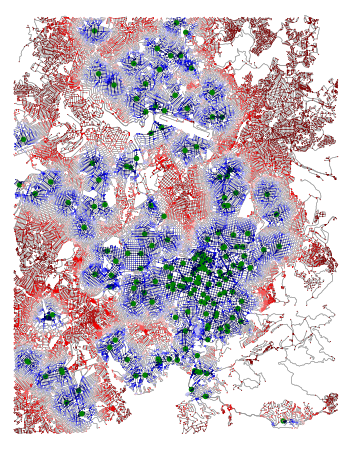

In [13]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


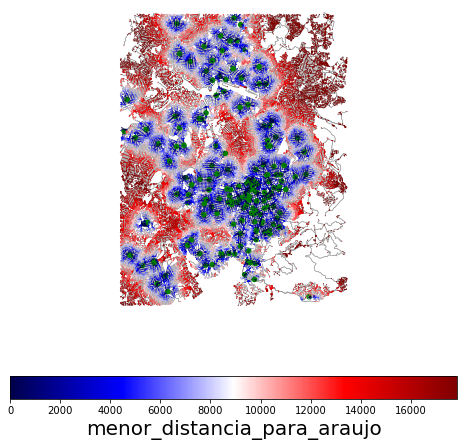

In [20]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['menor_distancia_para_araujo'].min(), vmax=nodes['menor_distancia_para_araujo'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('menor_distancia_para_araujo', fontsize = 20)
fig.savefig('demo.png')

In [ ]:
print('nós originais\n', list(G.nodes()))
print('\narestas originais\n', list(G.edges()))

In [ ]:
G_nx = nx.relabel.convert_node_labels_to_integers(G)
print('nós convertidos\n', list(G_nx.nodes()))
print('\narestas convertidas\n', list(G_nx.edges()))

In [ ]:
location_point = (-19.92798671024853, -43.94740898668482)
origin_node = ox.get_nearest_node(G, location_point)
origin_node

In [ ]:
shortest_path = nx.shortest_path(G,origin_node,2828035001)
ox.plot.plot_graph_route(G,shortest_path)

In [ ]:
rota_teste = [28801018, 8269807083]
ox.plot.plot_graph_route(G,rota_teste)

In [ ]:
weight = 'length'
print(list(nx.get_node_attributes(G, 'osmid').values()))
print(list(nx.get_edge_attributes(G, weight).values()))

In [ ]:
print('informações dos nós: ',G.nodes[28801018])
print('informações das arestas: ',G[28801018][8933734968])

In [ ]:
fig, ax = ox.plot_graph(G)

In [ ]:
nc = [0]*31

In [ ]:
for i in range(len(nc)):
    nc[i] = 'w'

In [ ]:
k=0
for node in G.nodes():

    if node == origin_node:

        nc[k] = str('red')
        k += 1
    else:
        nc[k] = str('w')
        k += 1

In [ ]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc)